In [2]:
import json
import os
from shapely.geometry import Polygon, MultiPolygon
# from shapely.ops import unary_union

In [25]:
DATA_DIR = '../datas/purl'
modify_dir=os.path.join(DATA_DIR, 'jsons')
modify_list=os.listdir(modify_dir)
label_dir=os.path.join(DATA_DIR, 'label')
# another_dir=os.path.join(DATA_DIR, 'noFill')
# another_dir2=os.path.join(DATA_DIR, 'fillPurl')
# another_list=os.listdir(another_dir)
# another_list2=os.listdir(another_dir2)

In [4]:
len(os.listdir(label_dir))

355

In [6]:
len(os.listdir(os.path.join(DATA_DIR,"image")))

355

In [52]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os

# 색상 정의 (category_id별 색상)
# category_colors = {
#     0: (255, 255, 0),  # 청록 -> single_jersey
#     1: (0, 0, 255),  # 빨강->rib
#     2: (0, 255, 0),  # 초록-> pow(purl)
#     3: (255, 0, 0),  # 파랑
#     4: (0, 255, 255), # 노랑->type3
#     5: (147, 20, 255), #핑크,
#     6: (0,0,0) #black
# }

category_colors = {
    7: (255, 255, 0),  # single_jersey
    4: (0, 0, 255),    # rib
    5: (0, 255, 0),    # purl
    6: (147, 20, 255), # moss
    3: (0, 255, 255),  # ajour
    0: (0, 0, 0)       # background
}
def sort_clockwise(points):
    center = np.mean(points, axis=0)
    return sorted(points, key=lambda p: np.arctan2(p[1] - center[1], p[0] - center[0]))

def fill_unlabeled_areas_with(json_data, canvas_size,i):
    # 캔버스 생성 (검은색 배경: 0)
    image = np.zeros((canvas_size[1], canvas_size[0],3), dtype=np.uint8)

    #만약 빈 부분 다른 라벨로 채운다면 여기에 RGB to BGR 변환해서 넣기기
    # for i in range(canvas_size[1]):
    #     for j in range(canvas_size[0]):
    #         # 순서 거꾸로 넣기
    #         image[i][j][0]=255
    #         image[i][j][1]=255
    #         image[i][j][2]=0

    label_name="{}.jpg".format(i)


    #1차로 nothing부터 검은색으로 채우기- Fill with Single Jersey
    # for annotation in json_data["shapes"]:
    #     # category_id = annotation["category_id"]
    #     if(annotation["label"]=="nothing"):
    #       category_id=6
    #     else:
    #       continue
    #     polygon = annotation["points"]

    #     # 색상 선택
    #     color = category_colors.get(category_id, (255, 255, 255))  # 기본 색상: 흰색

    #     # 다각형 좌표를 픽셀 단위로 변환
    #     points = np.array([
    #         [int(x ), int(y)] for x, y in polygon
    #     ], dtype=np.int32)

    #     # 다각형 그리기
    #     cv2.polylines(image, [points], isClosed=True, color=color, thickness=2)
    #     cv2.fillPoly(image, [points], color=color)

    # 다각형 그리기 - 추가로 이용한 라벨 있으면 수정해서 넣기
    for annotation in json_data["annotations"]:
        category_id = annotation["category_id"]
        if(category_id==2):
            category_id=7
        # if(annotation["label"]=="single_jersey"):
        #   category_id=0
        # if(annotation["label"]=="single jersey"):
        #   category_id=0
        # if(annotation["label"]=="rib"):
        #   category_id=1
        # if(annotation["label"]=="purl"):
        #   category_id=2
        # if(annotation["label"]=="ajour"):
        #   category_id=4
        # if(annotation["label"=="moss"]):
        #    category_id=5
        # if(annotation["label"]=="nothing"):
        #   continue
      

        polygon = annotation["polygon"]

        # 색상 선택
        color = category_colors.get(category_id, (255, 255, 255))  # 기본 색상: single_jersey 색상
        # 다각형 좌표를 픽셀 단위로 변환
        points = np.array([
            [int(x*canvas_size[0]), int(y*canvas_size[1])] for x, y in polygon
        ], dtype=np.int32)

        # 다각형 그리기
        # points = sort_clockwise(points)
        points = cv2.convexHull(points)

        # points = np.array([
        #     [int(x), int(y)] for x, y in points
        # ], dtype=np.int32)
        cv2.polylines(image, [points], isClosed=True, color=color, thickness=0)
        cv2.fillPoly(image, [points], color=color)

    # 이미지를 Matplotlib으로 출력
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    output_path = os.path.join(label_dir, f"annotated_{label_name}")

    # 이미지 저장
    cv2.imwrite(output_path, image)

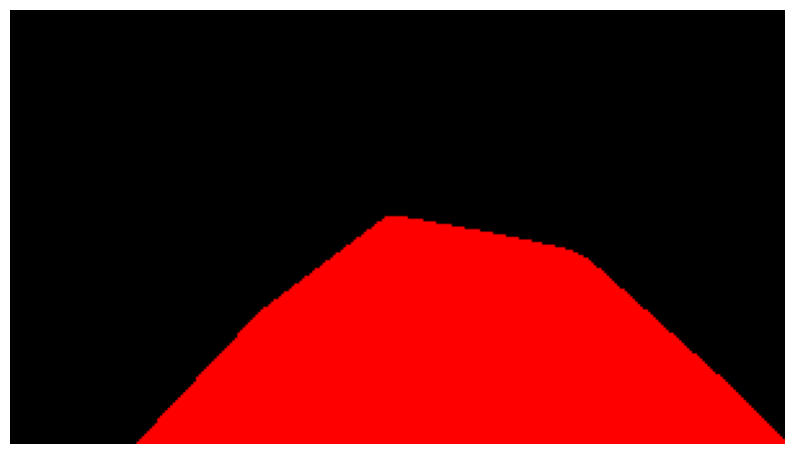

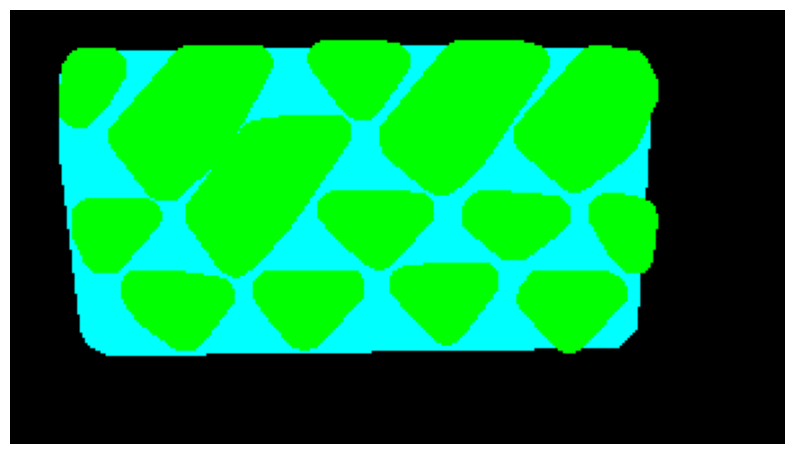

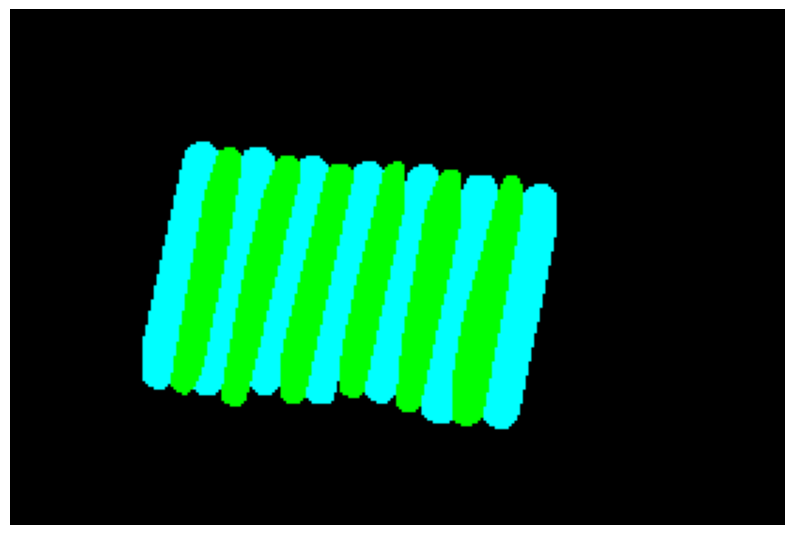

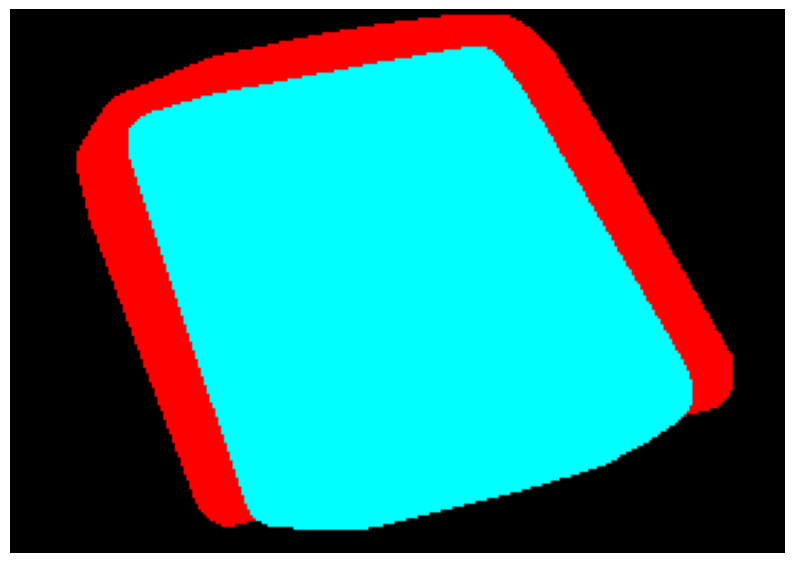

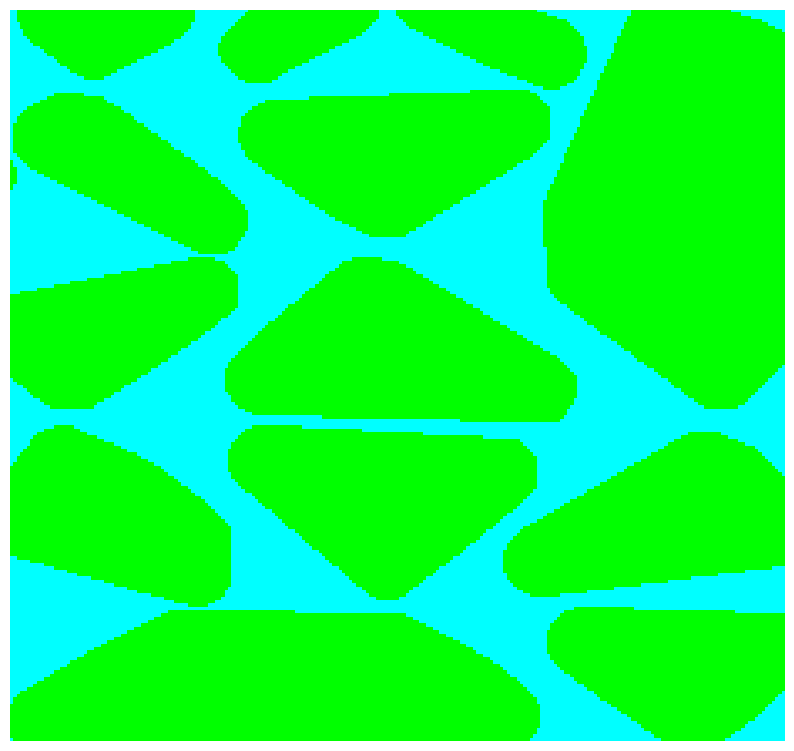

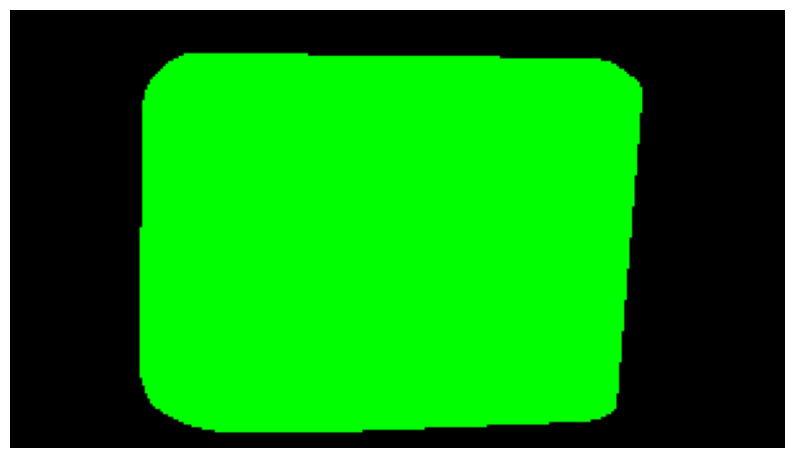

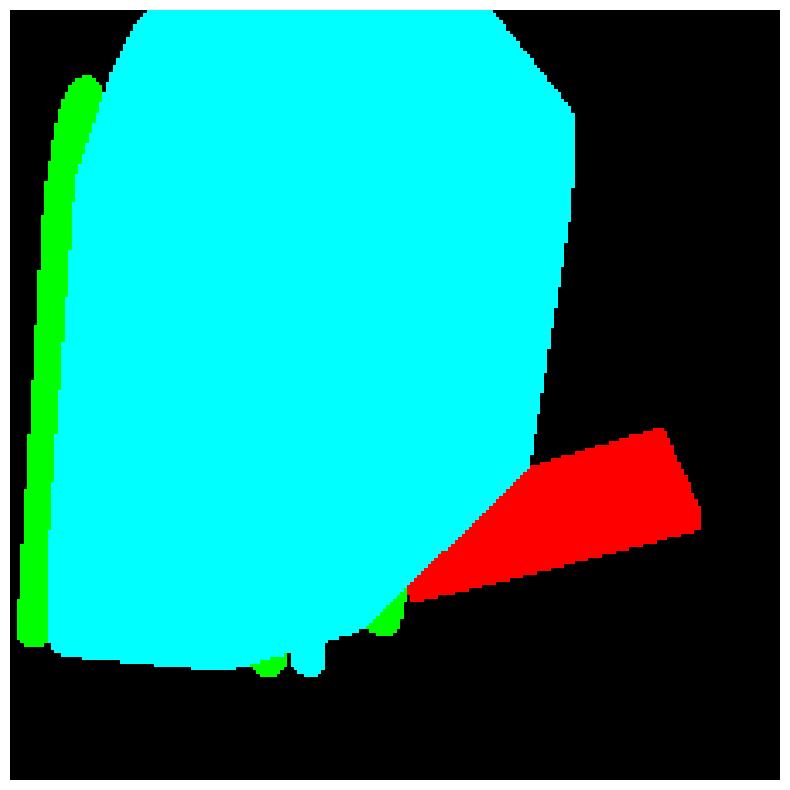

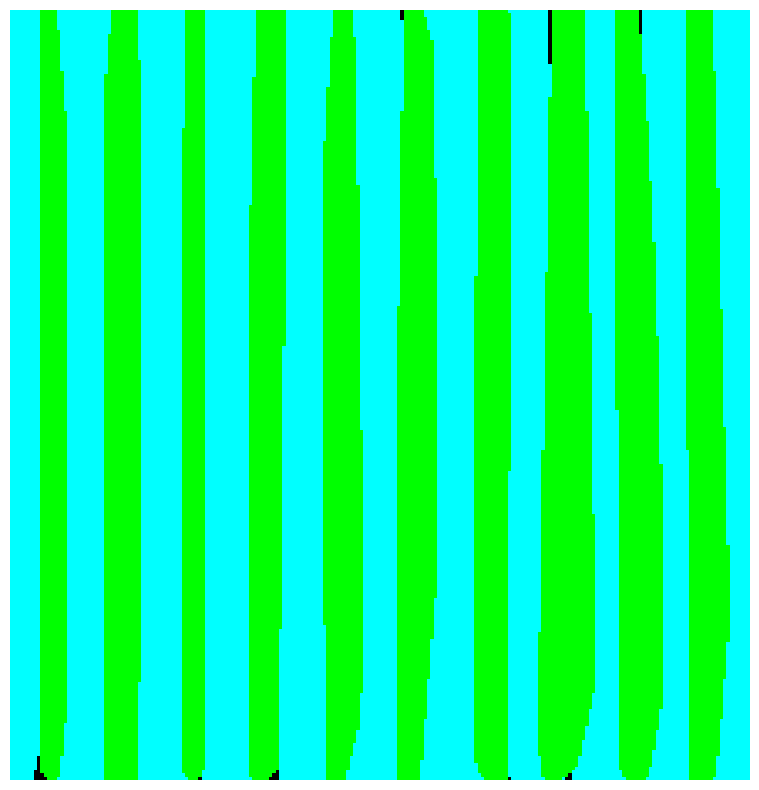

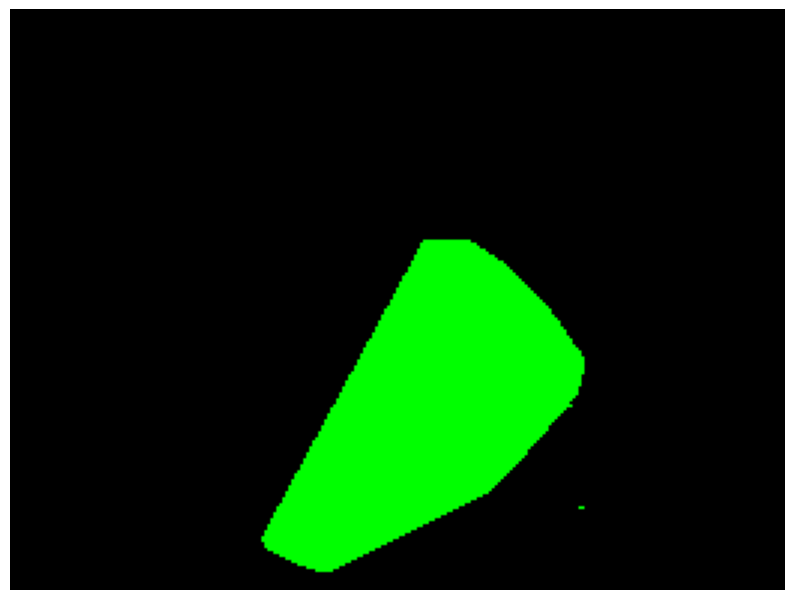

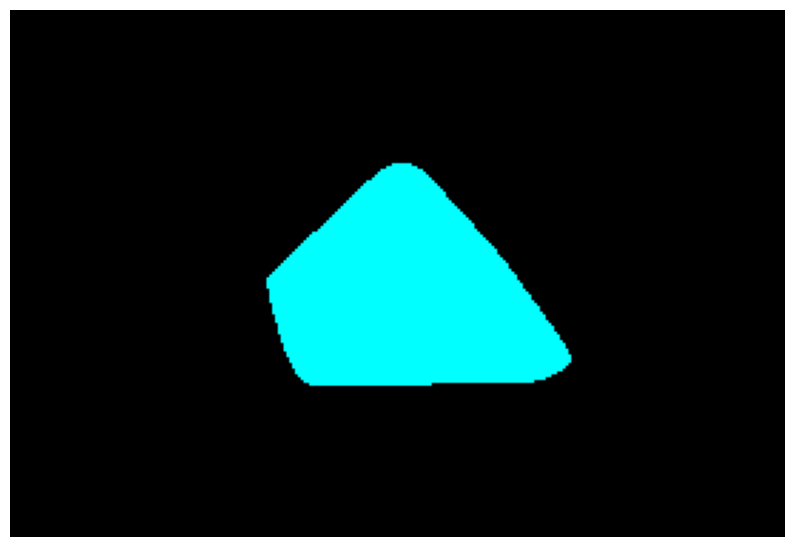

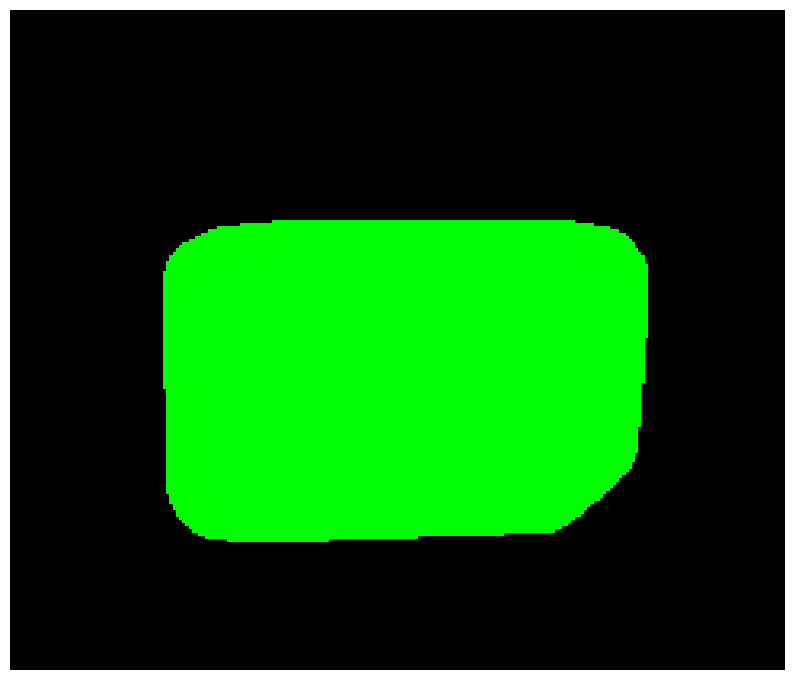

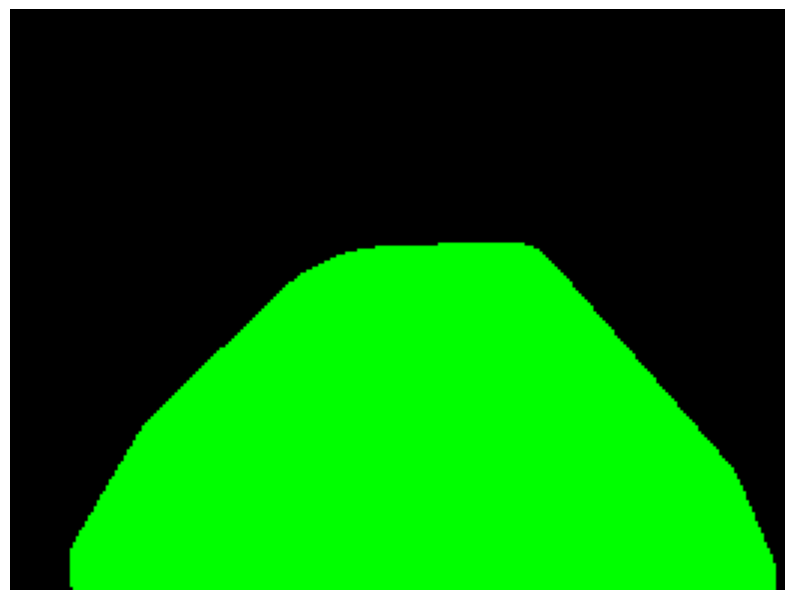

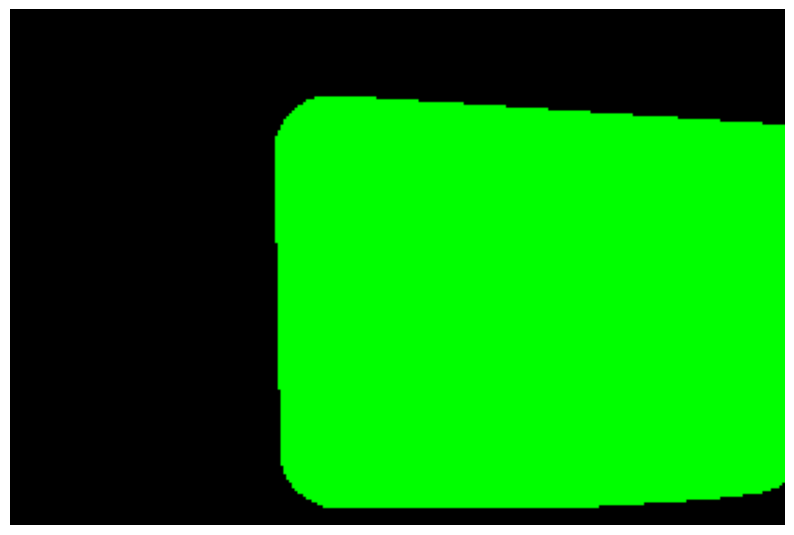

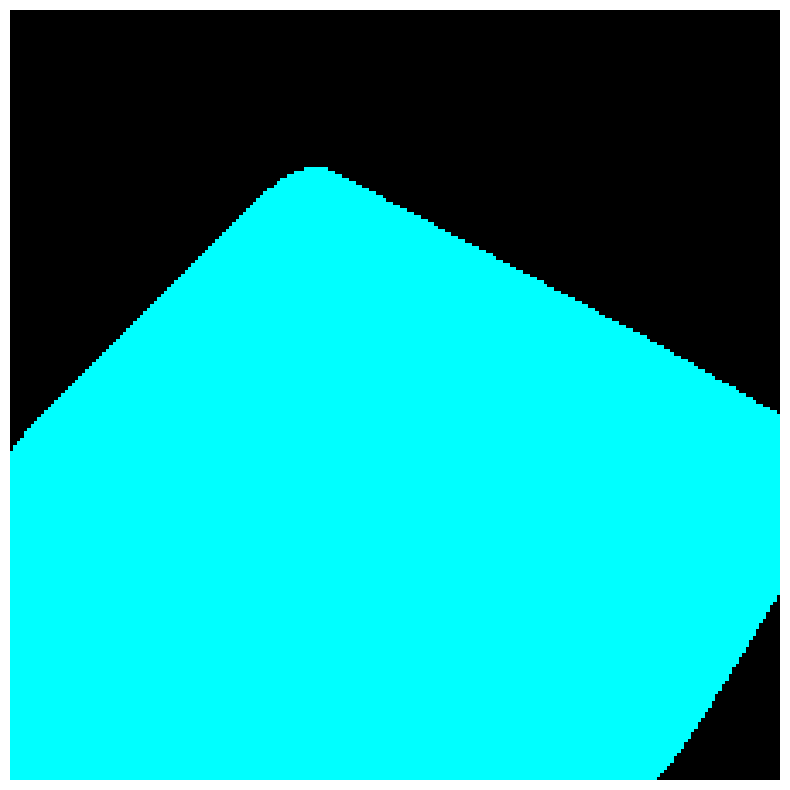

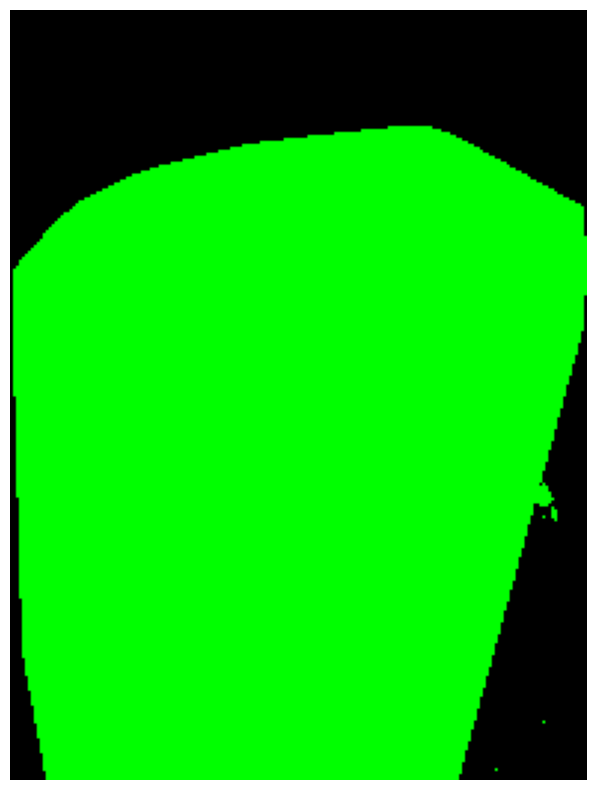

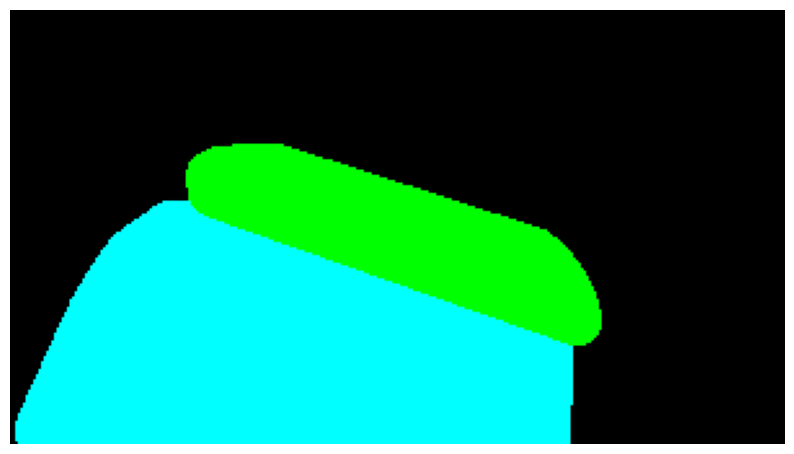

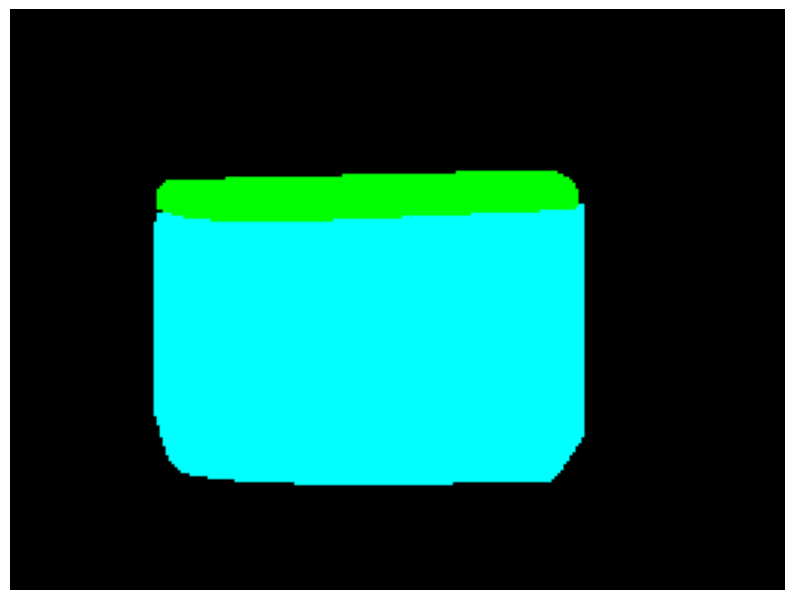

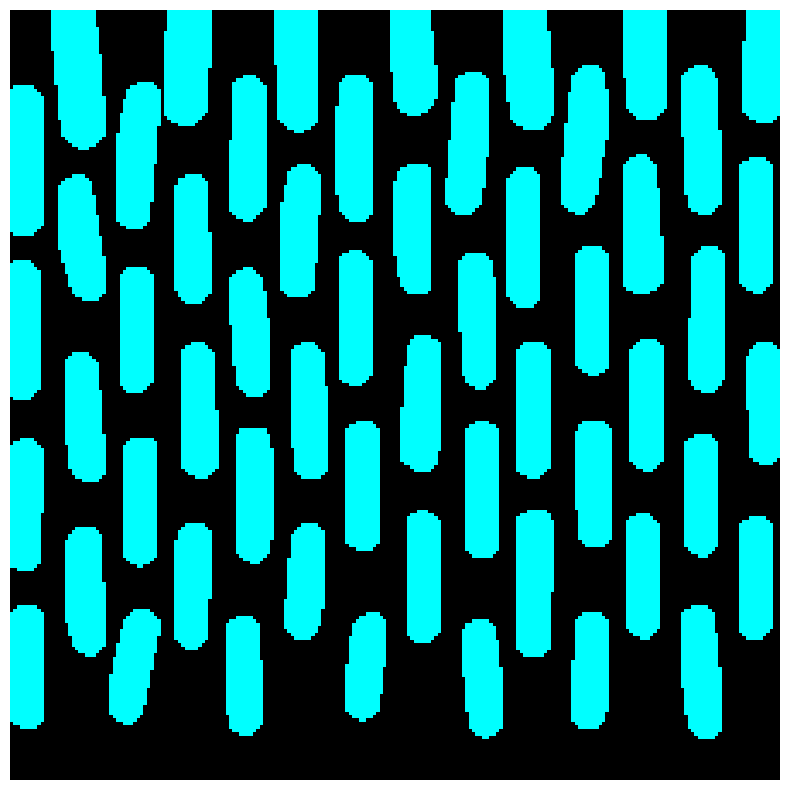

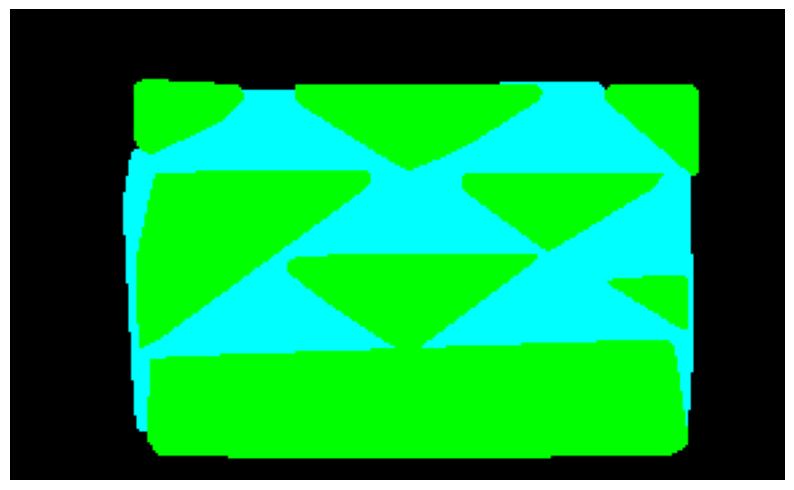

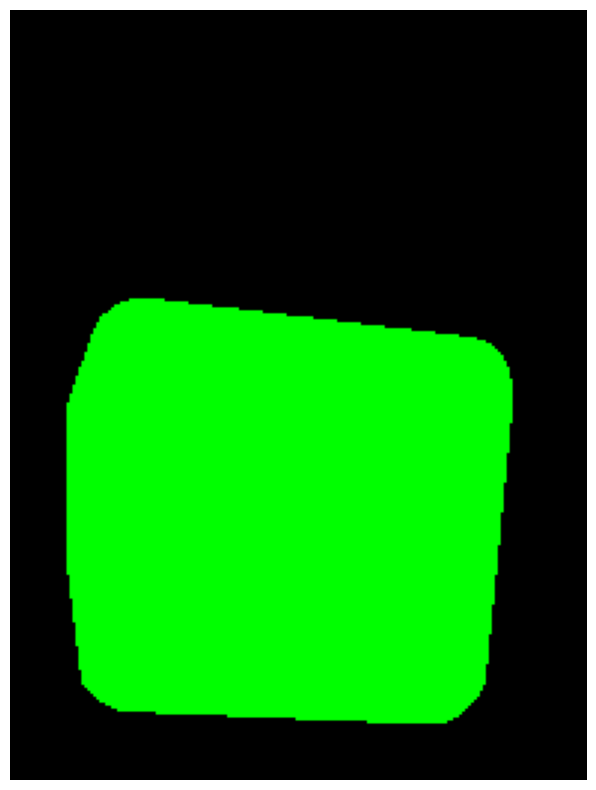

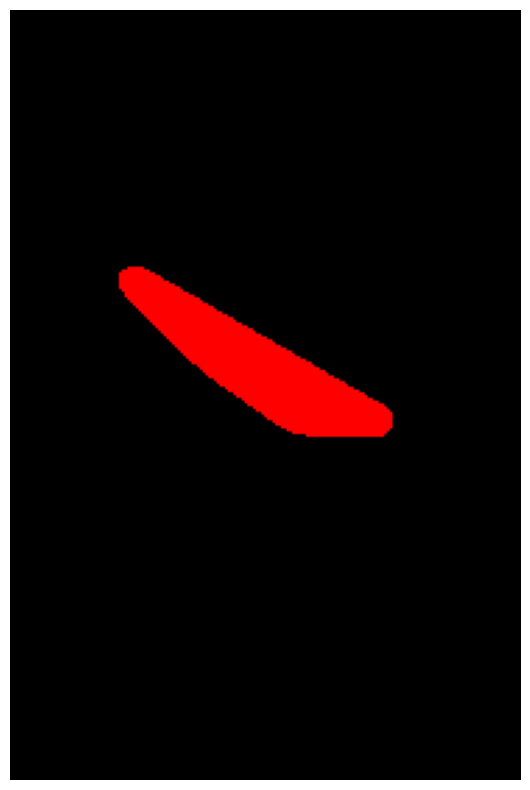

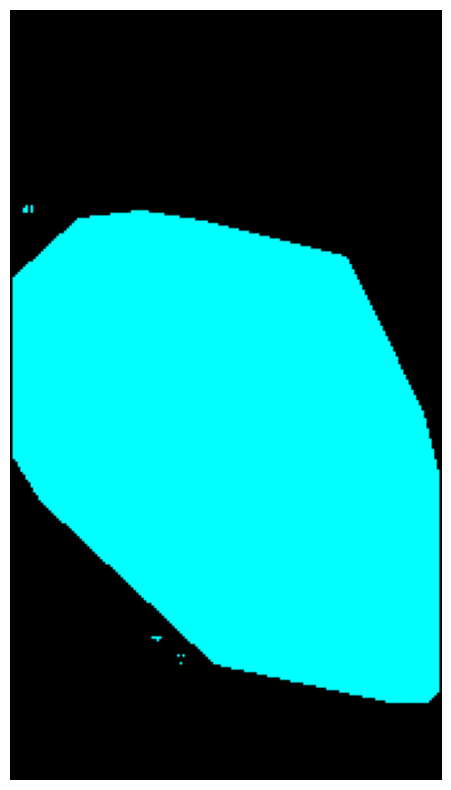

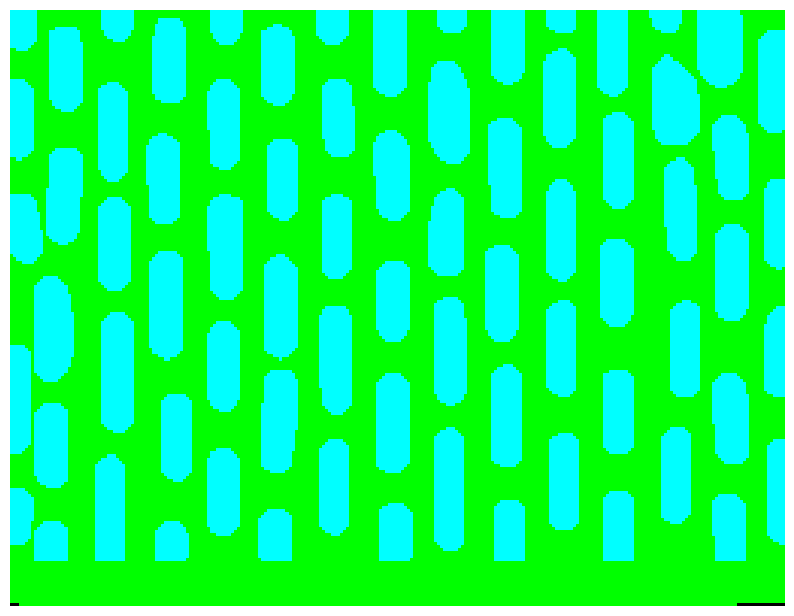

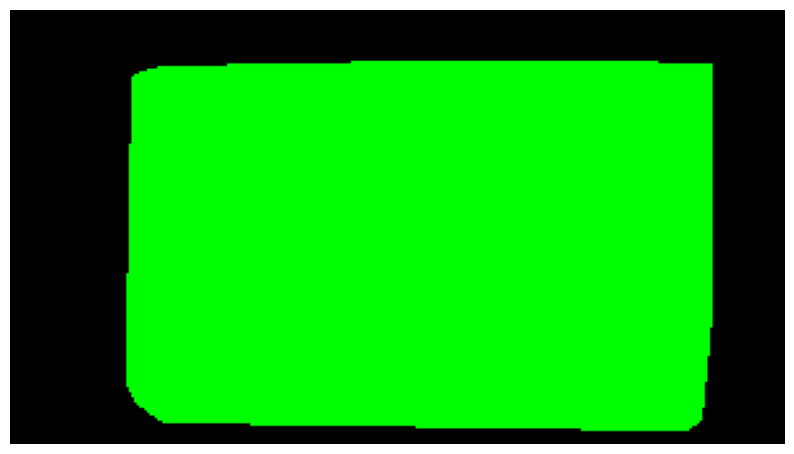

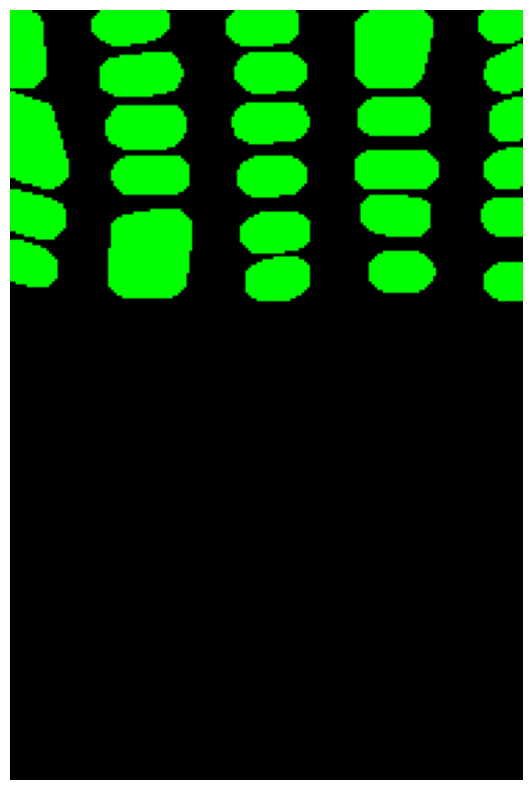

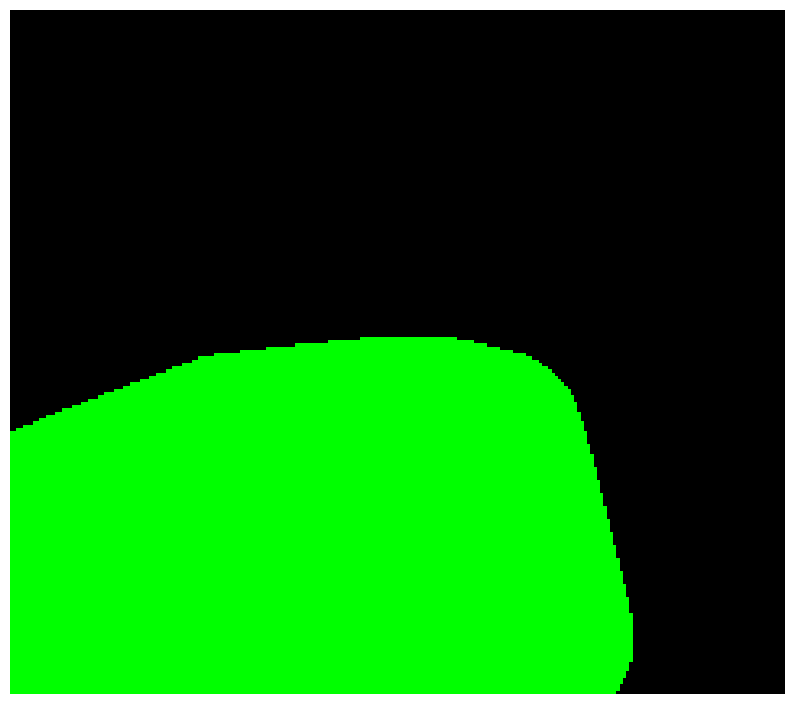

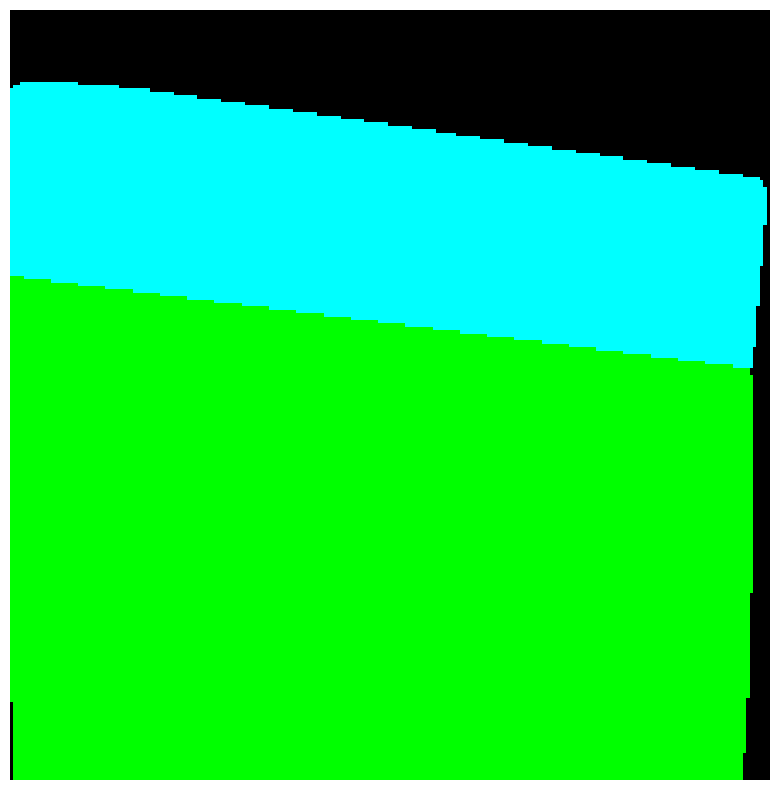

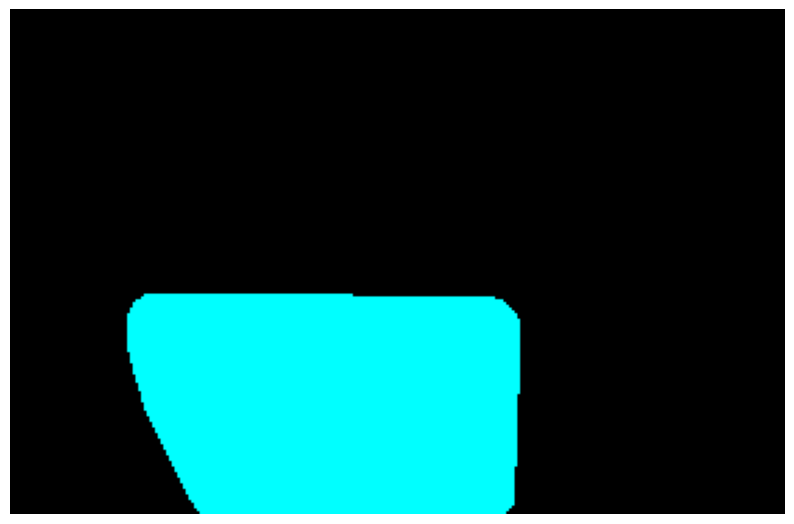

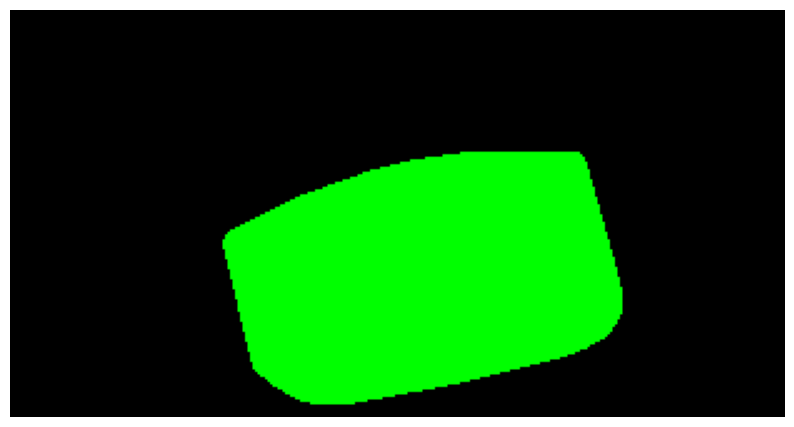

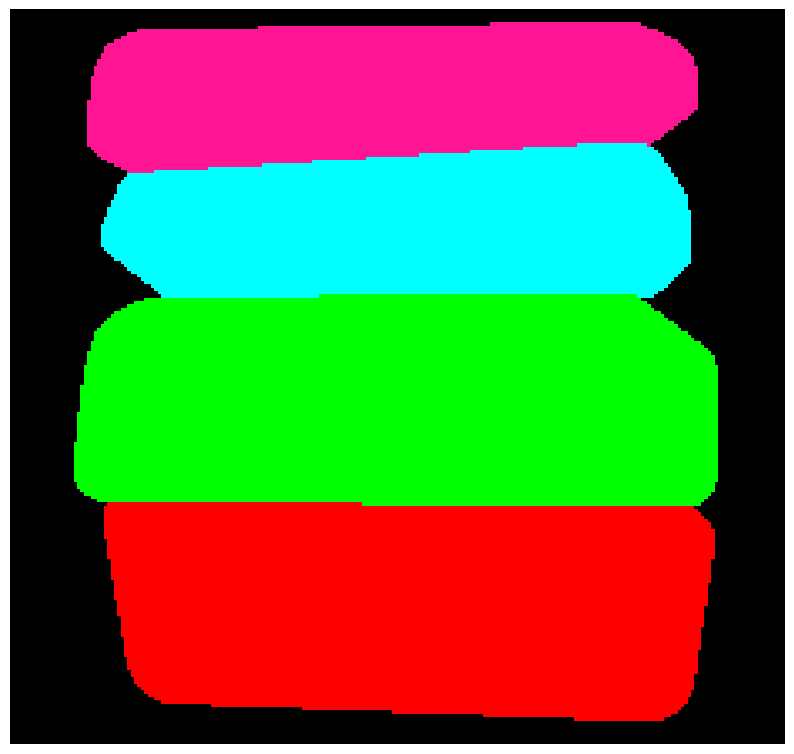

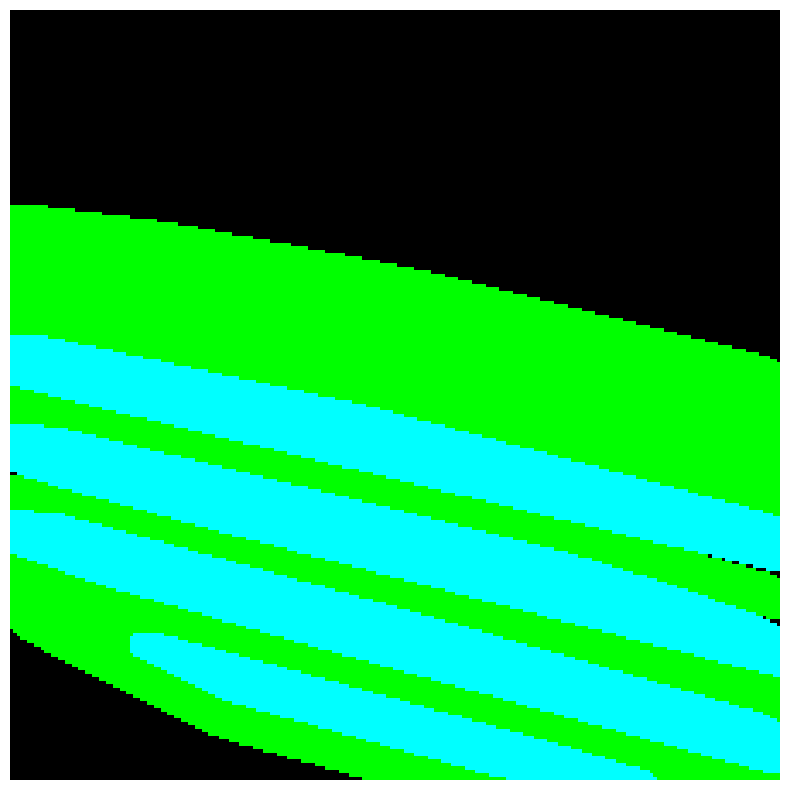

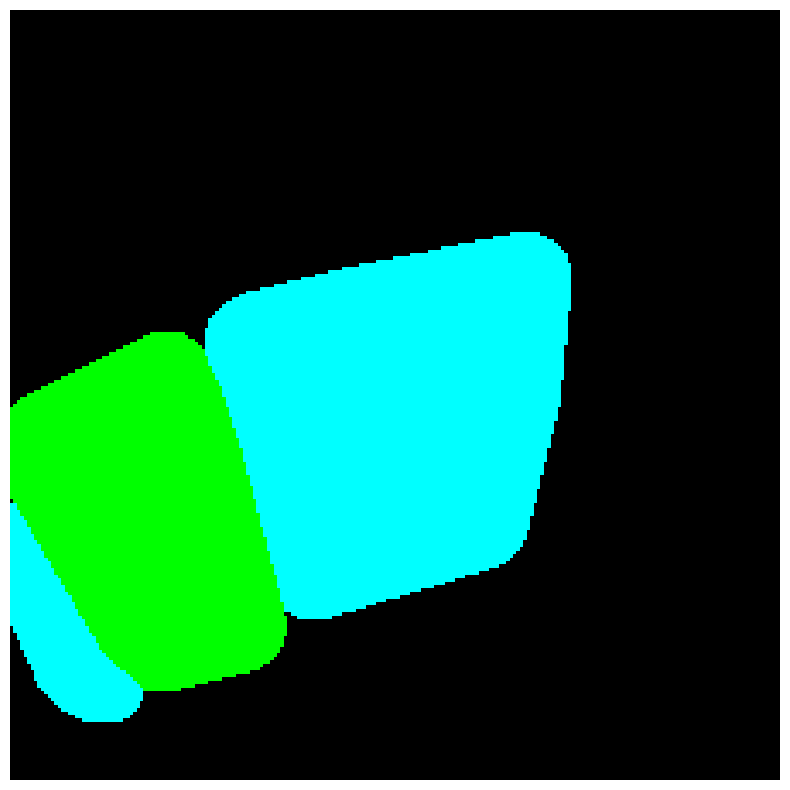

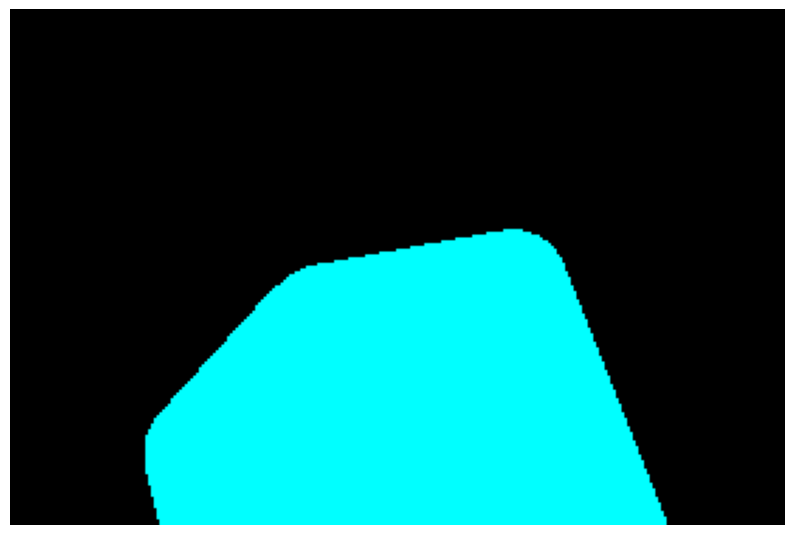

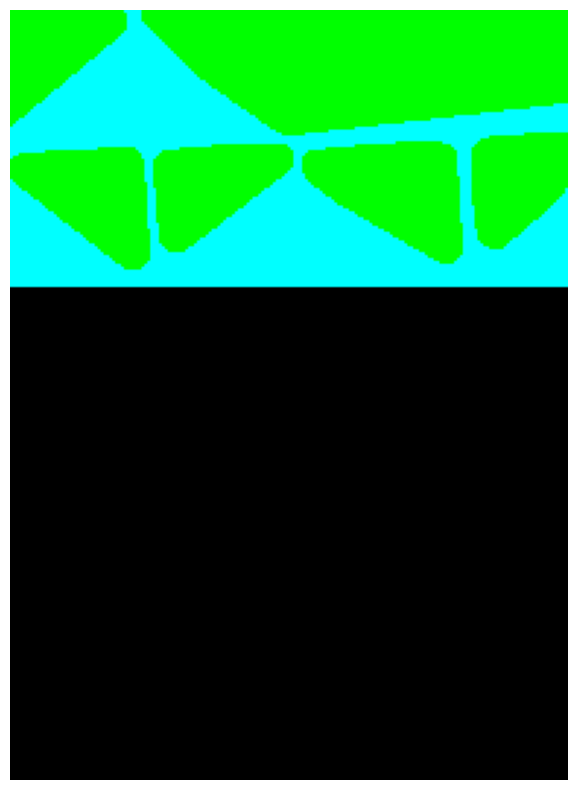

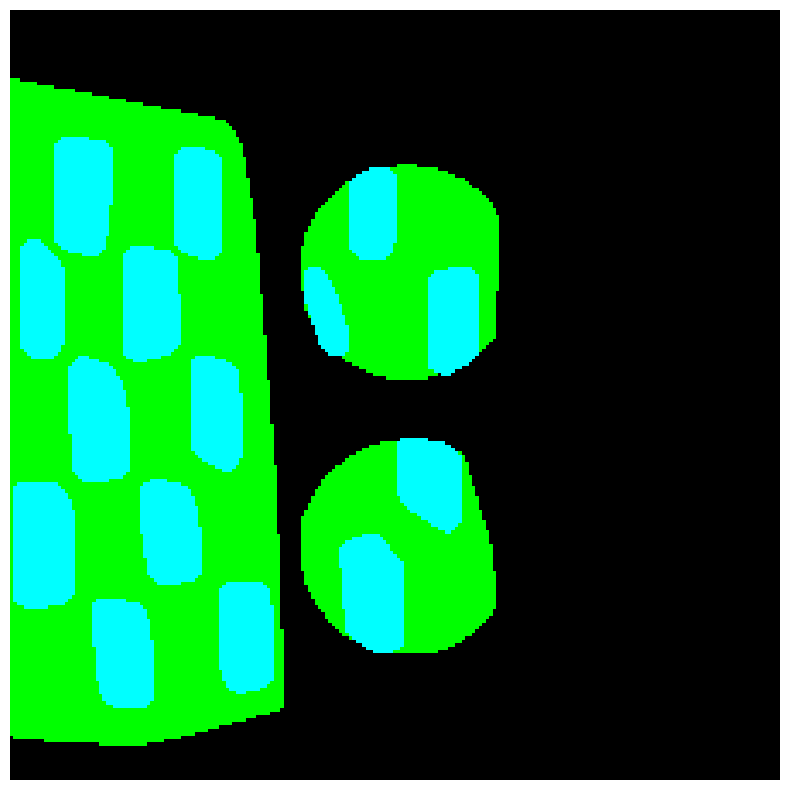

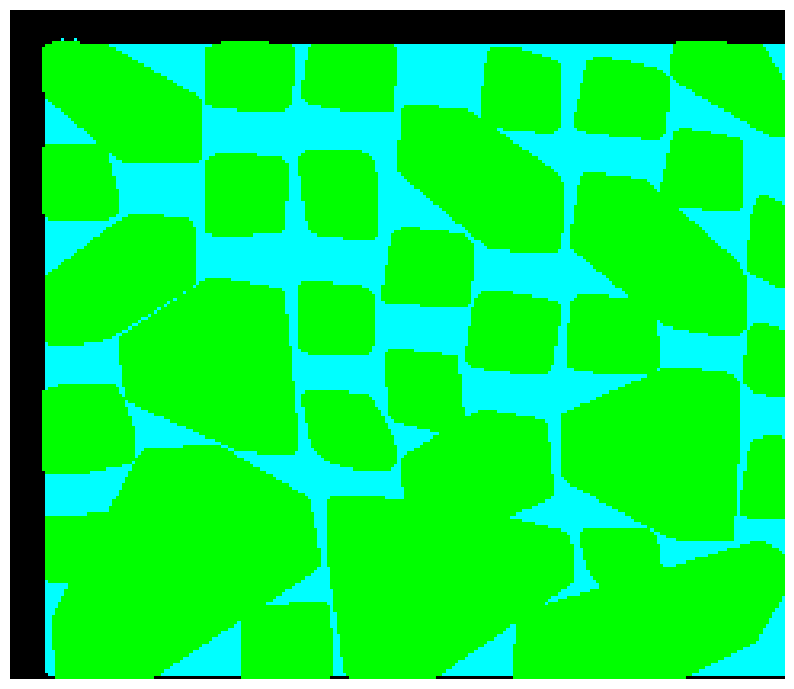

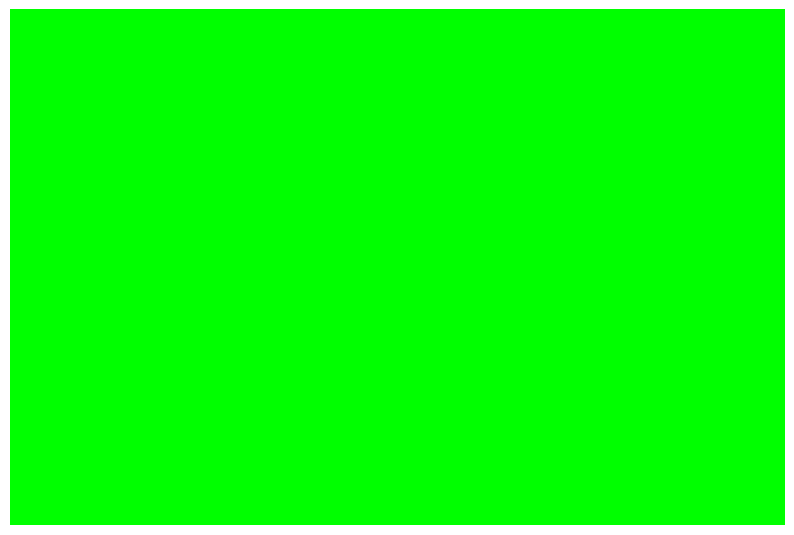

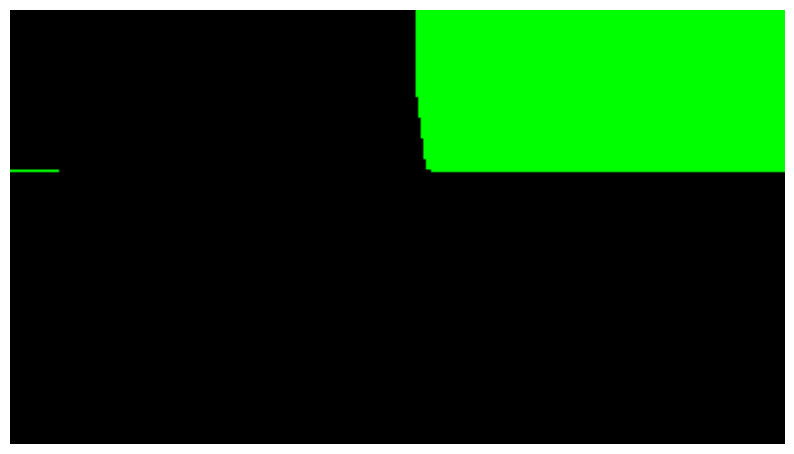

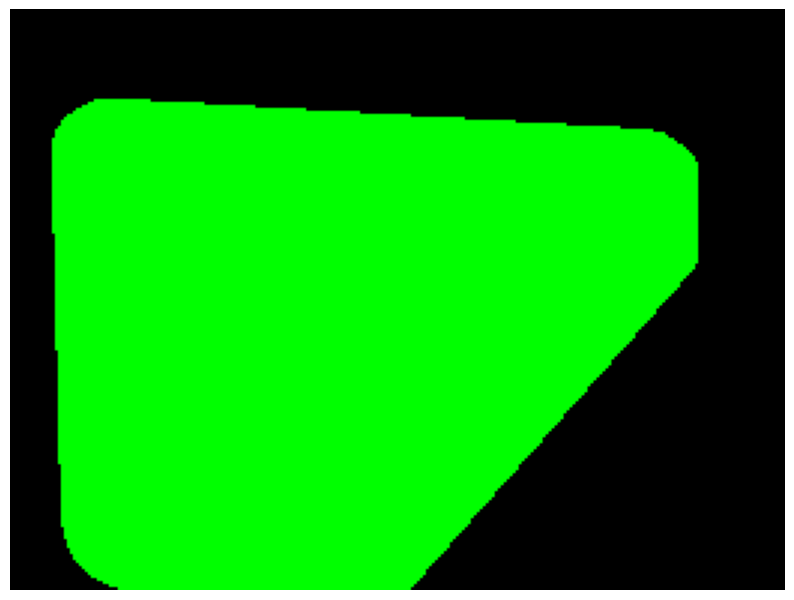

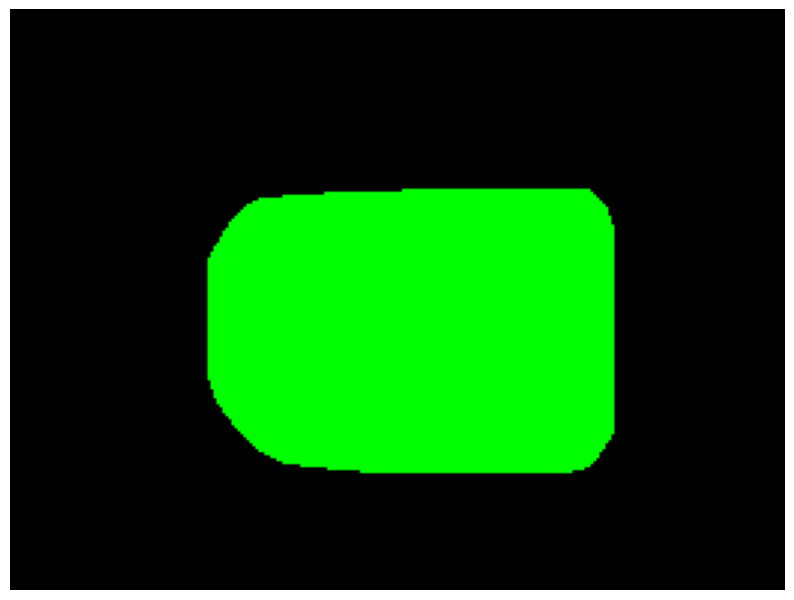

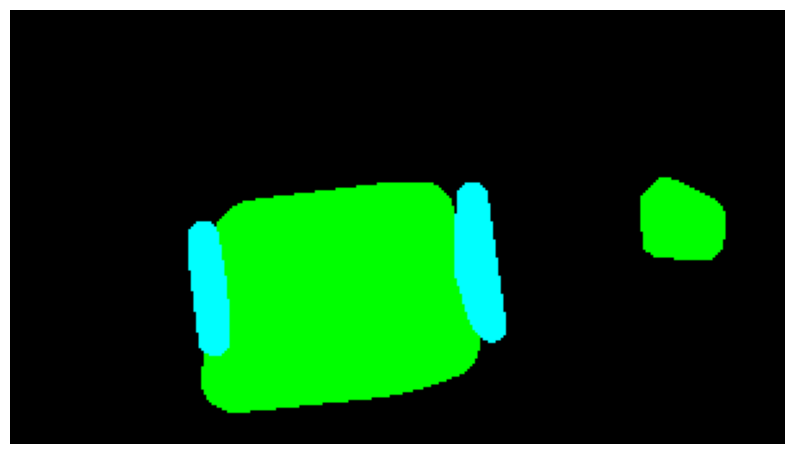

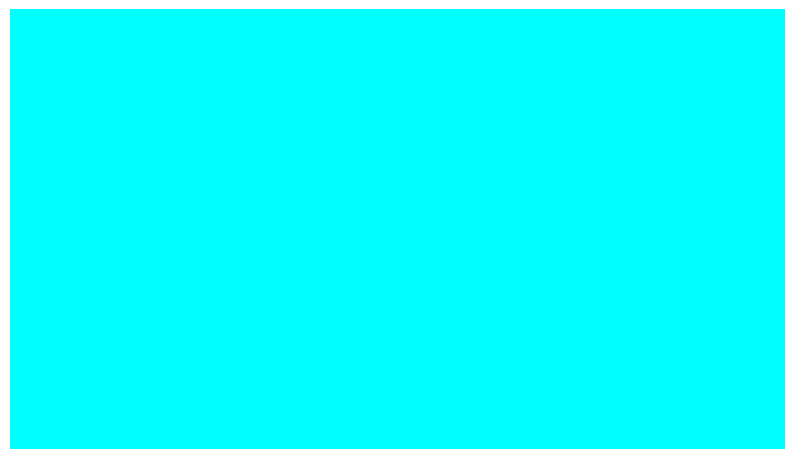

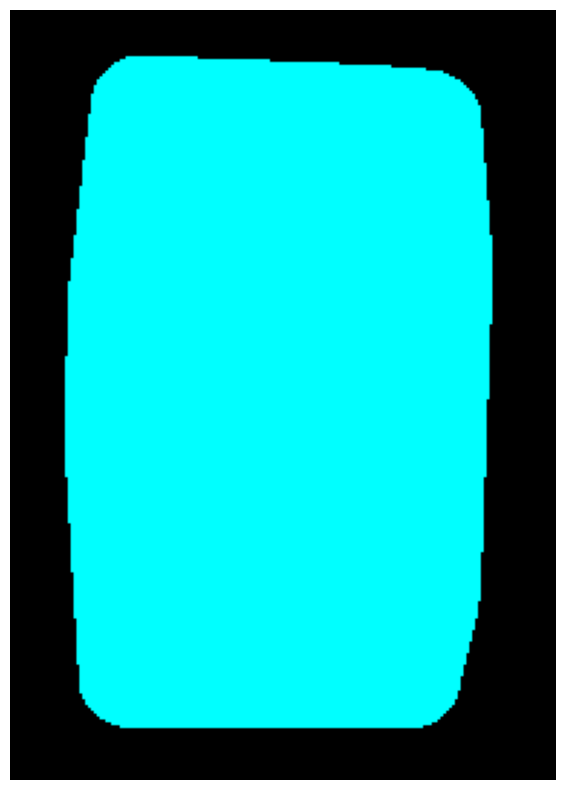

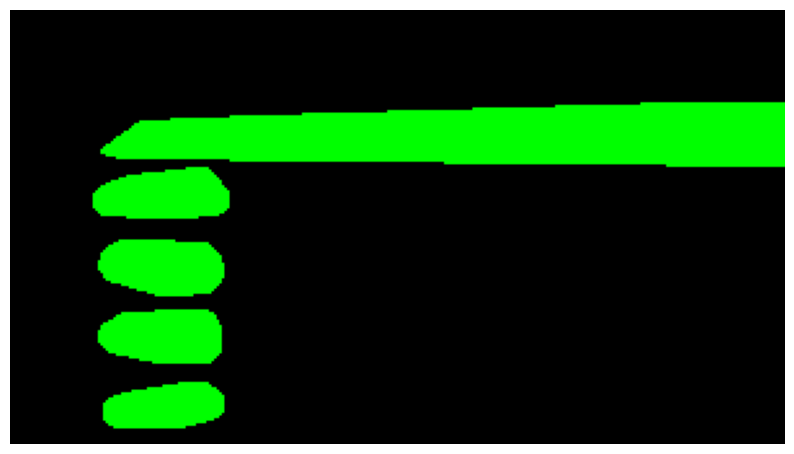

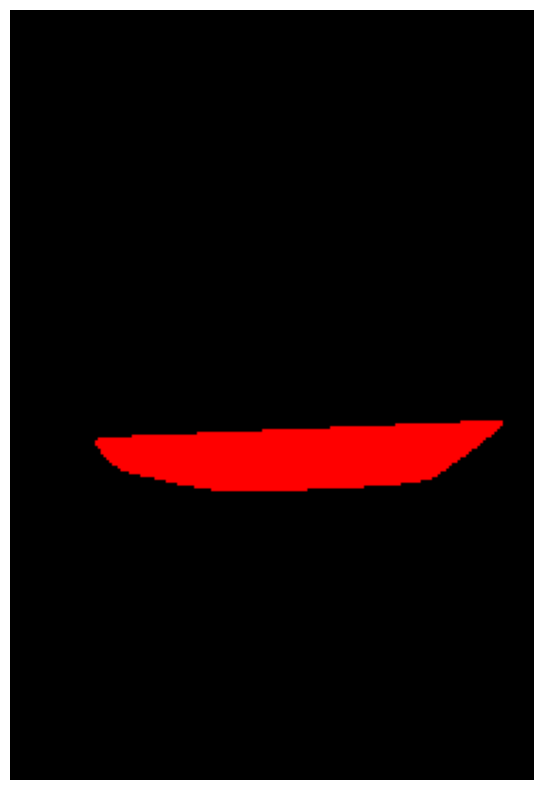

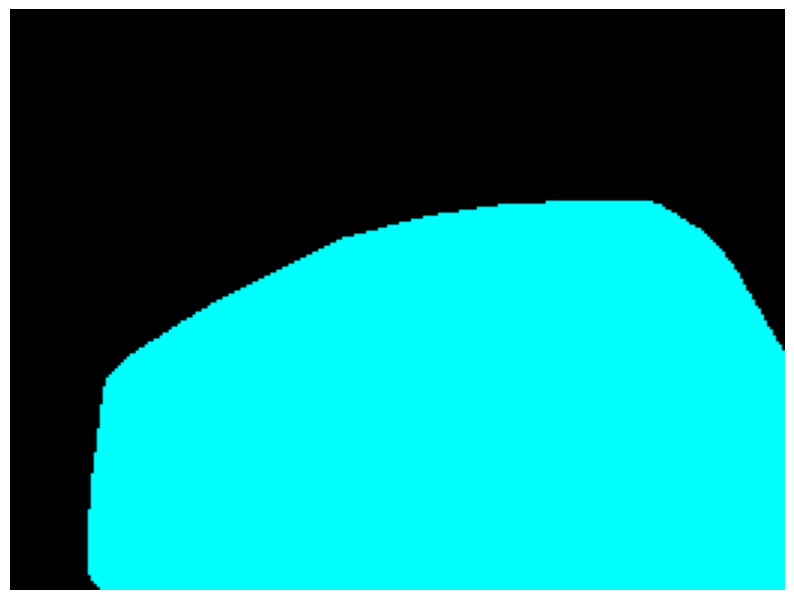

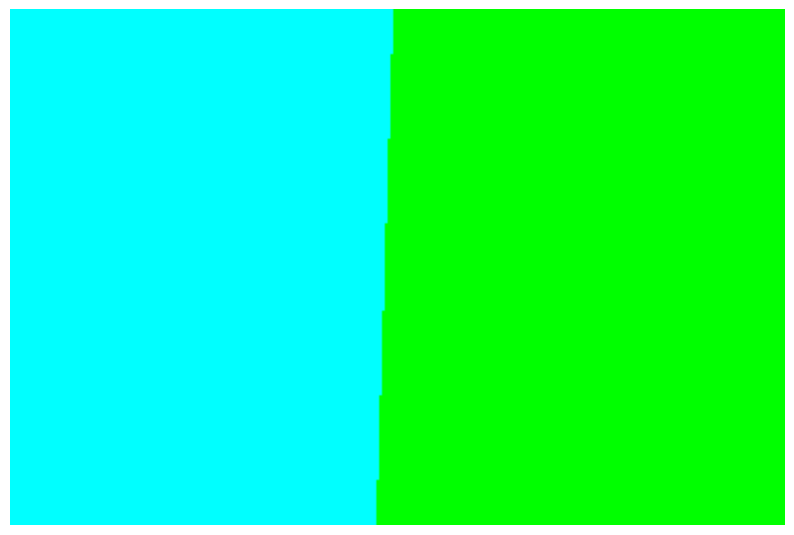

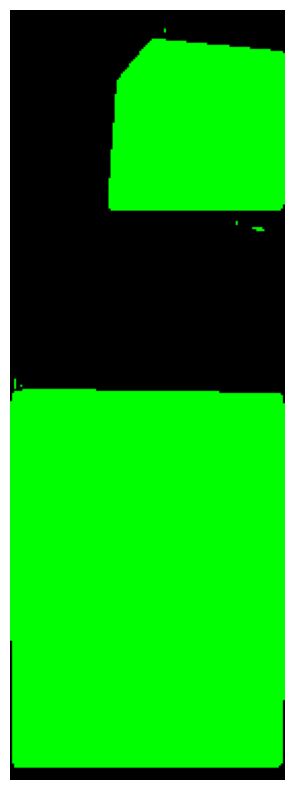

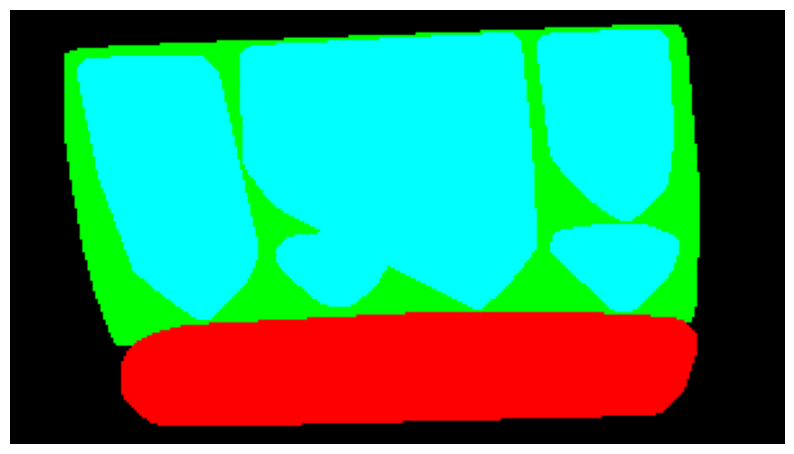

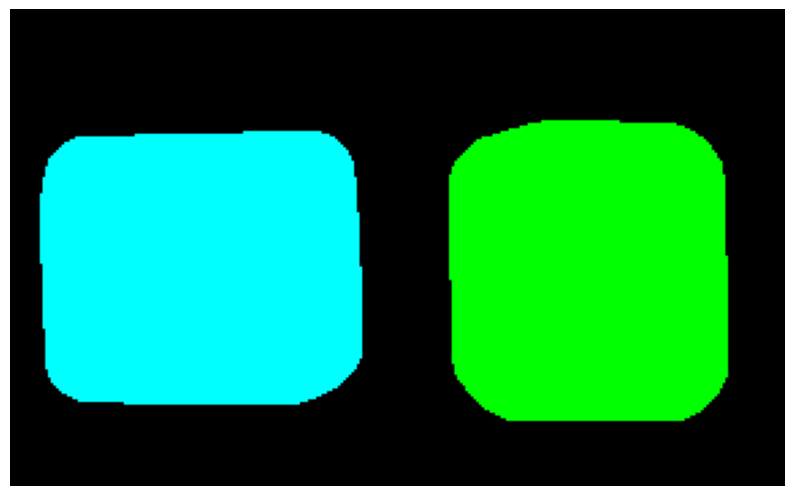

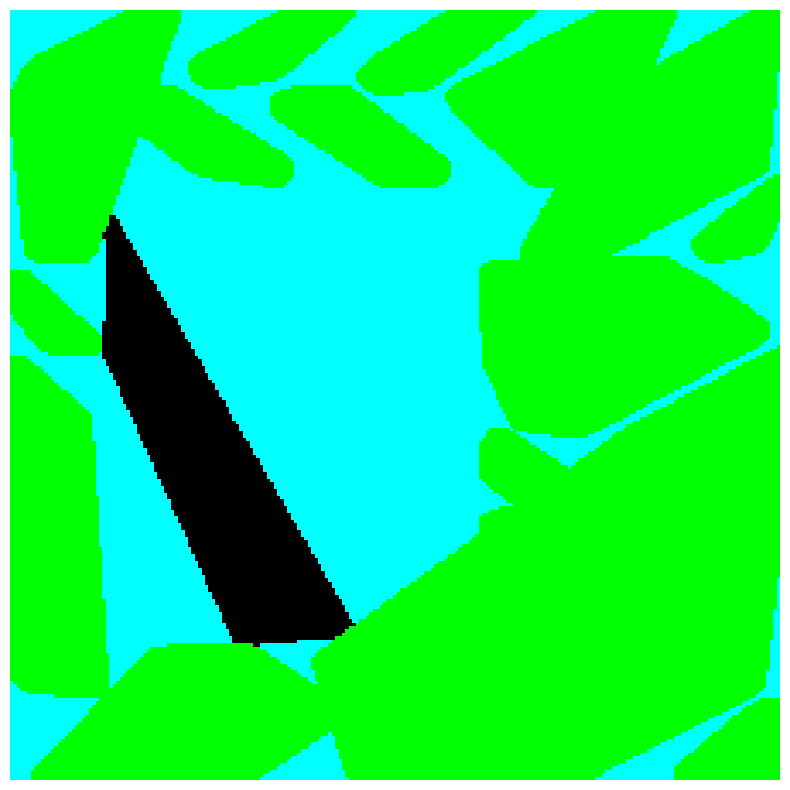

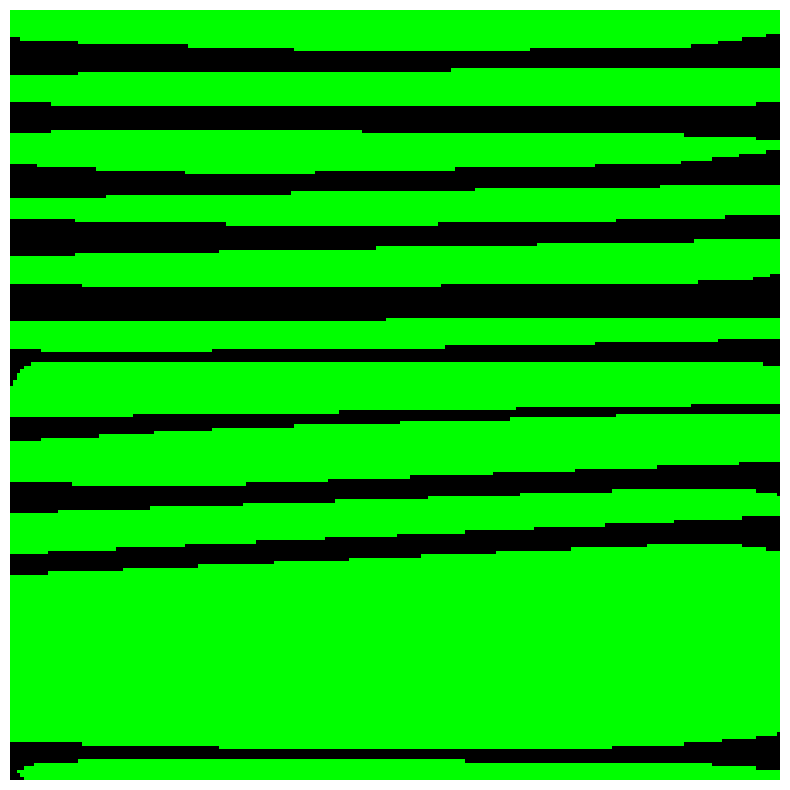

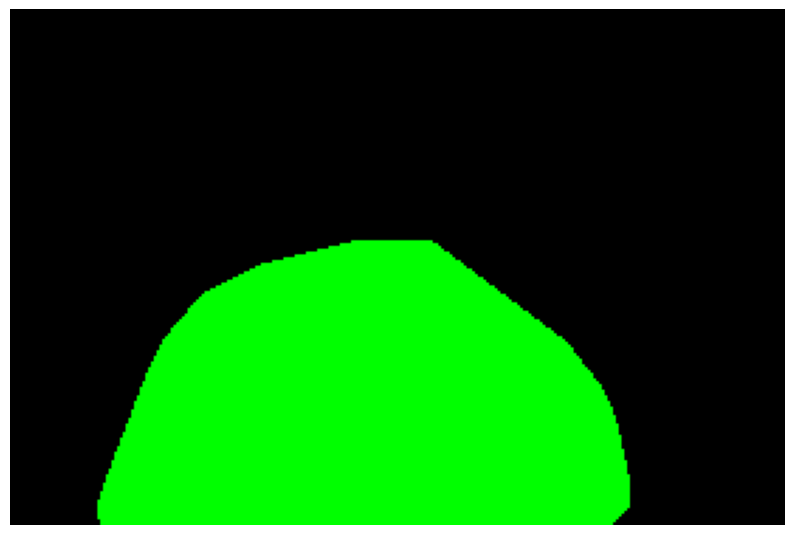

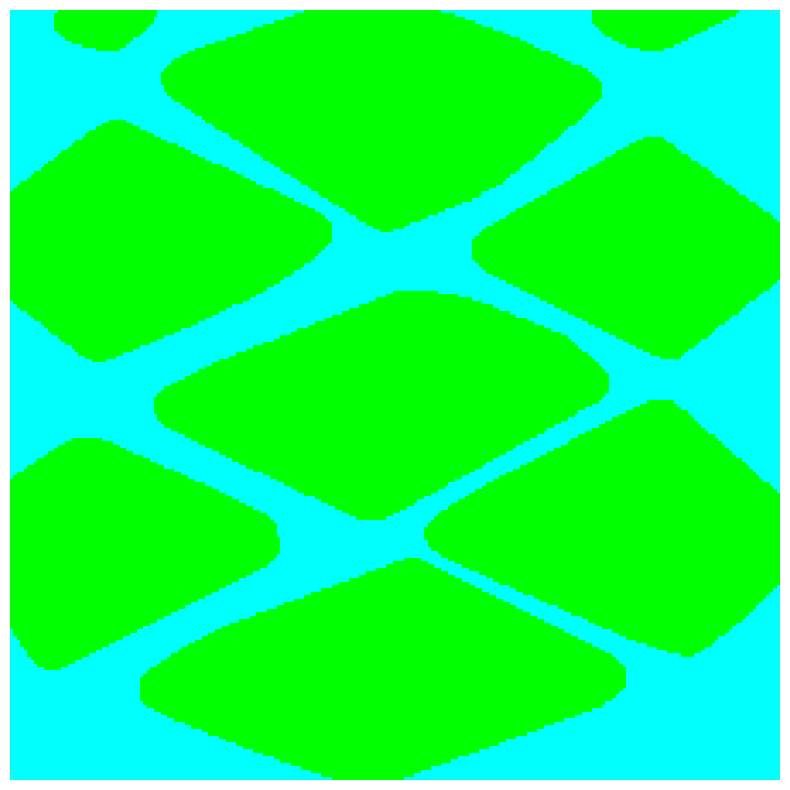

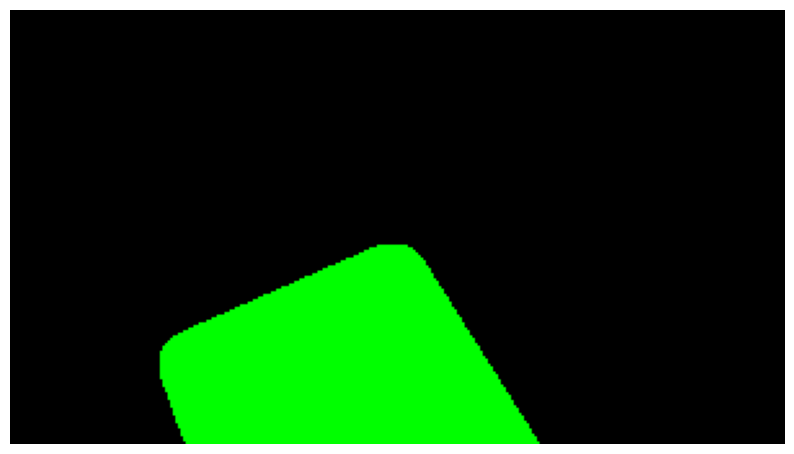

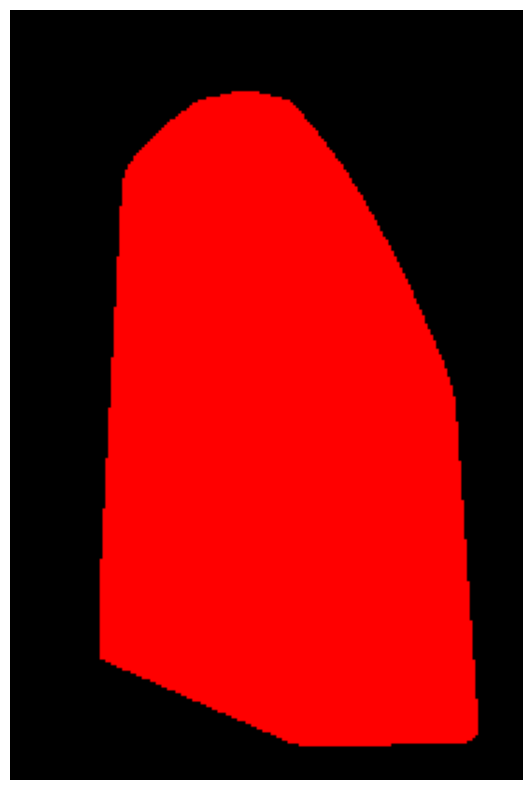

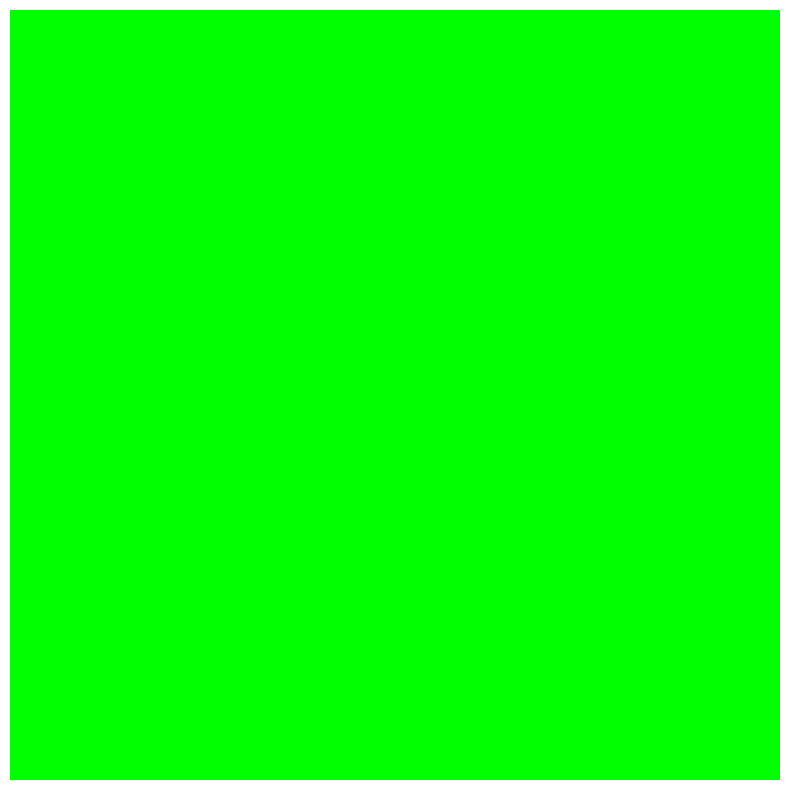

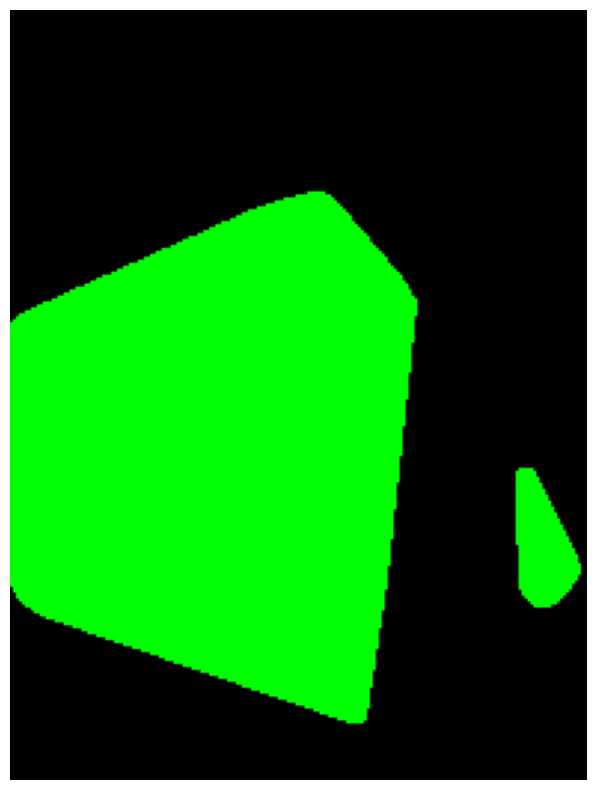

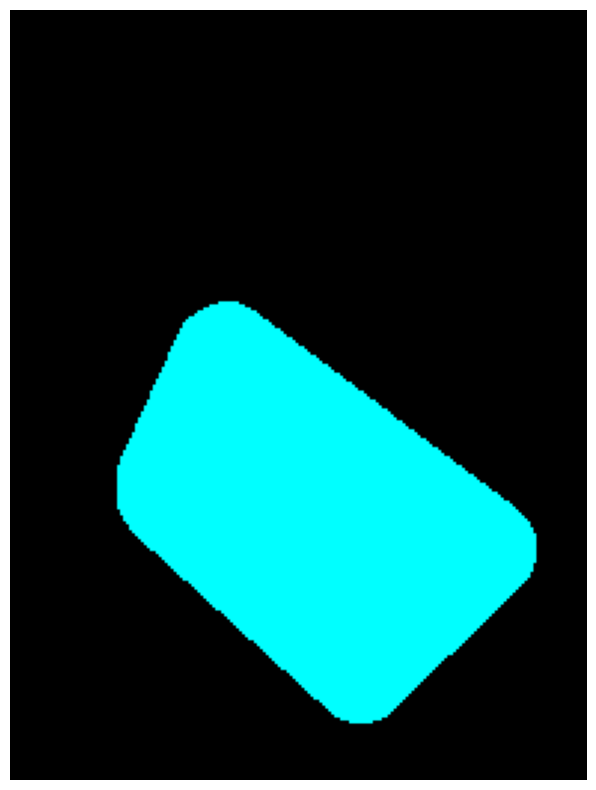

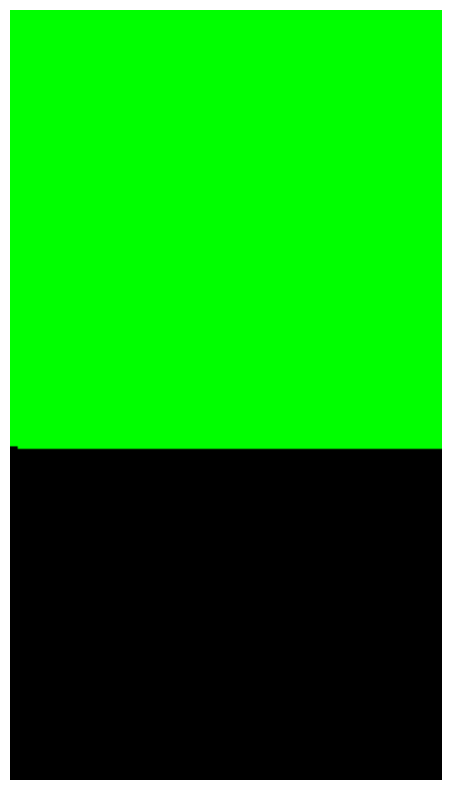

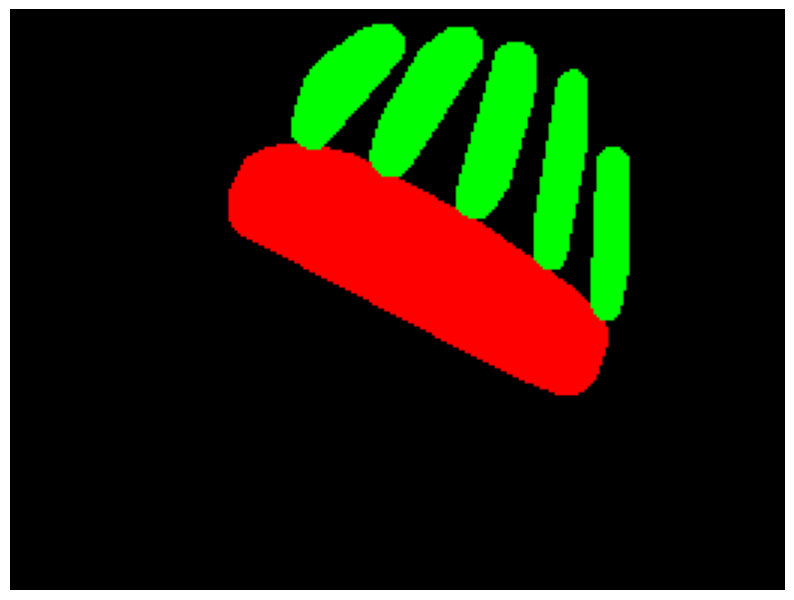

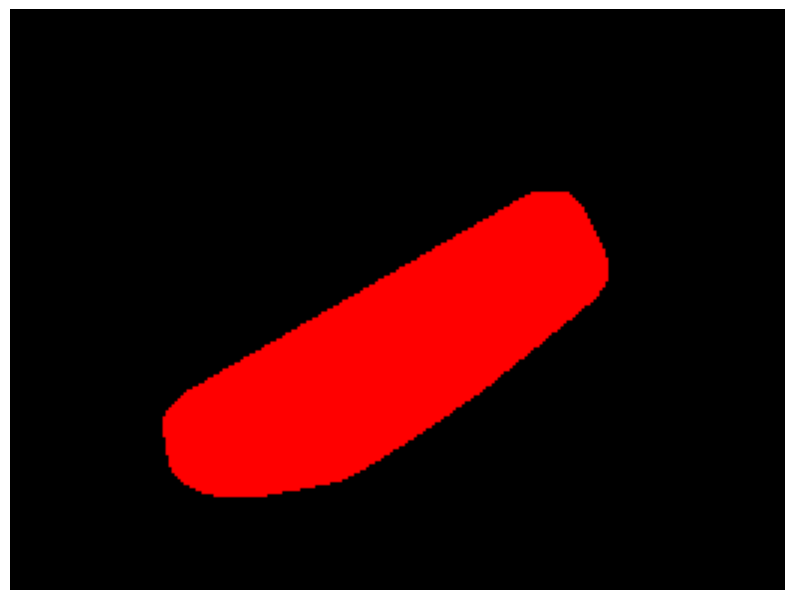

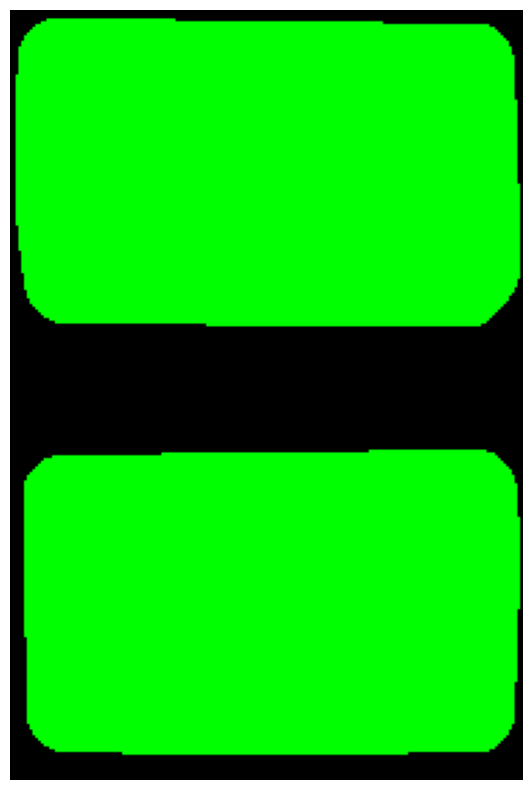

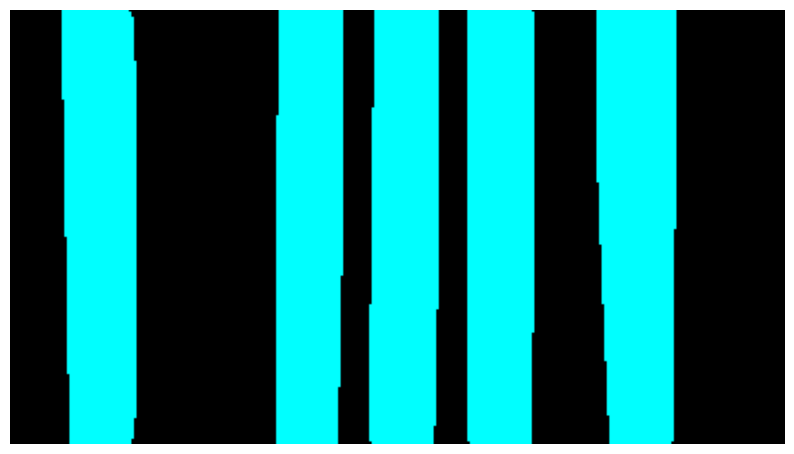

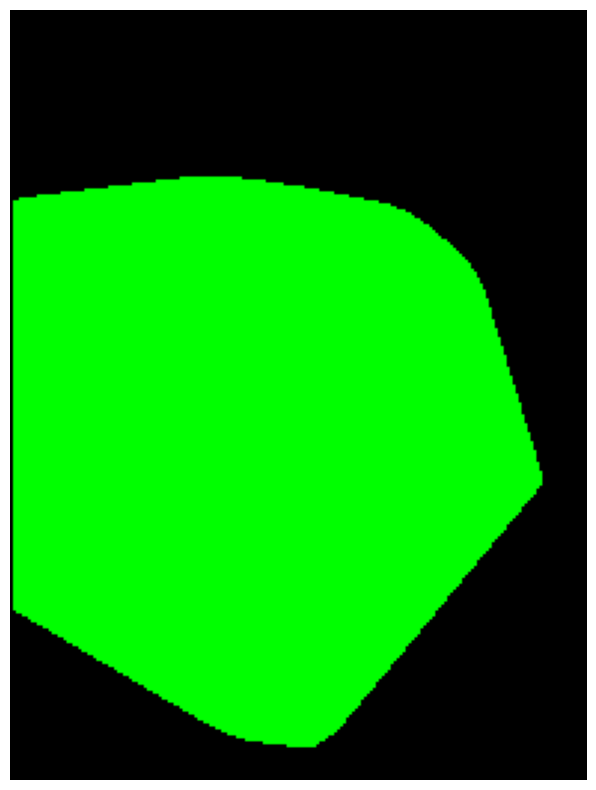

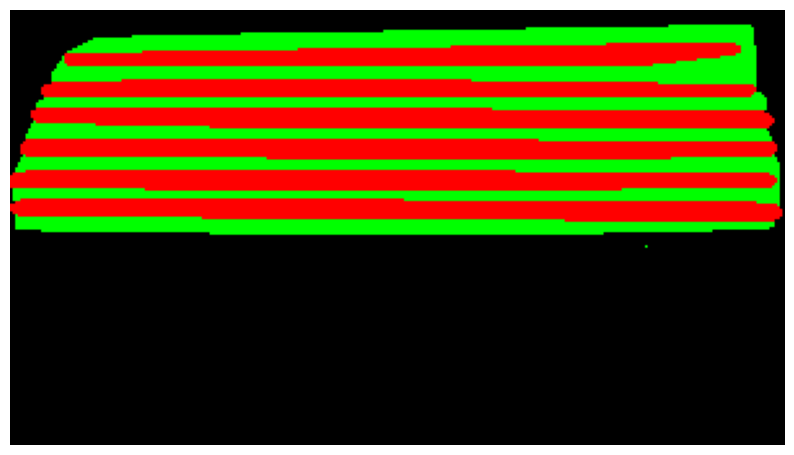

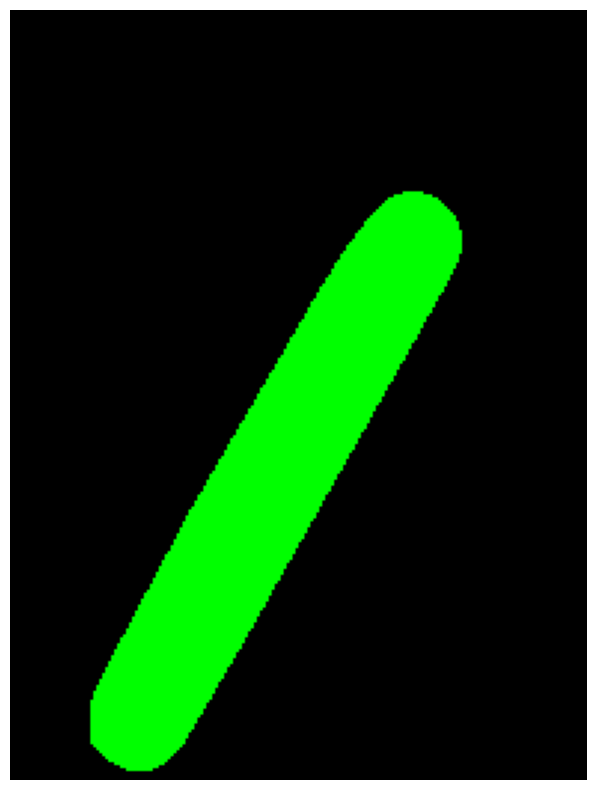

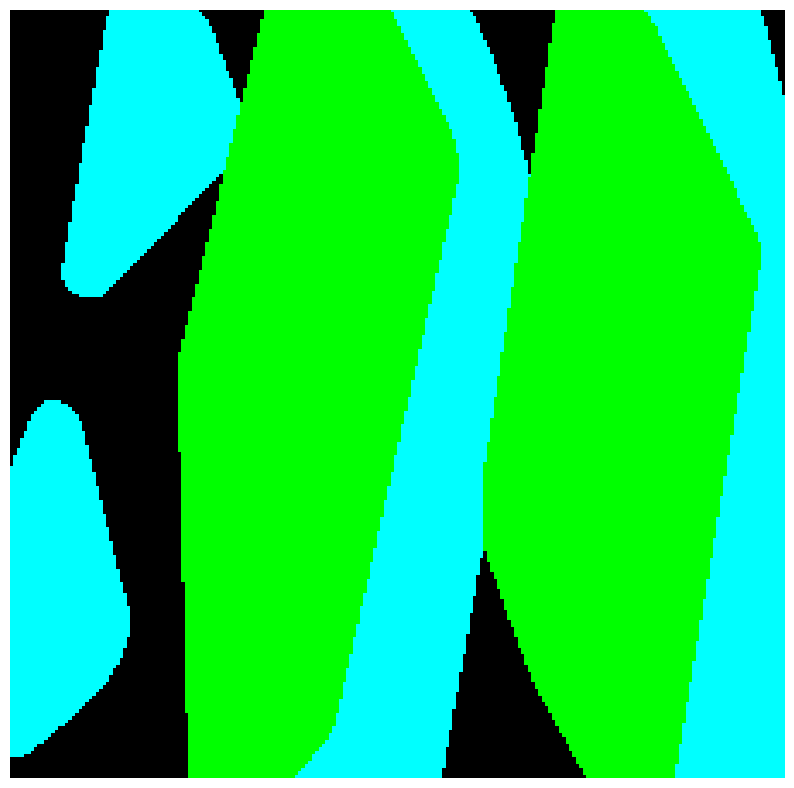

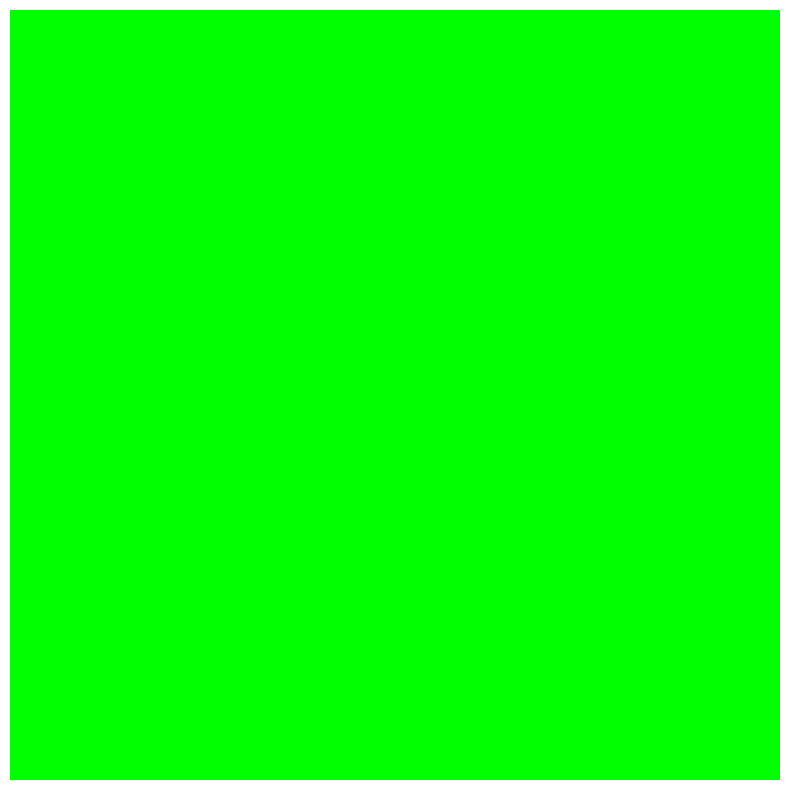

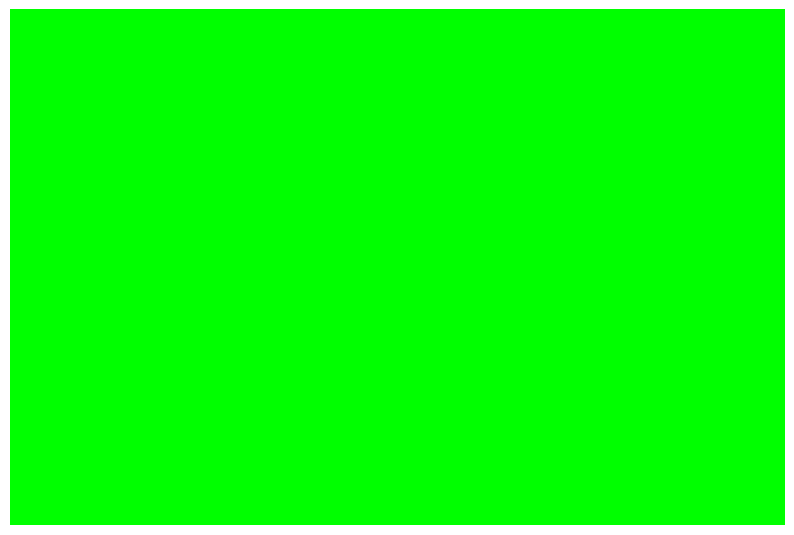

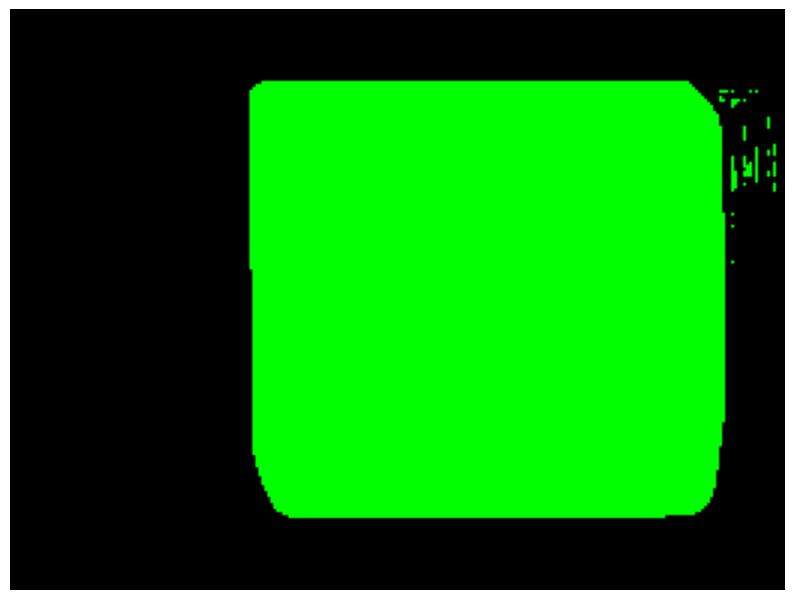

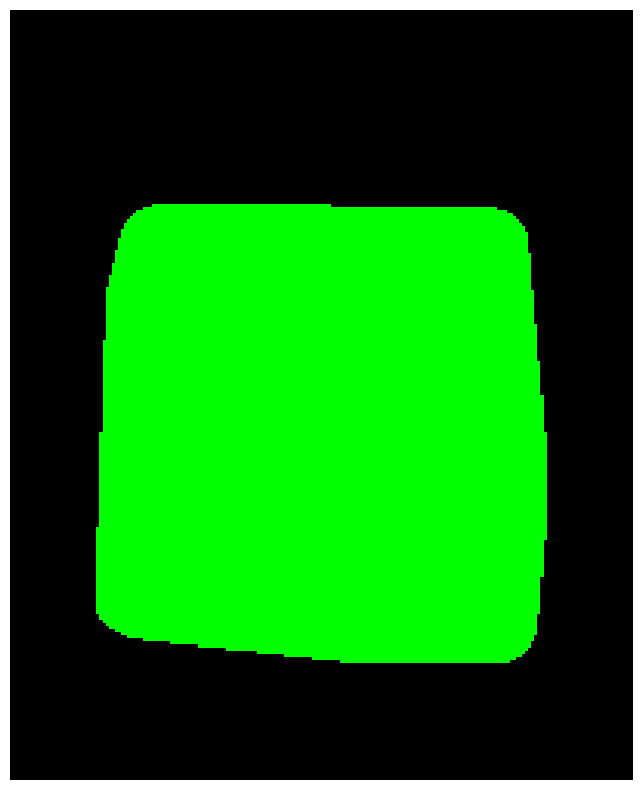

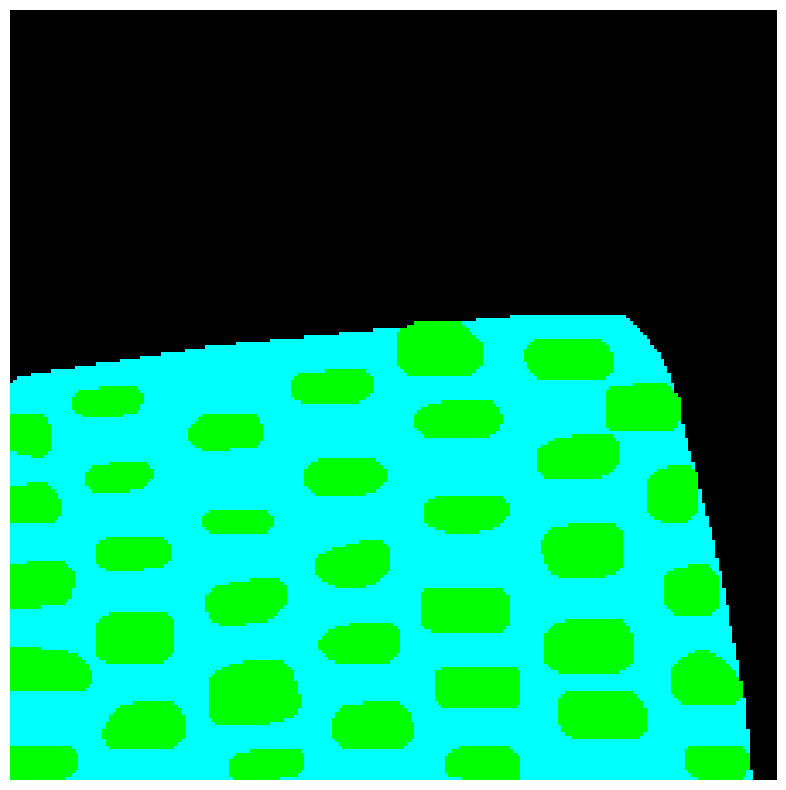

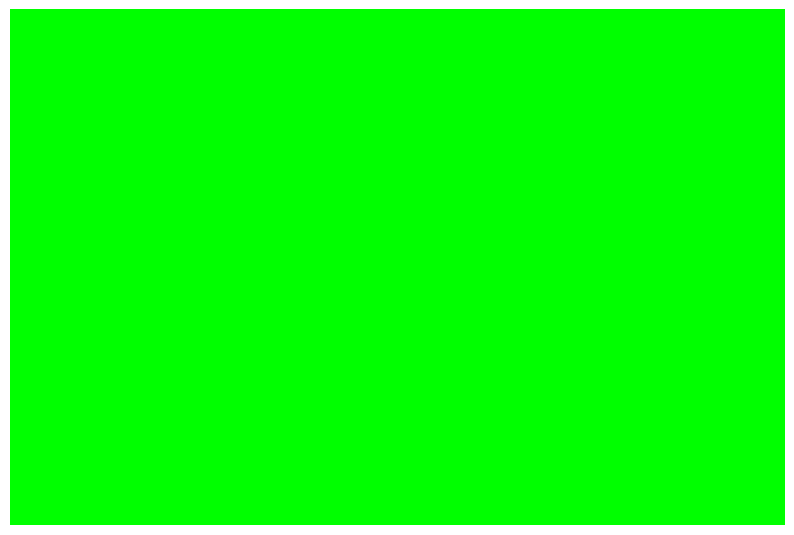

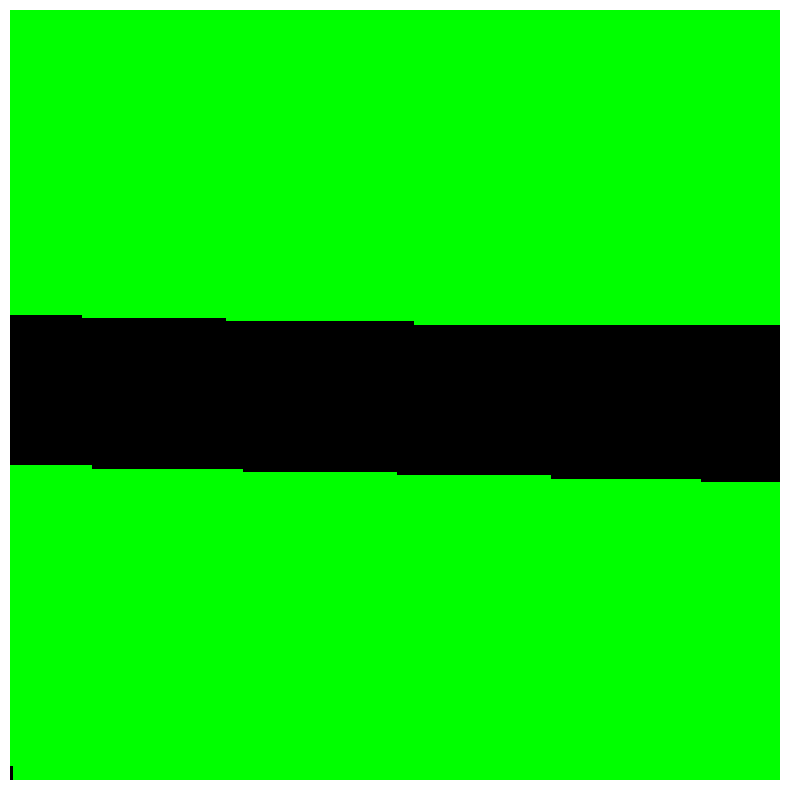

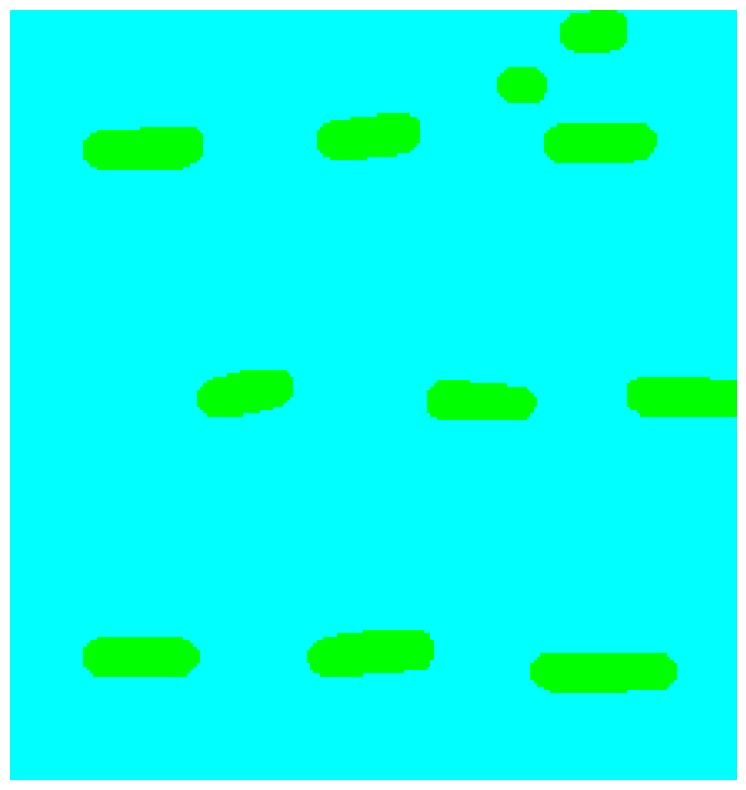

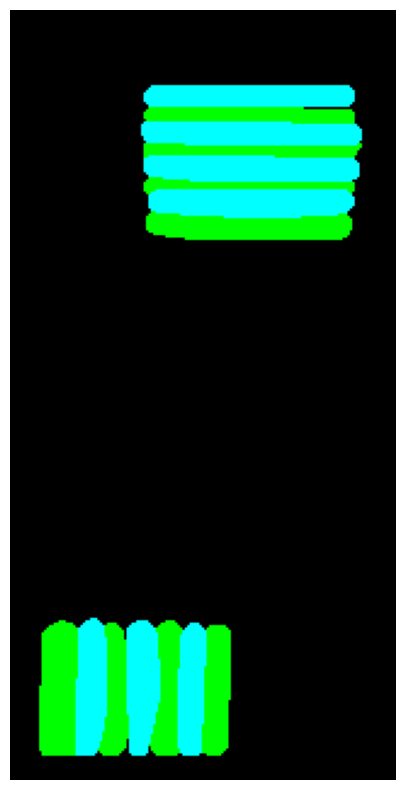

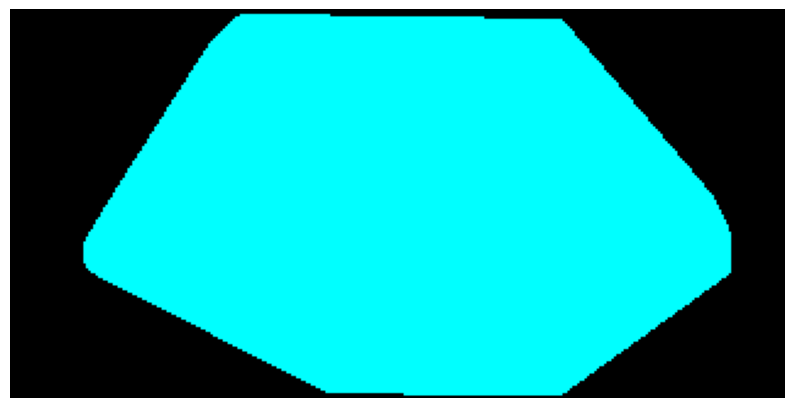

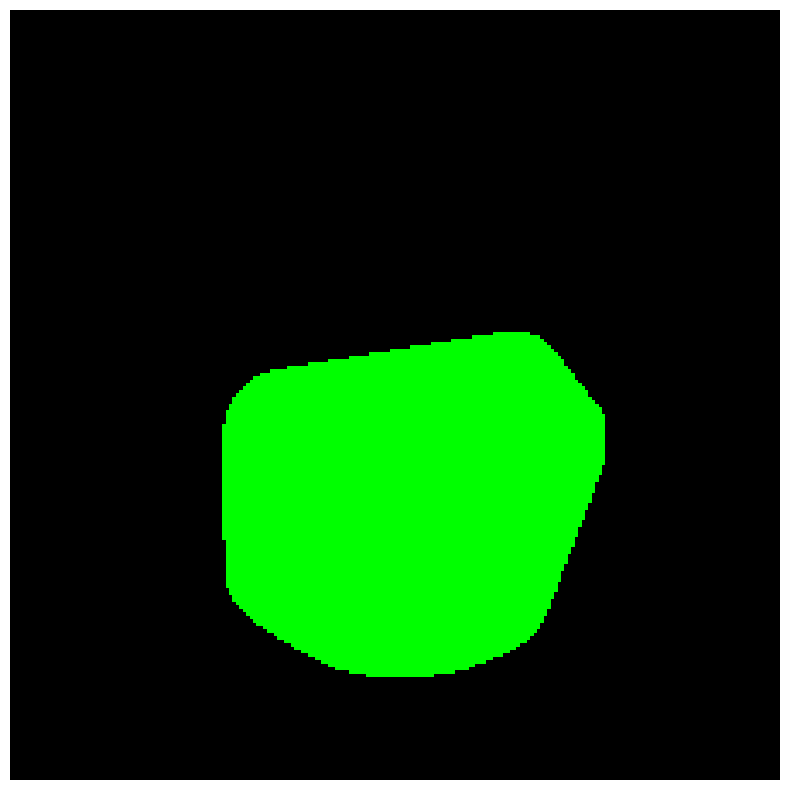

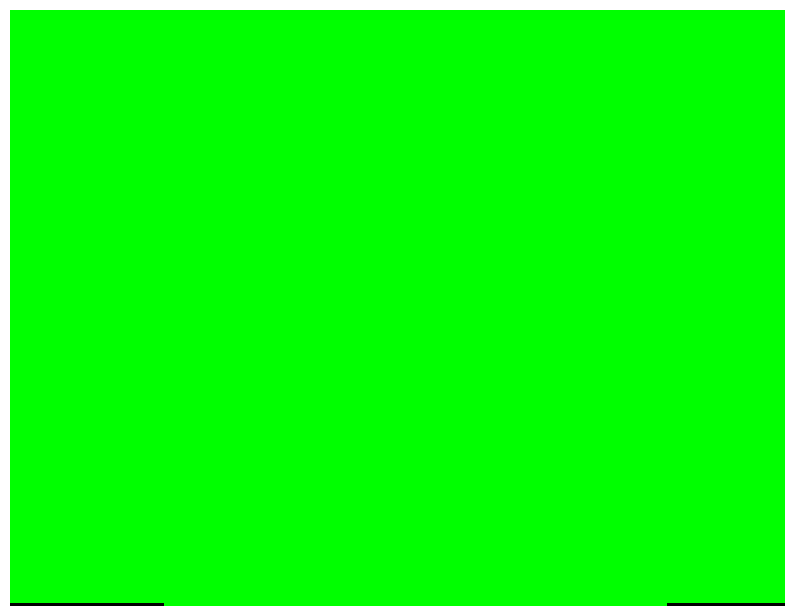

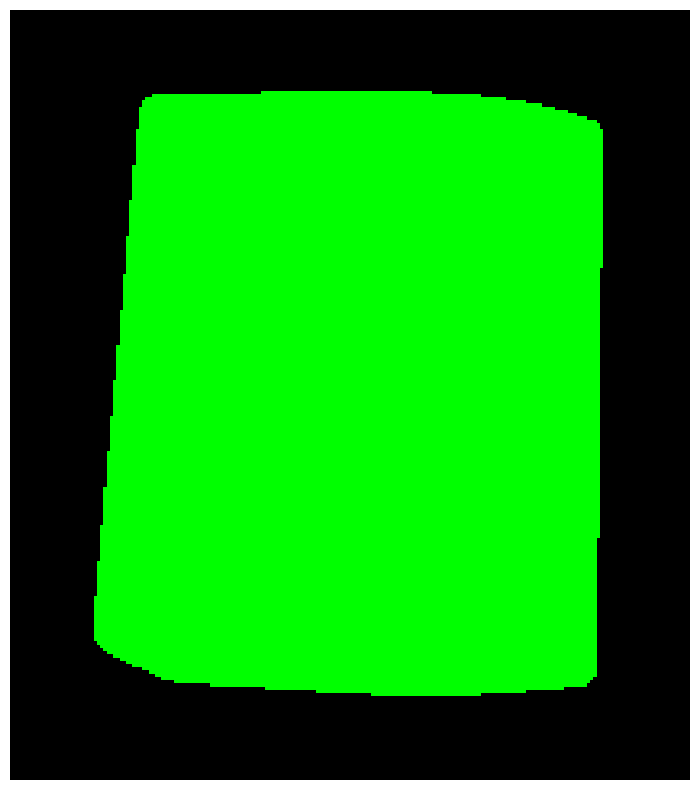

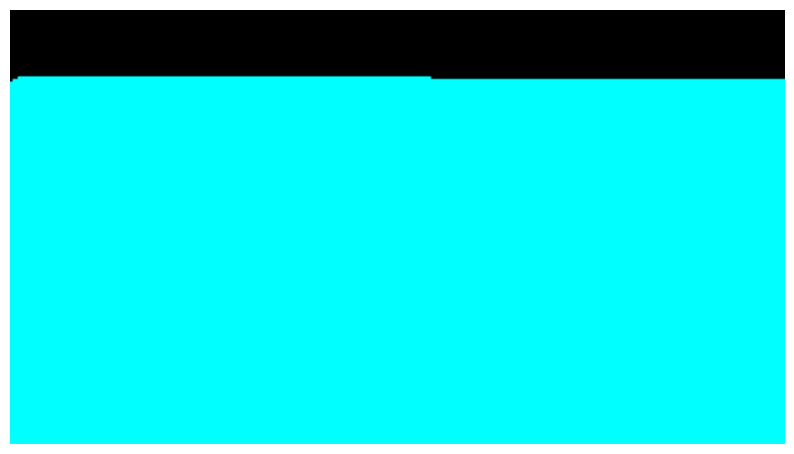

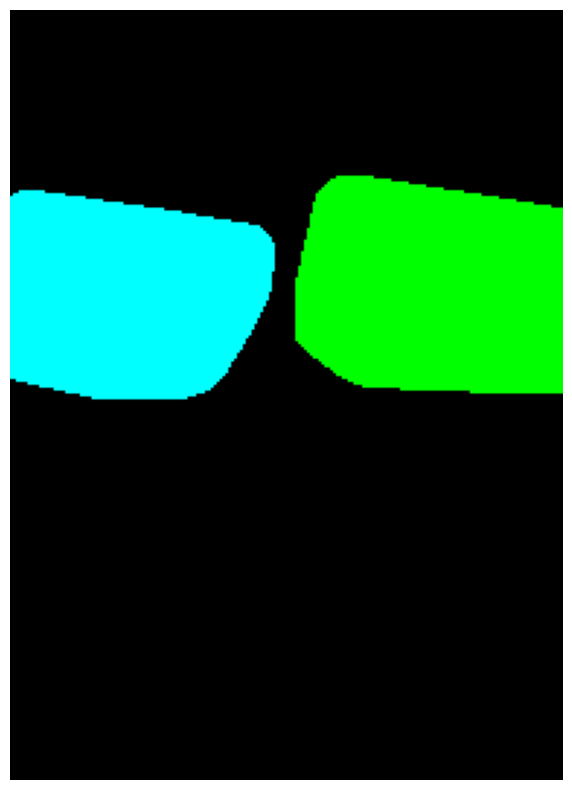

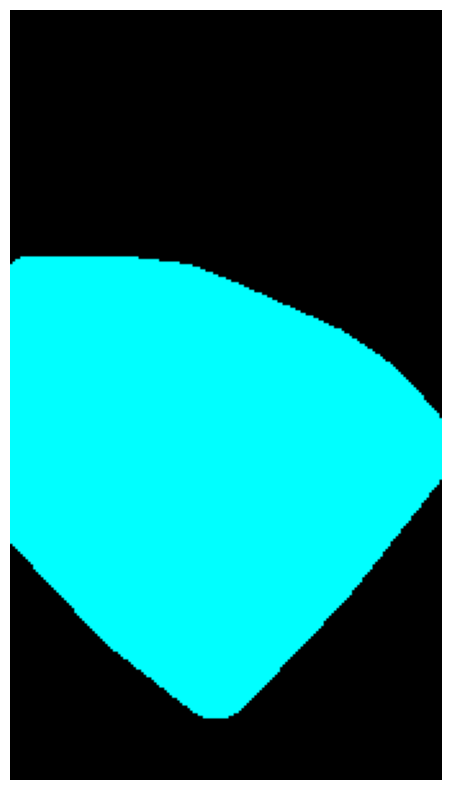

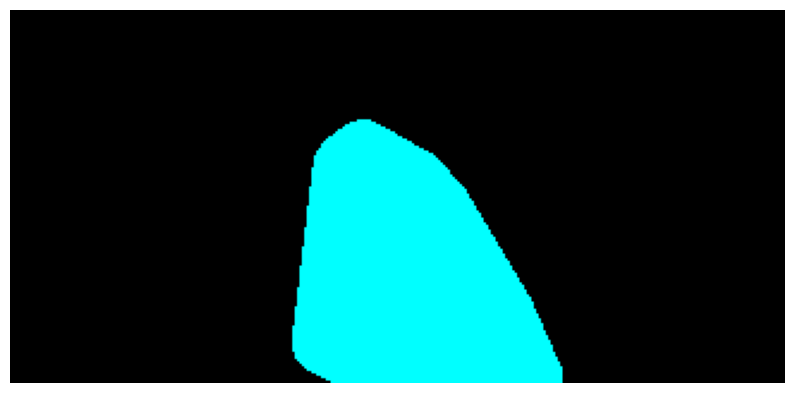

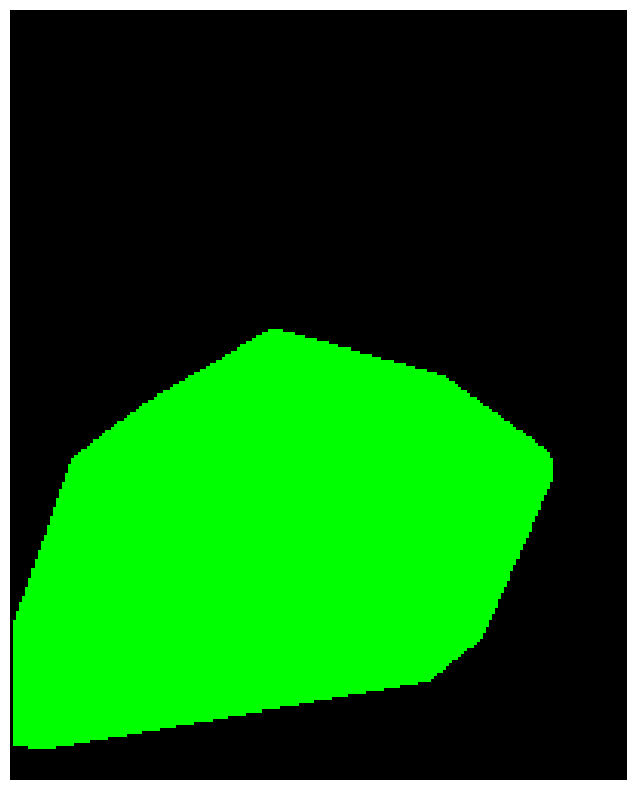

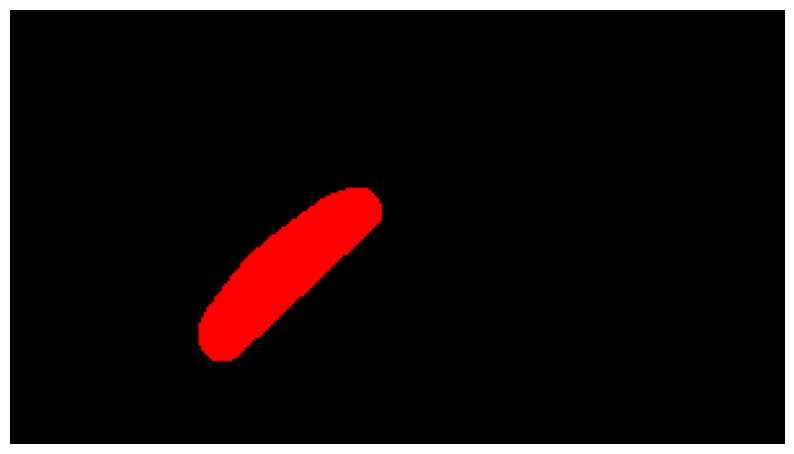

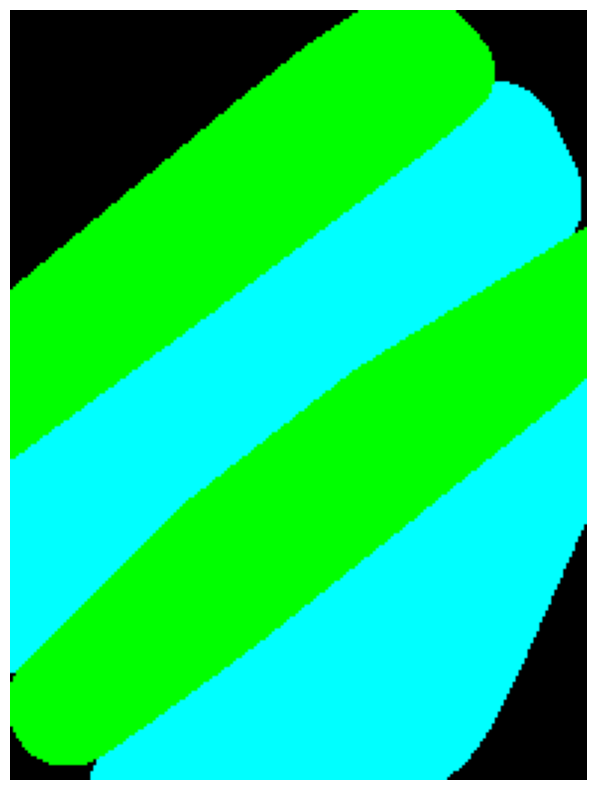

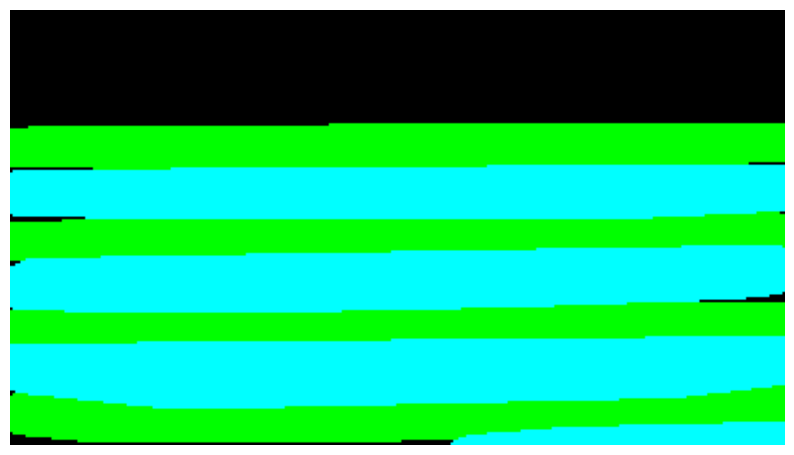

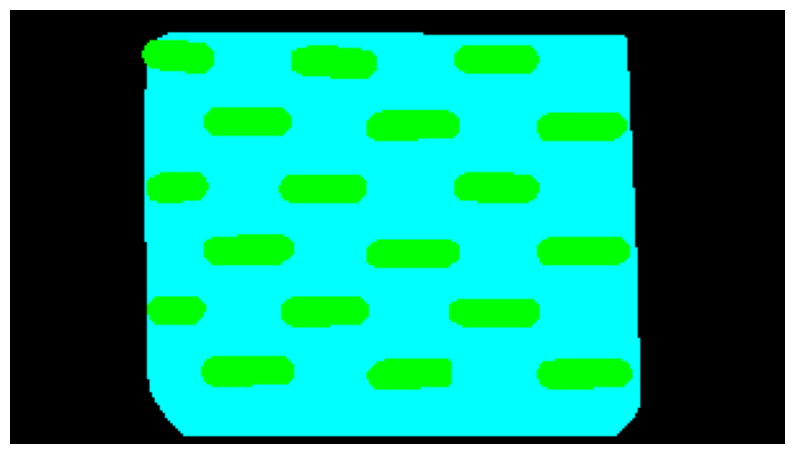

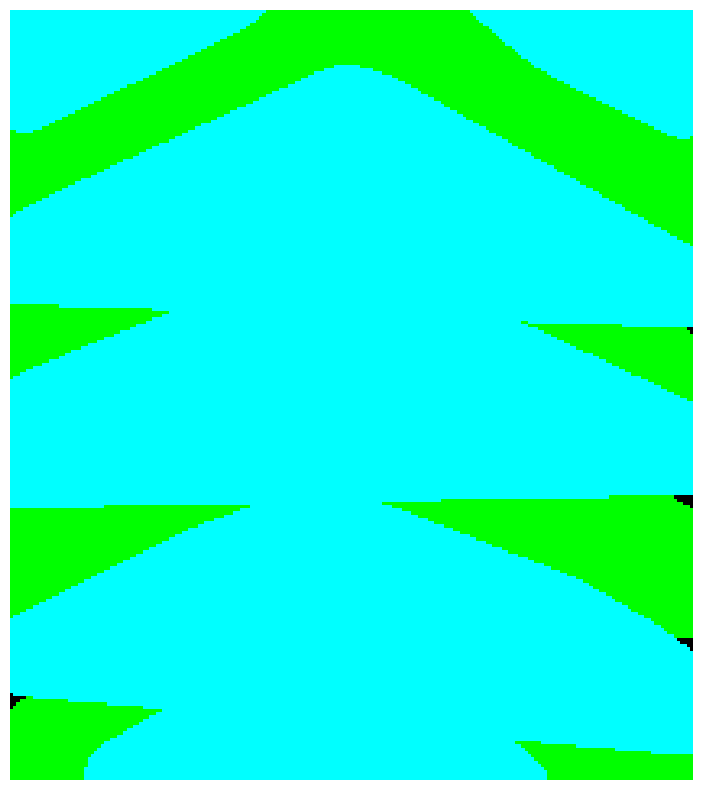

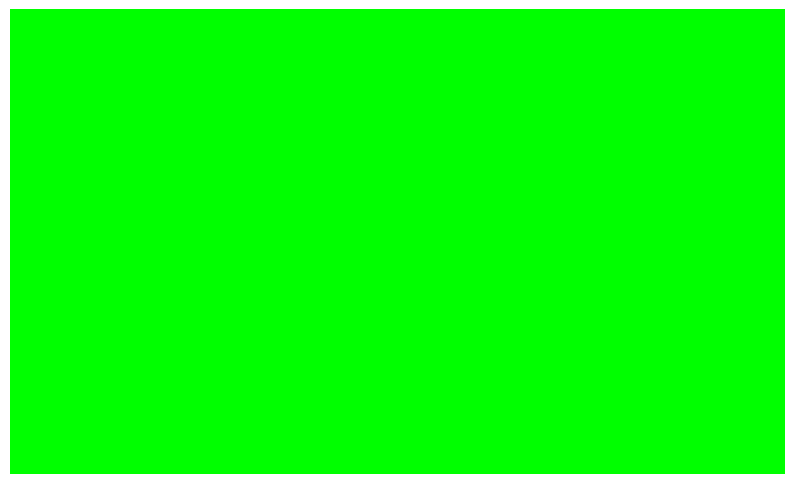

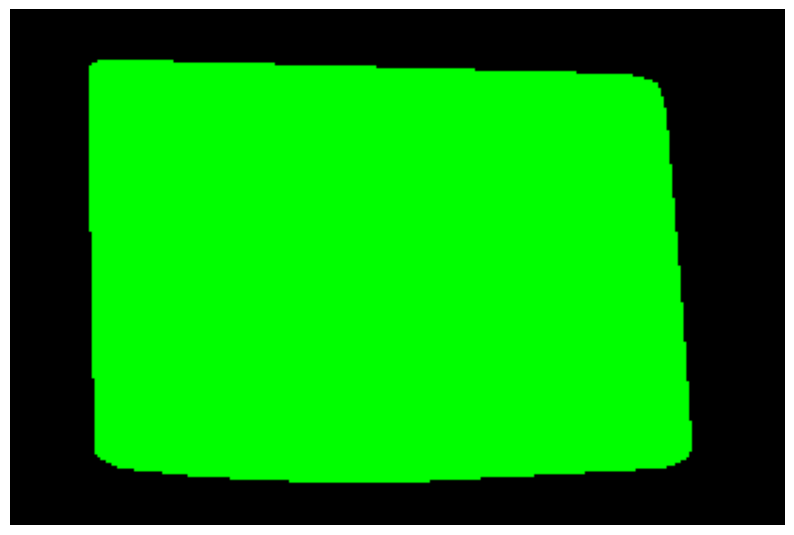

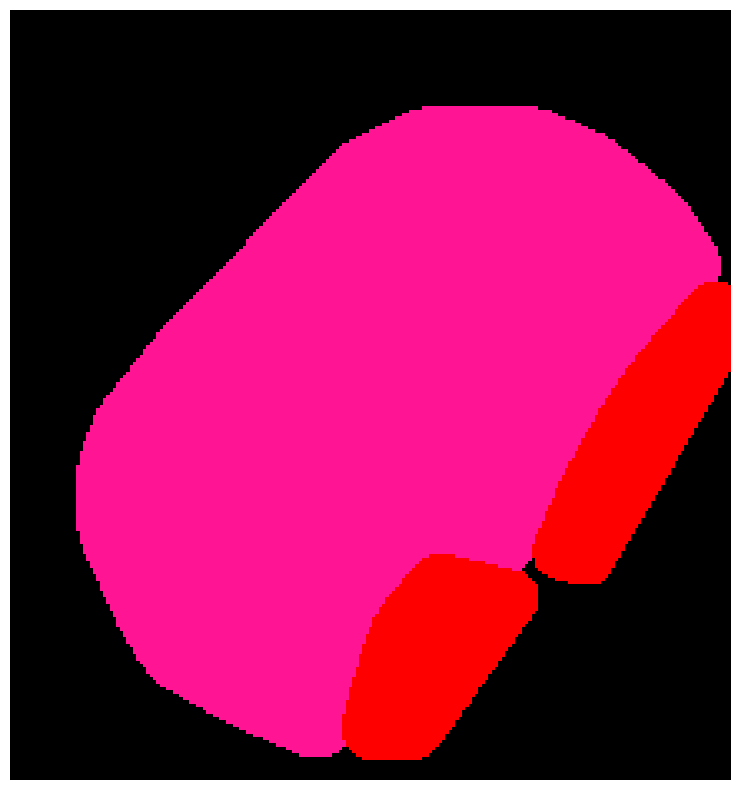

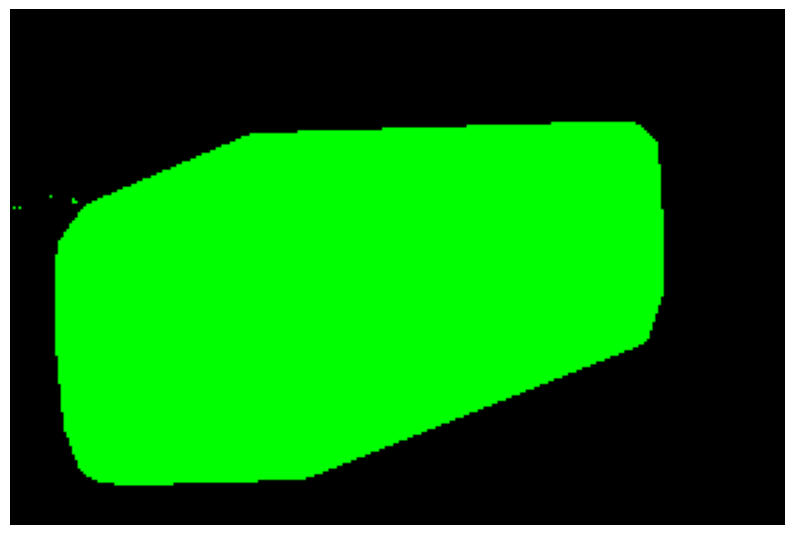

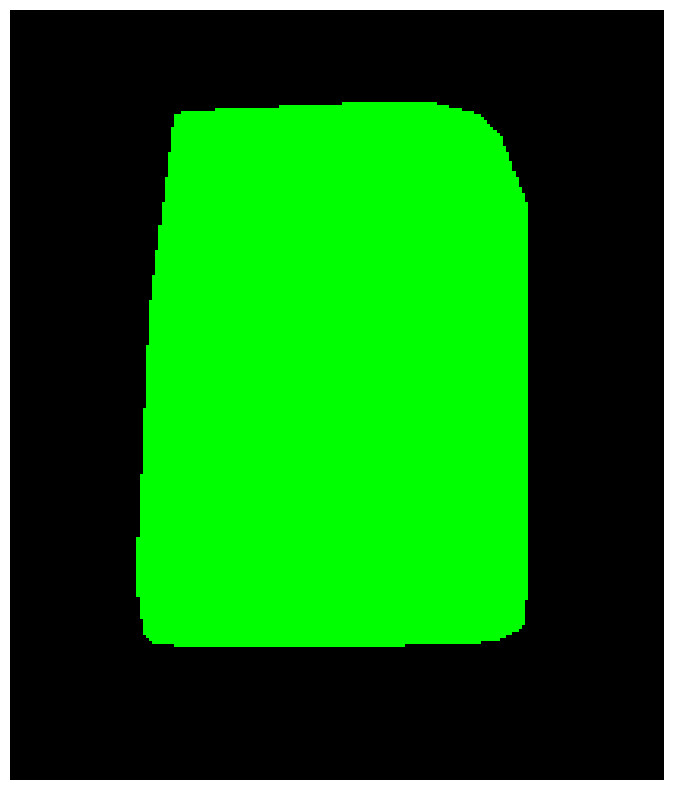

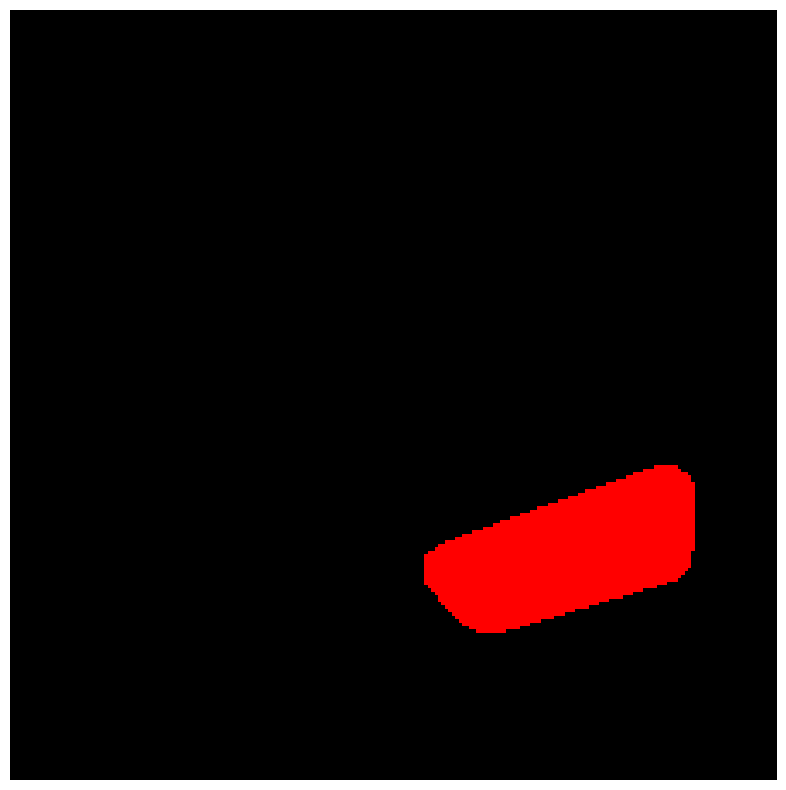

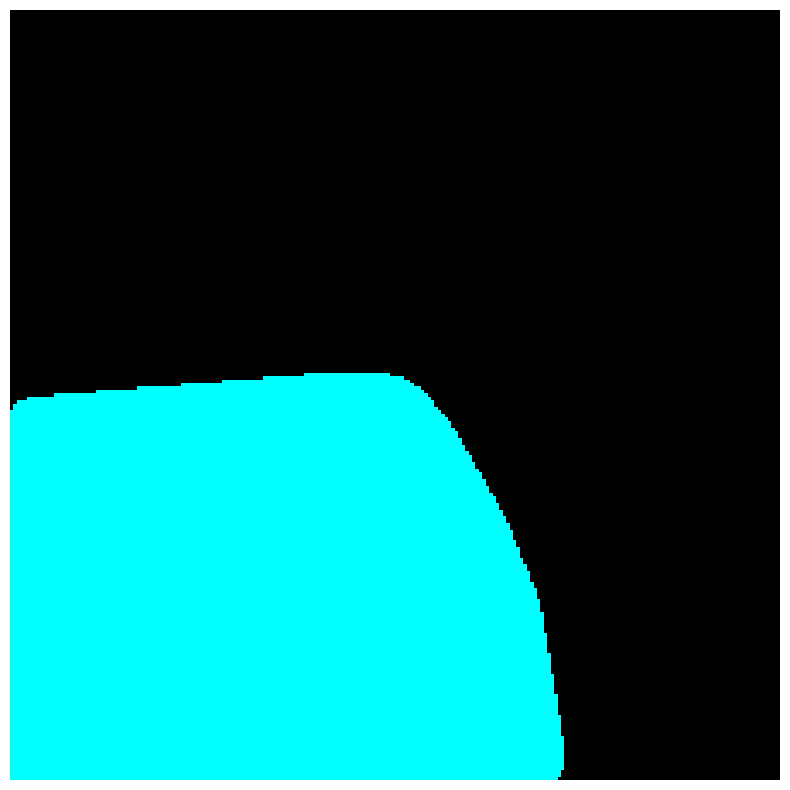

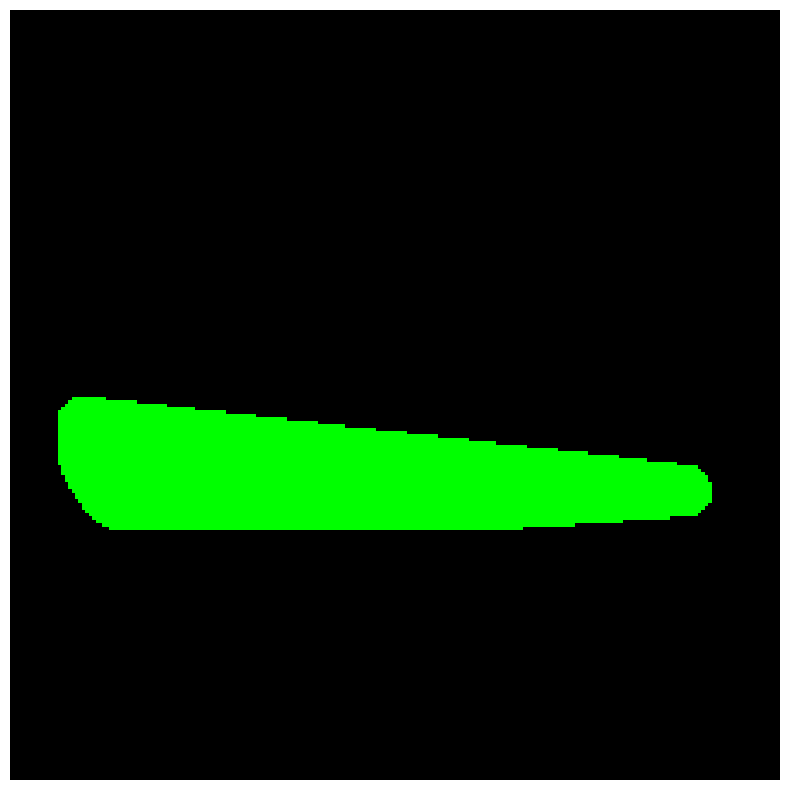

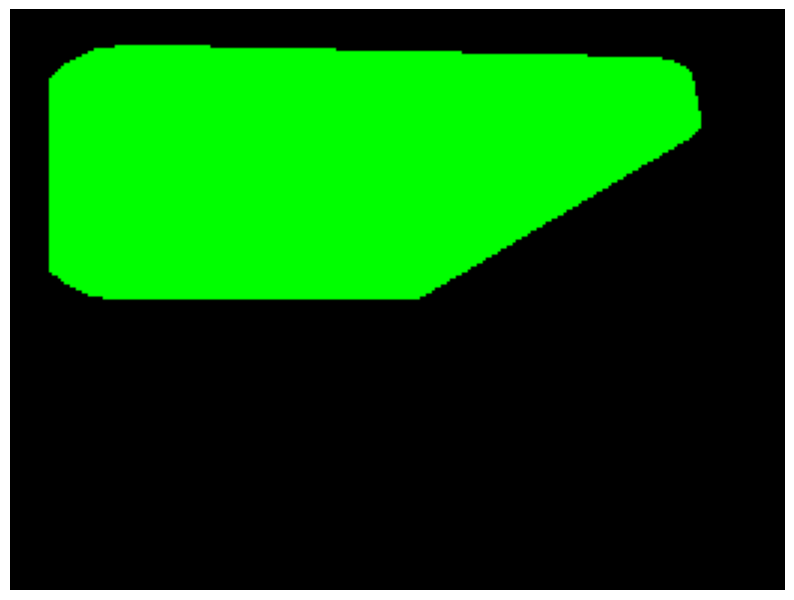

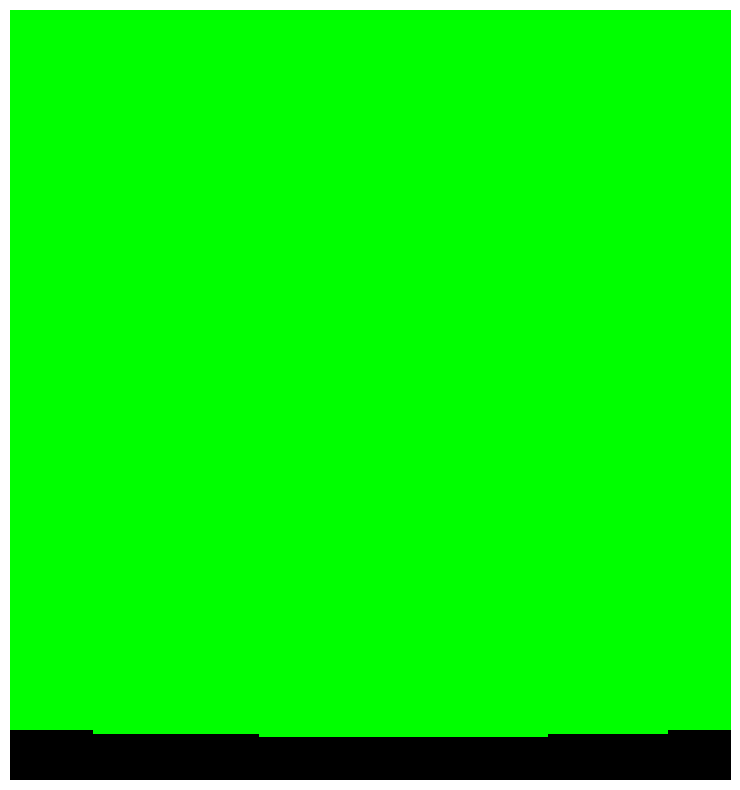

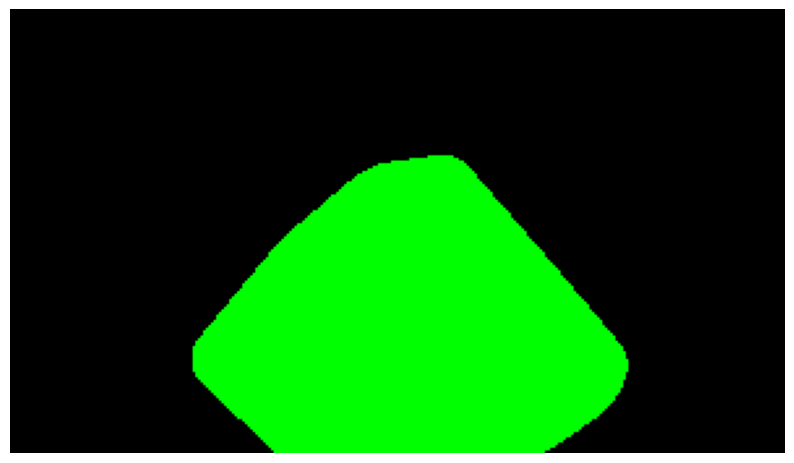

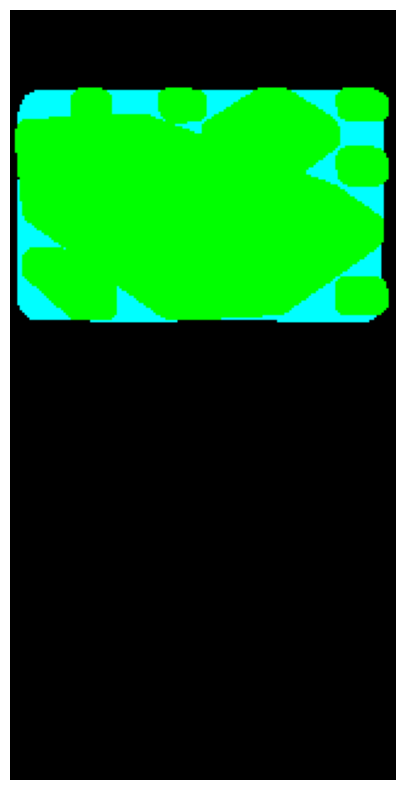

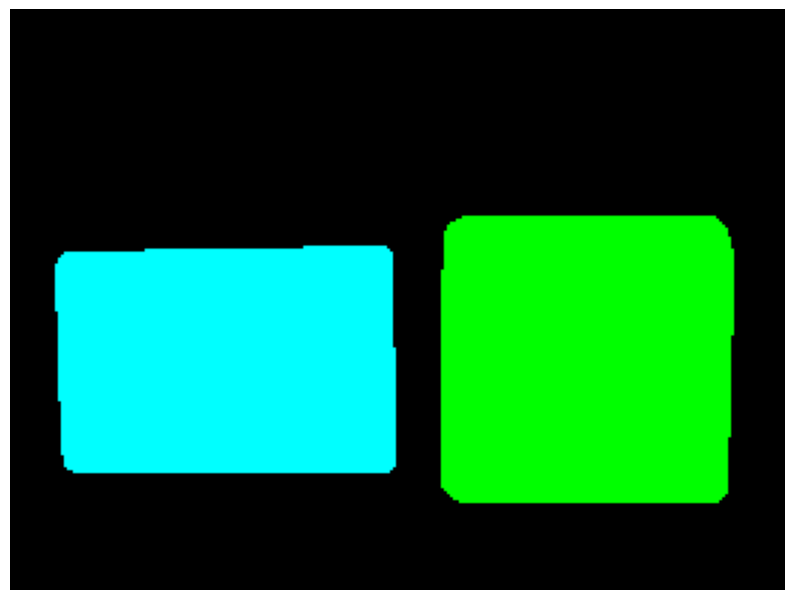

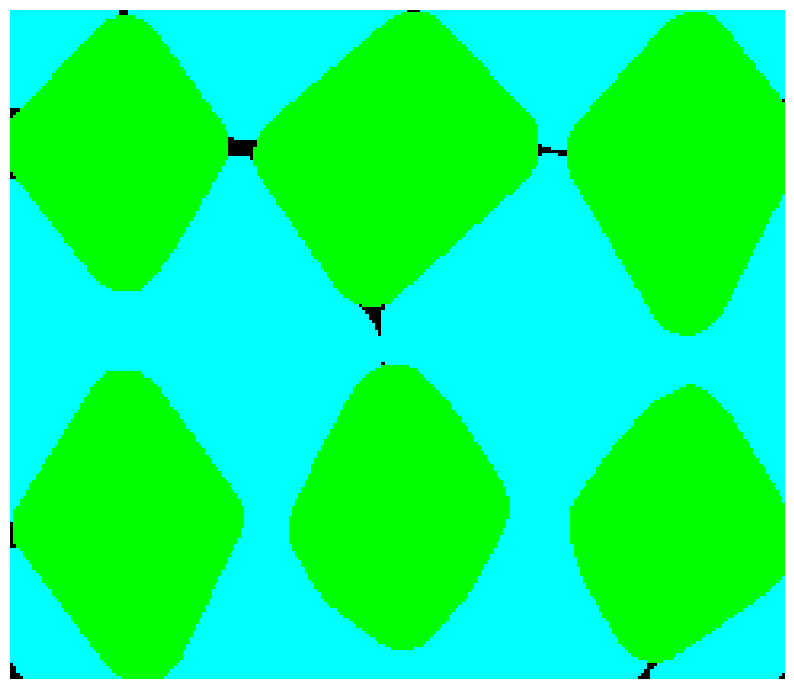

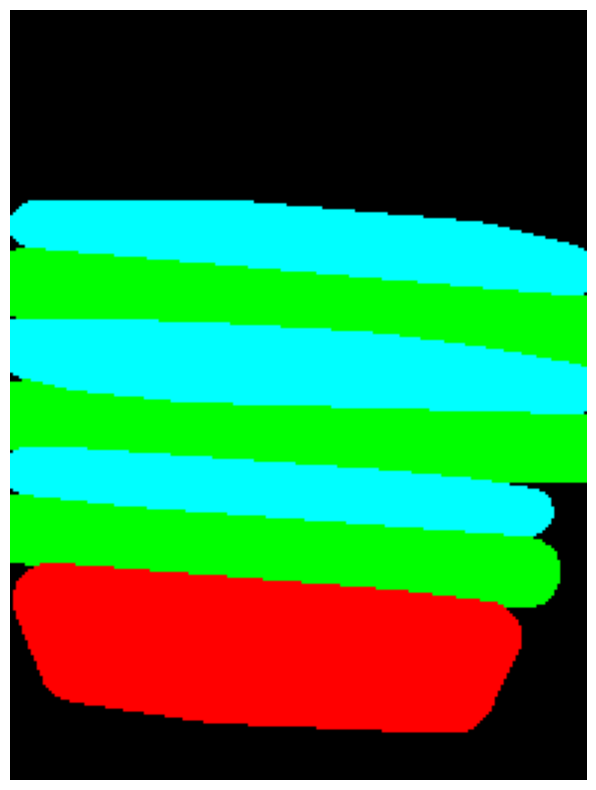

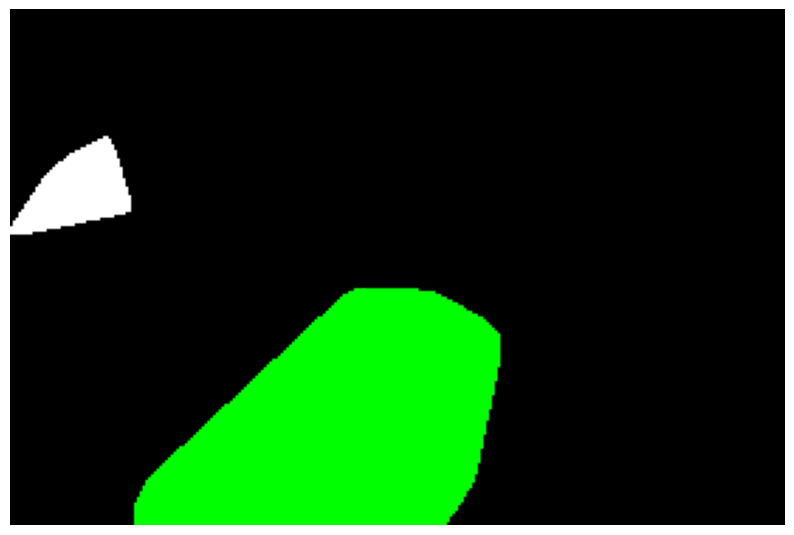

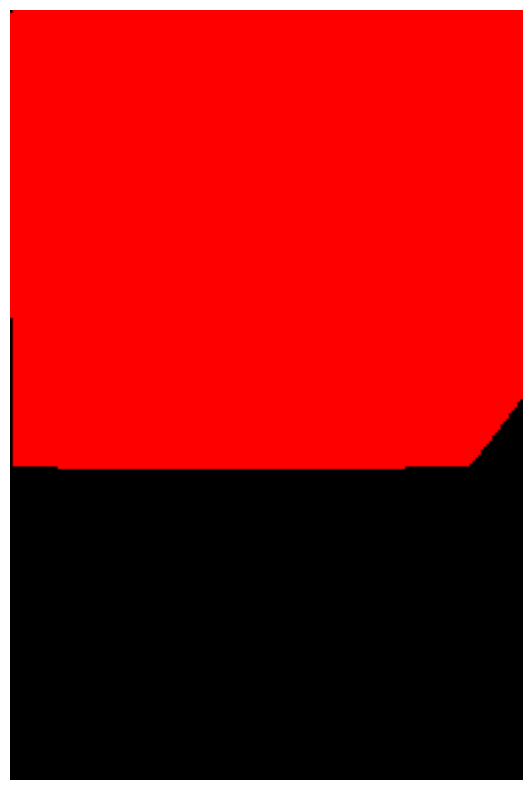

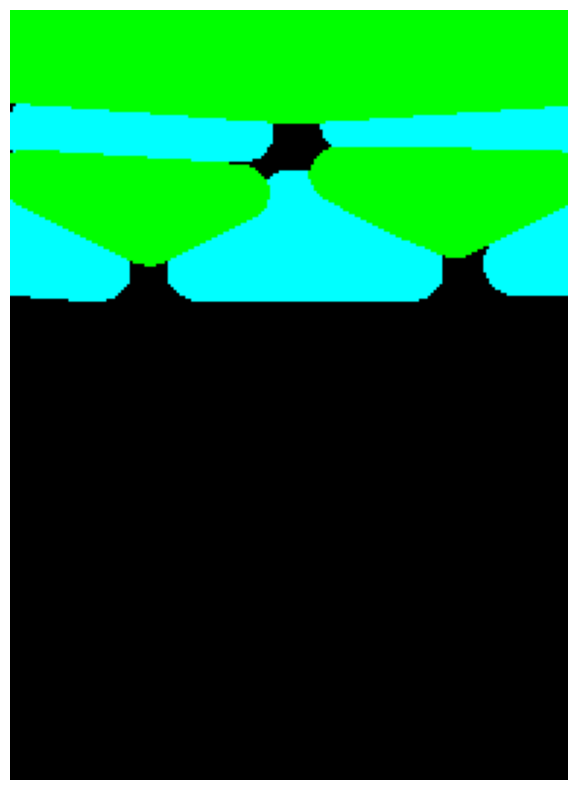

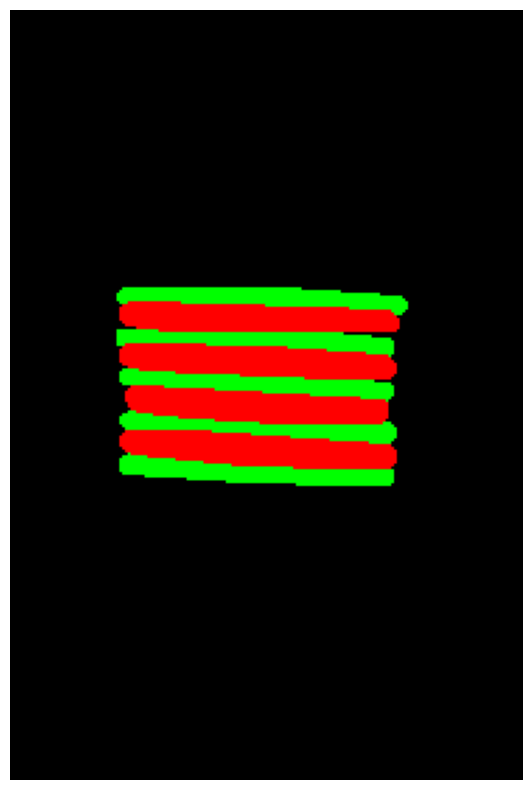

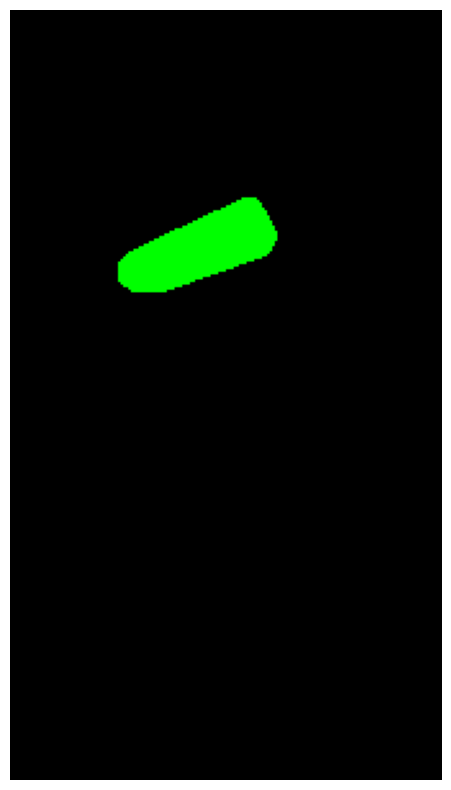

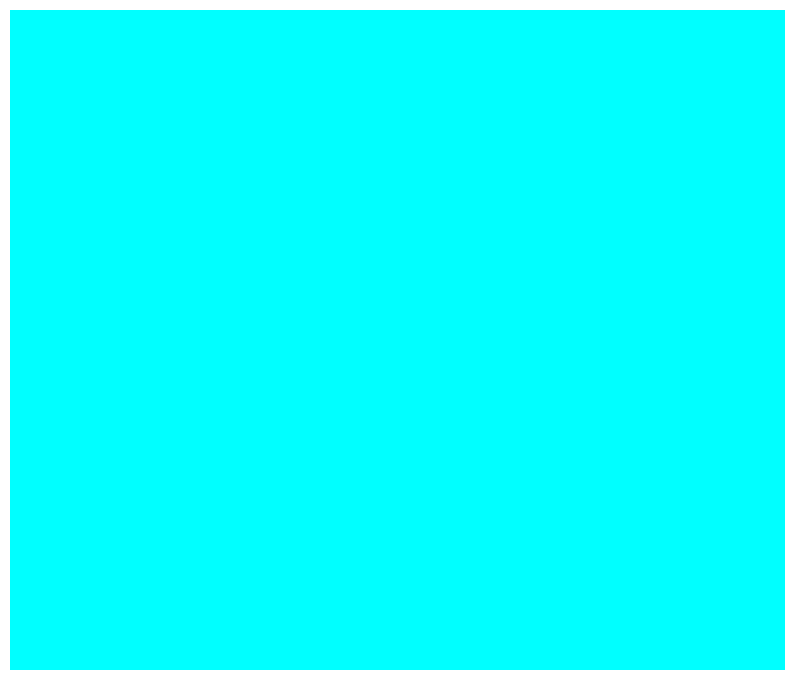

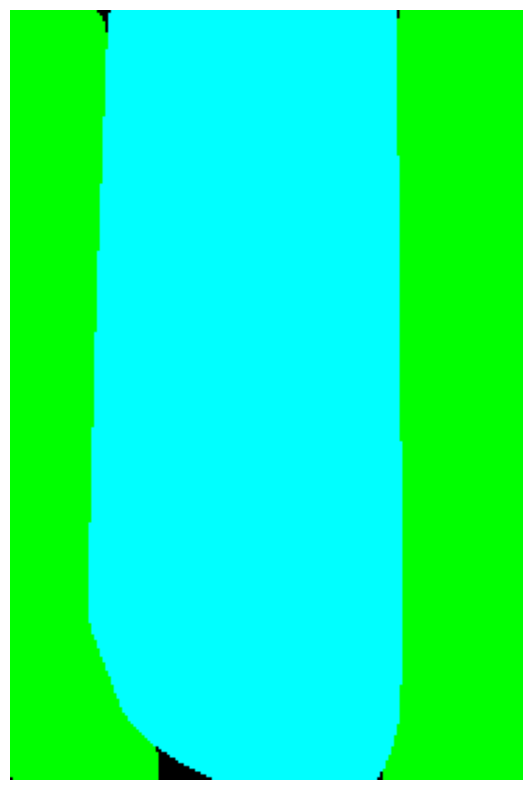

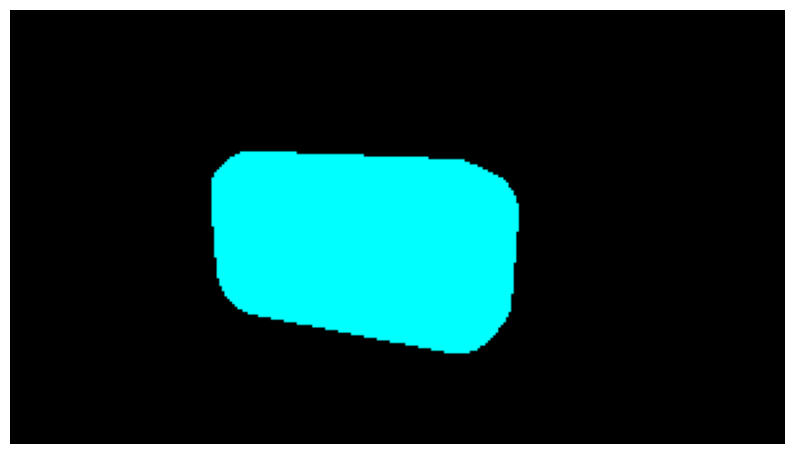

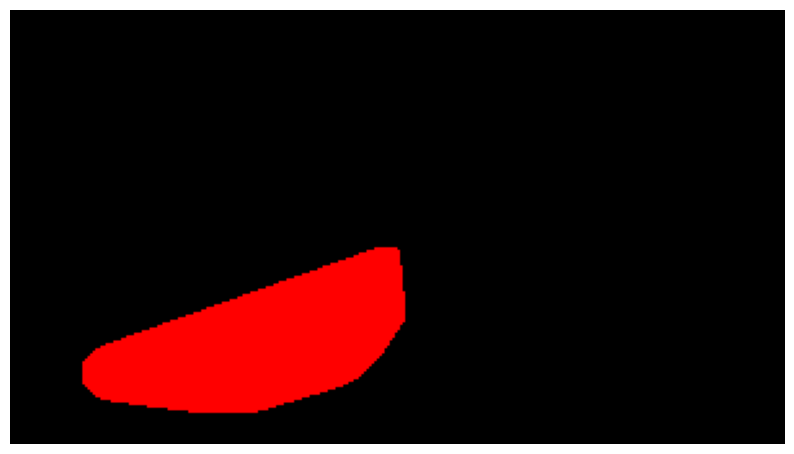

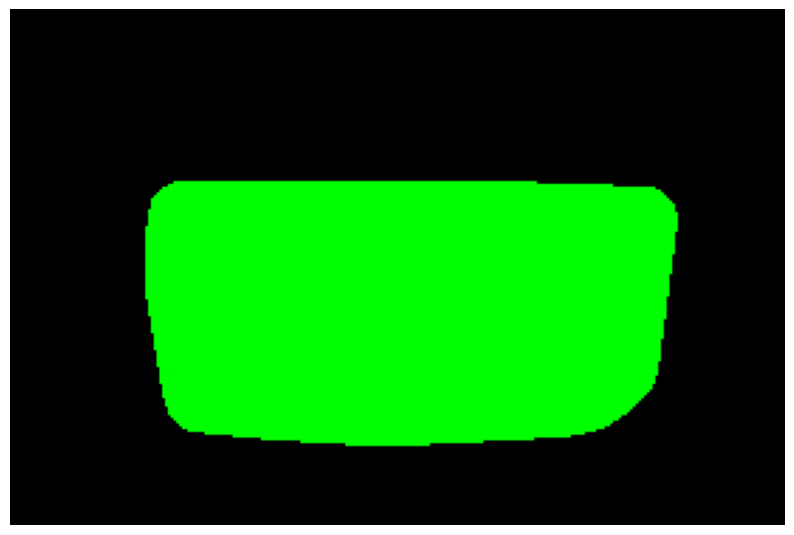

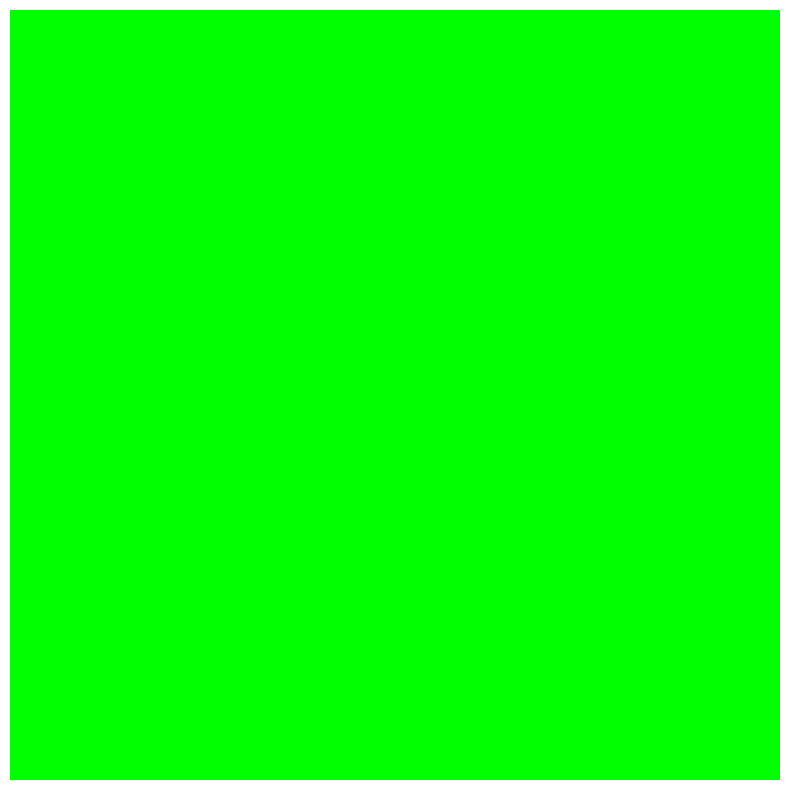

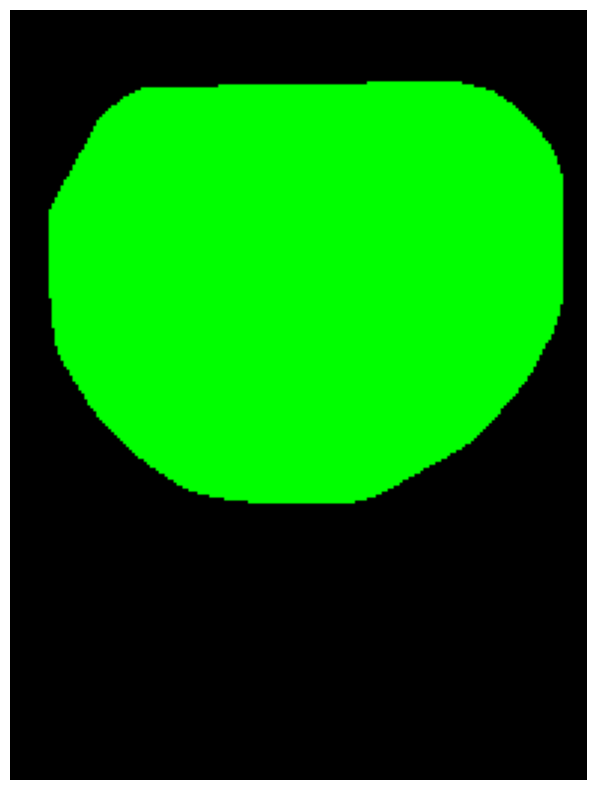

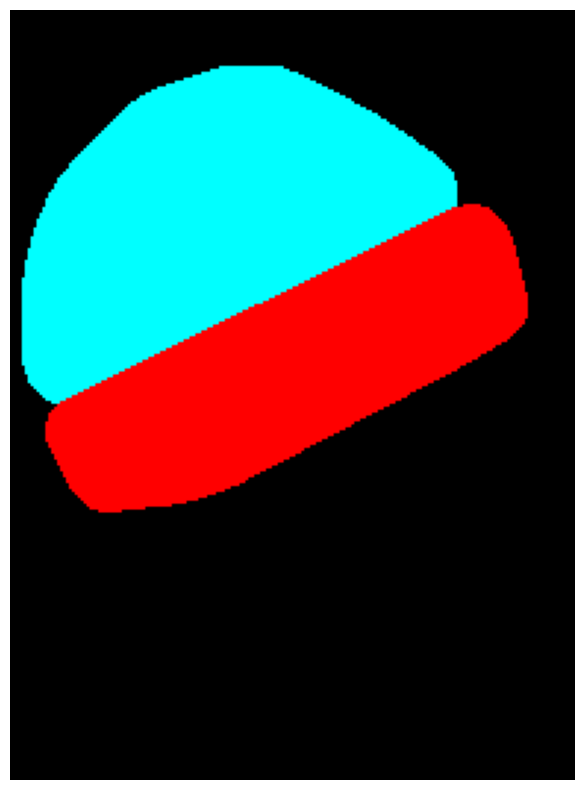

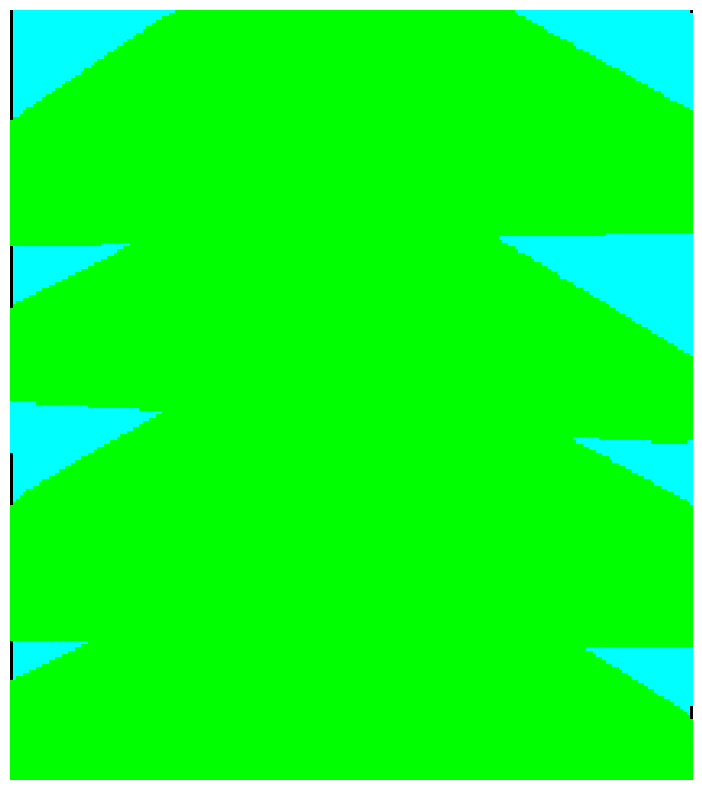

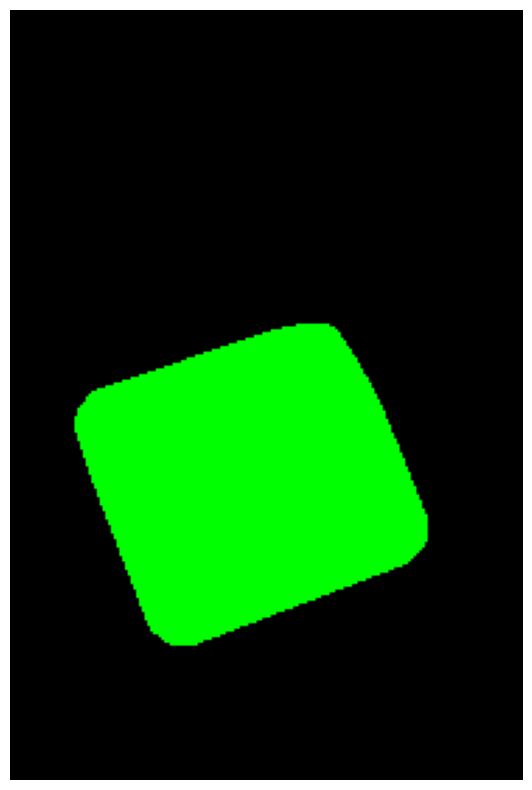

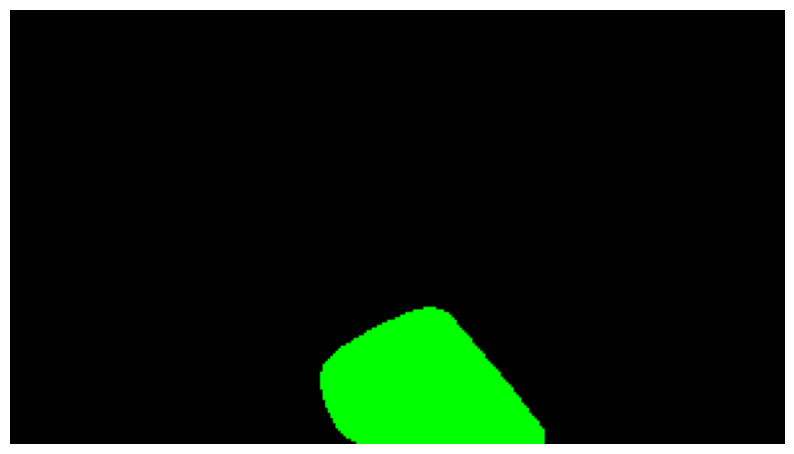

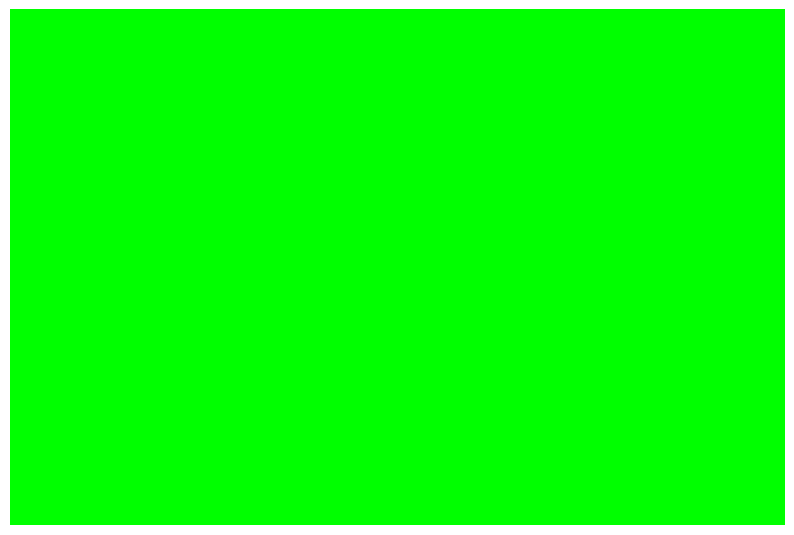

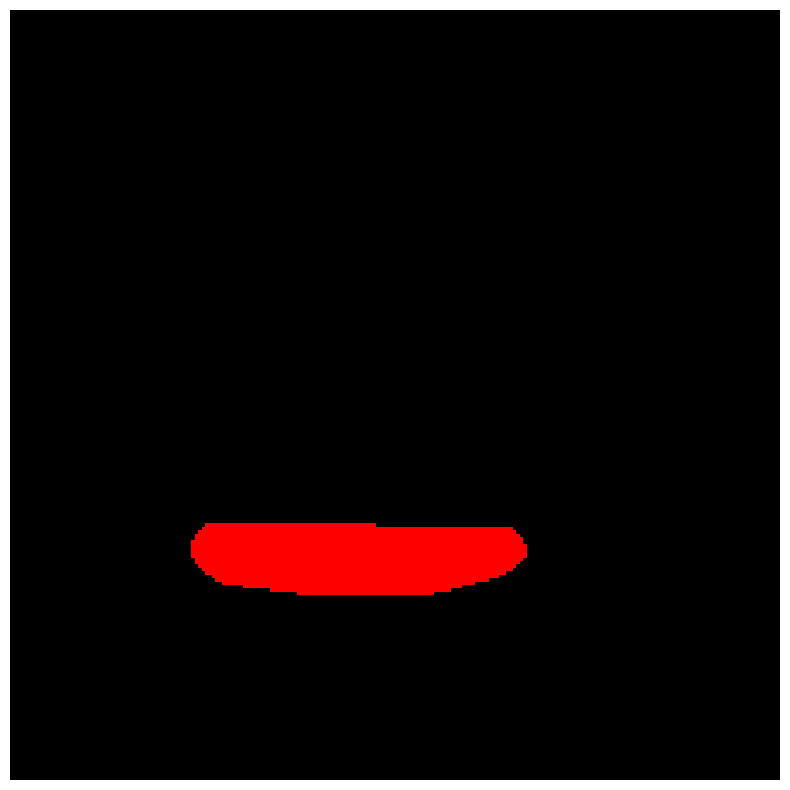

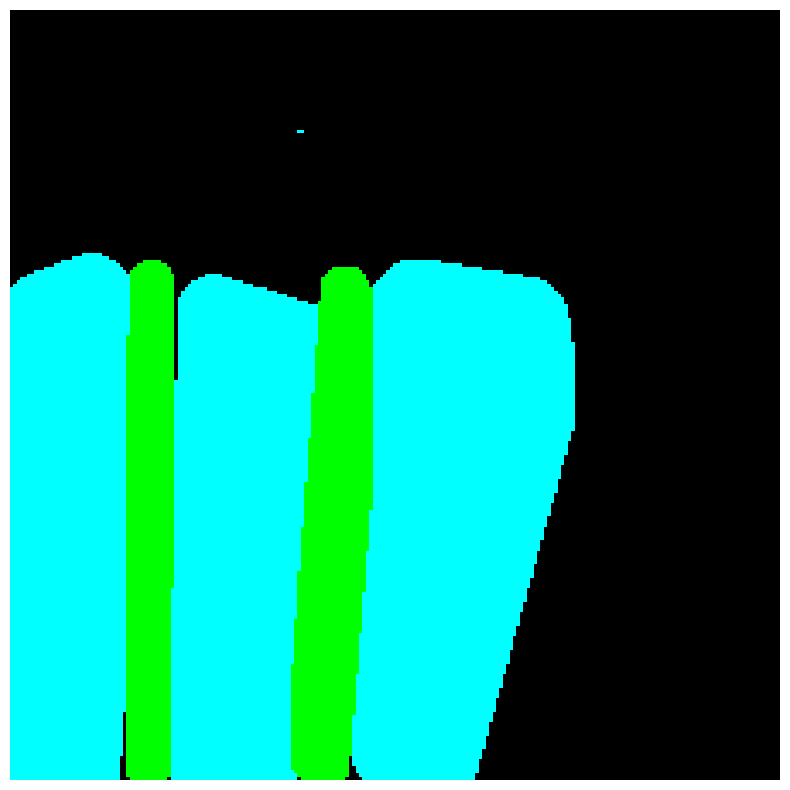

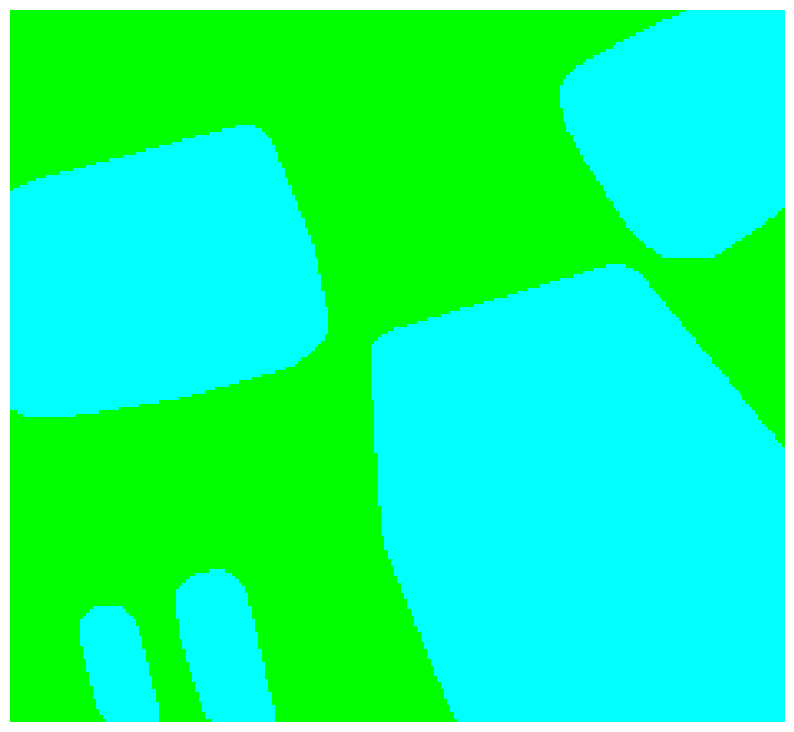

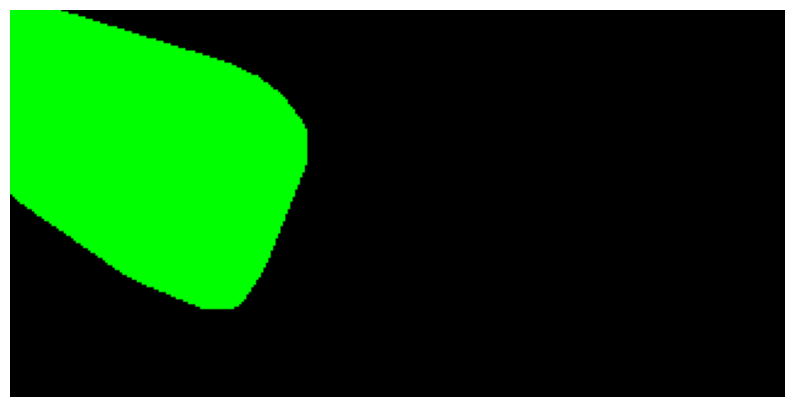

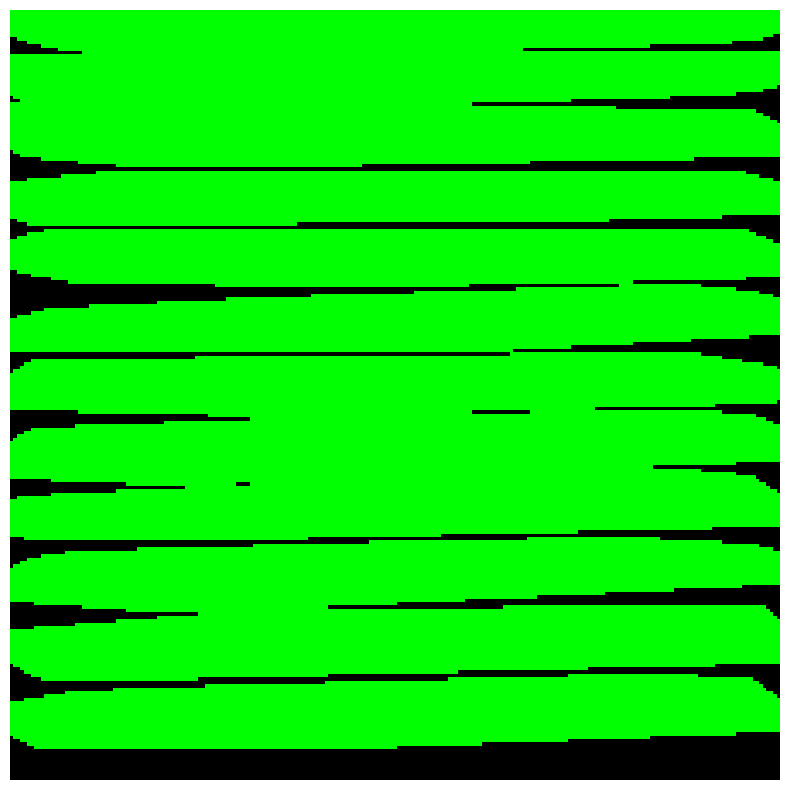

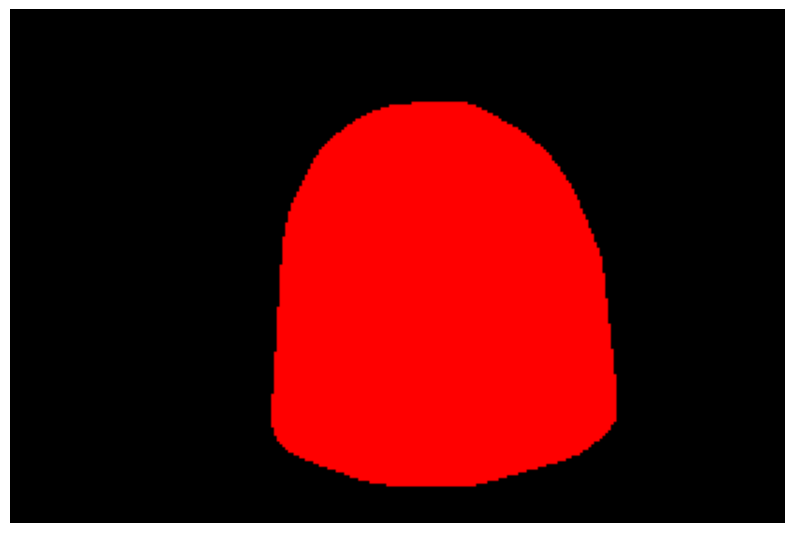

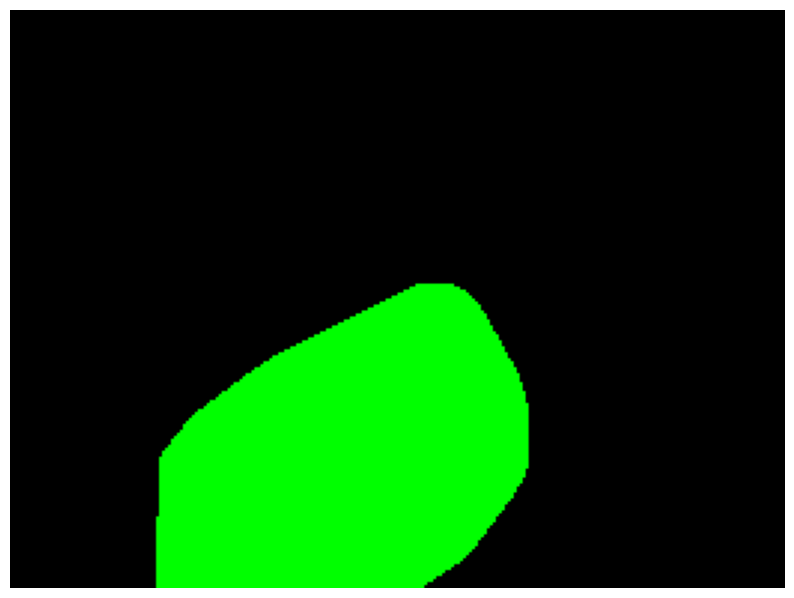

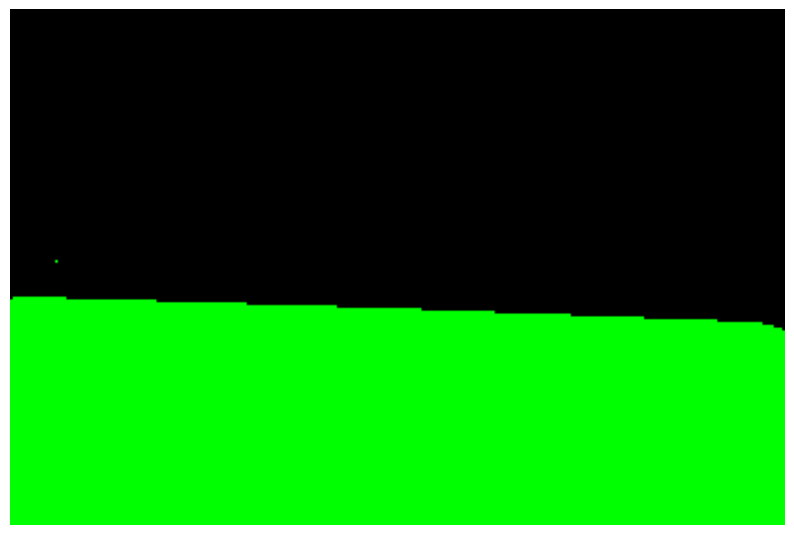

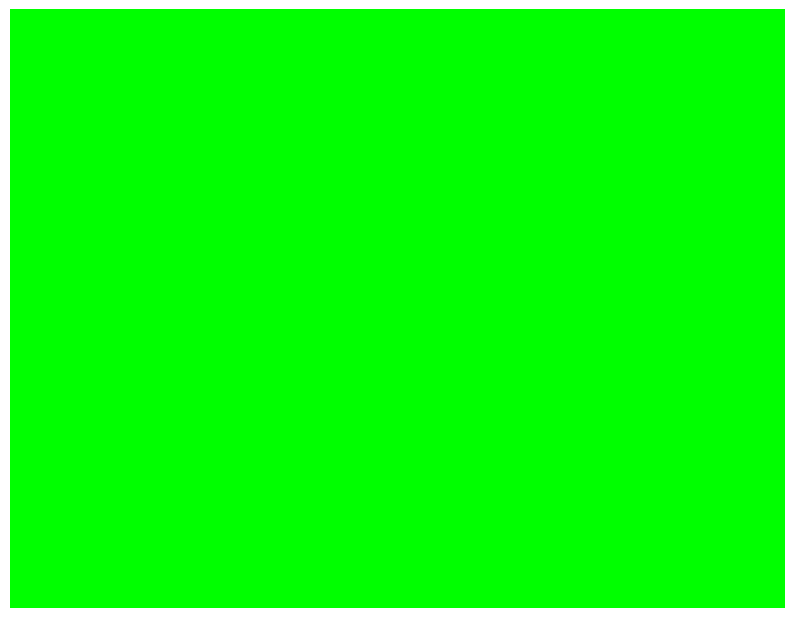

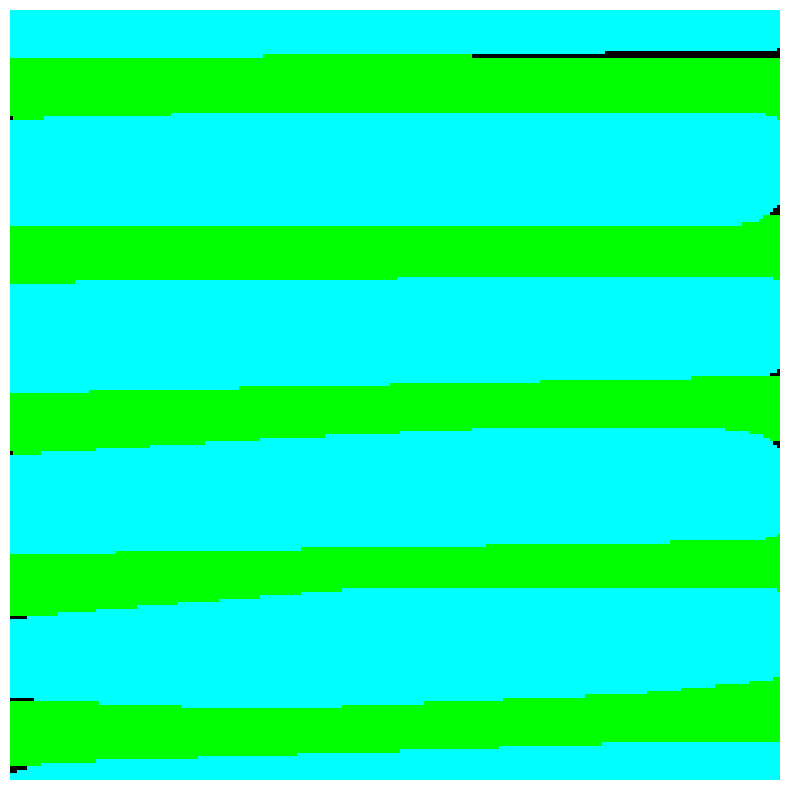

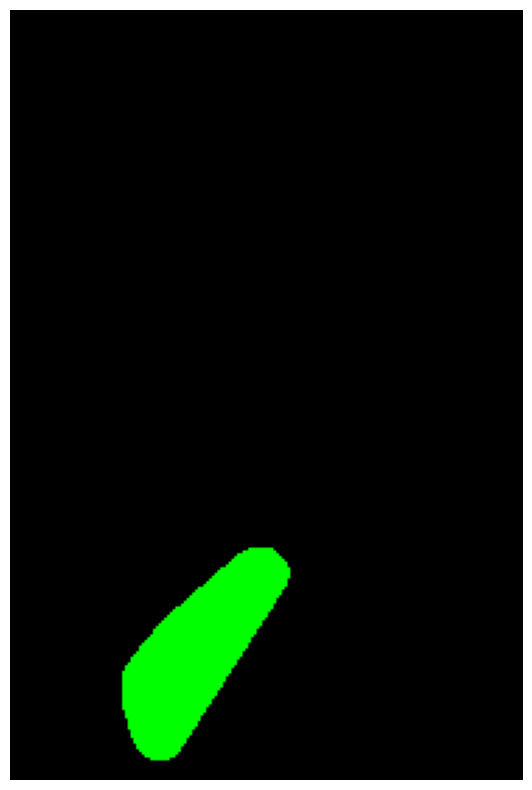

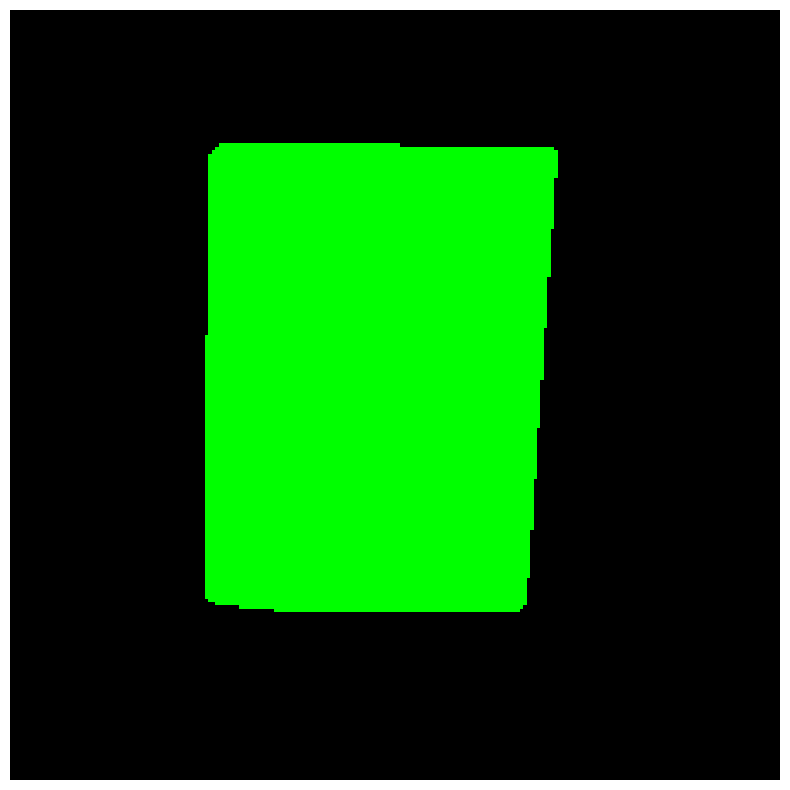

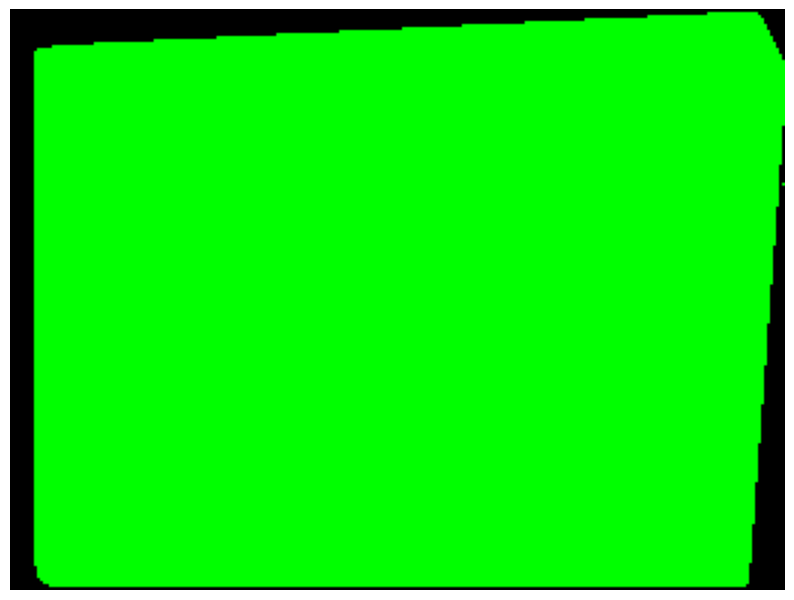

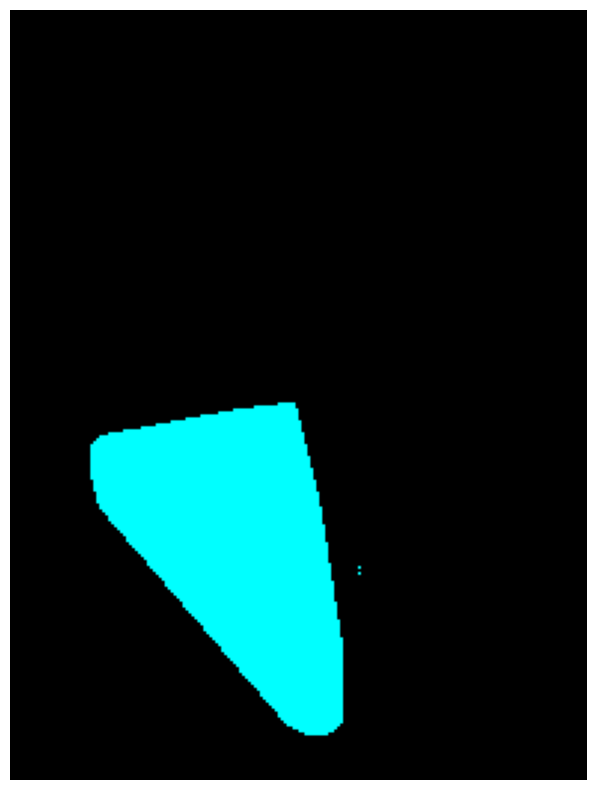

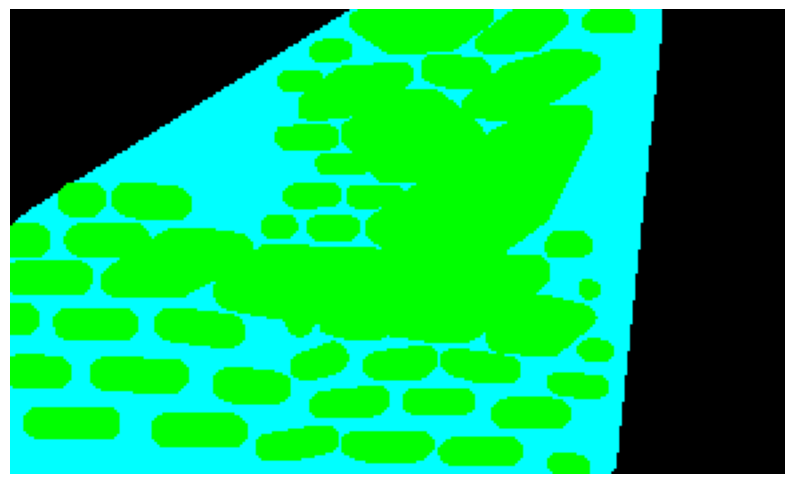

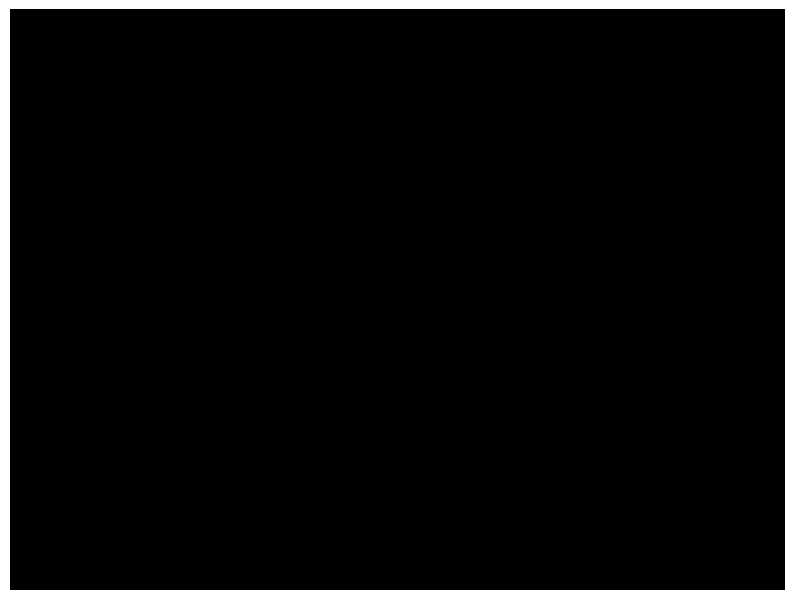

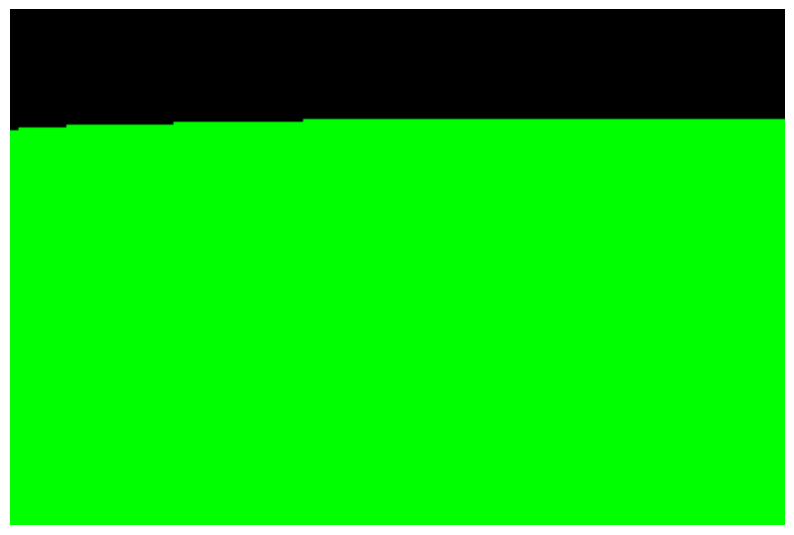

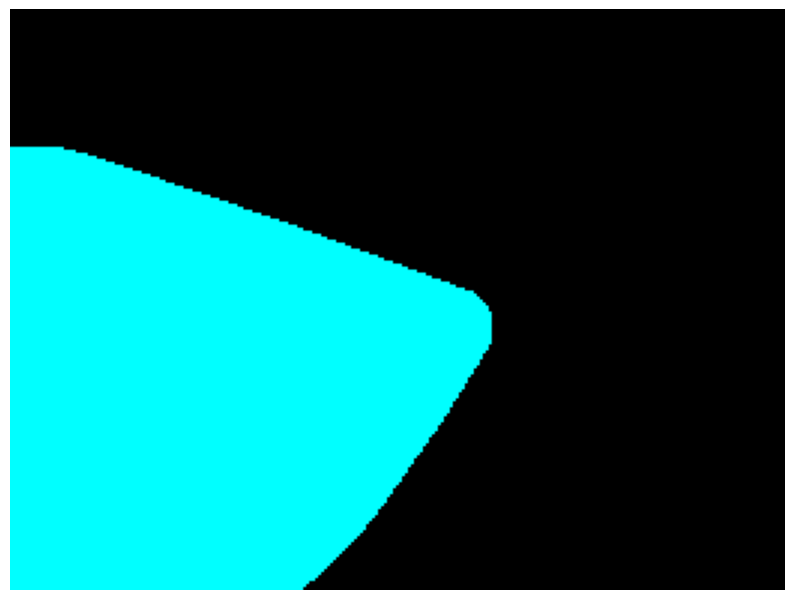

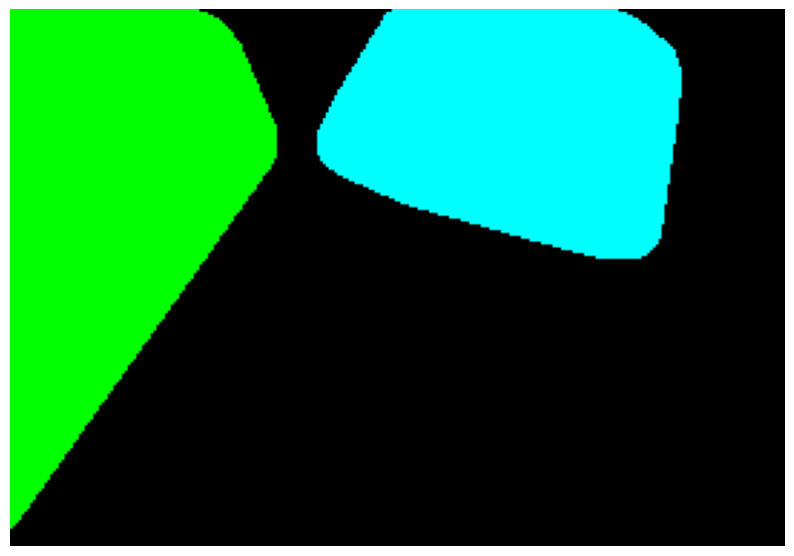

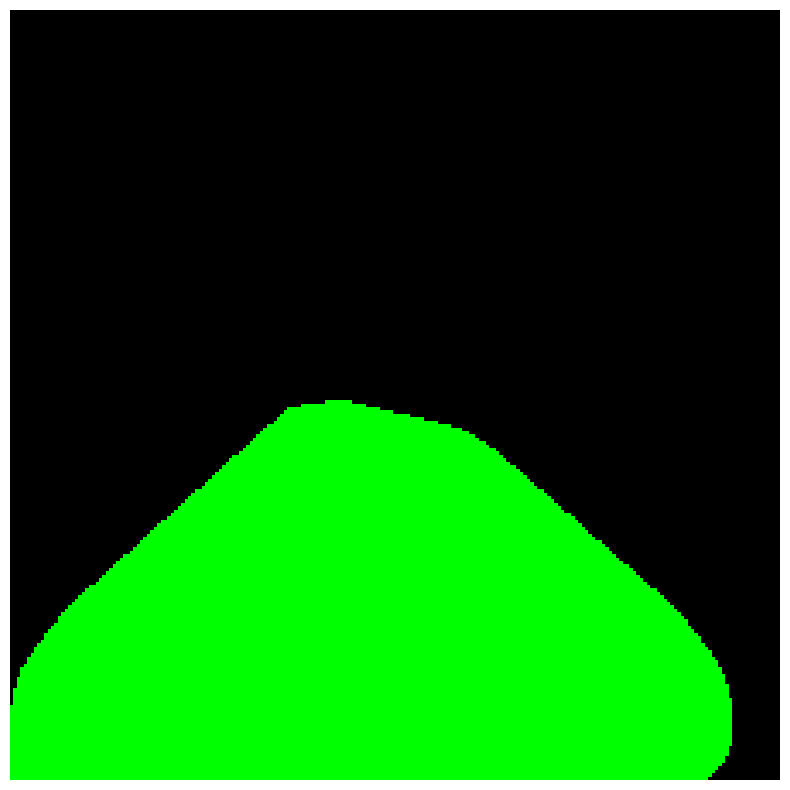

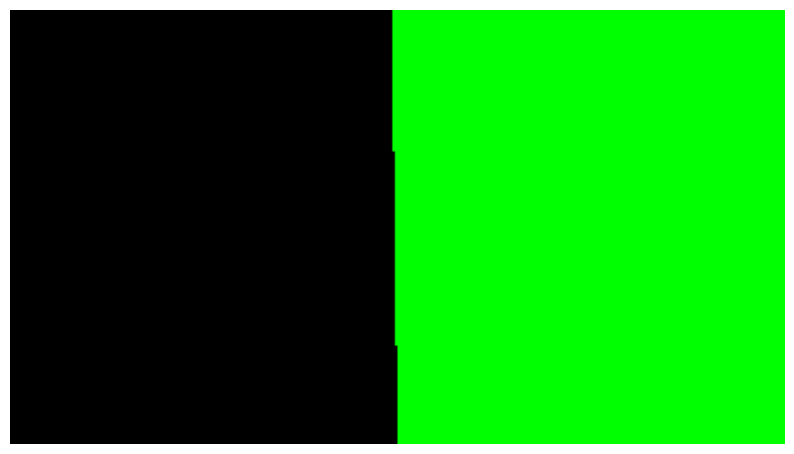

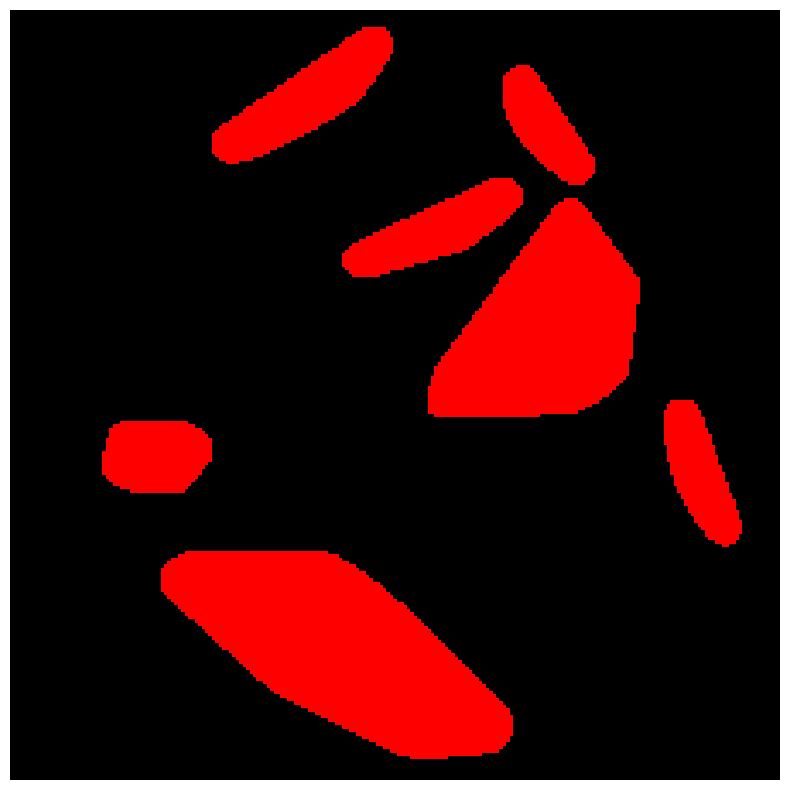

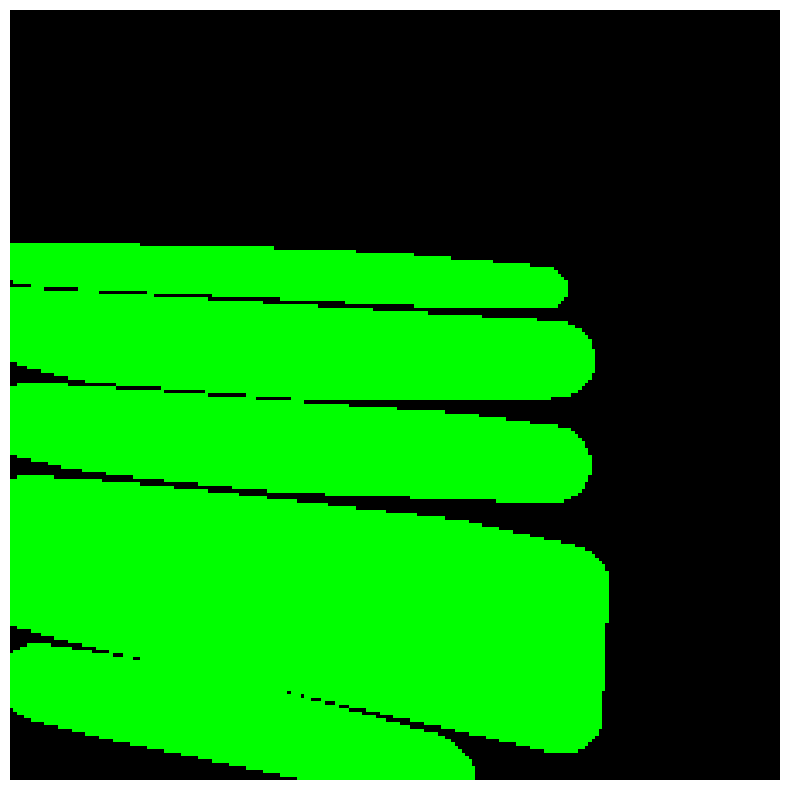

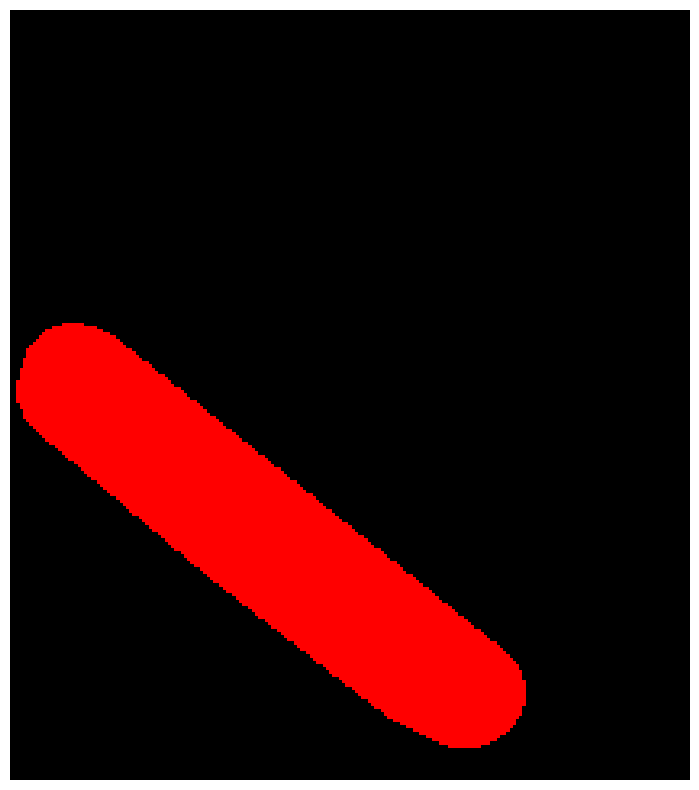

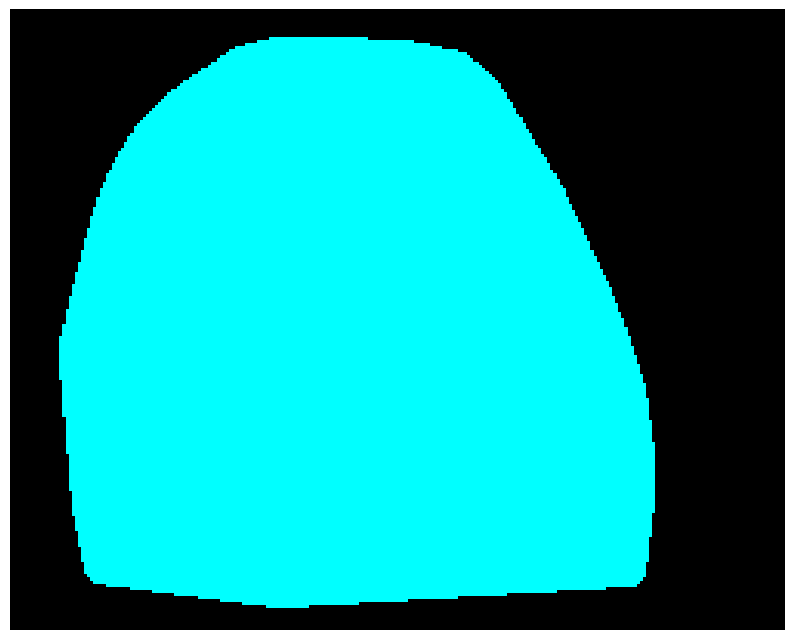

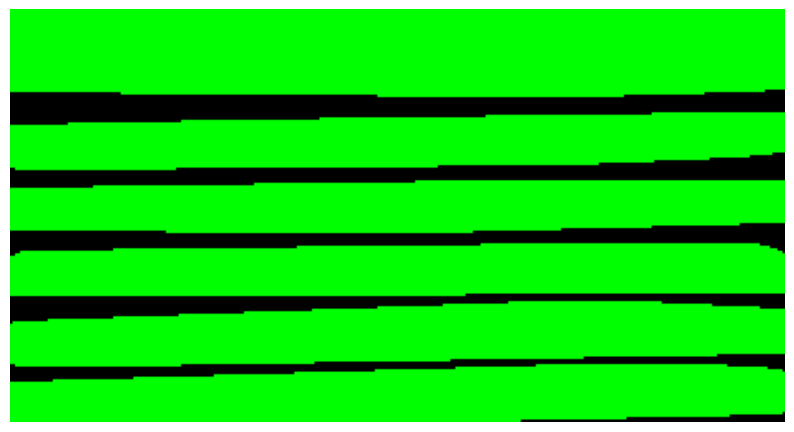

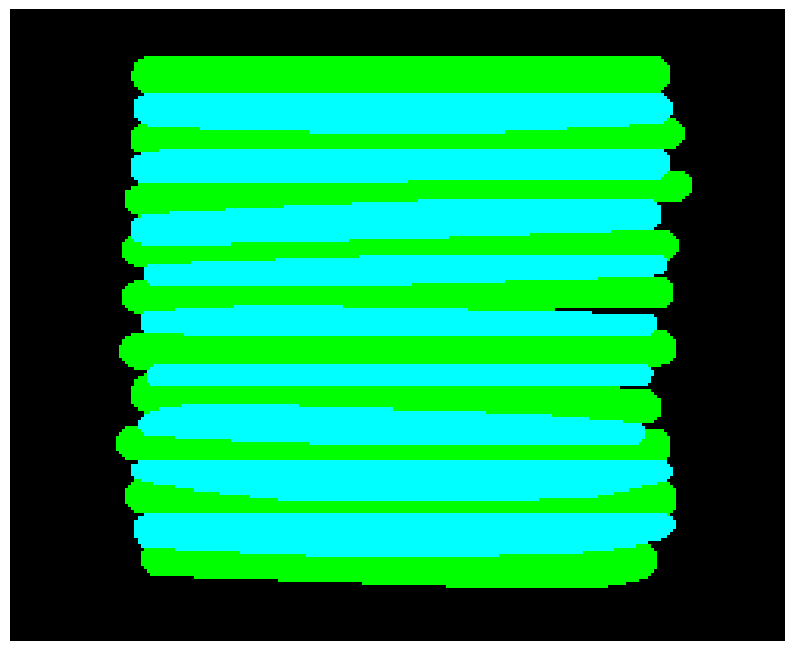

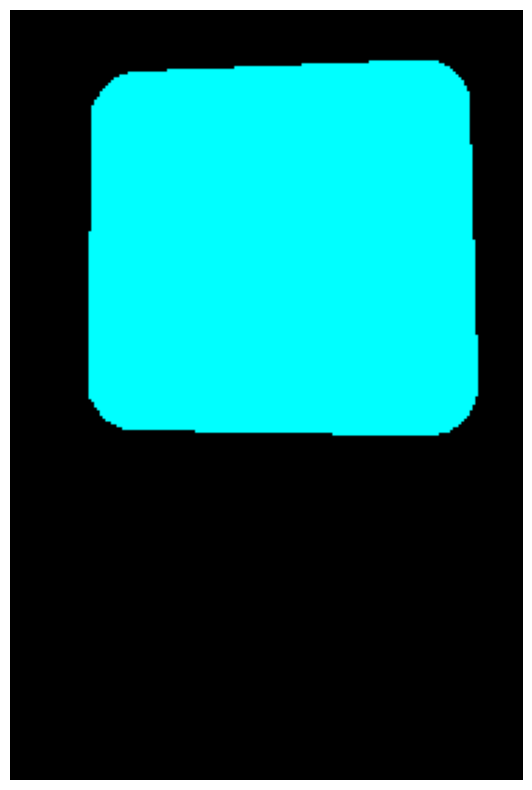

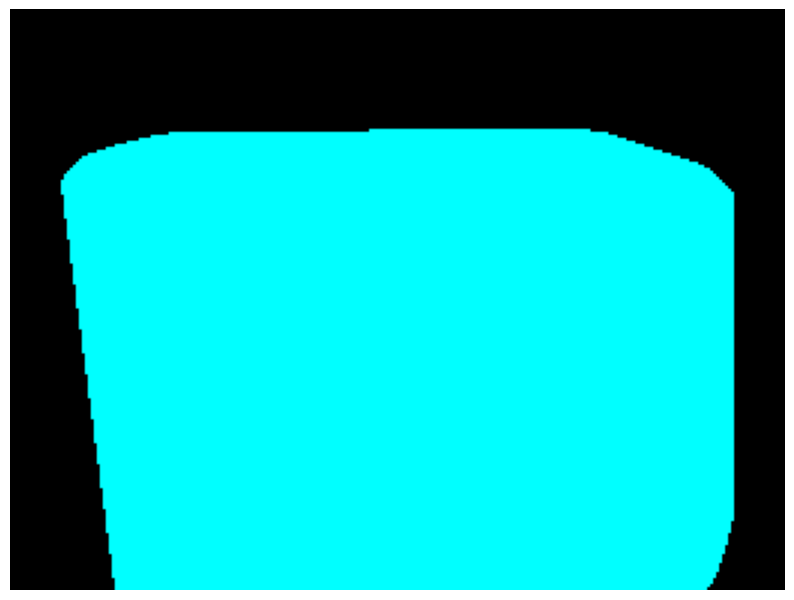

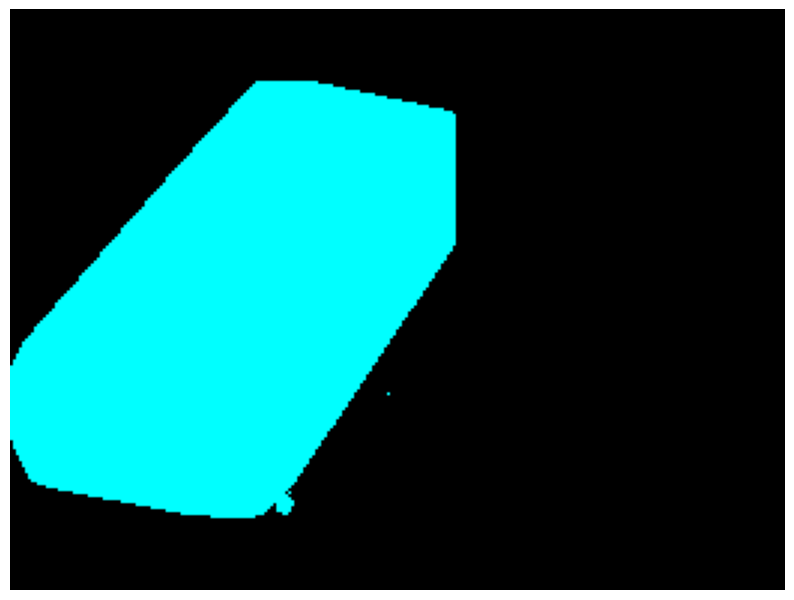

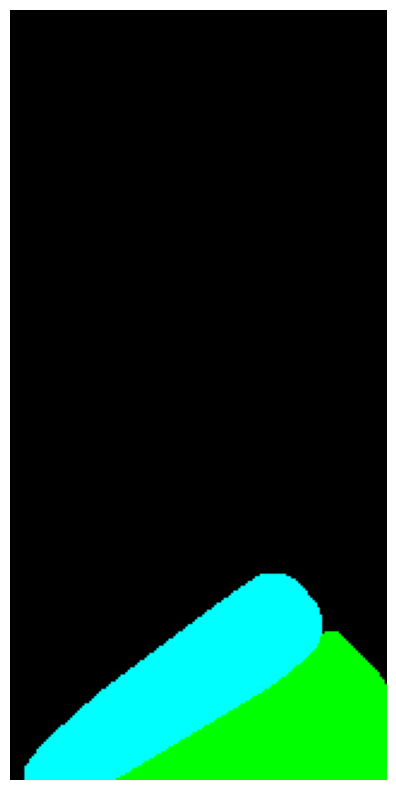

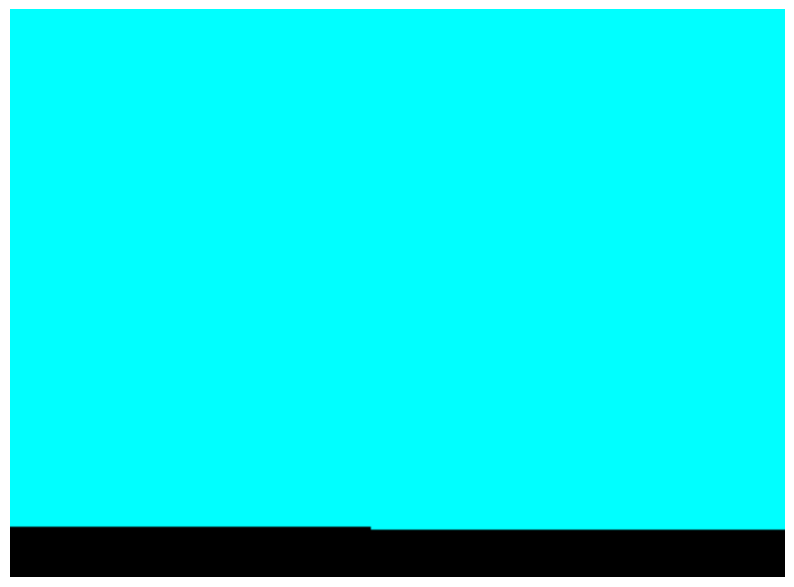

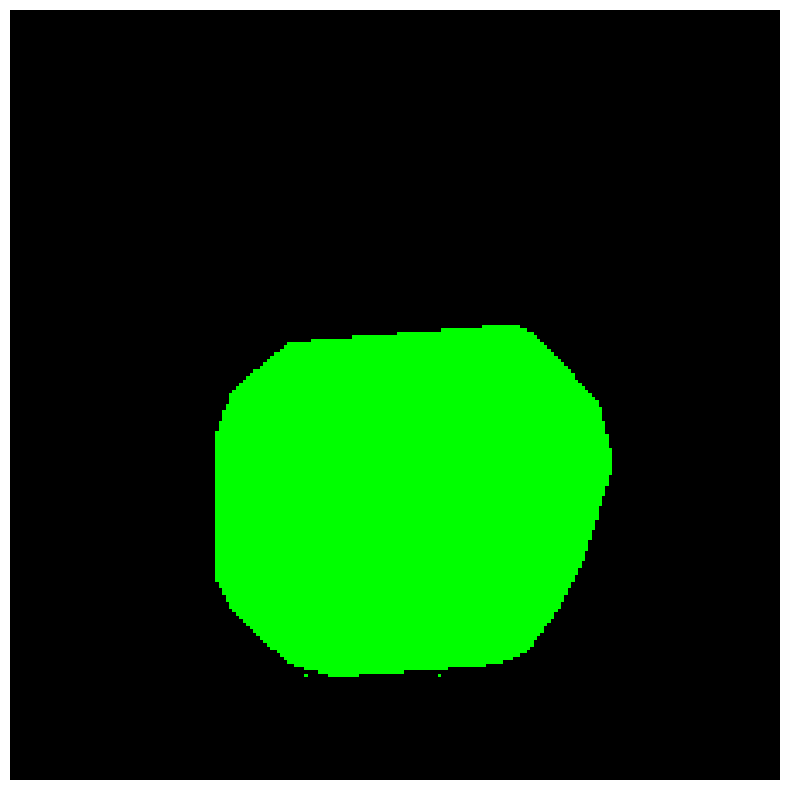

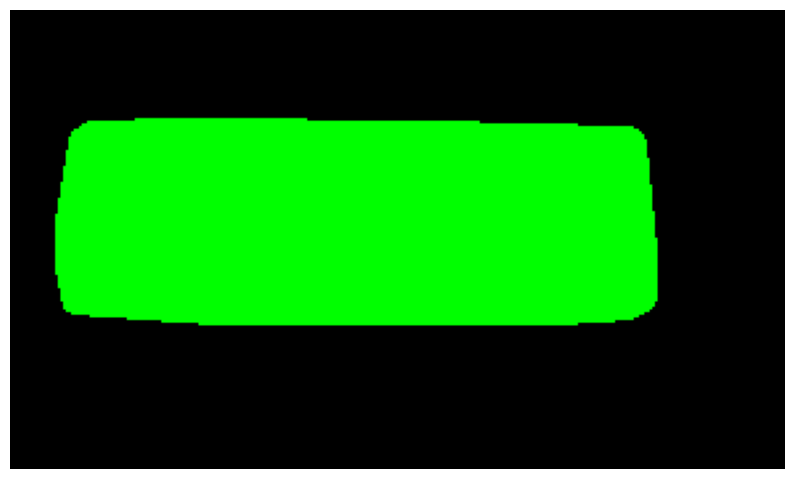

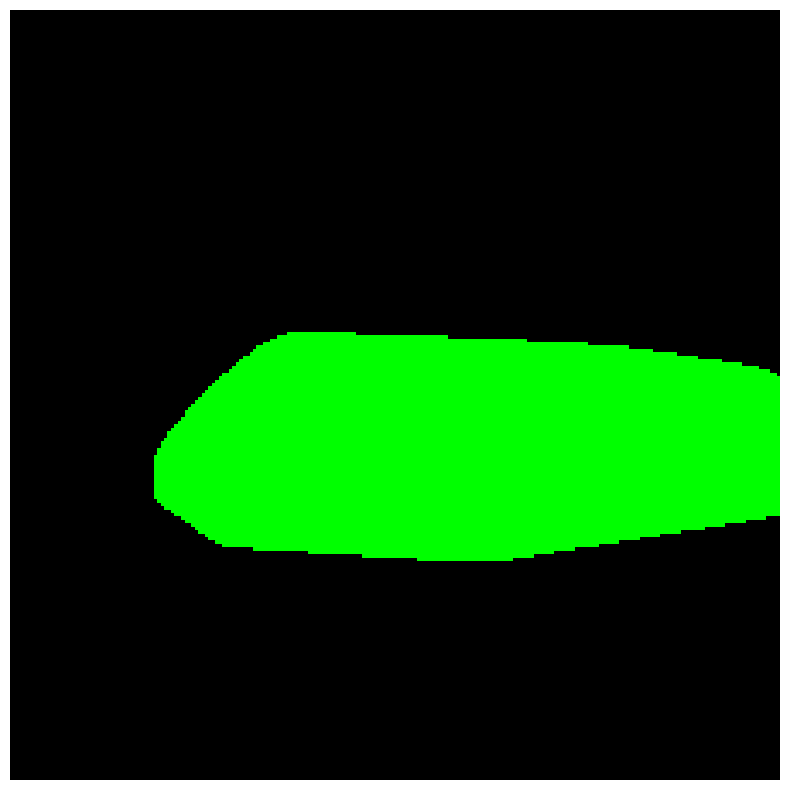

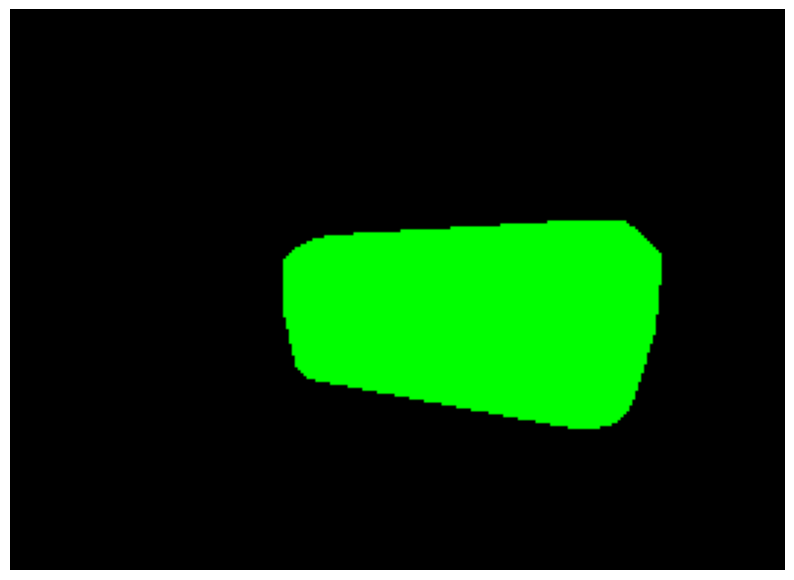

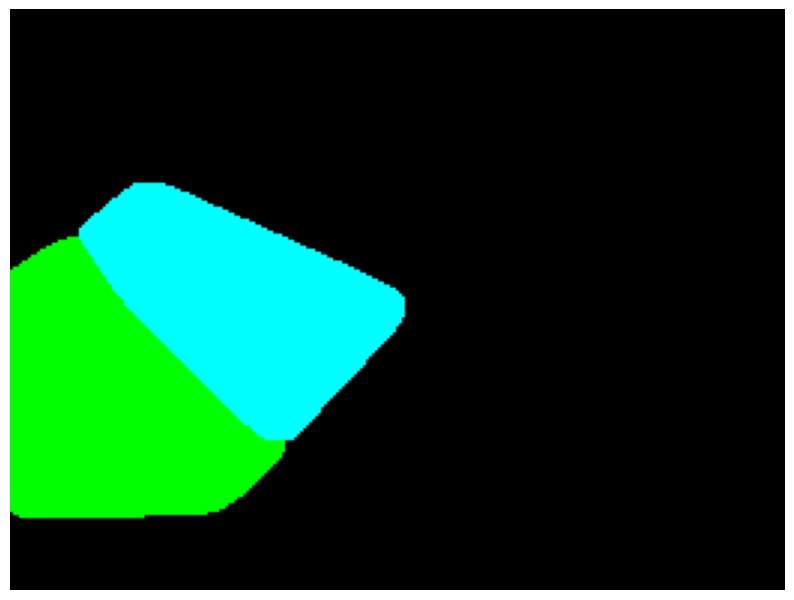

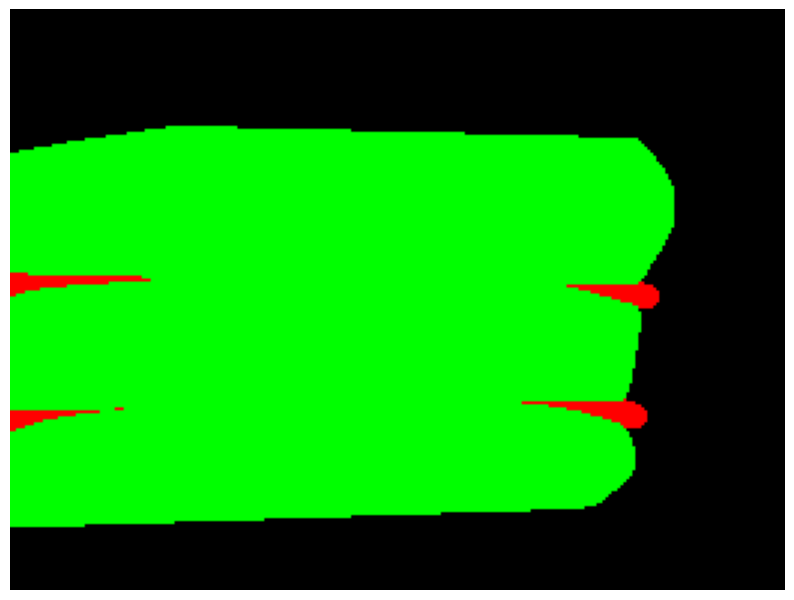

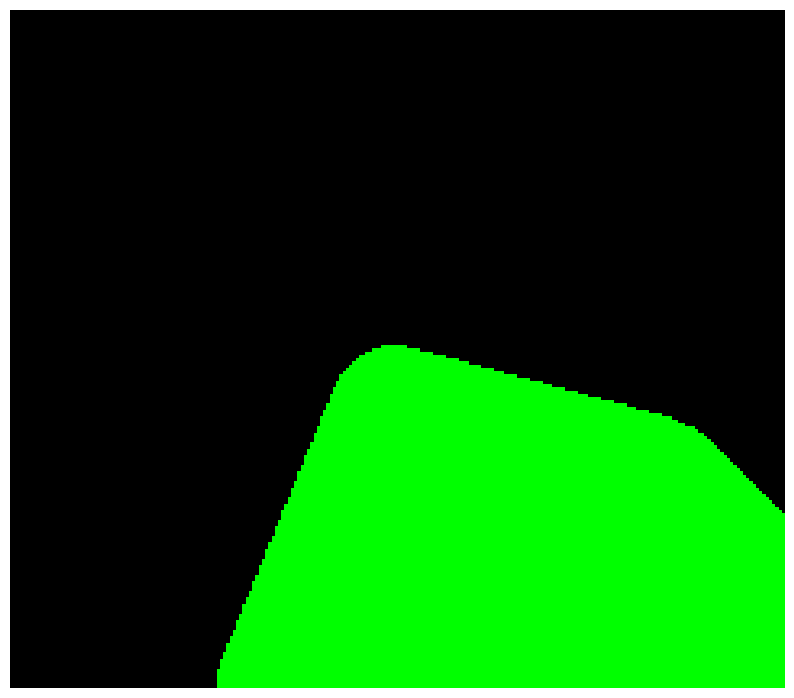

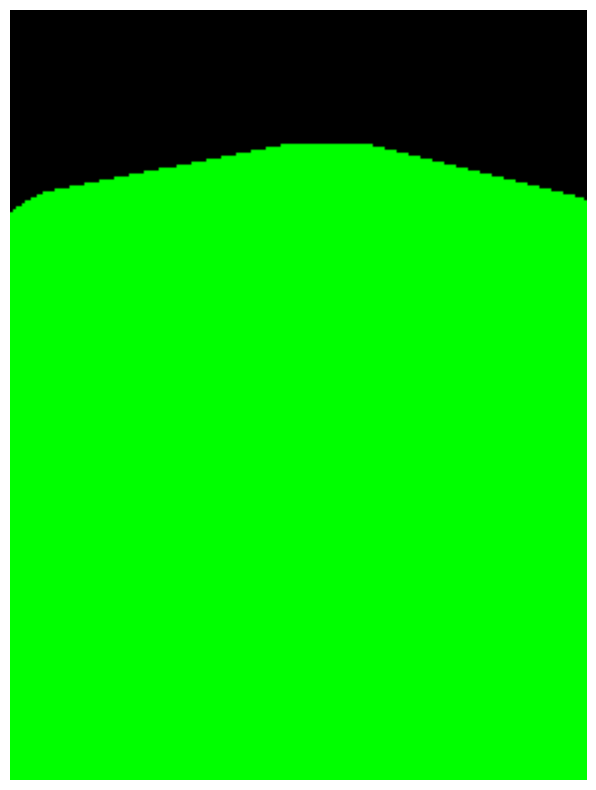

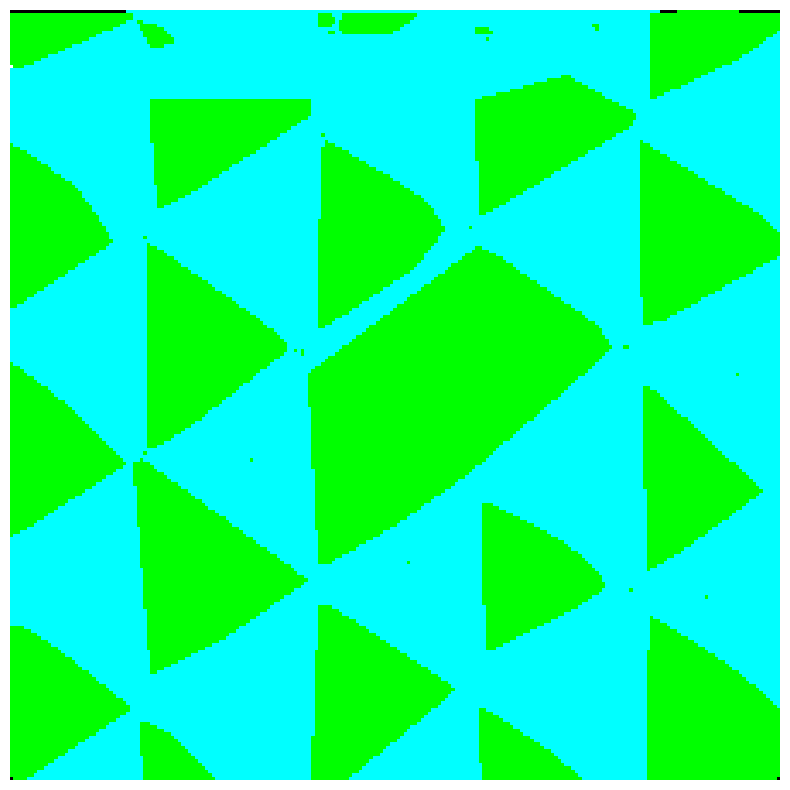

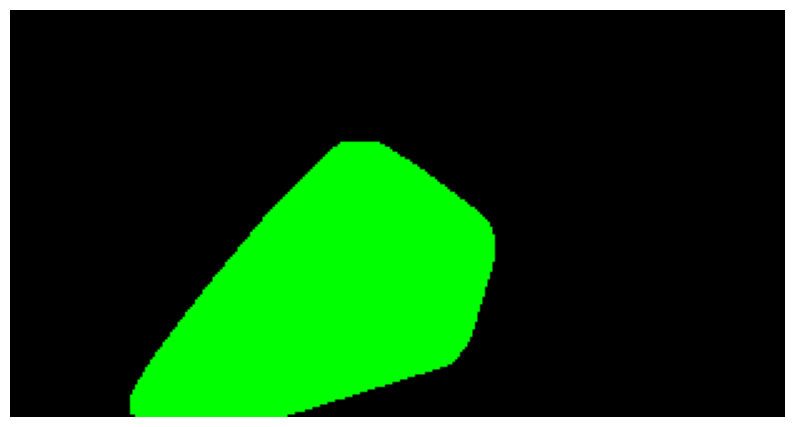

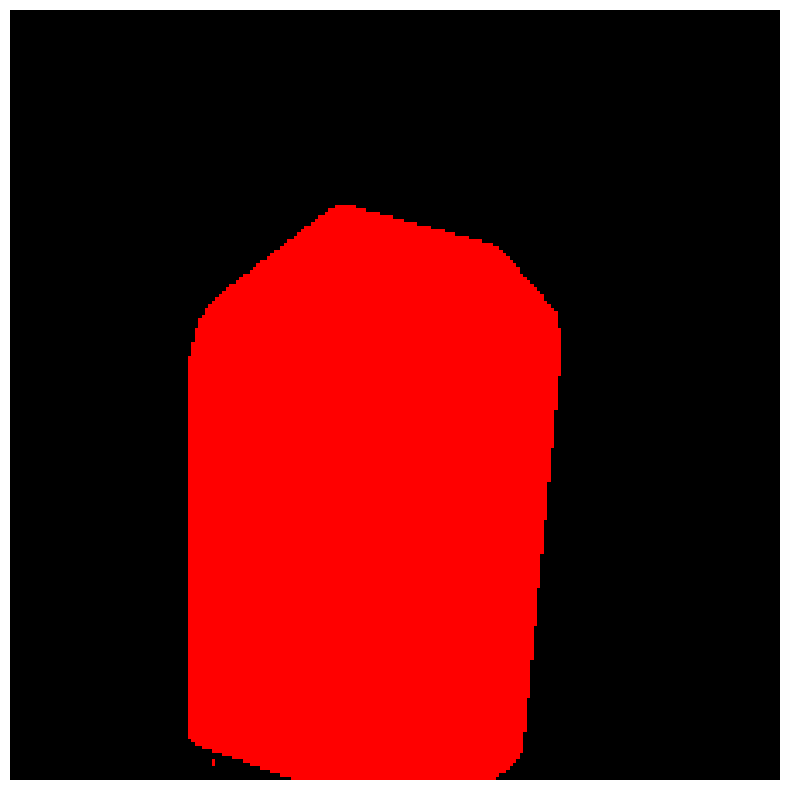

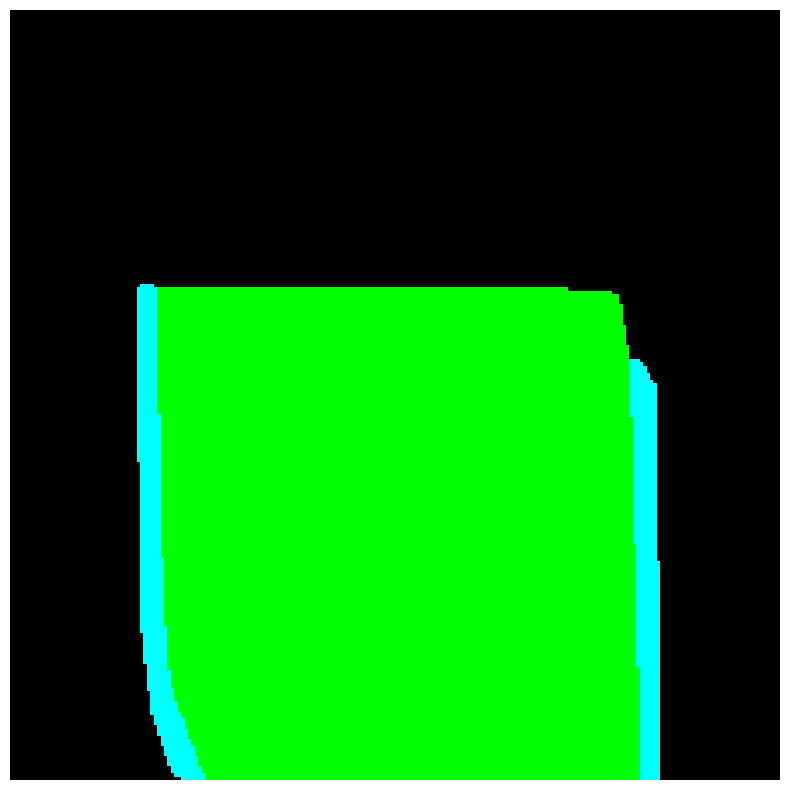

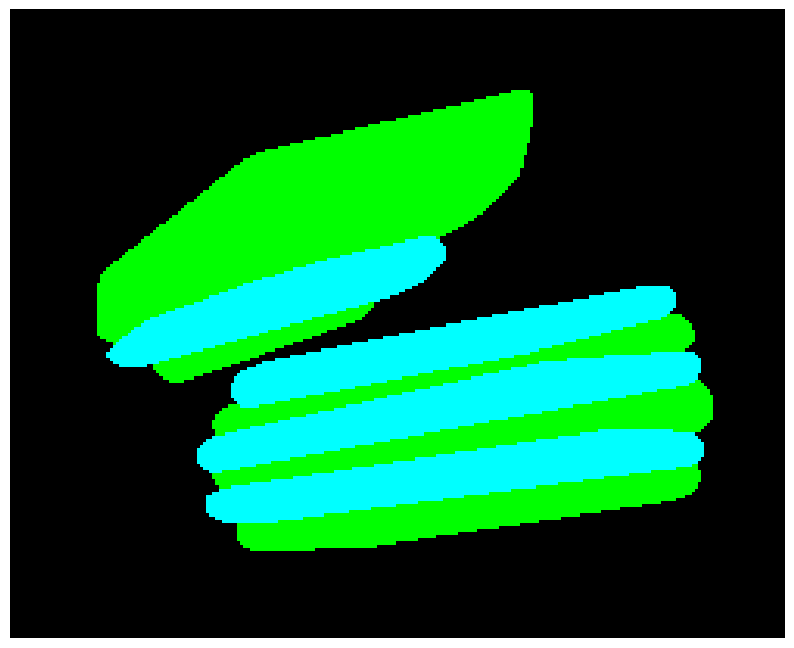

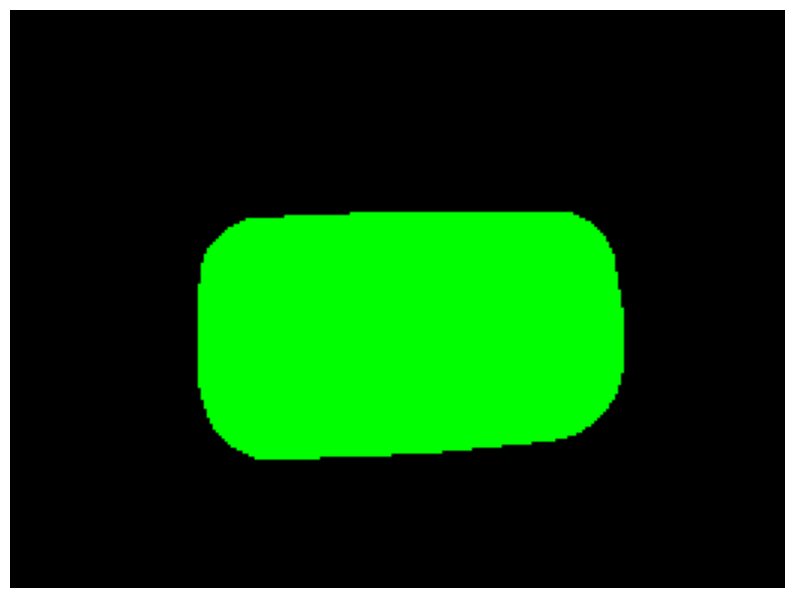

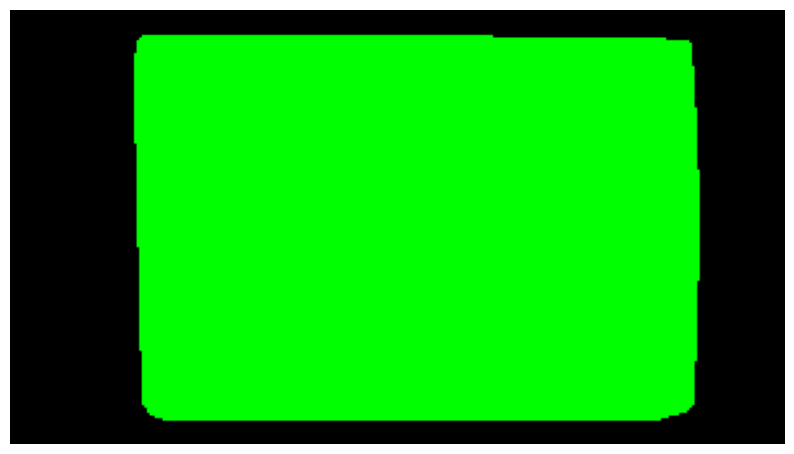

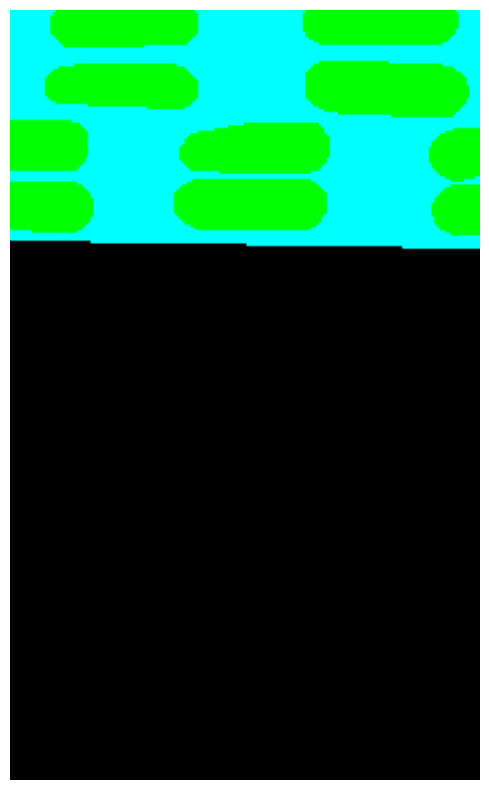

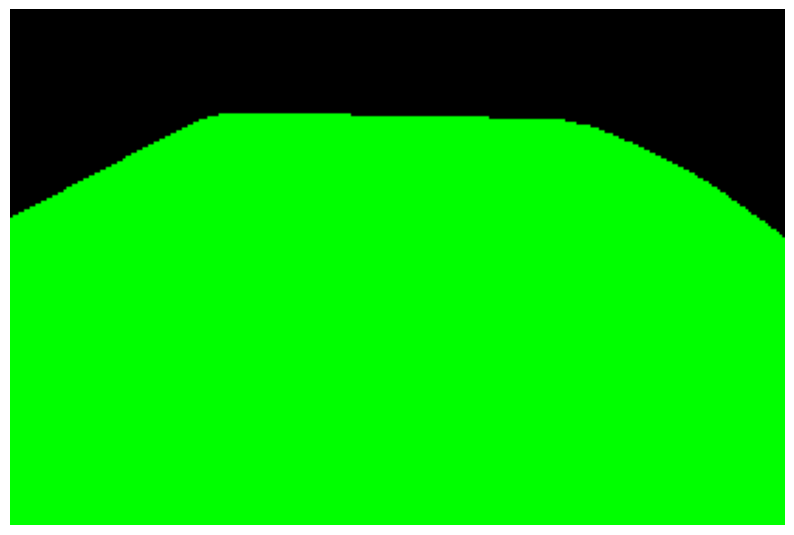

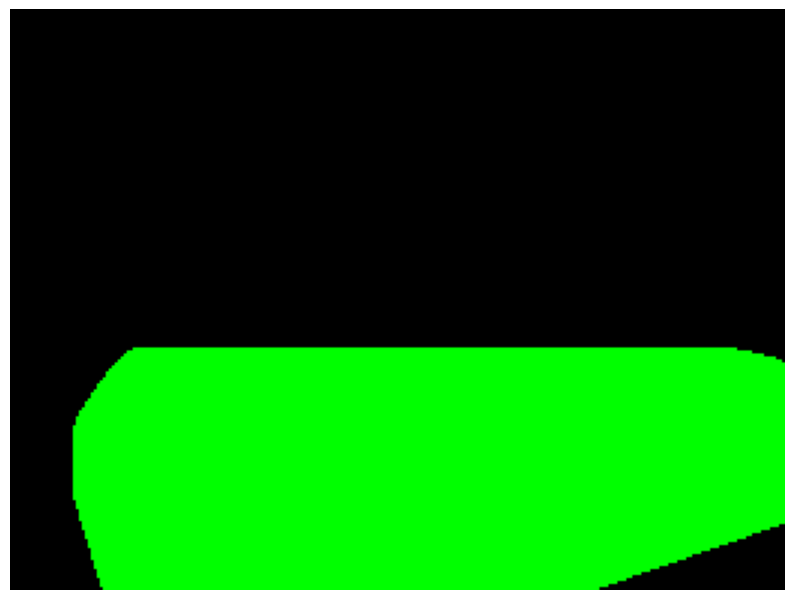

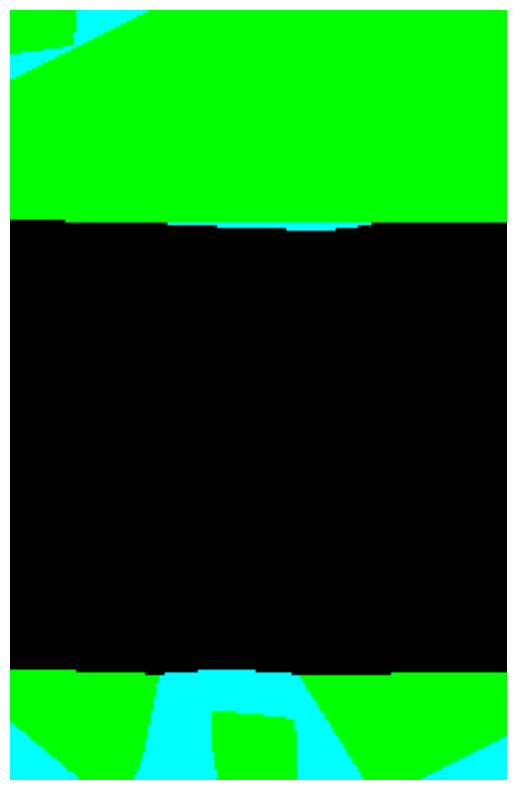

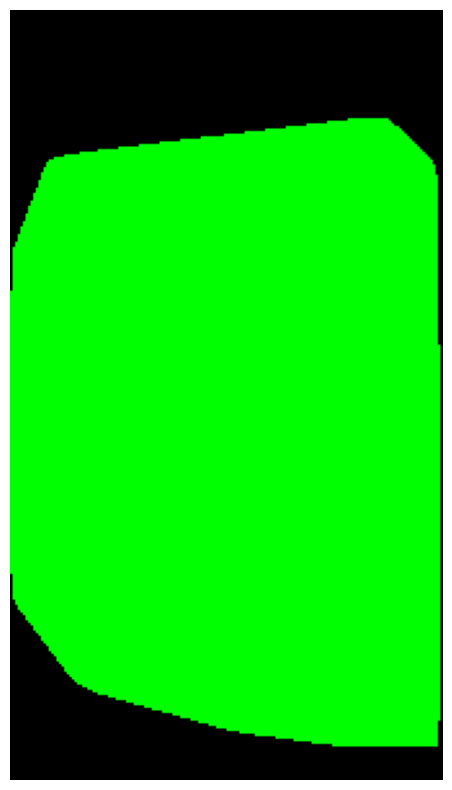

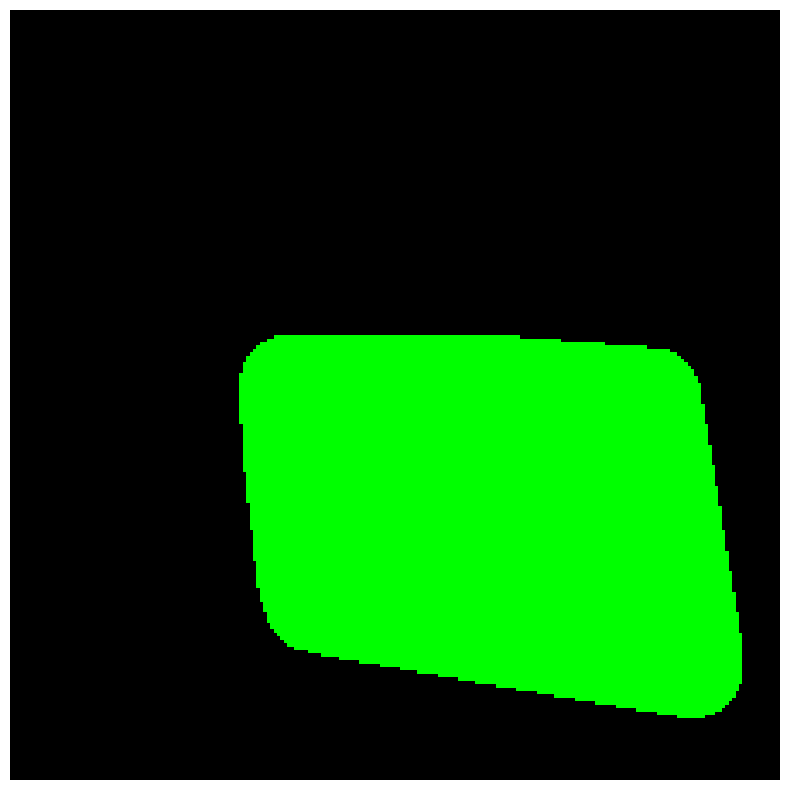

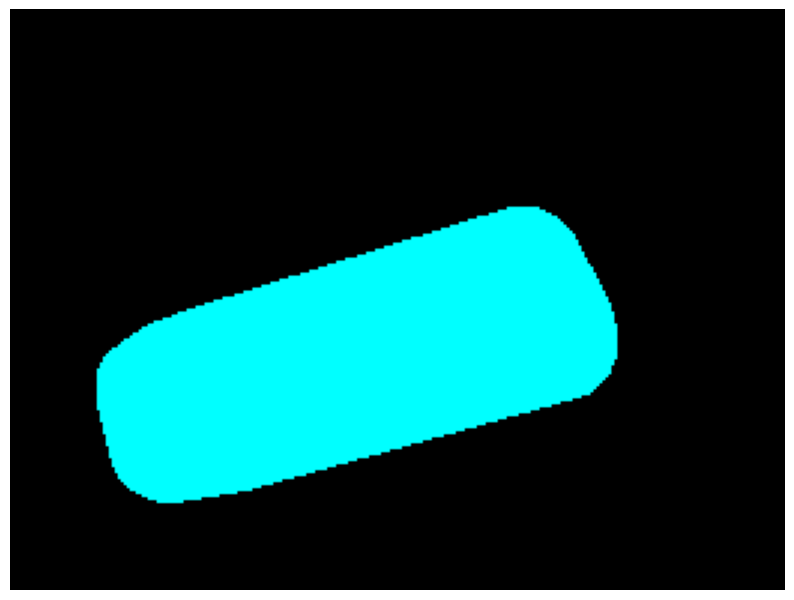

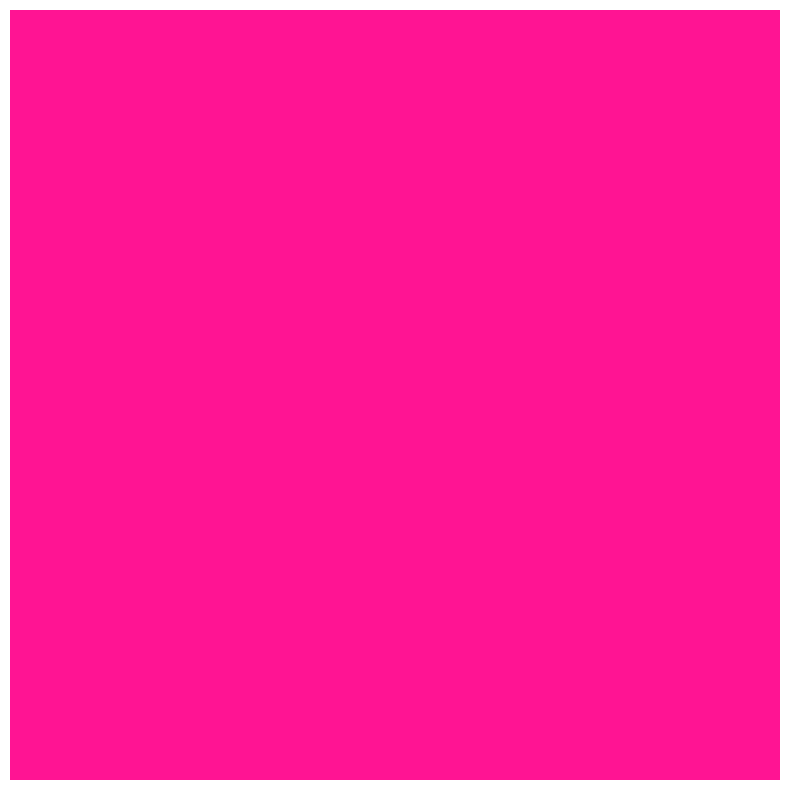

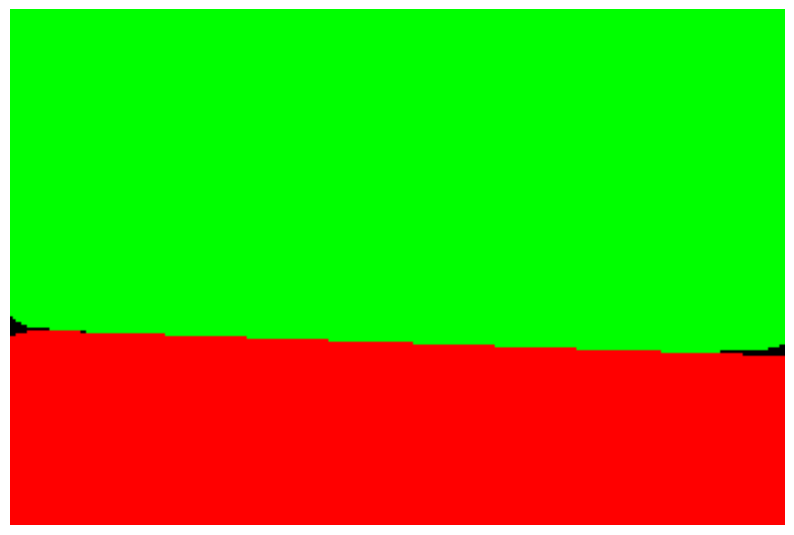

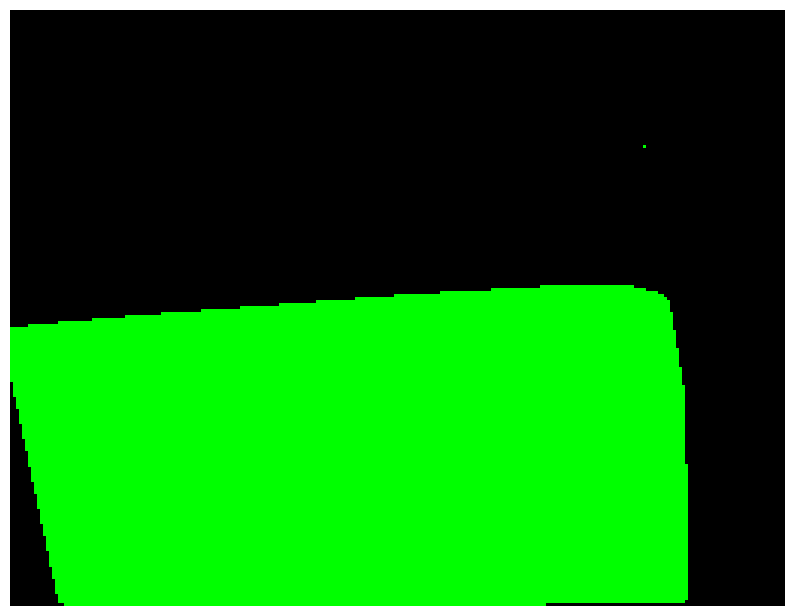

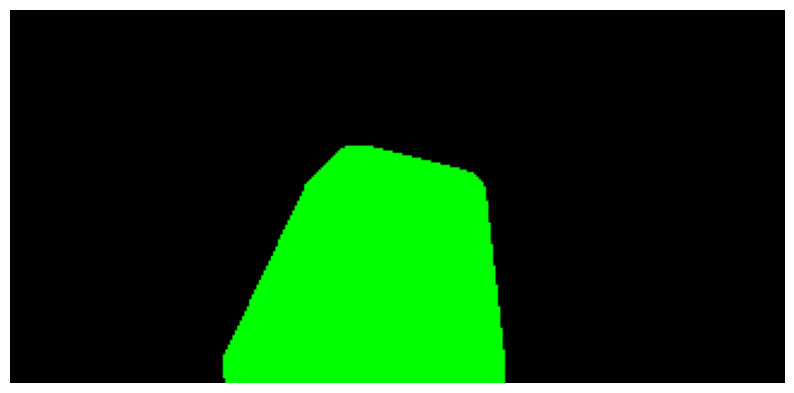

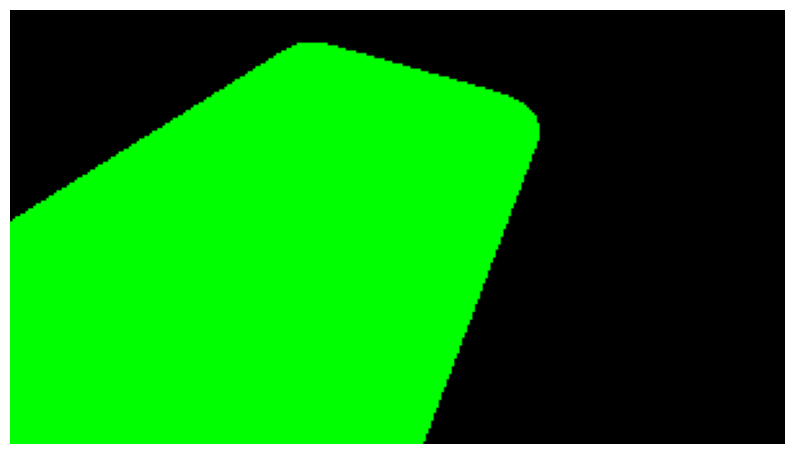

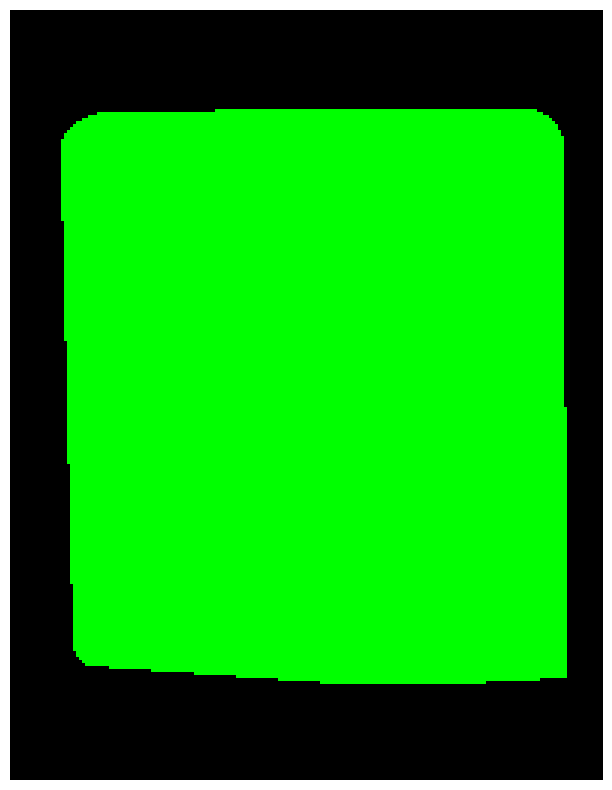

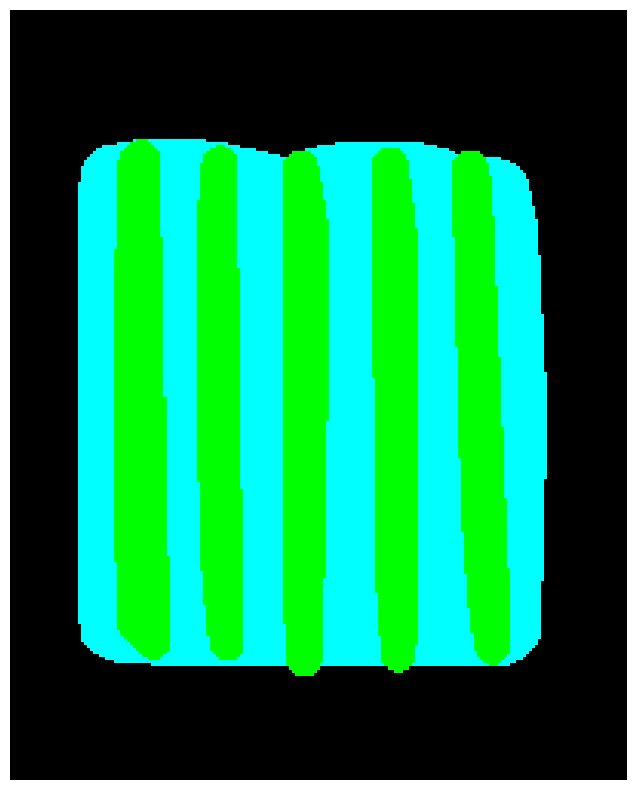

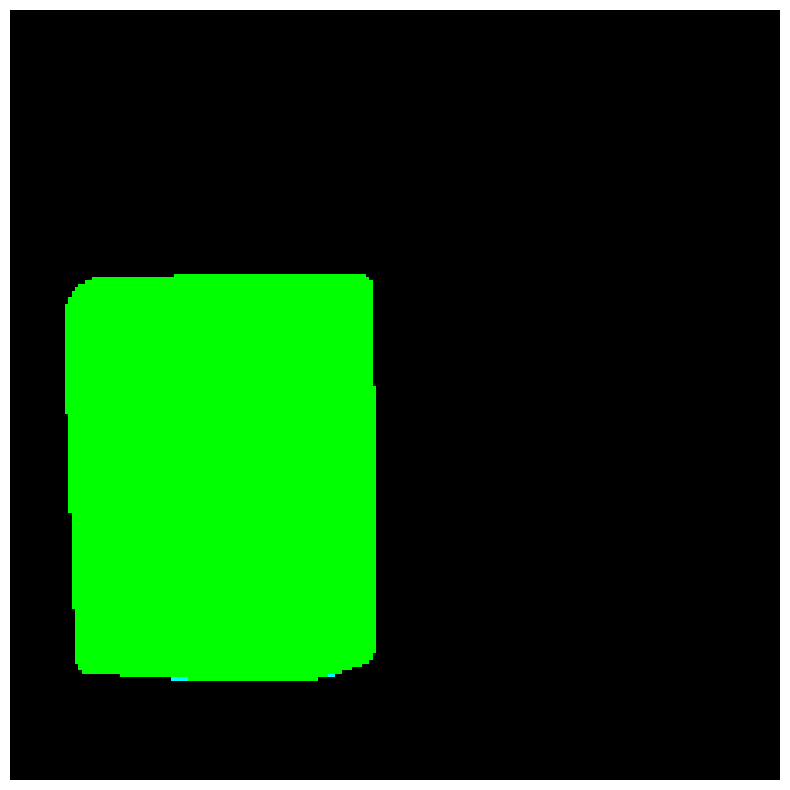

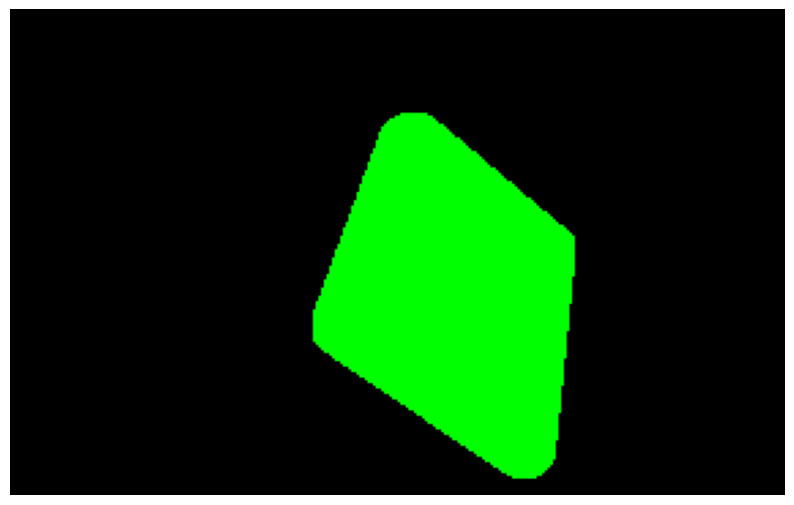

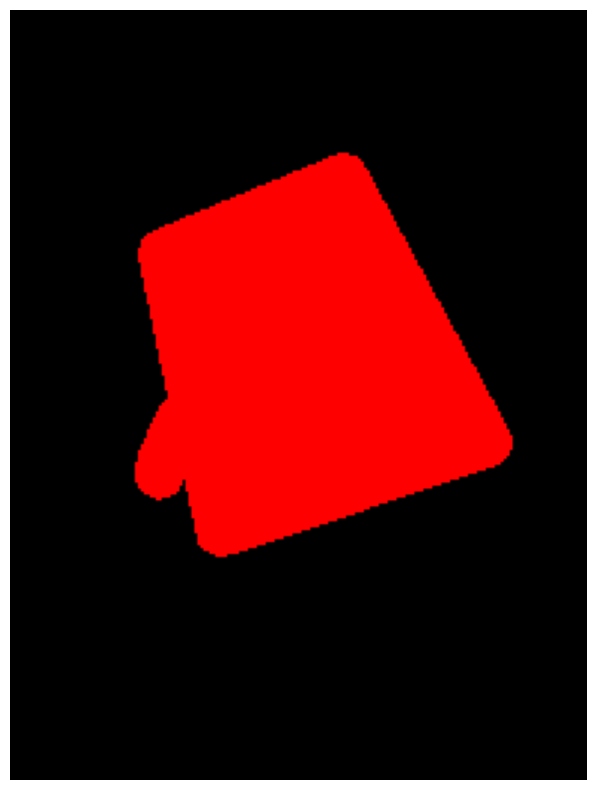

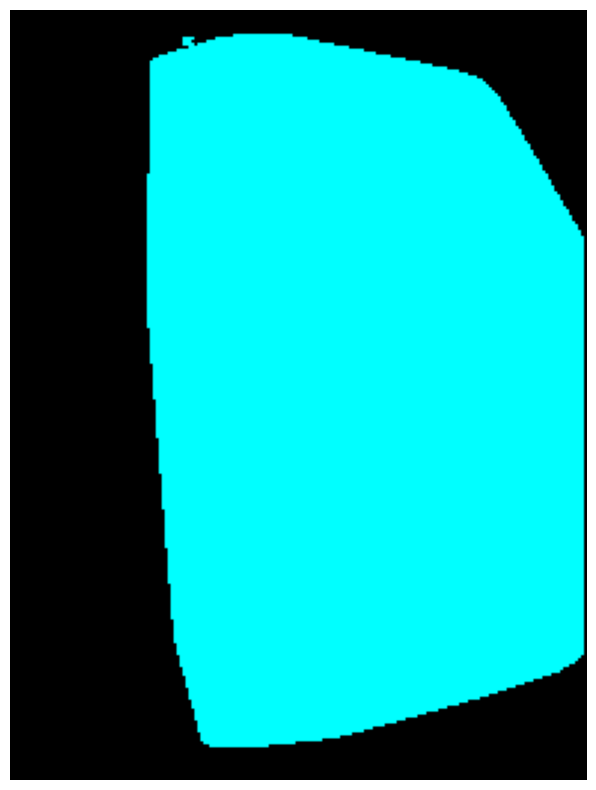

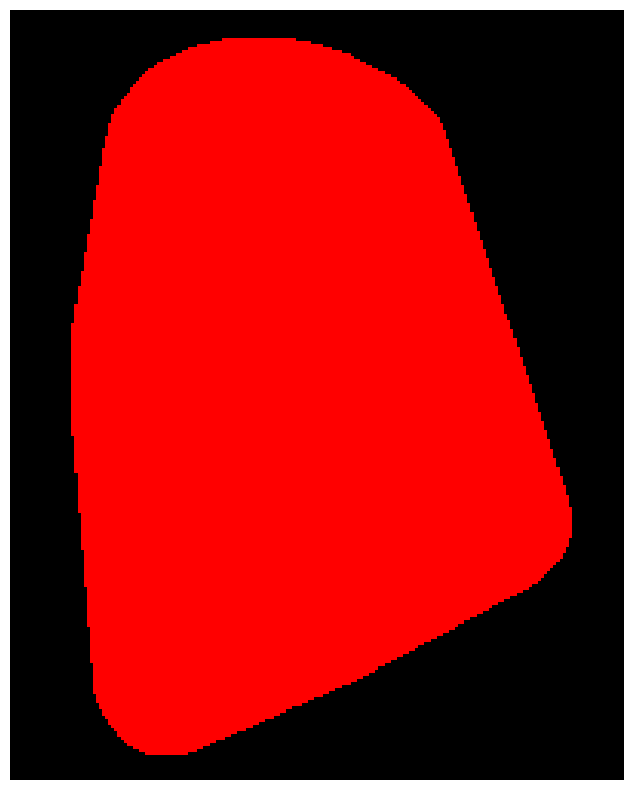

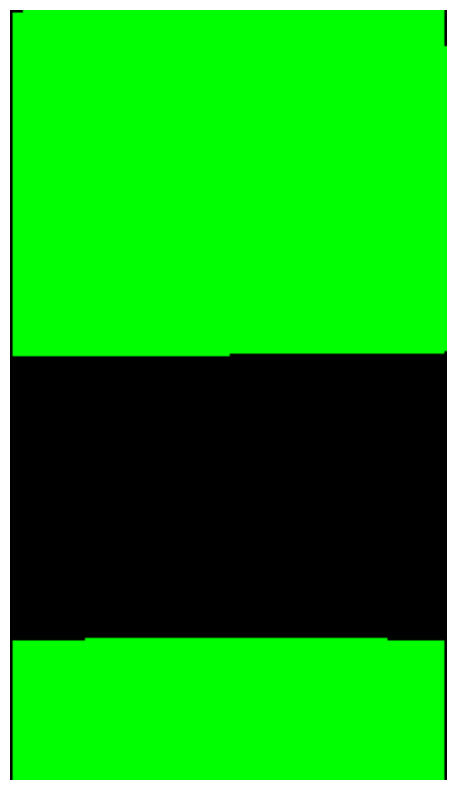

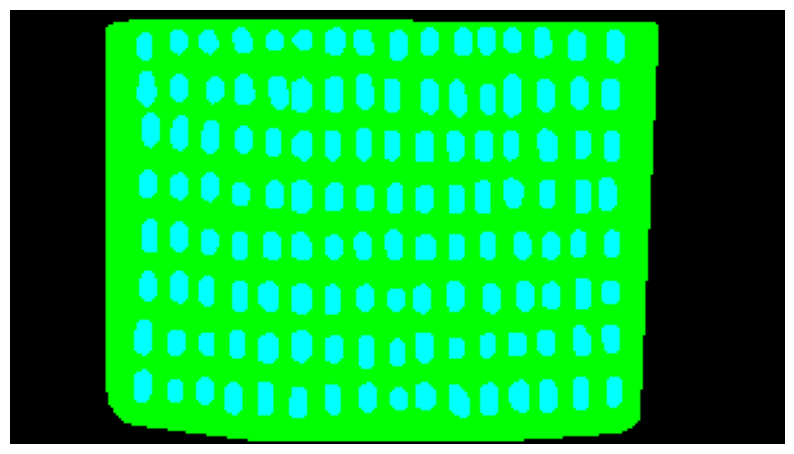

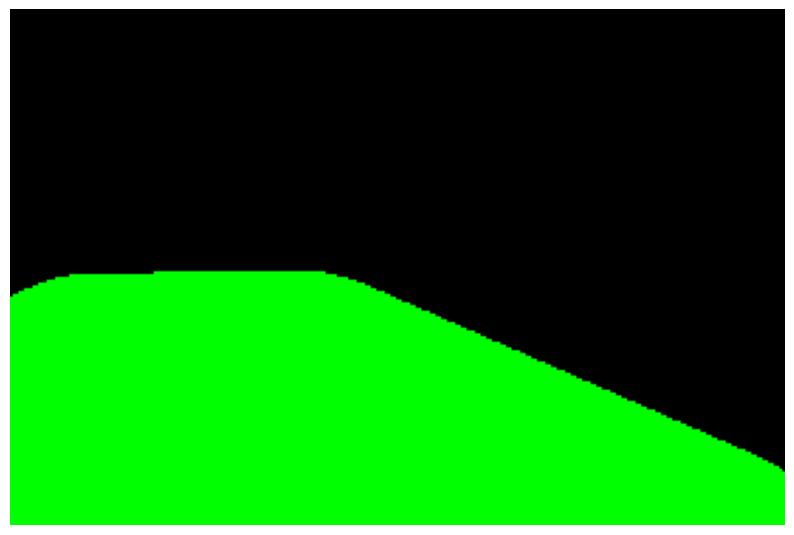

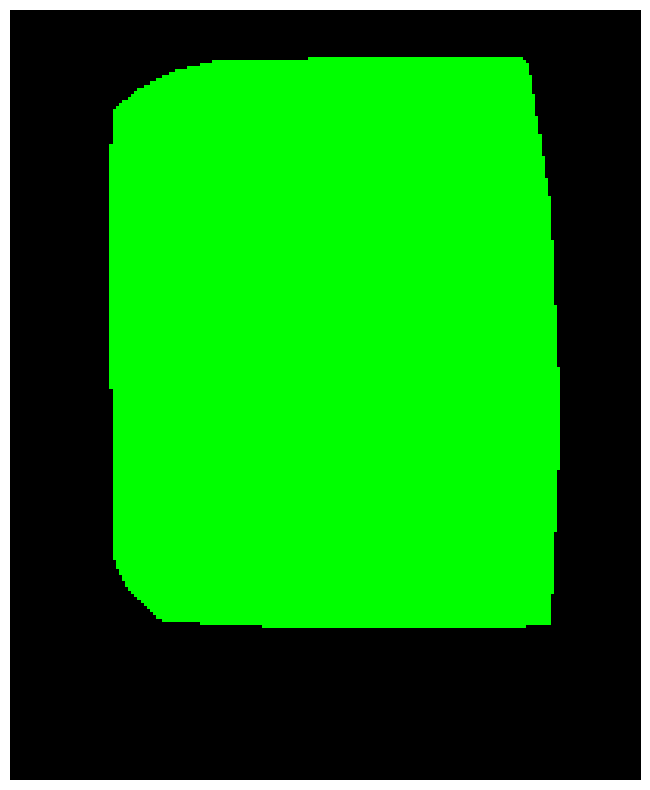

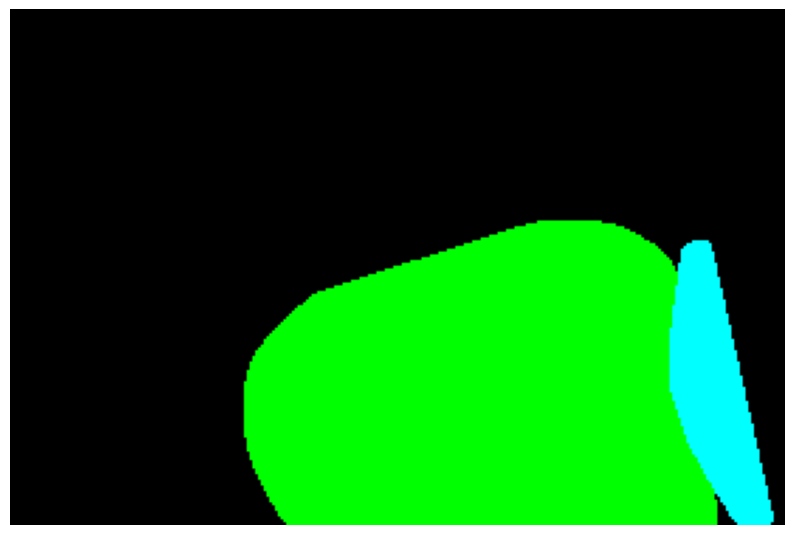

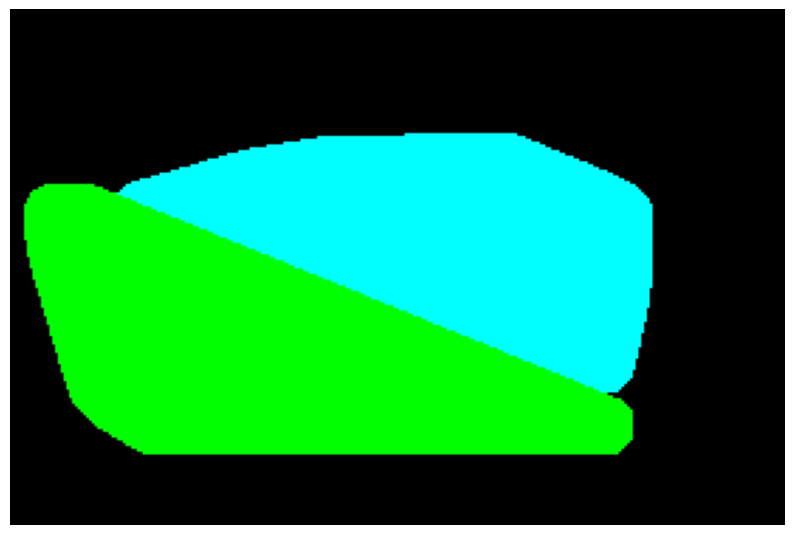

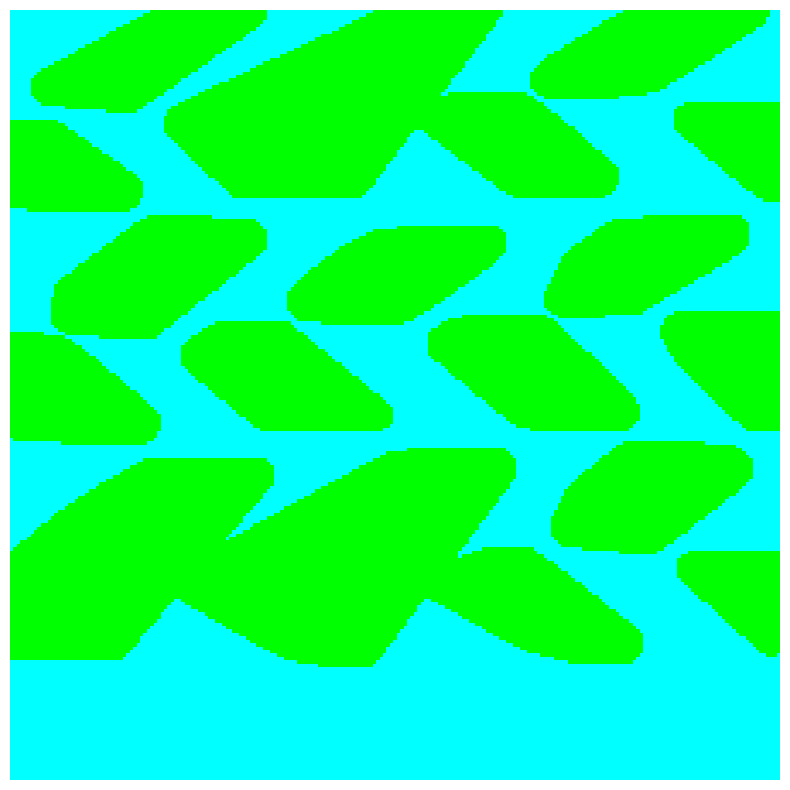

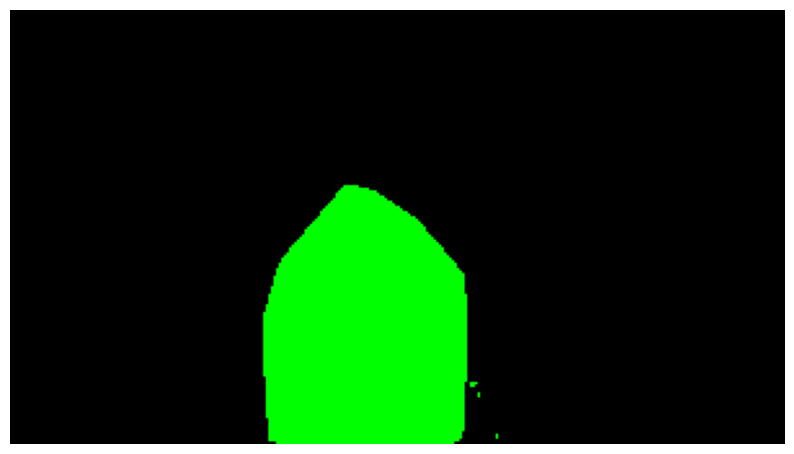

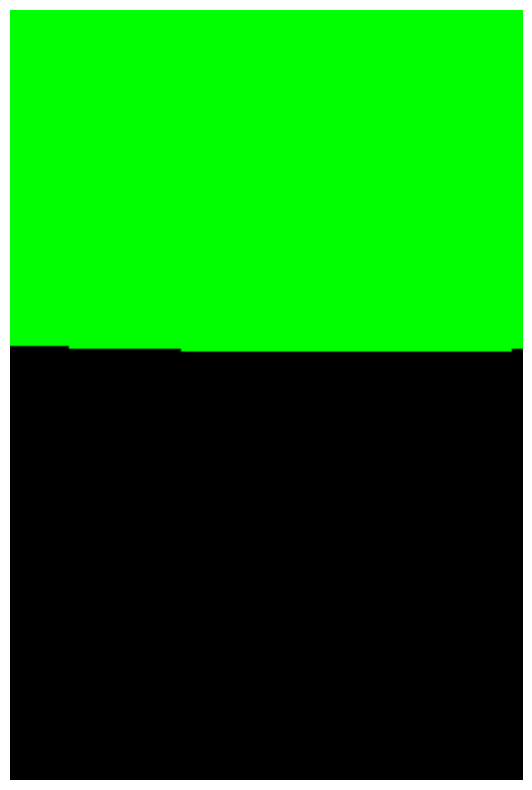

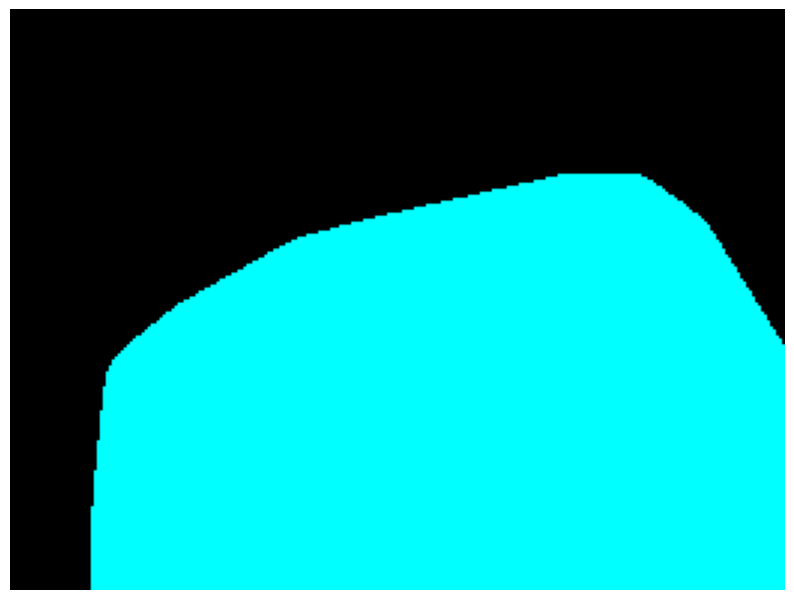

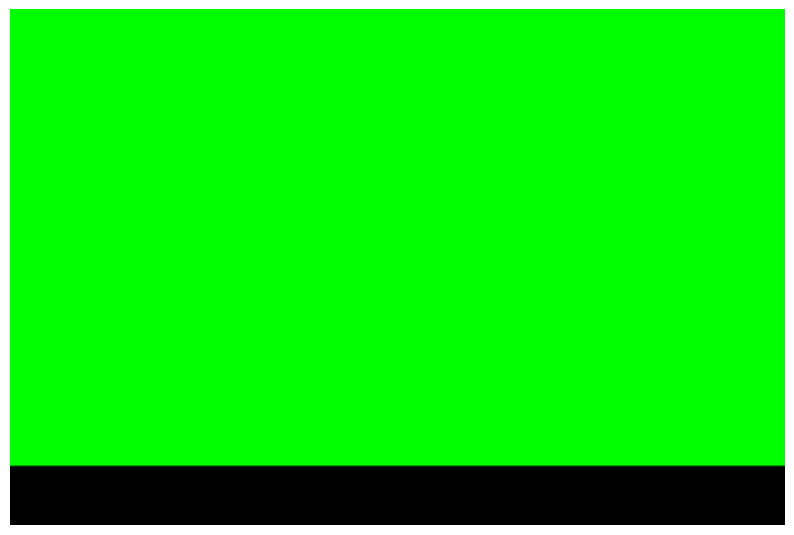

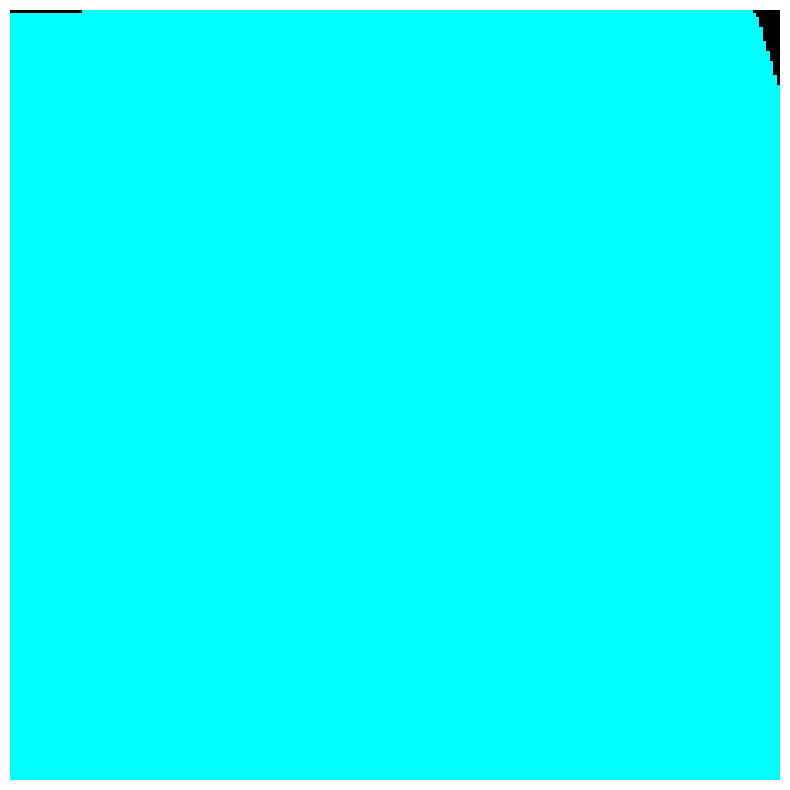

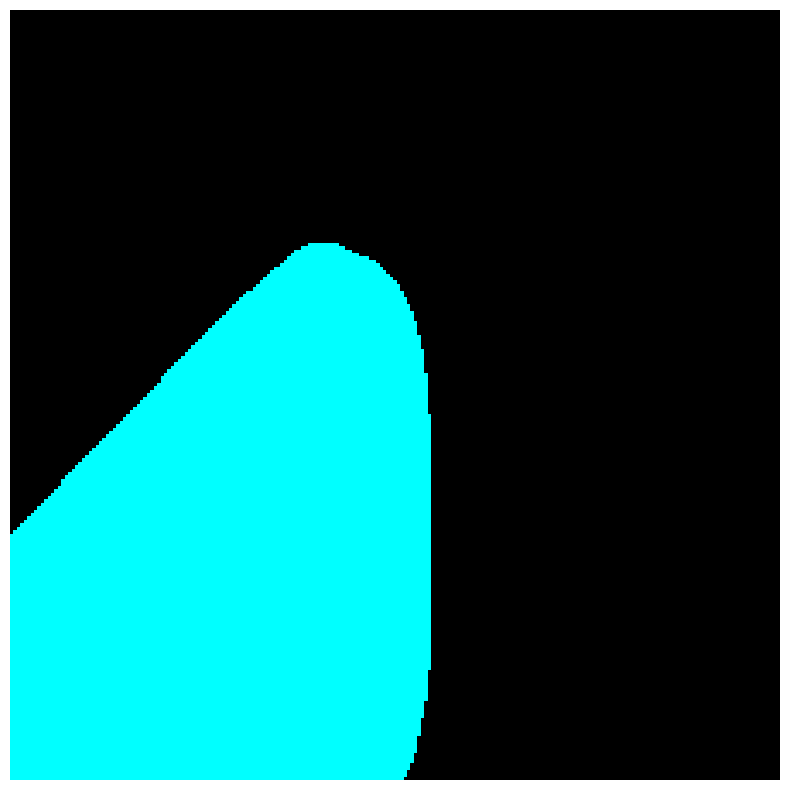

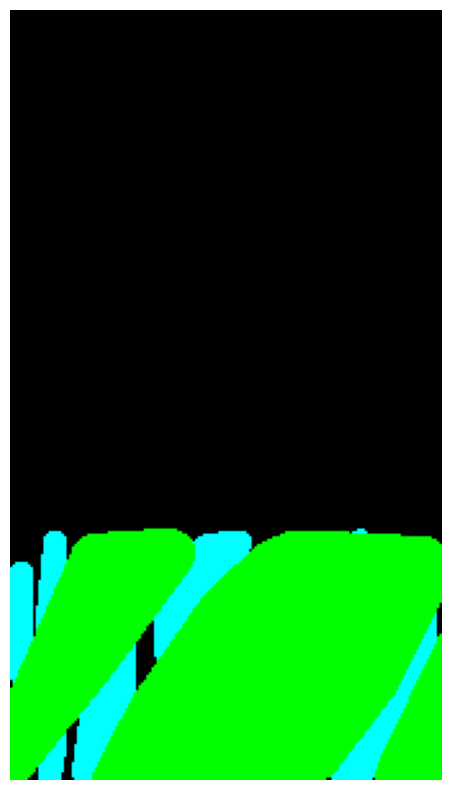

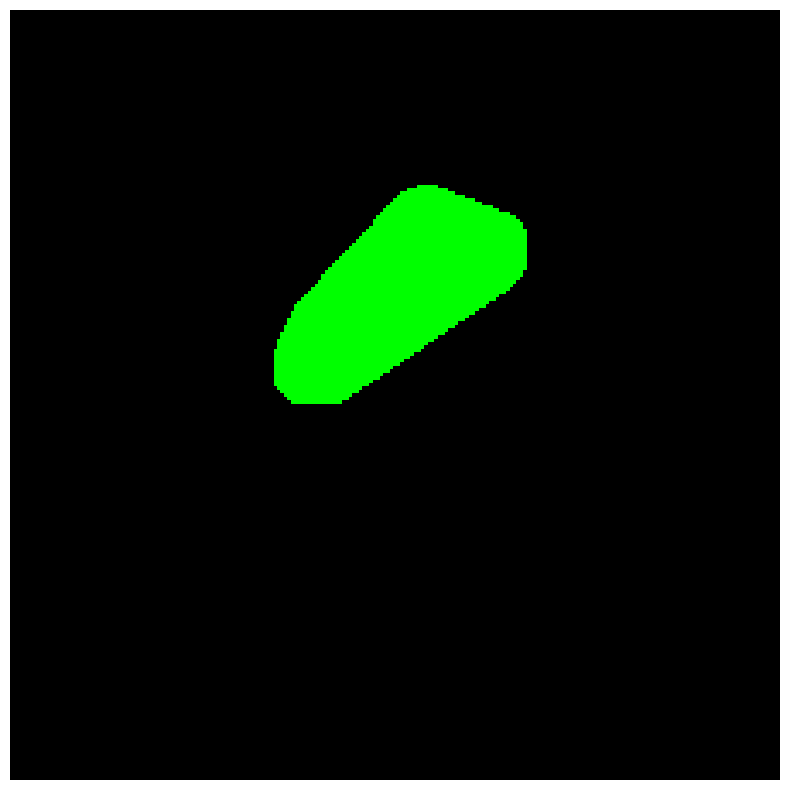

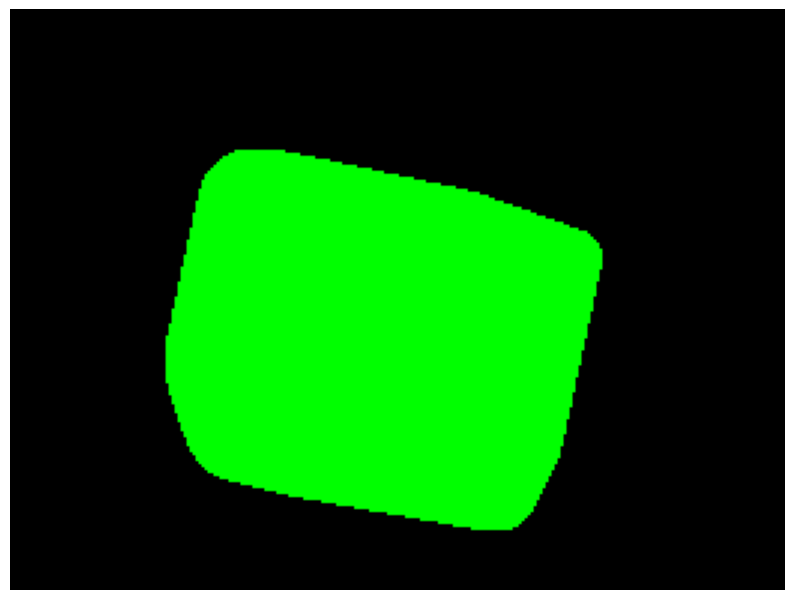

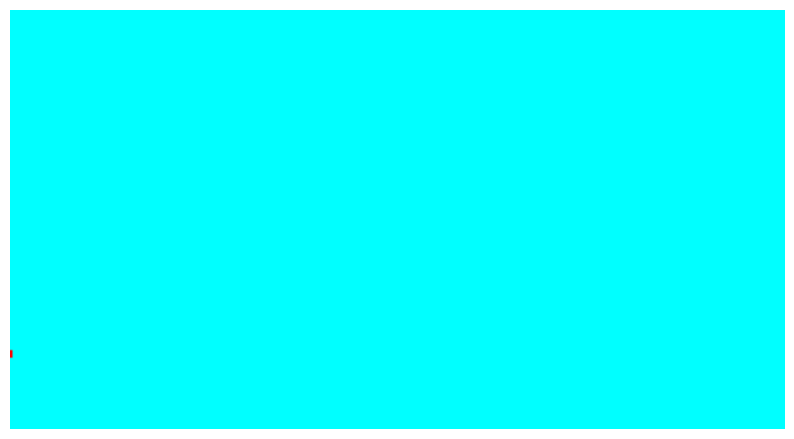

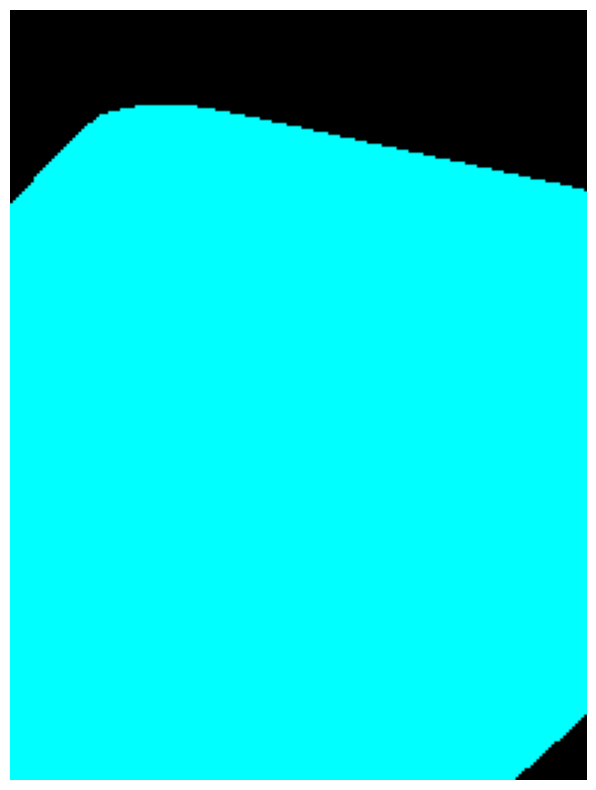

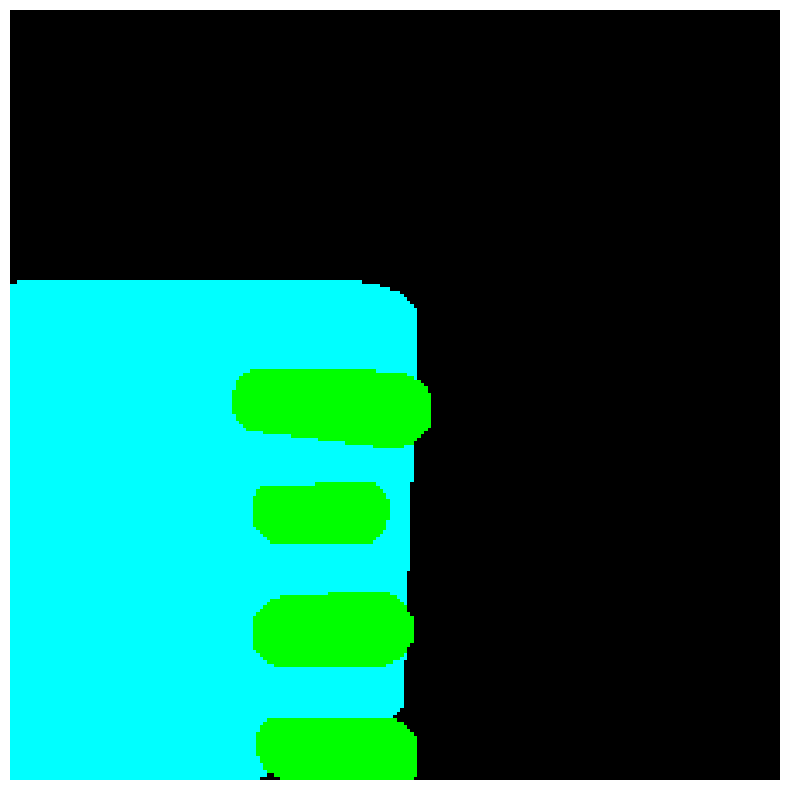

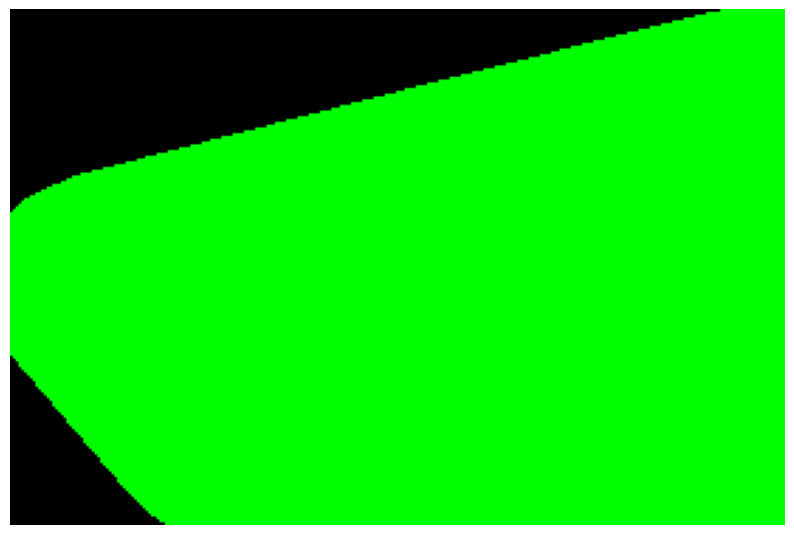

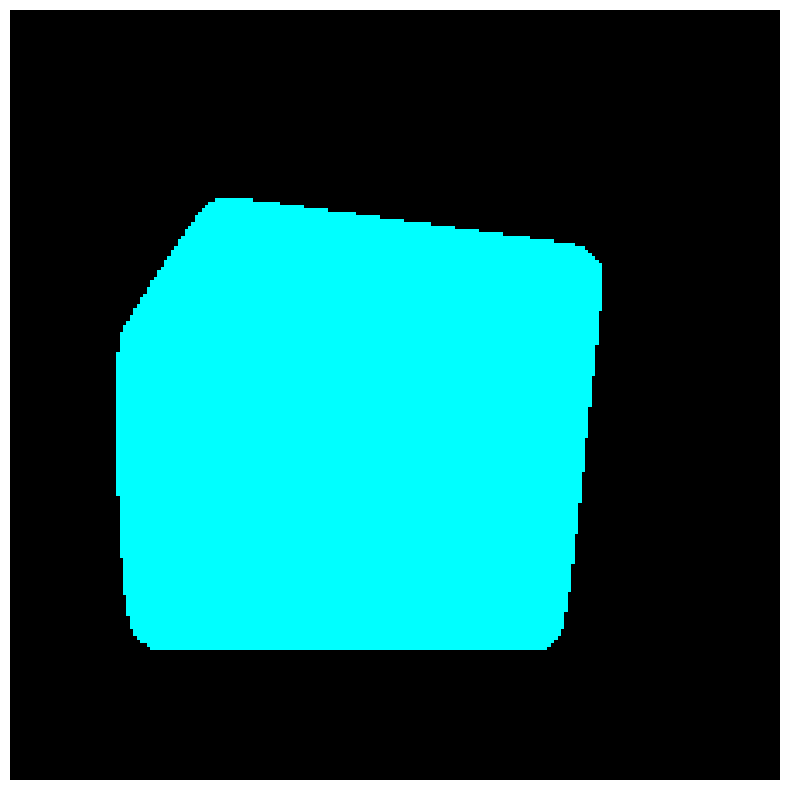

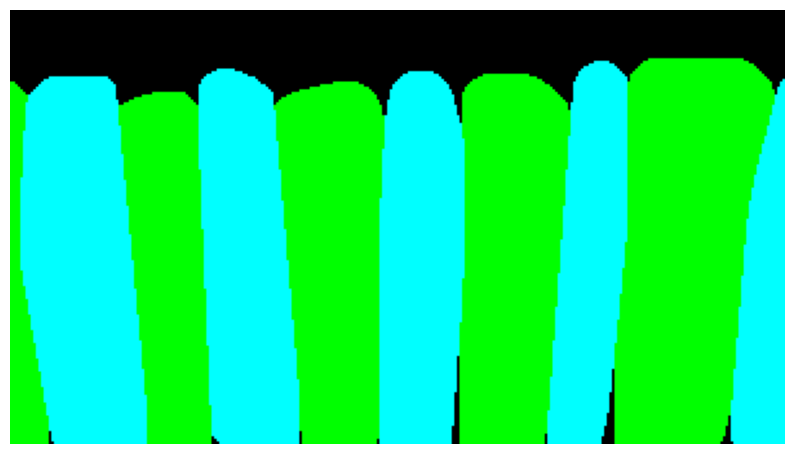

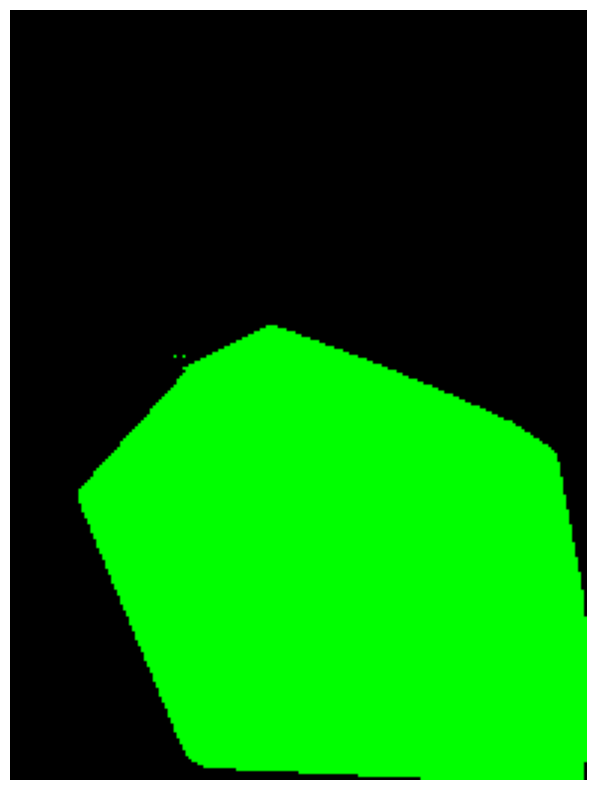

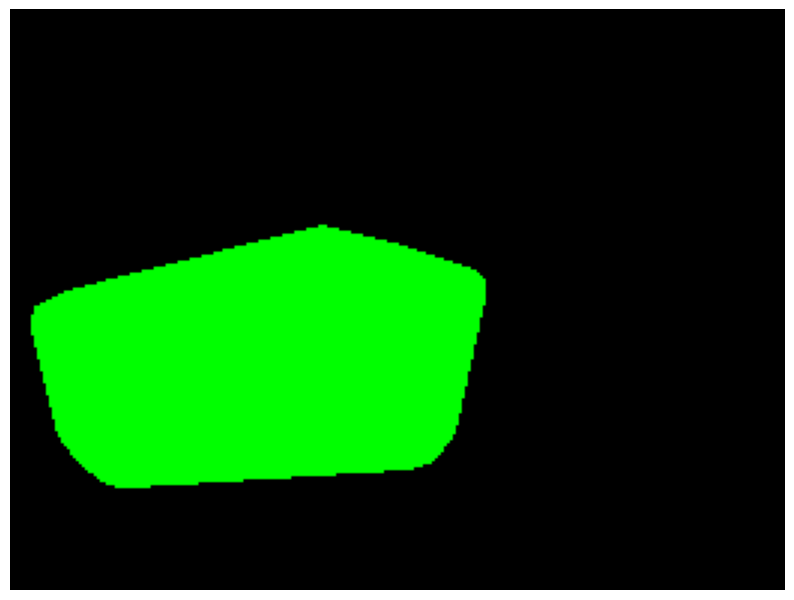

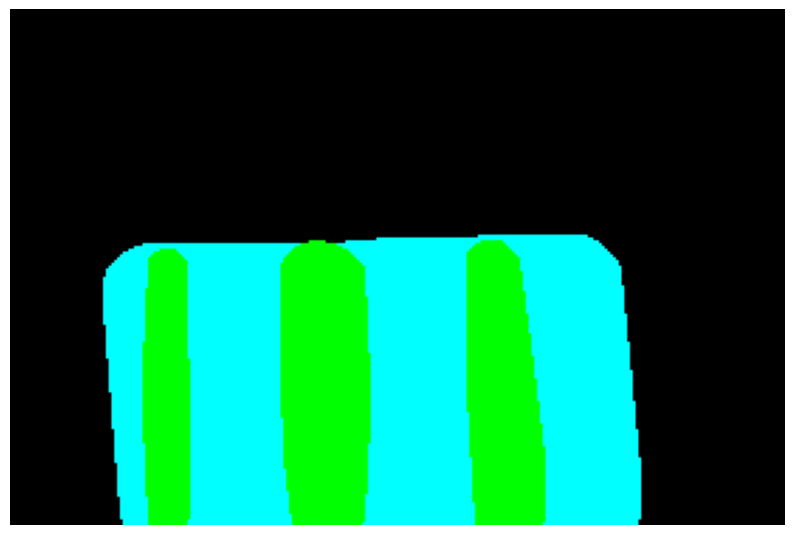

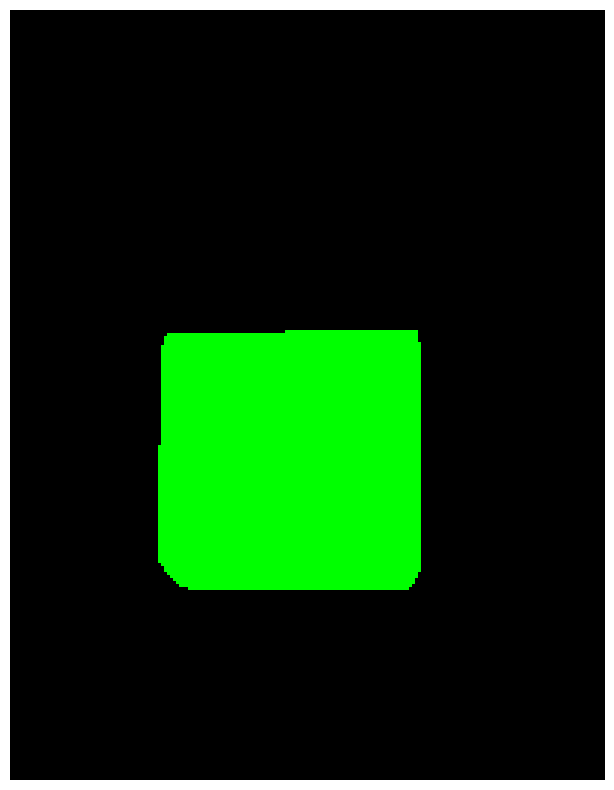

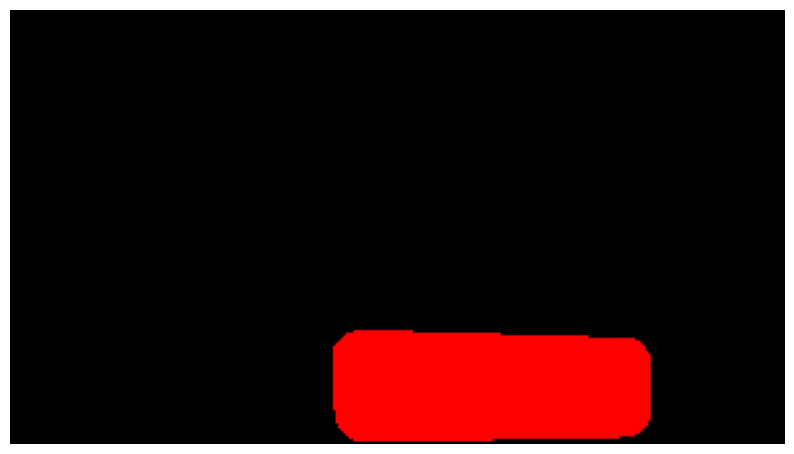

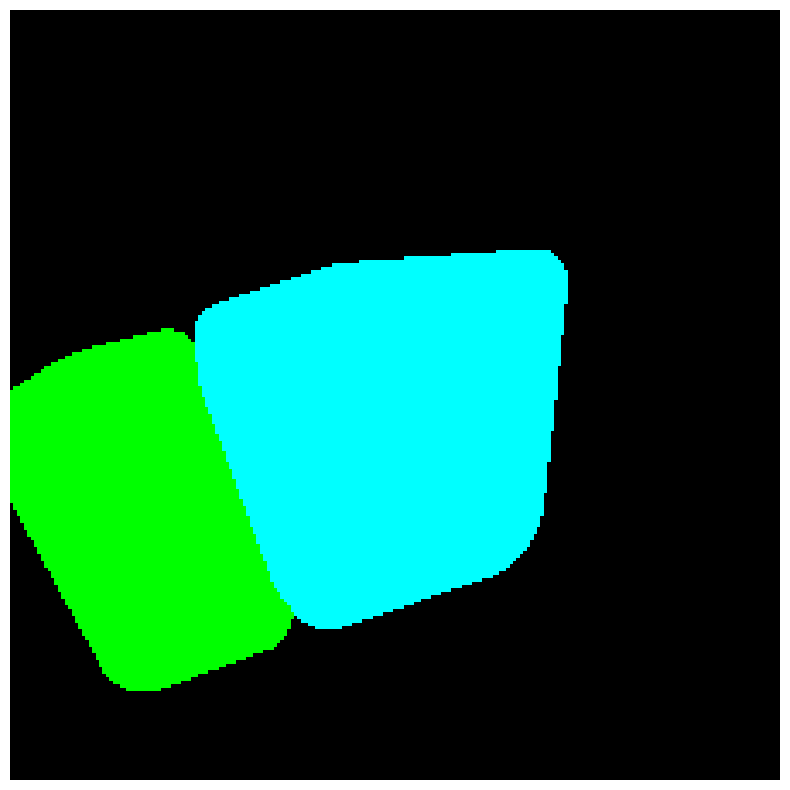

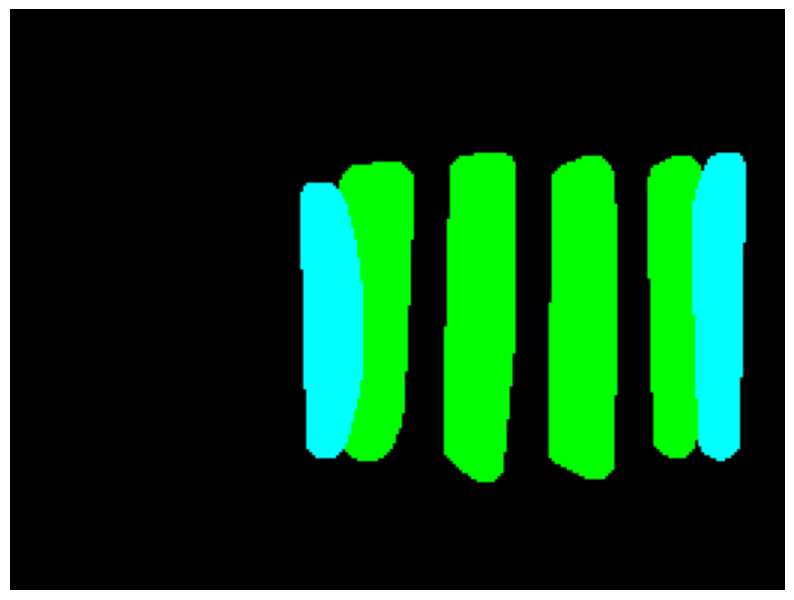

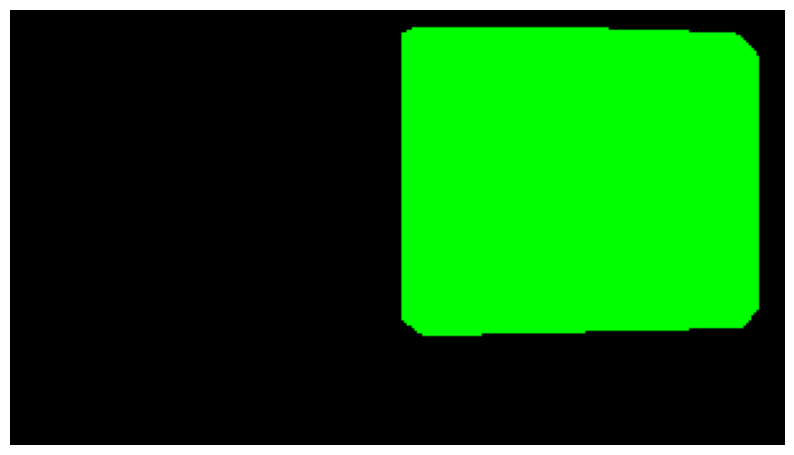

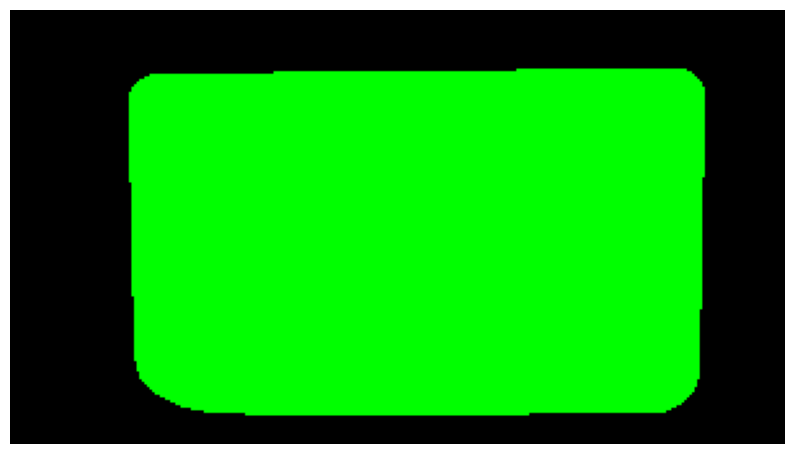

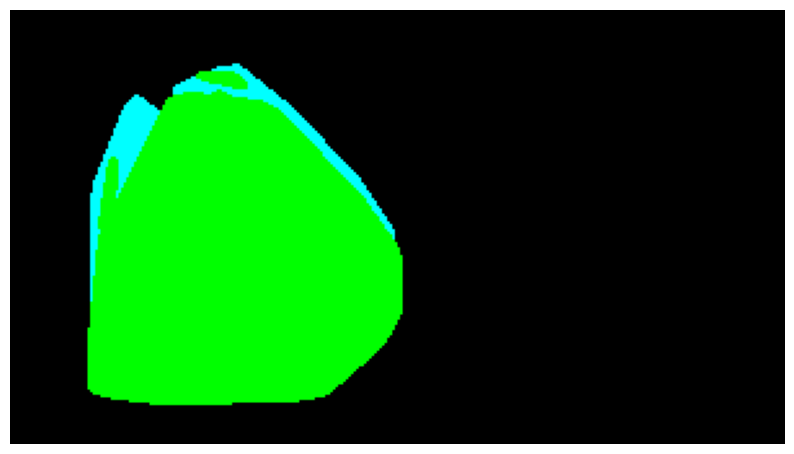

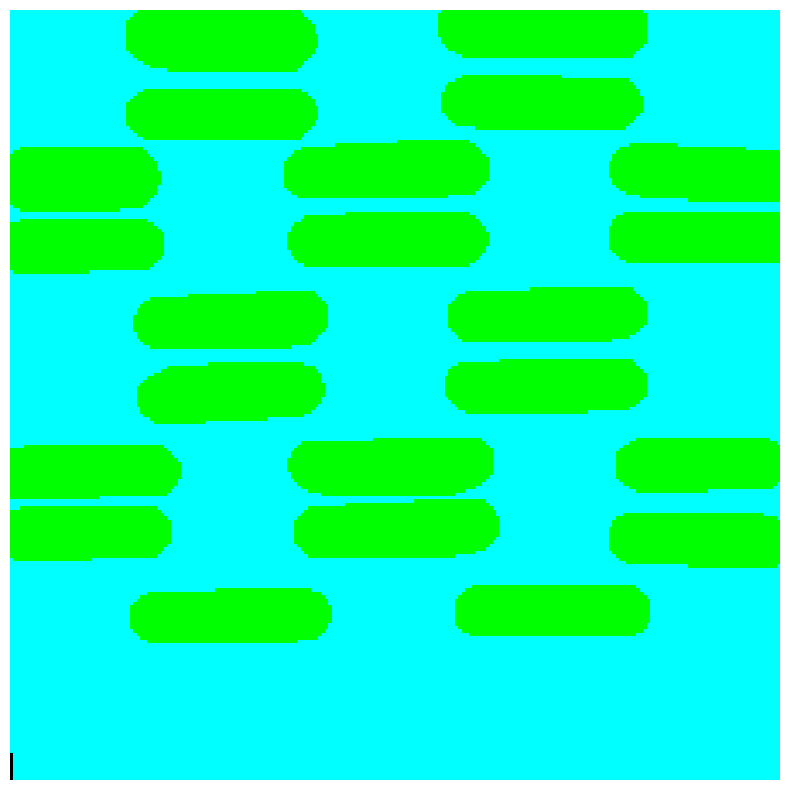

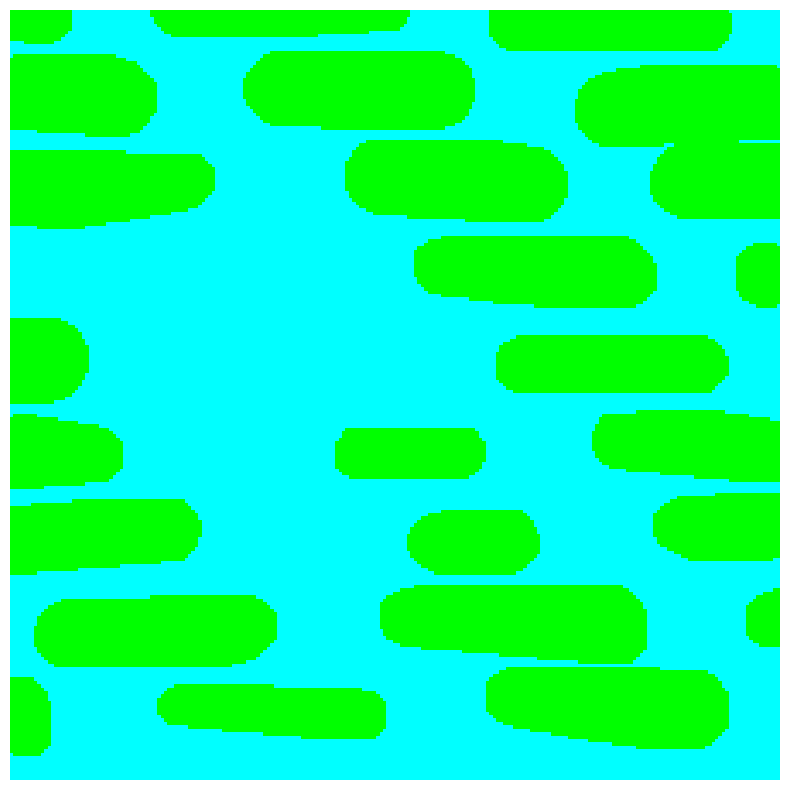

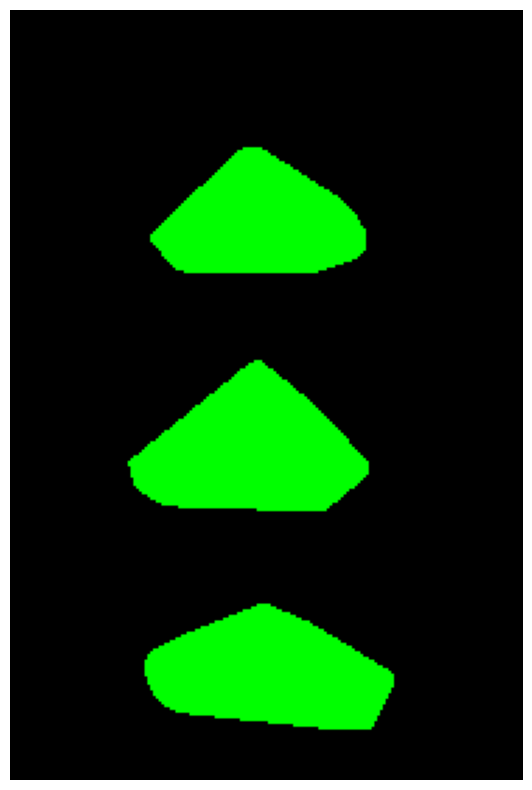

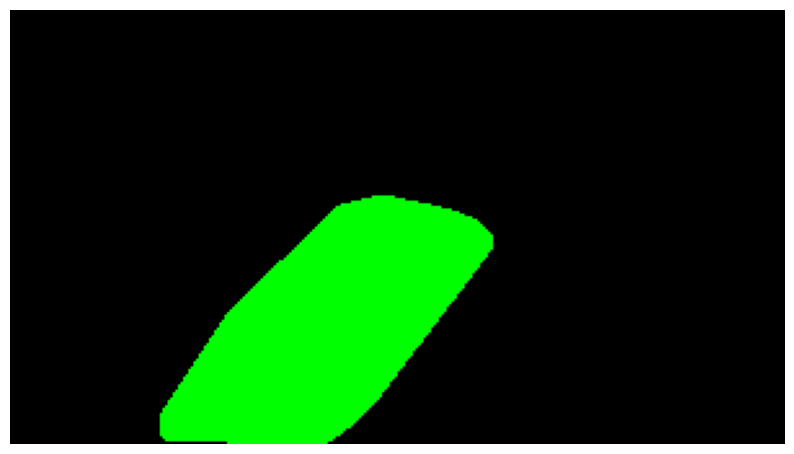

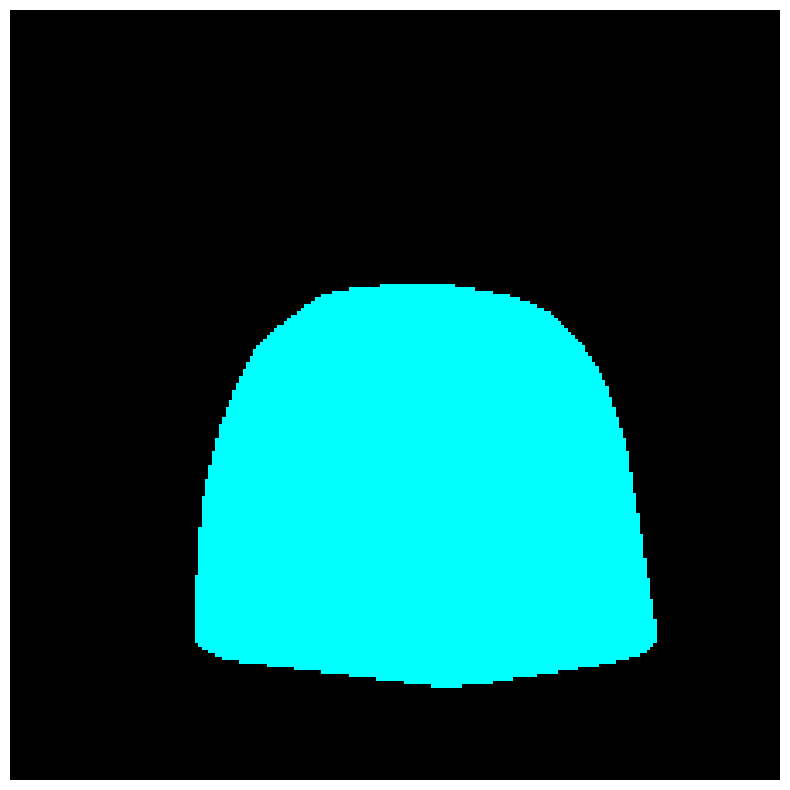

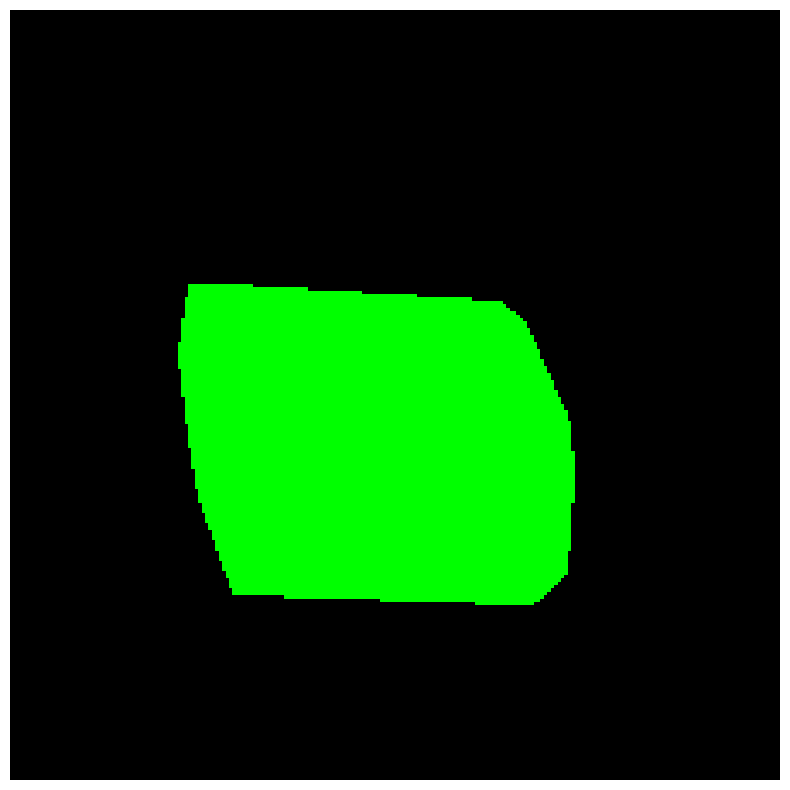

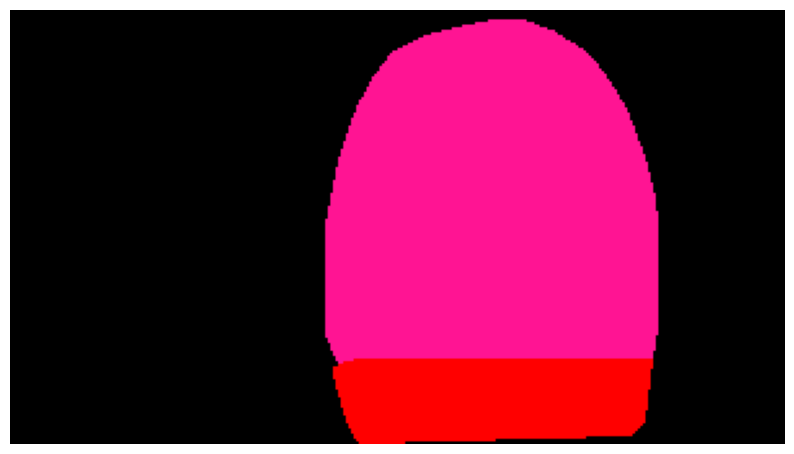

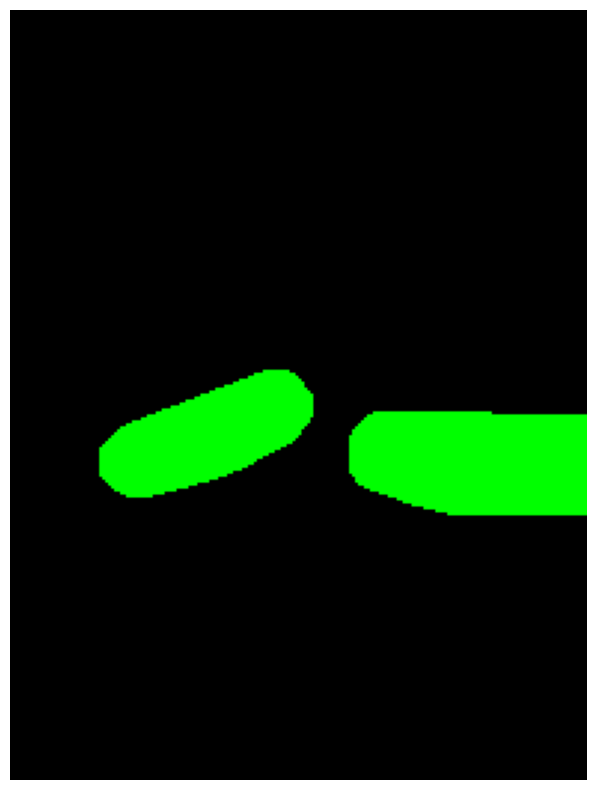

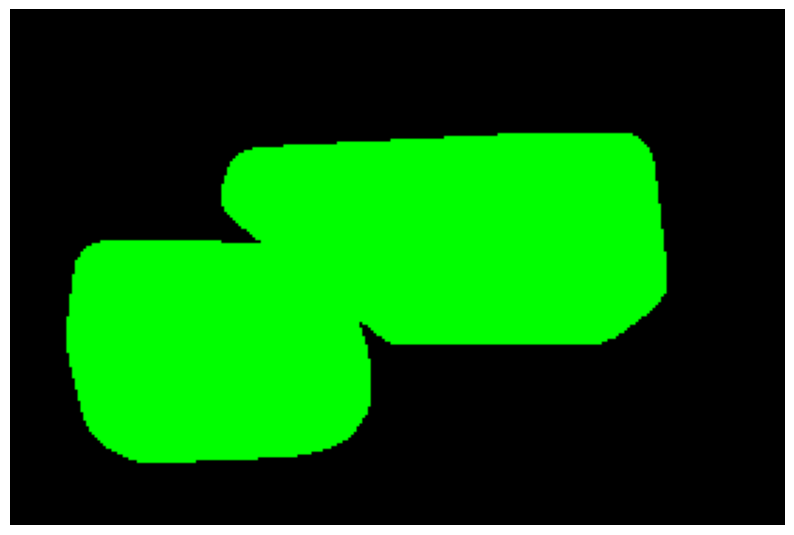

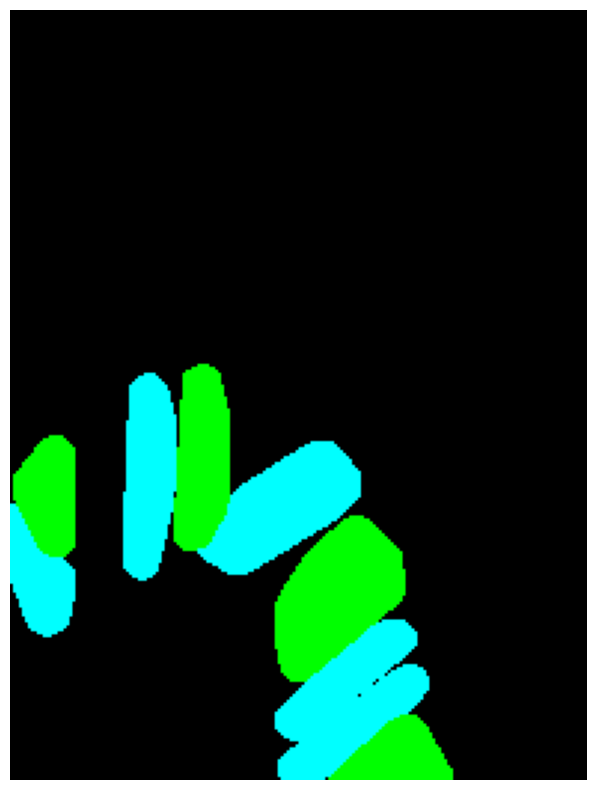

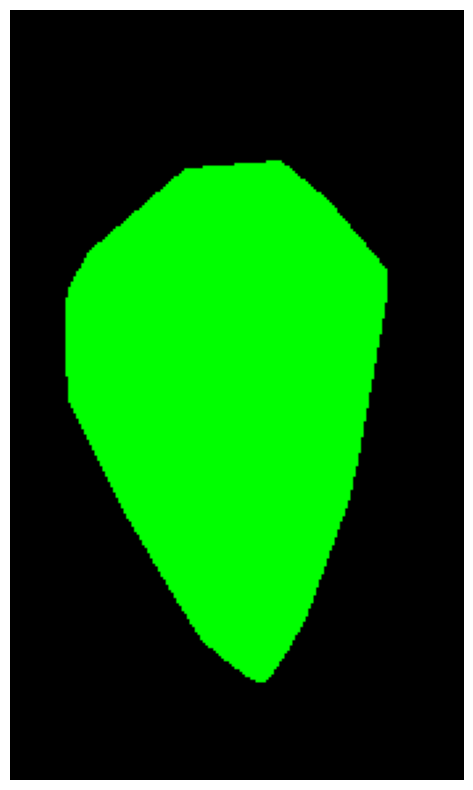

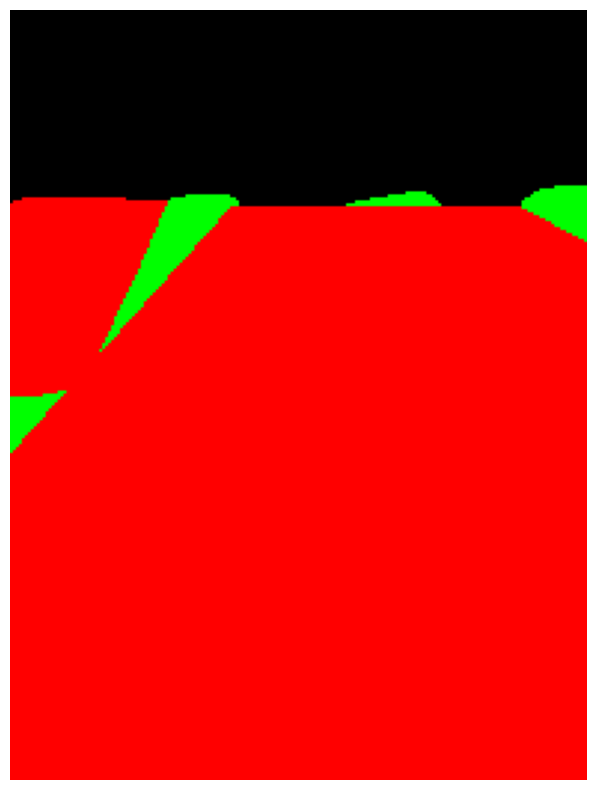

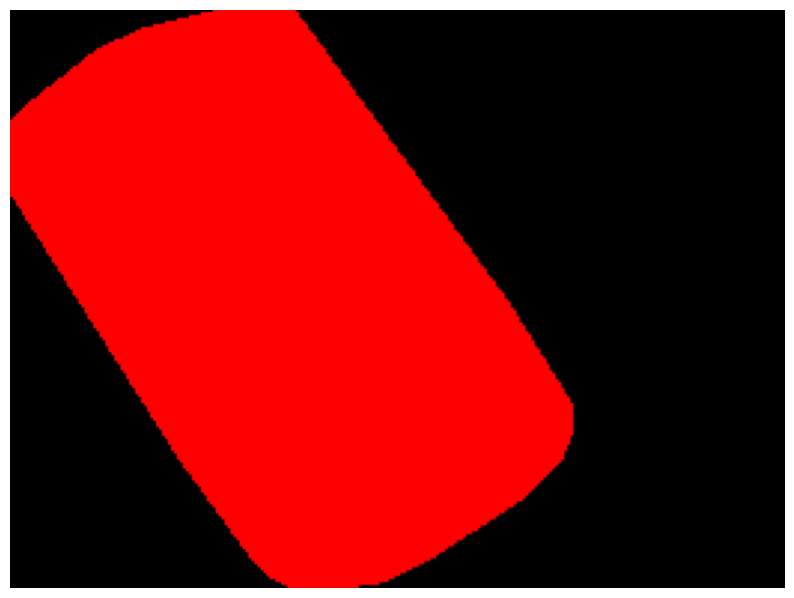

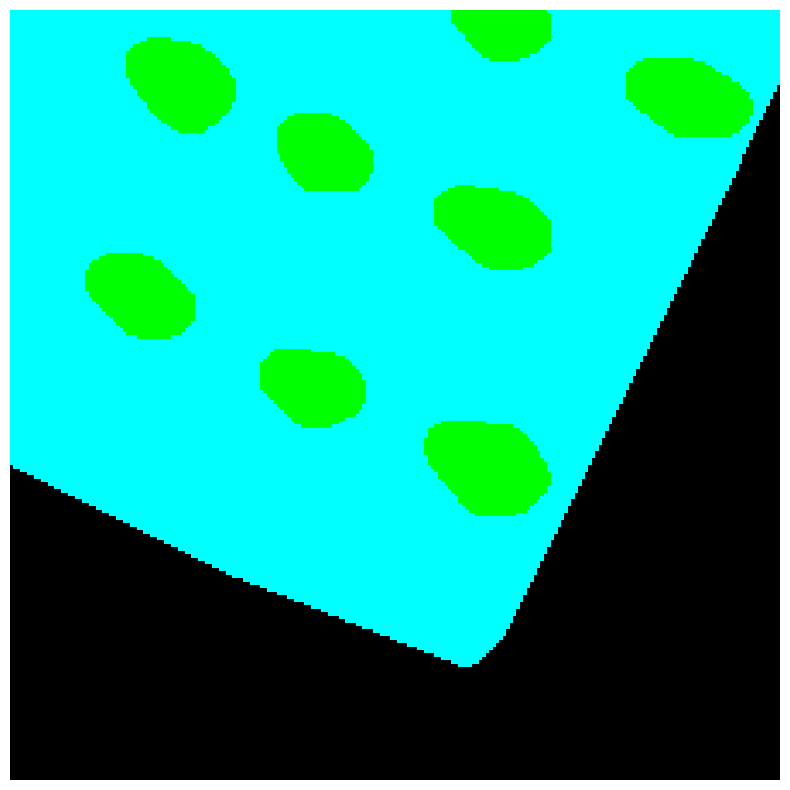

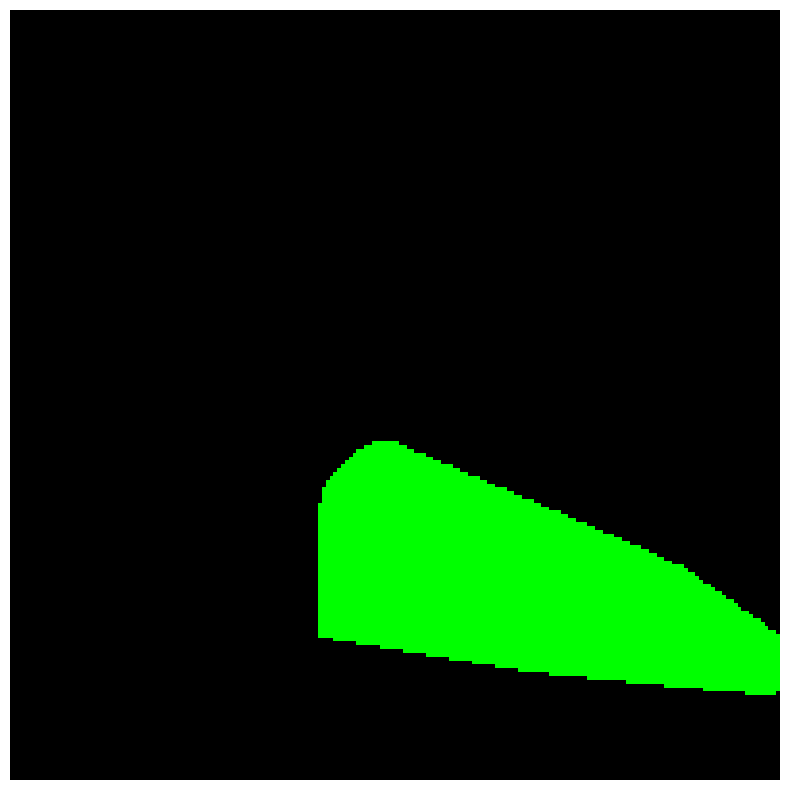

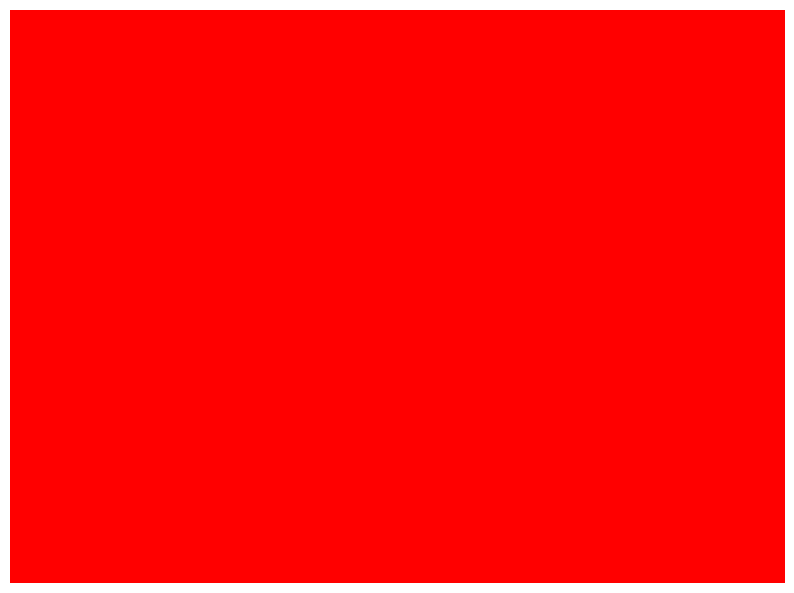

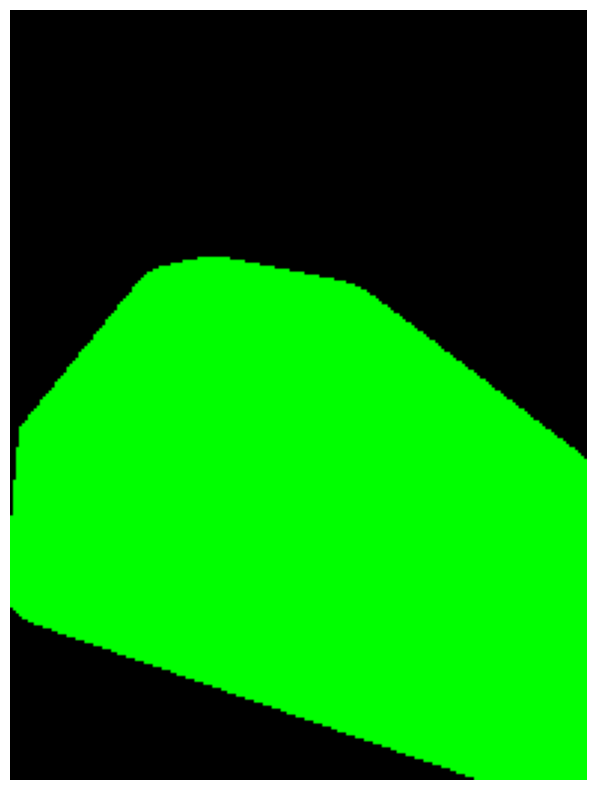

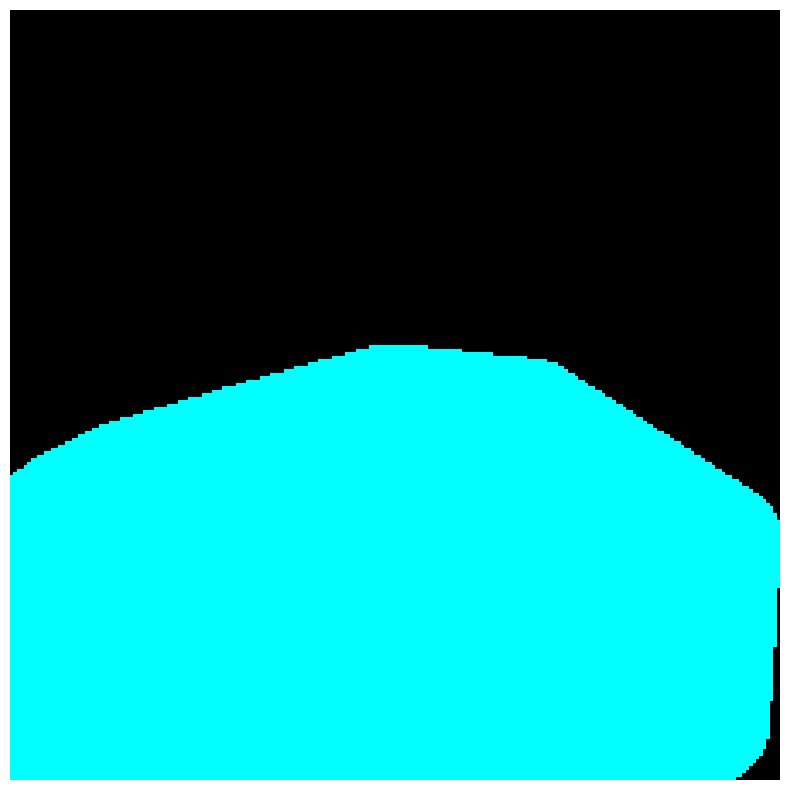

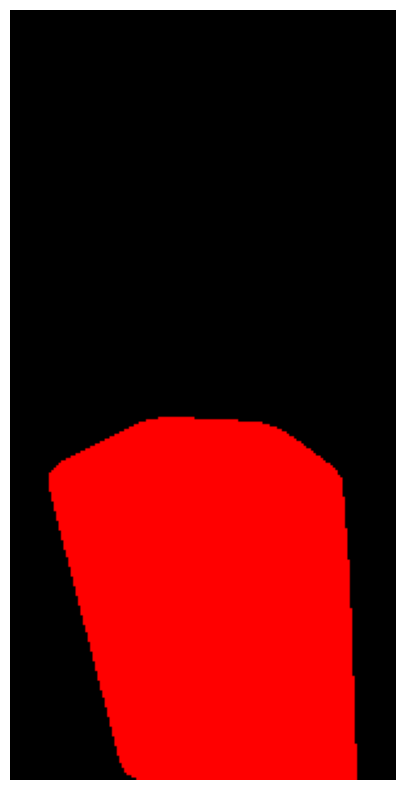

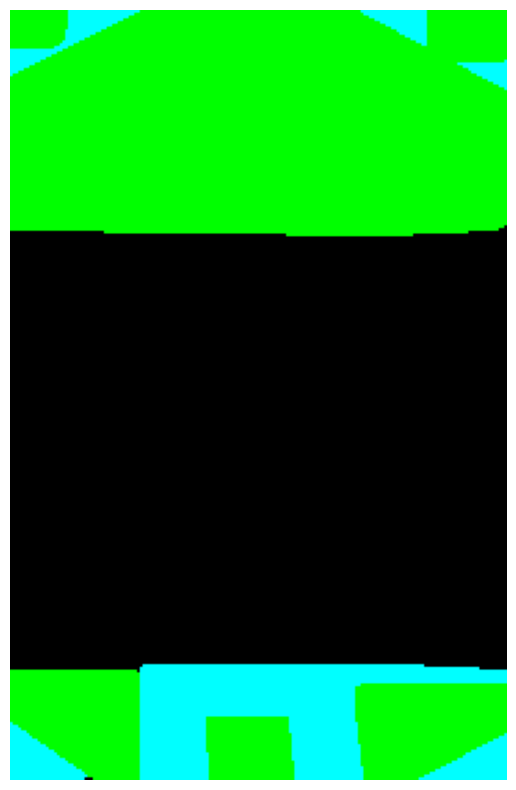

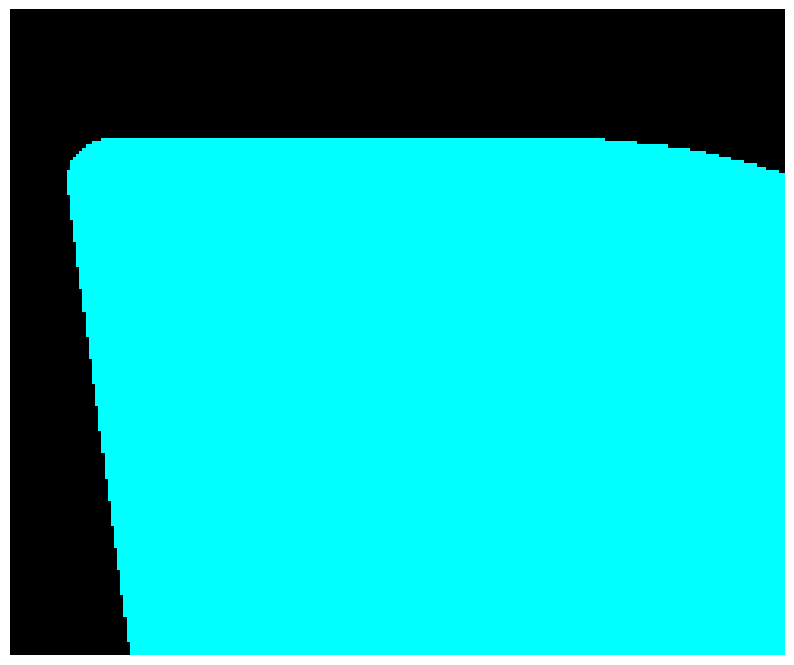

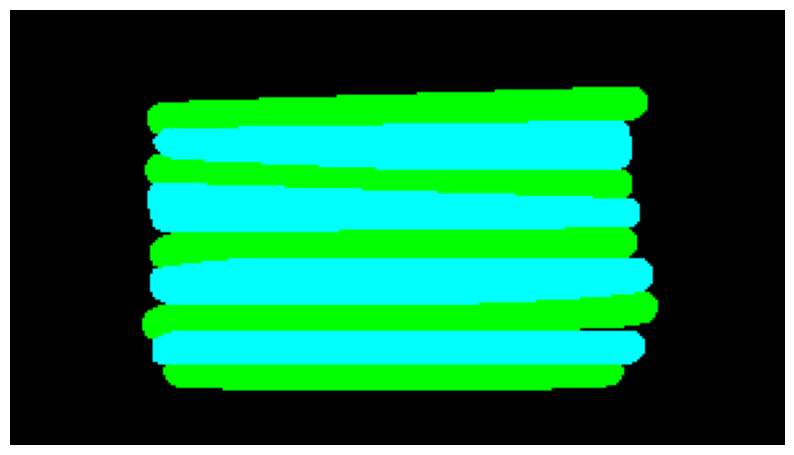

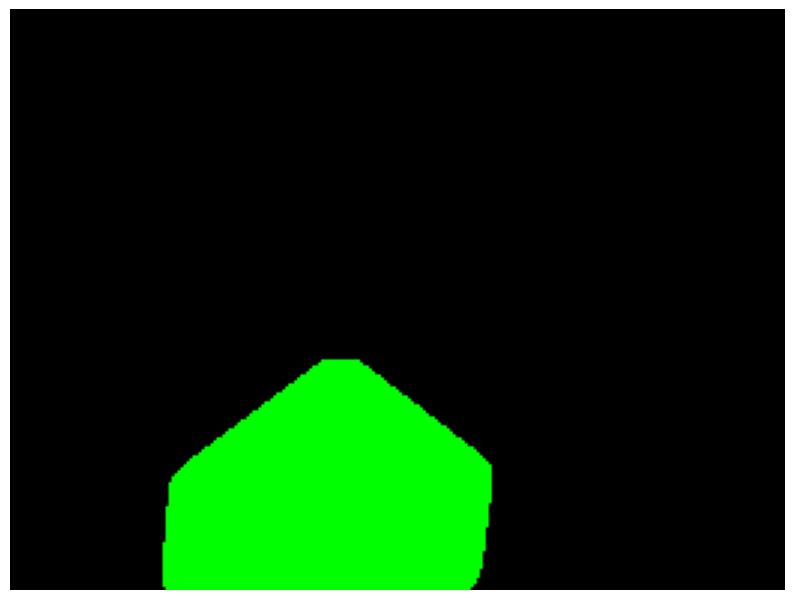

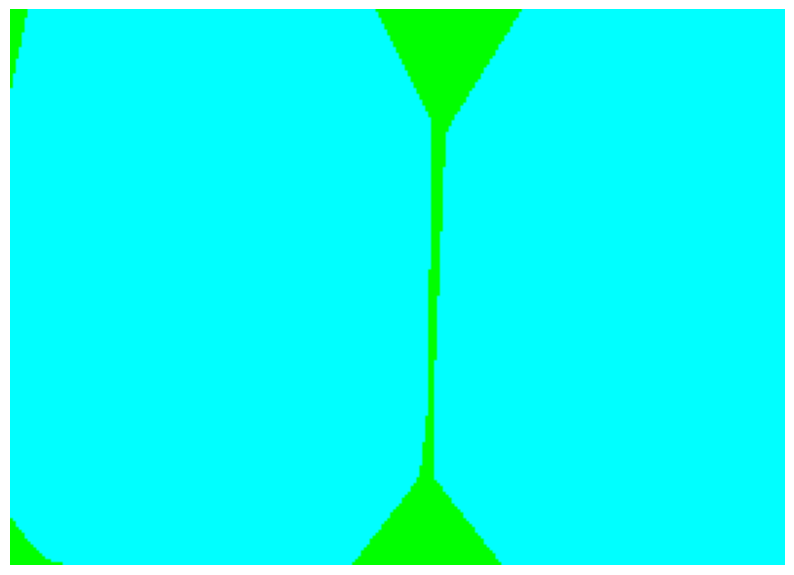

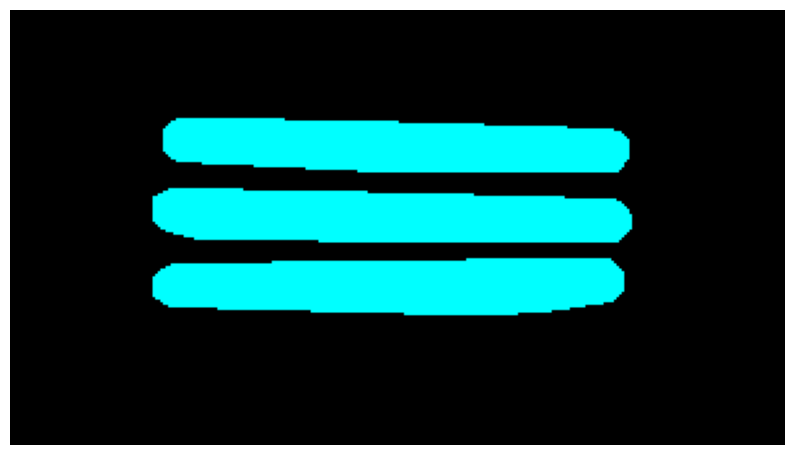

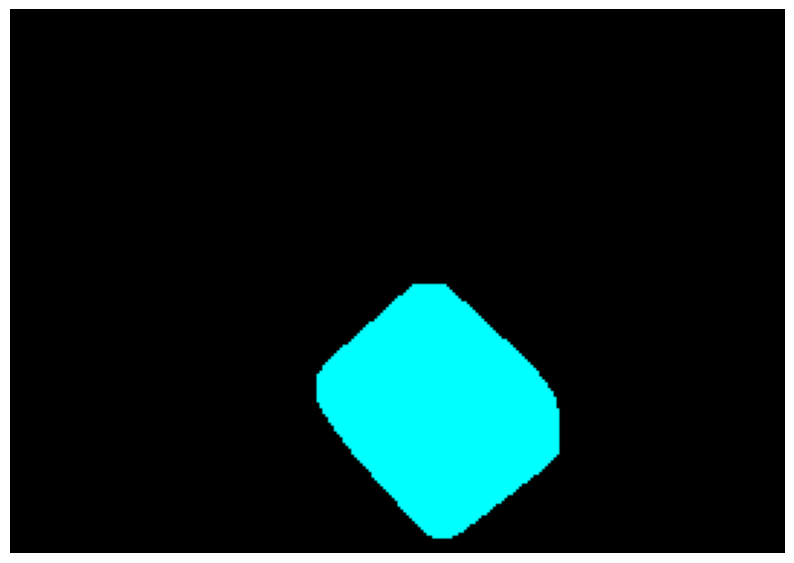

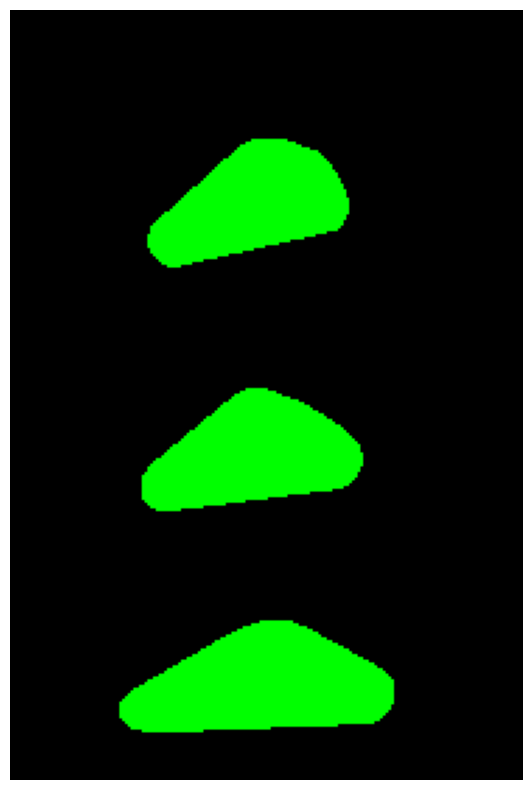

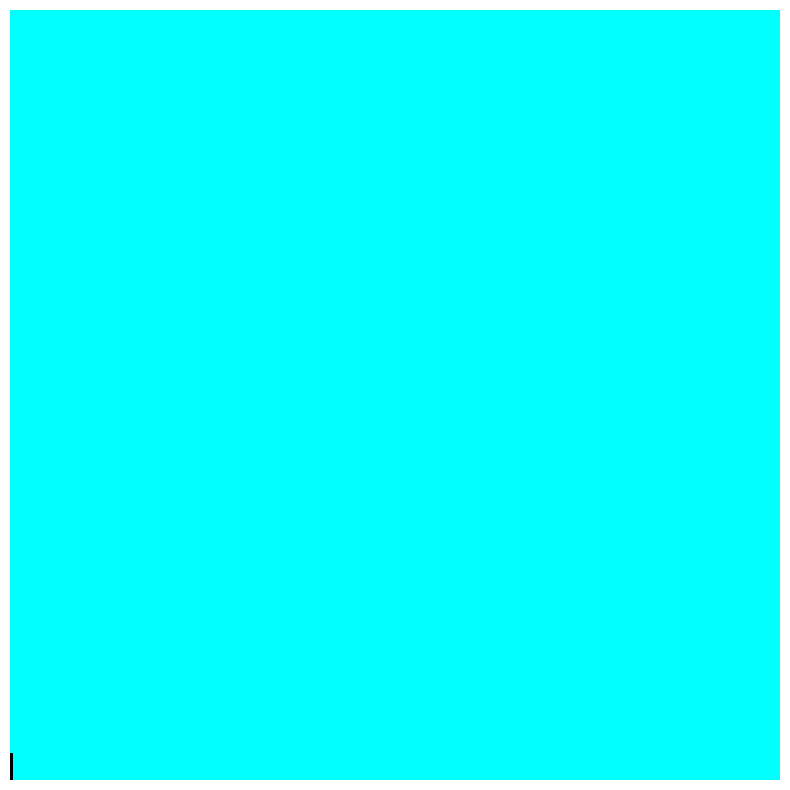

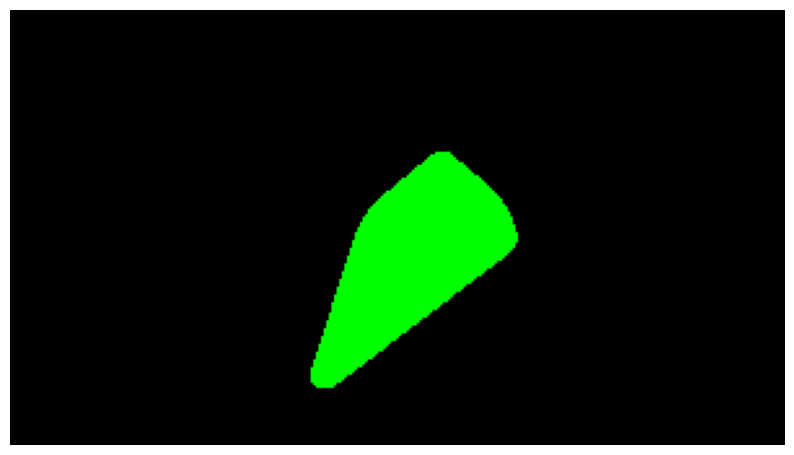

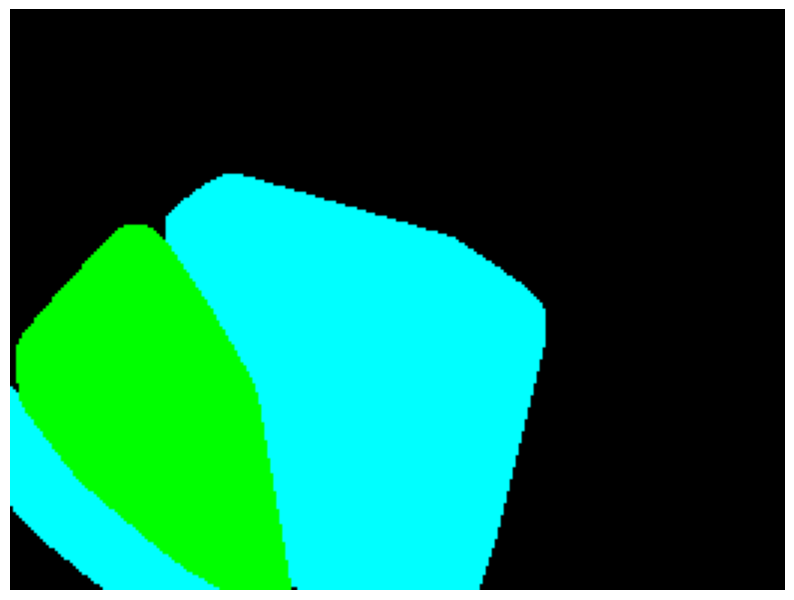

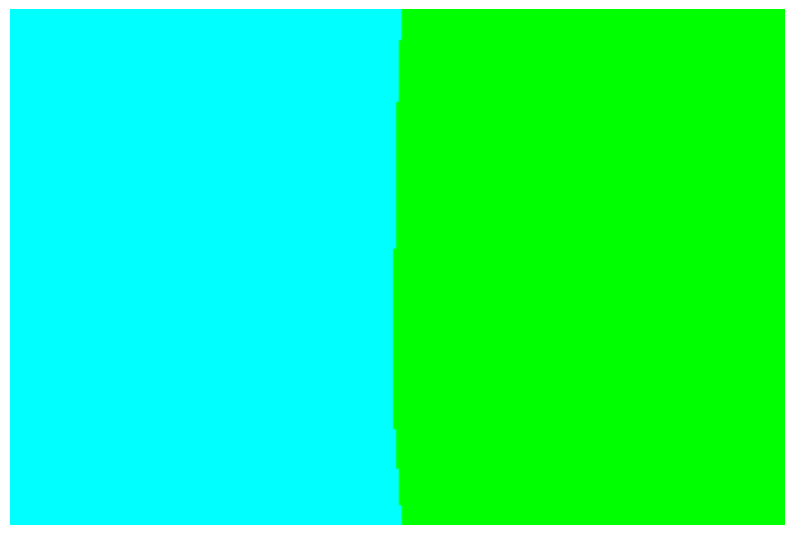

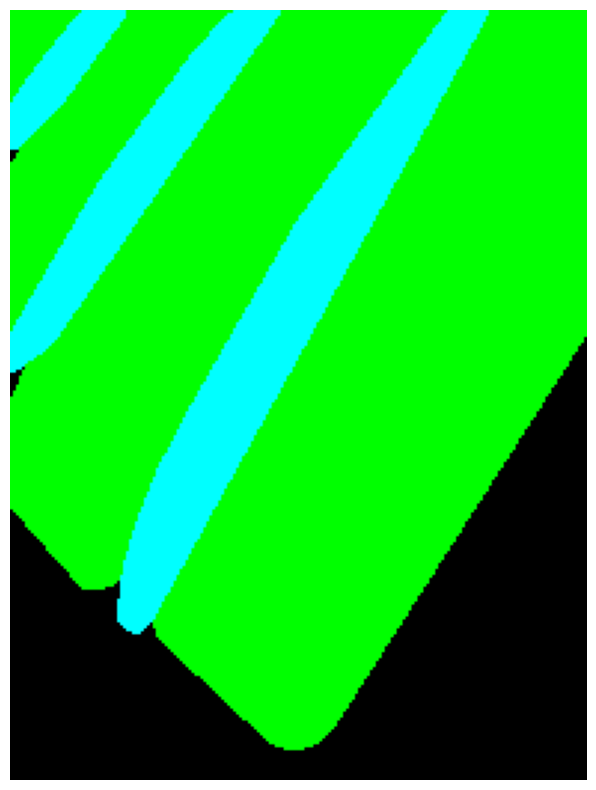

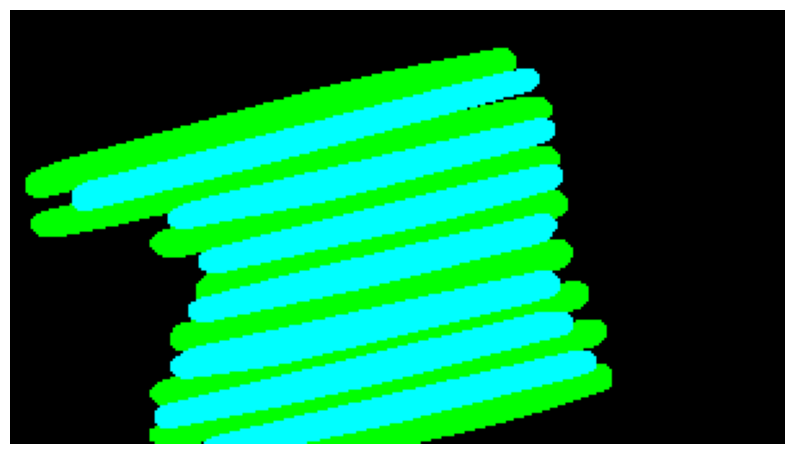

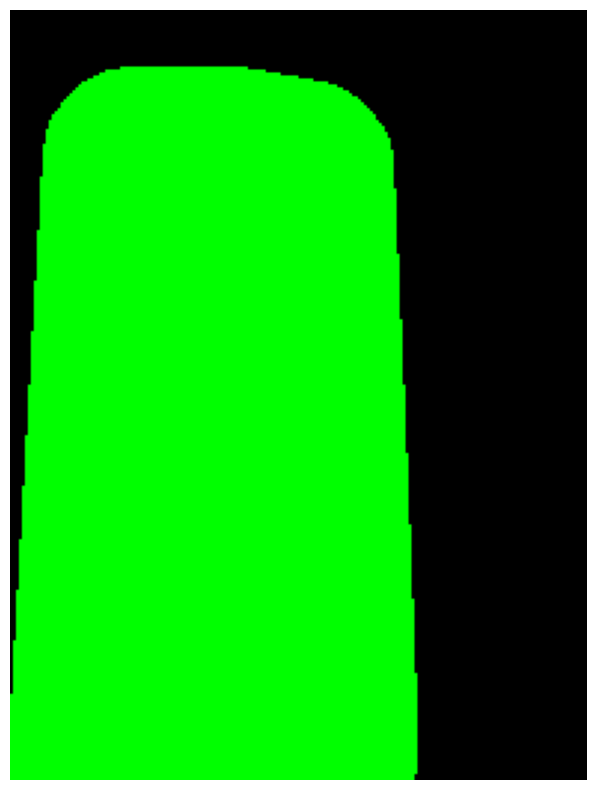

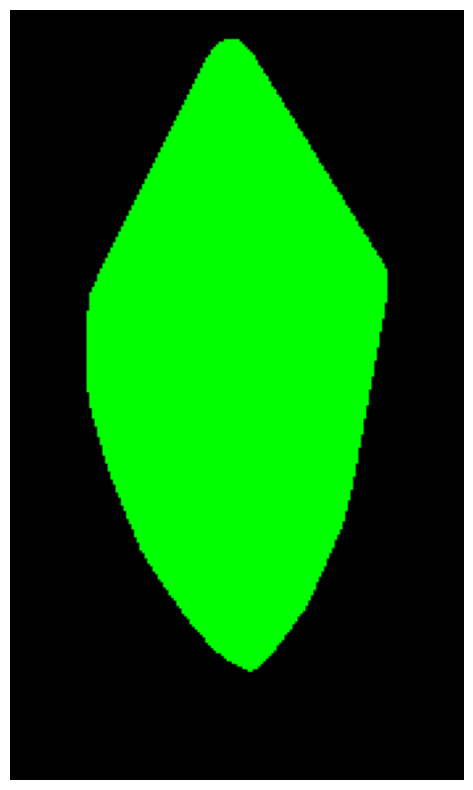

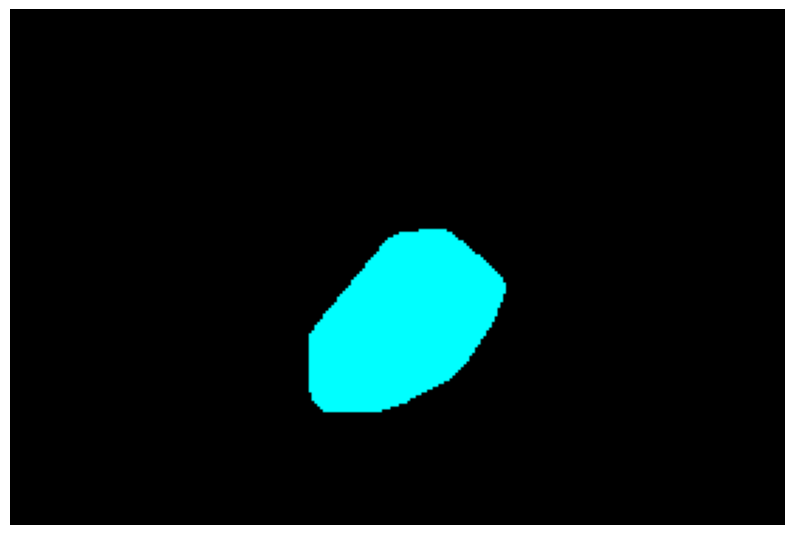

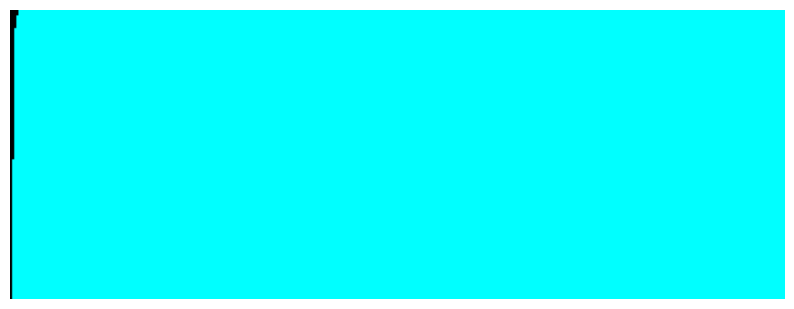

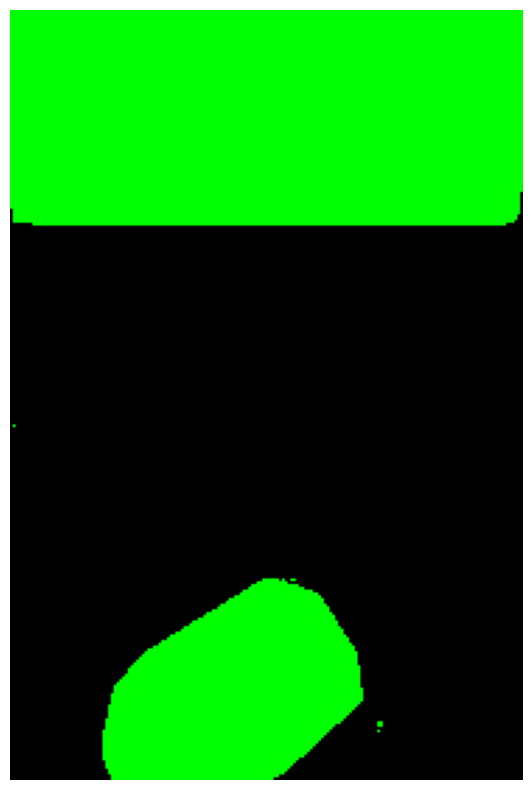

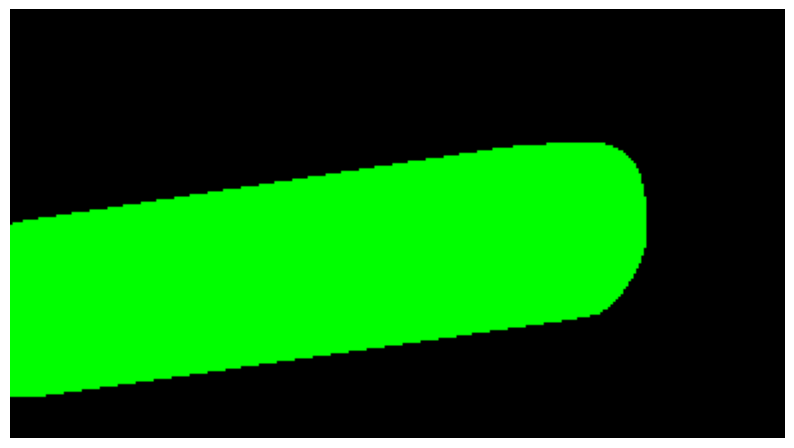

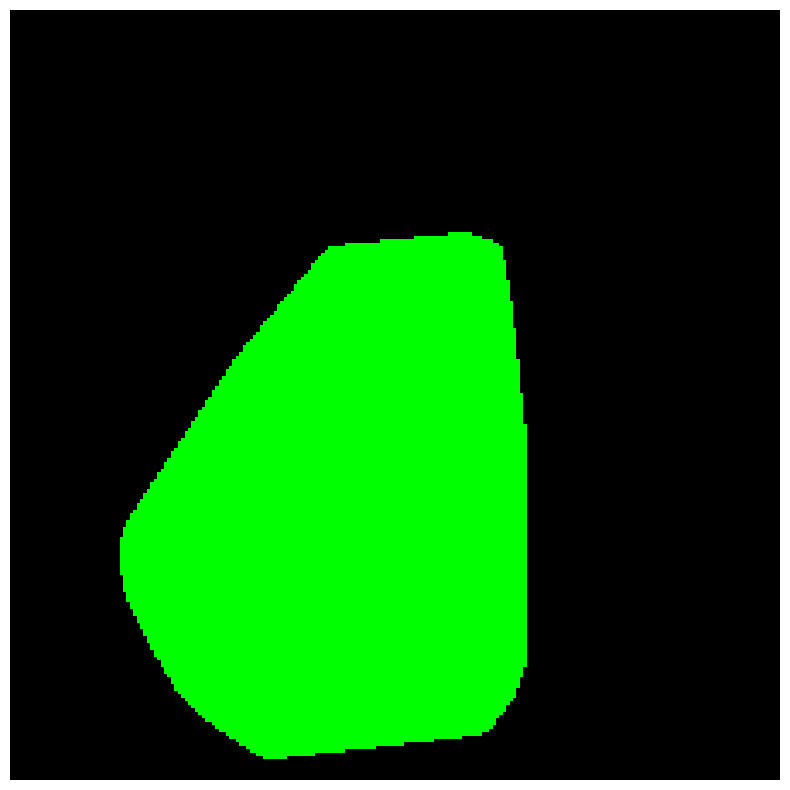

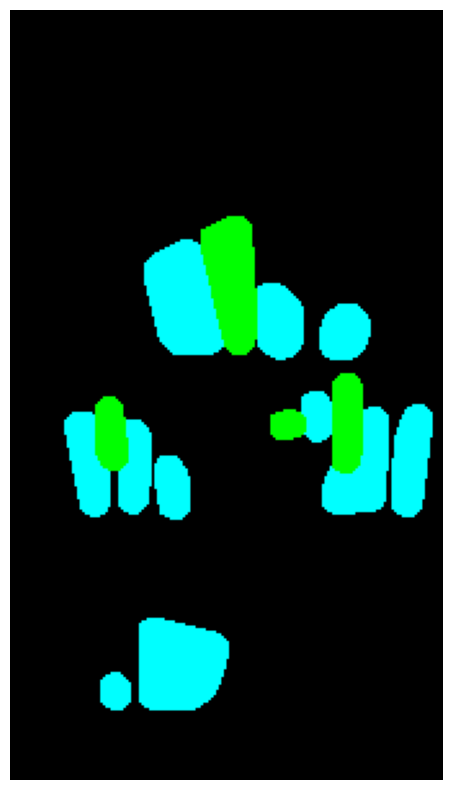

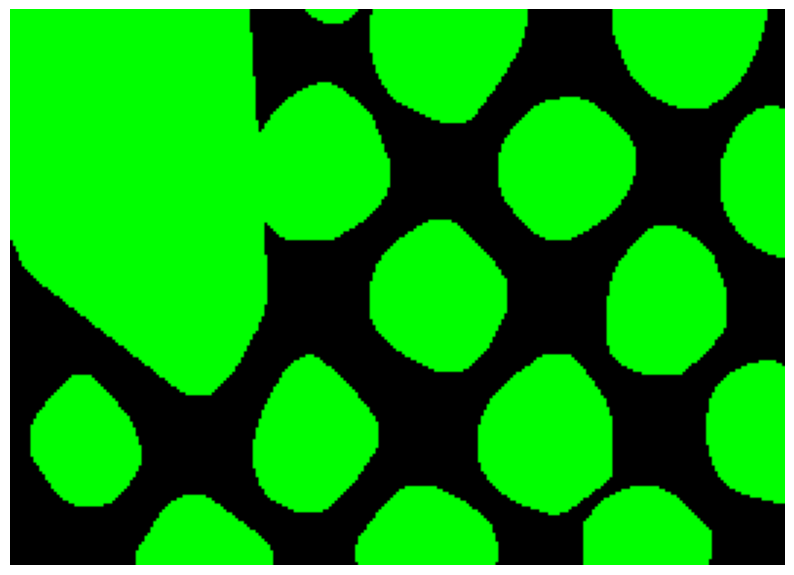

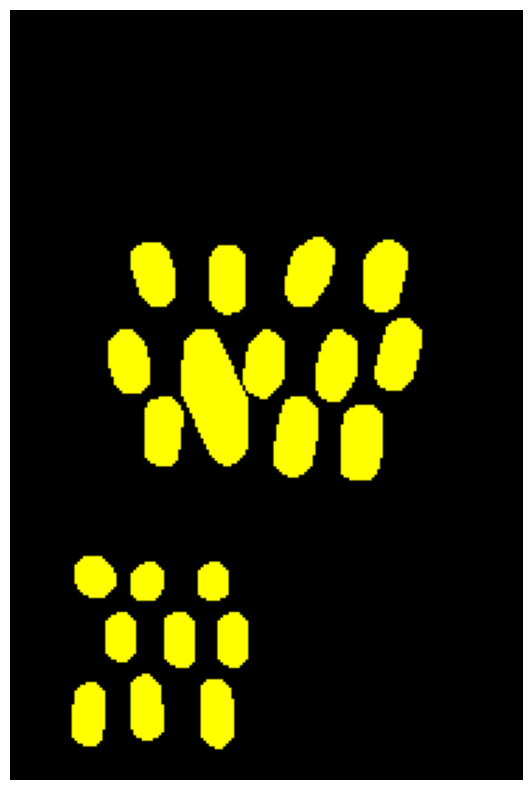

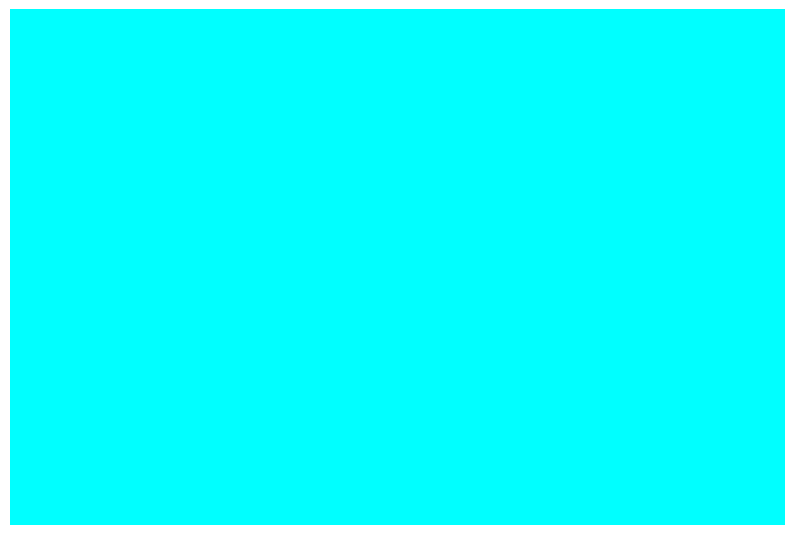

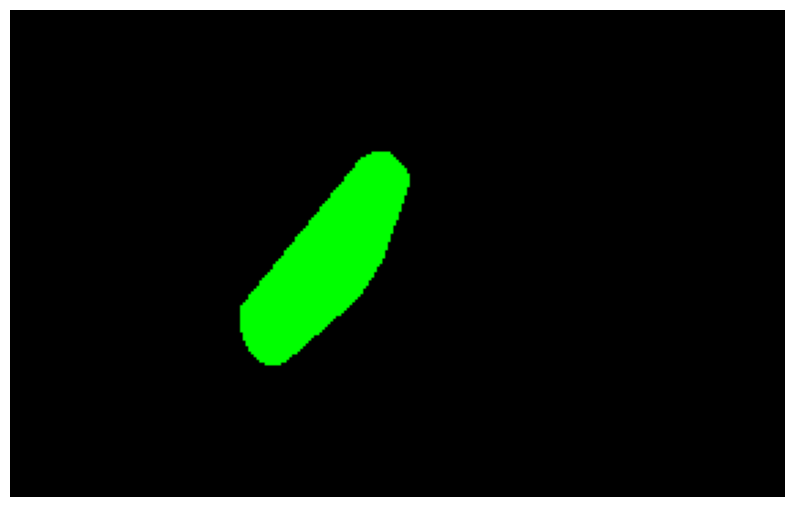

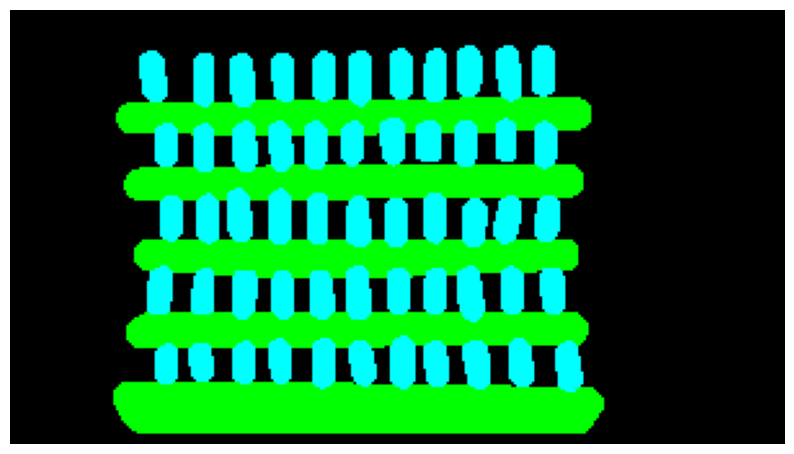

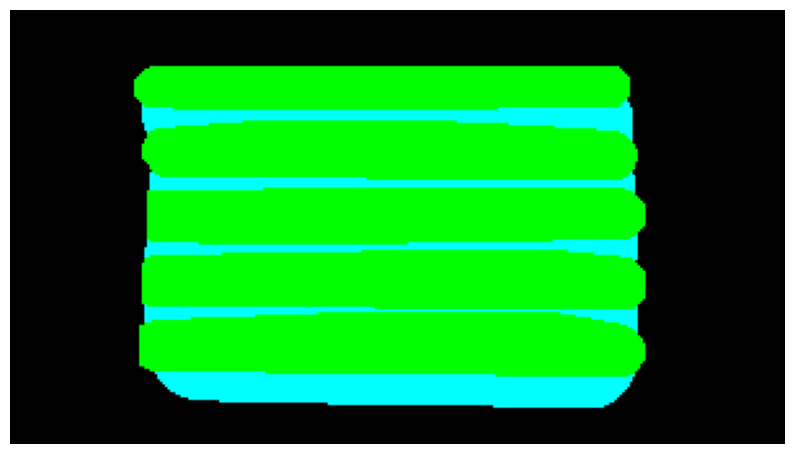

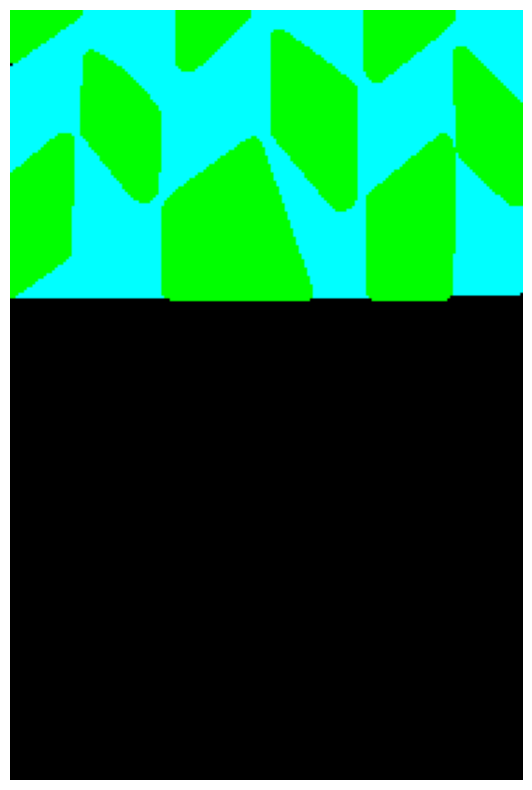

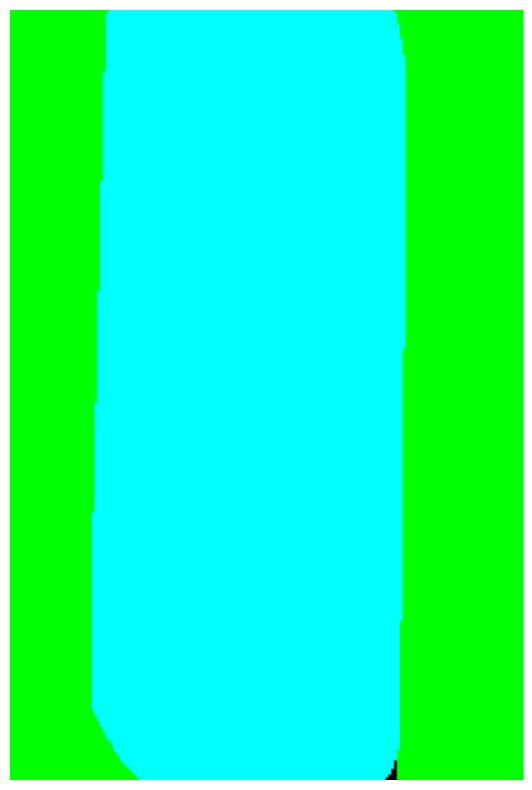

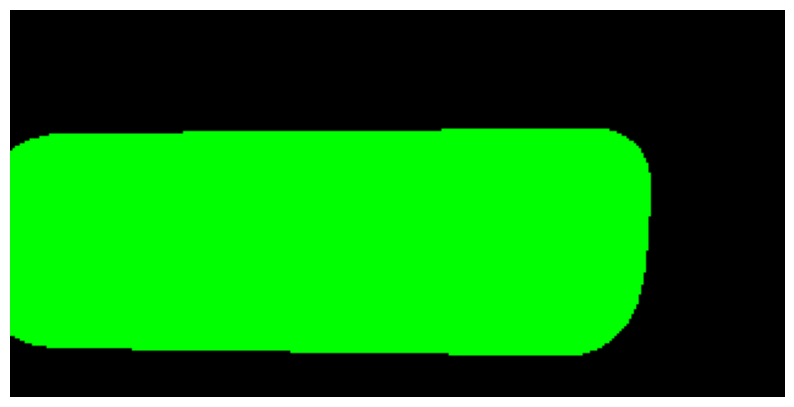

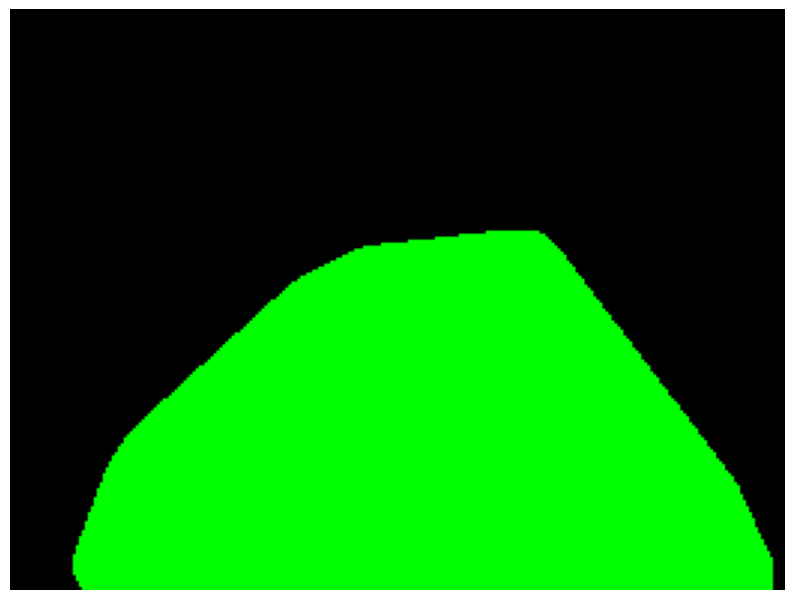

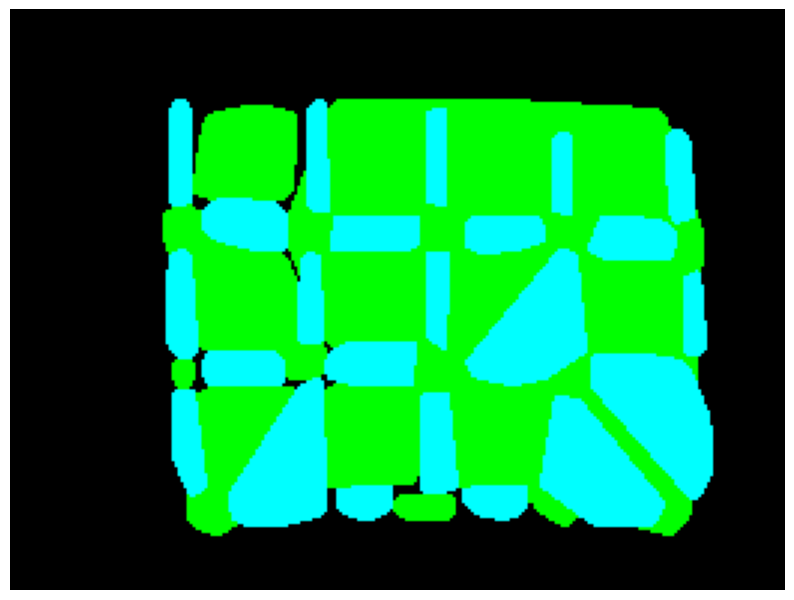

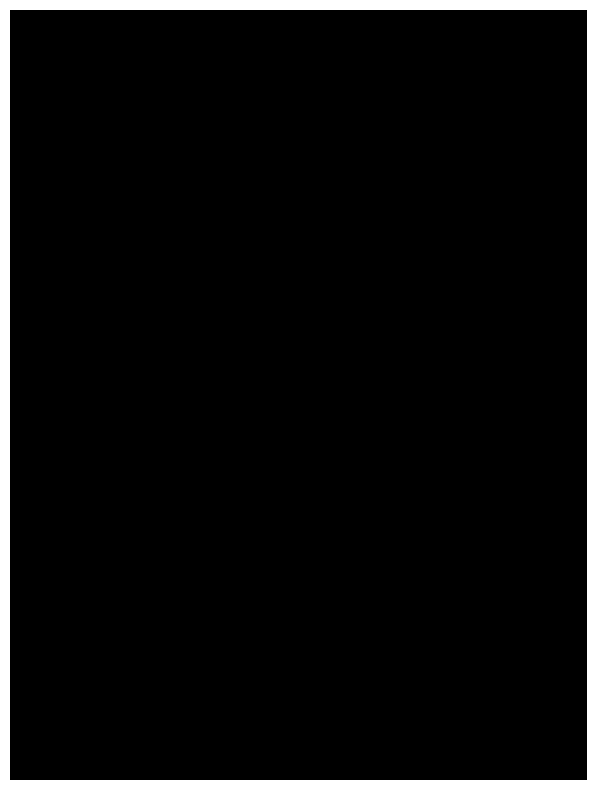

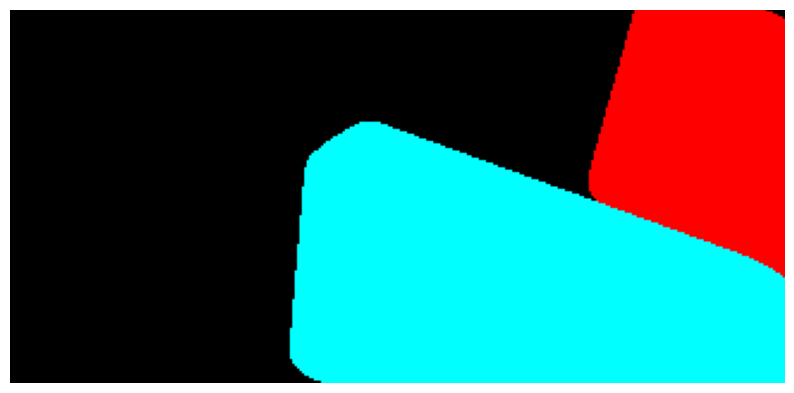

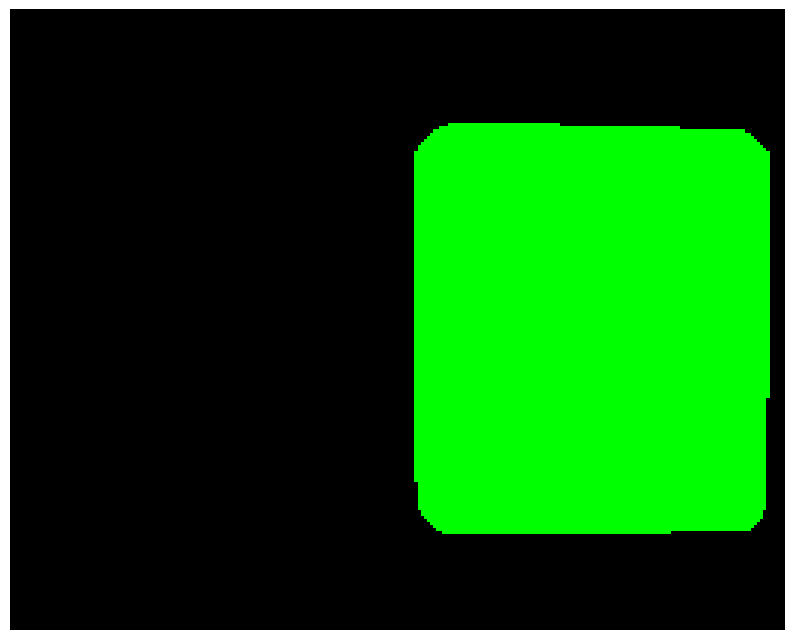

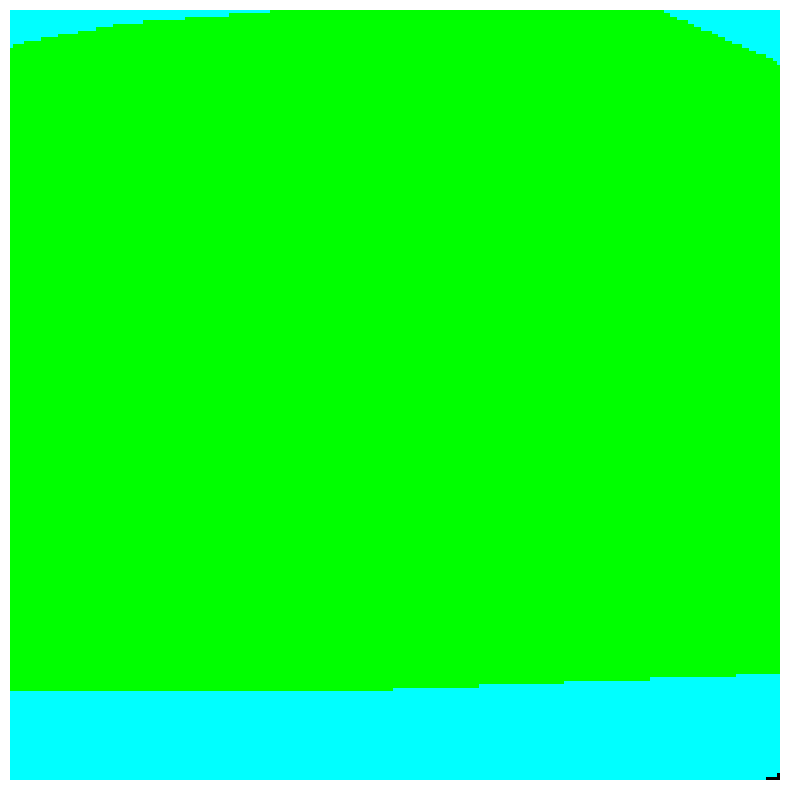

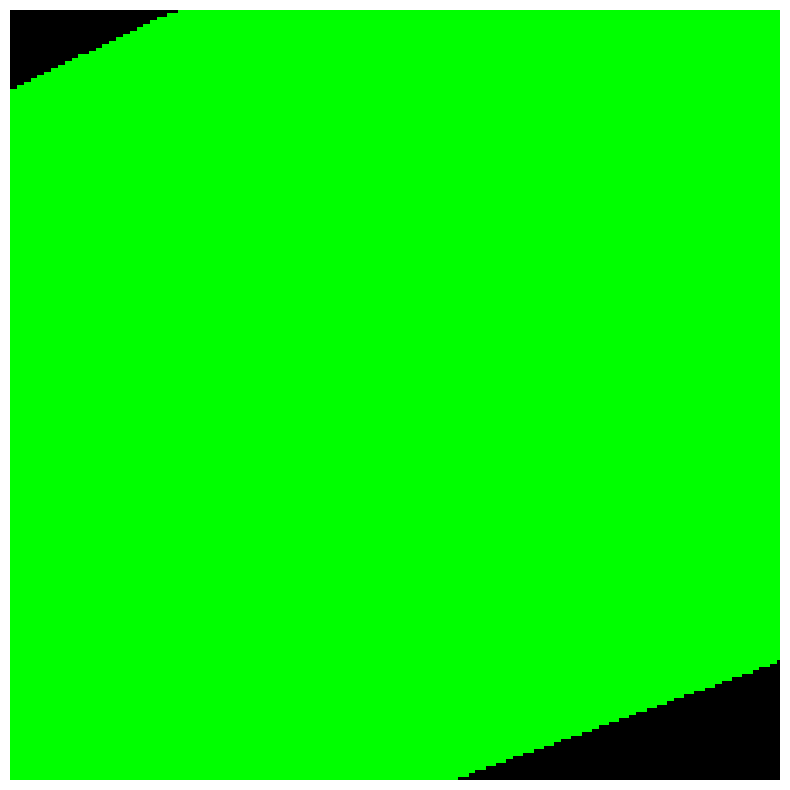

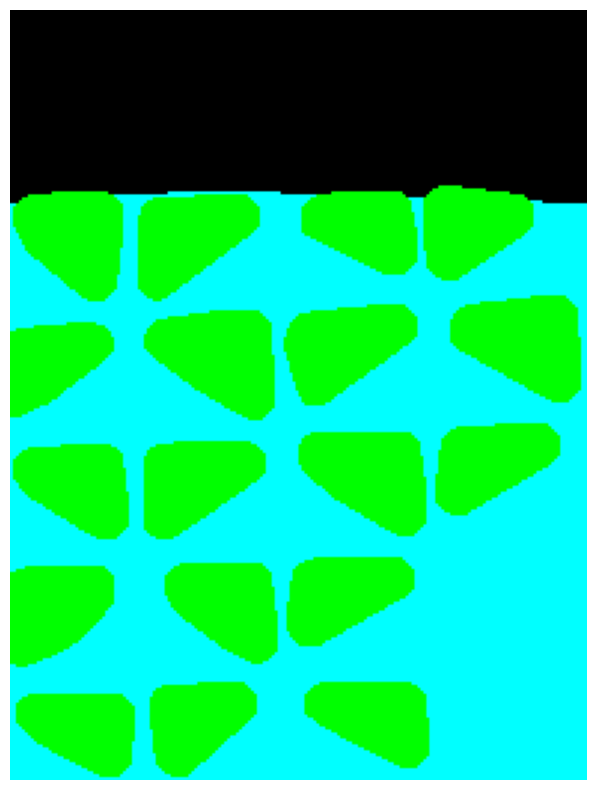

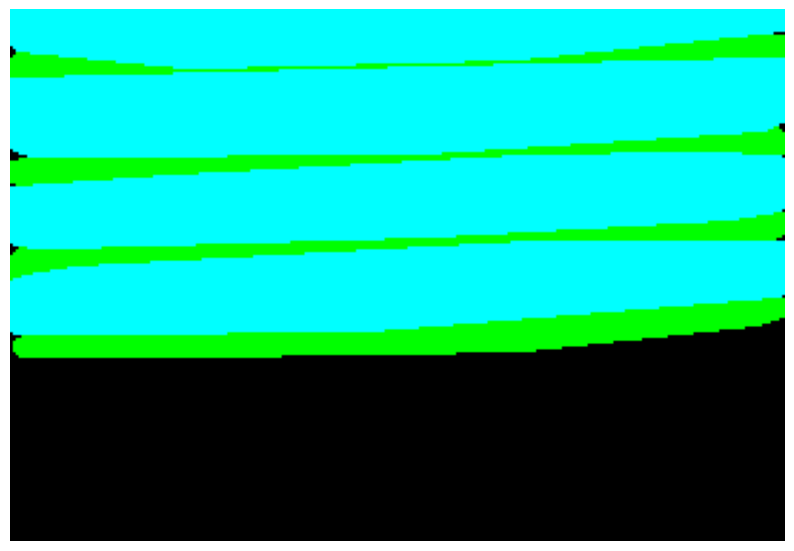

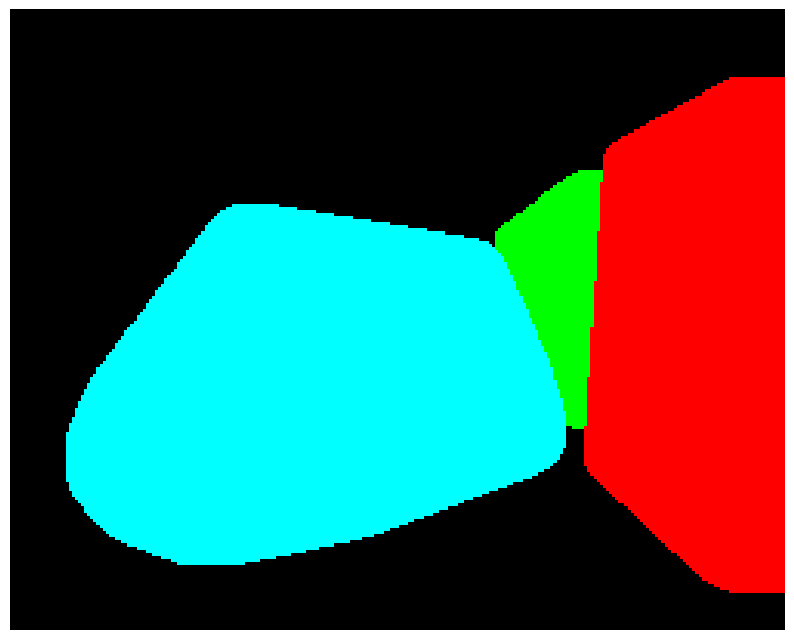

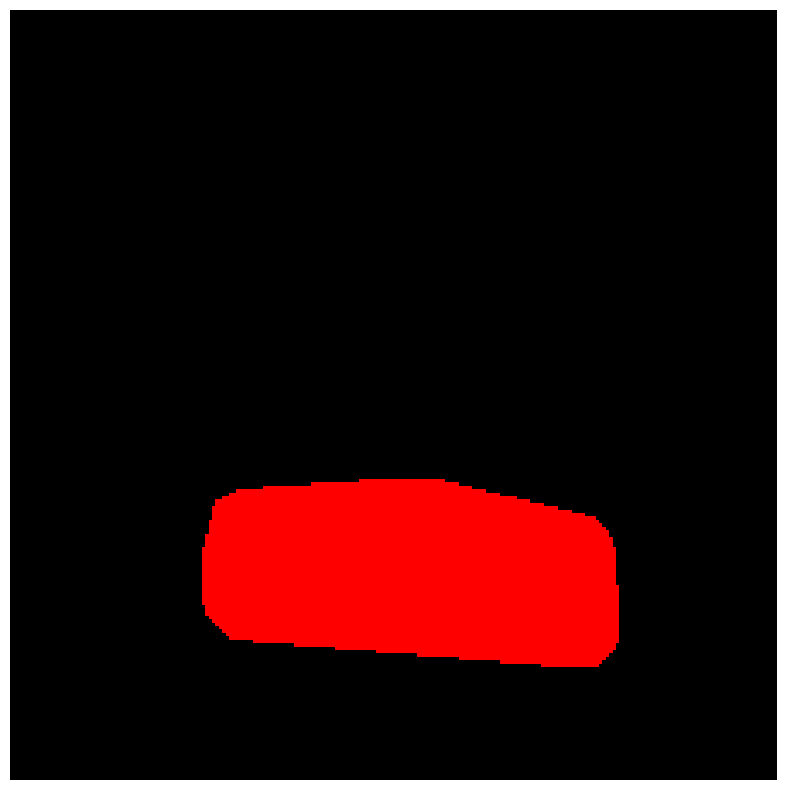

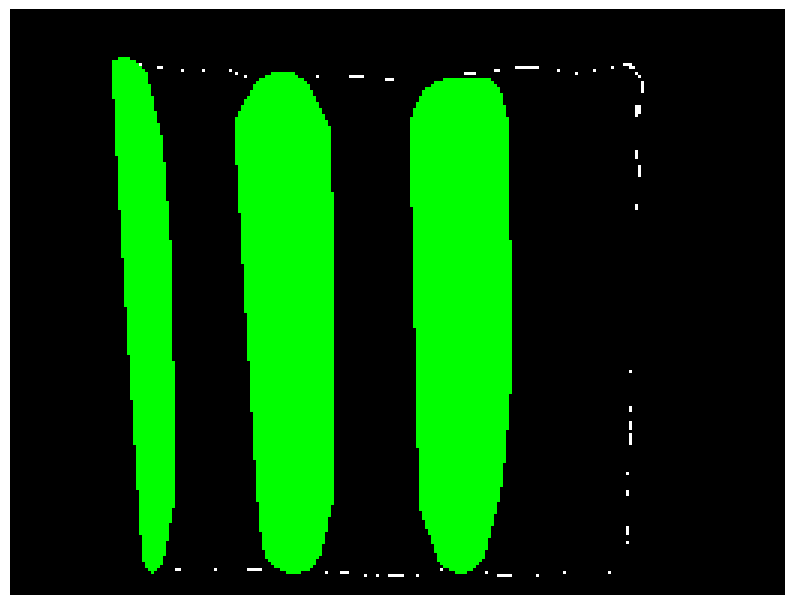

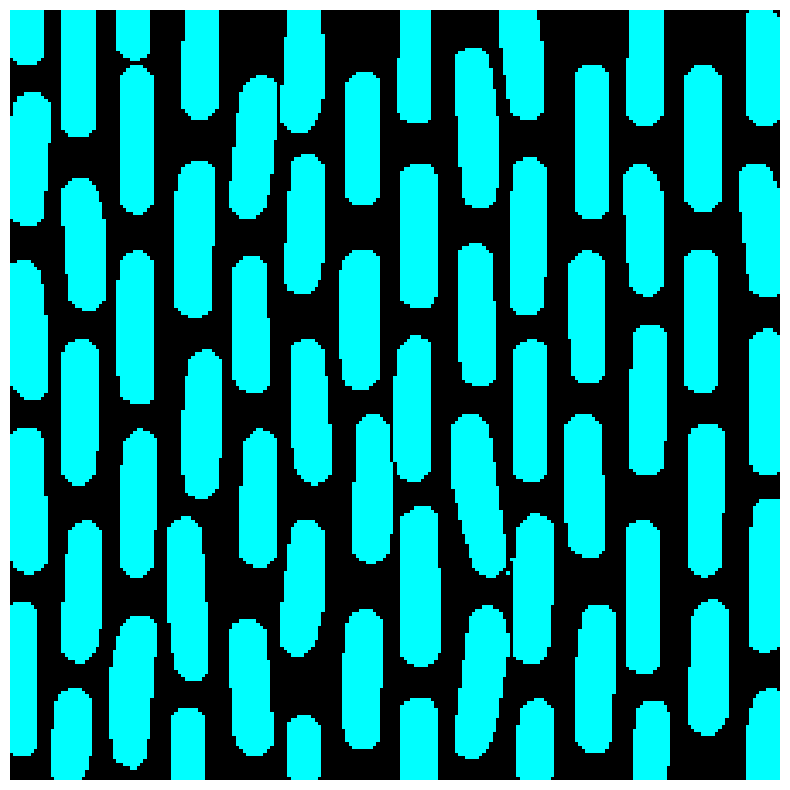

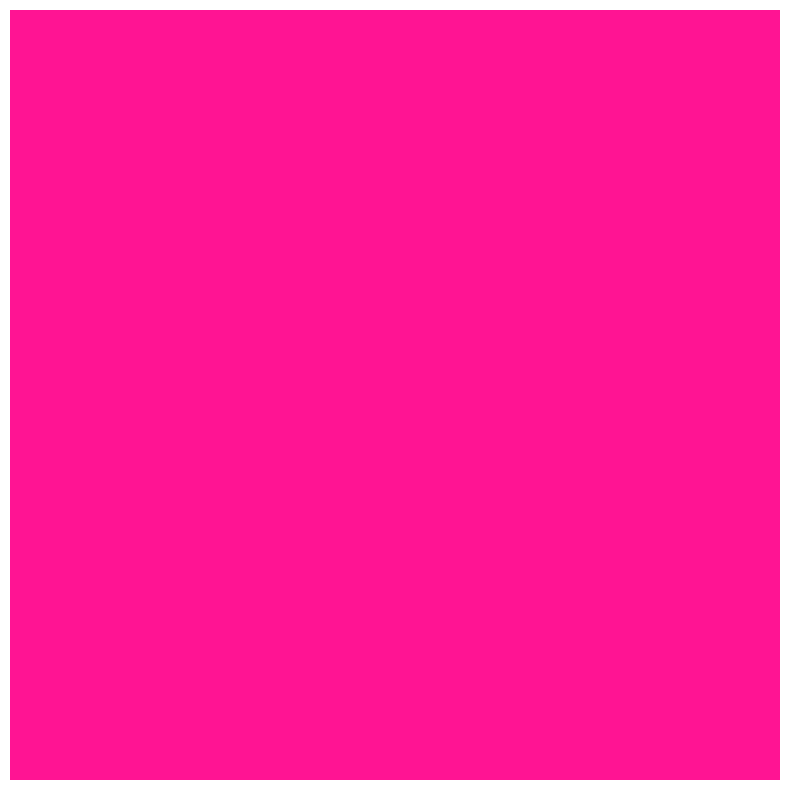

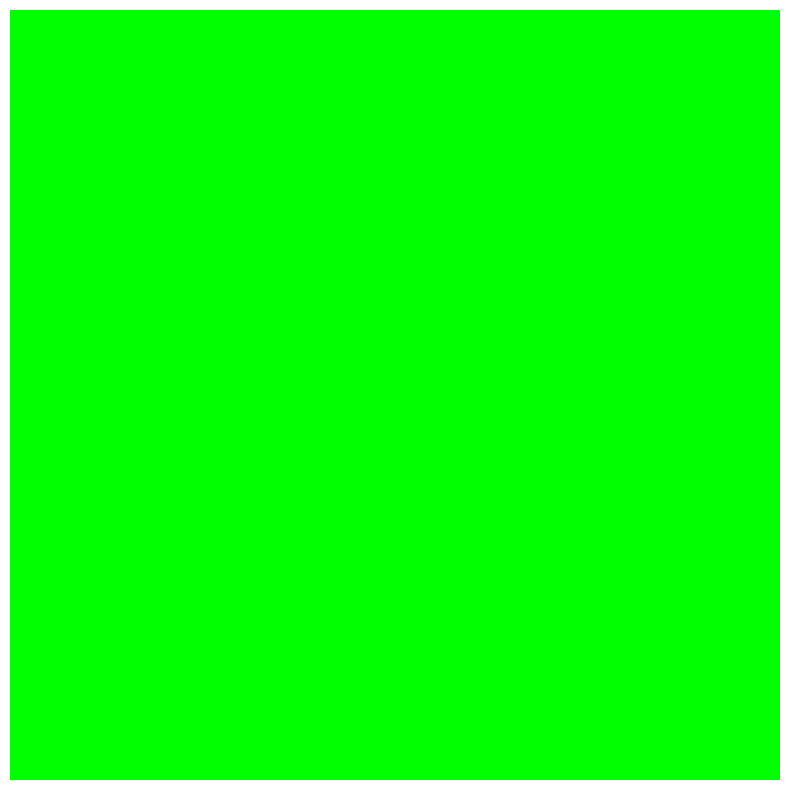

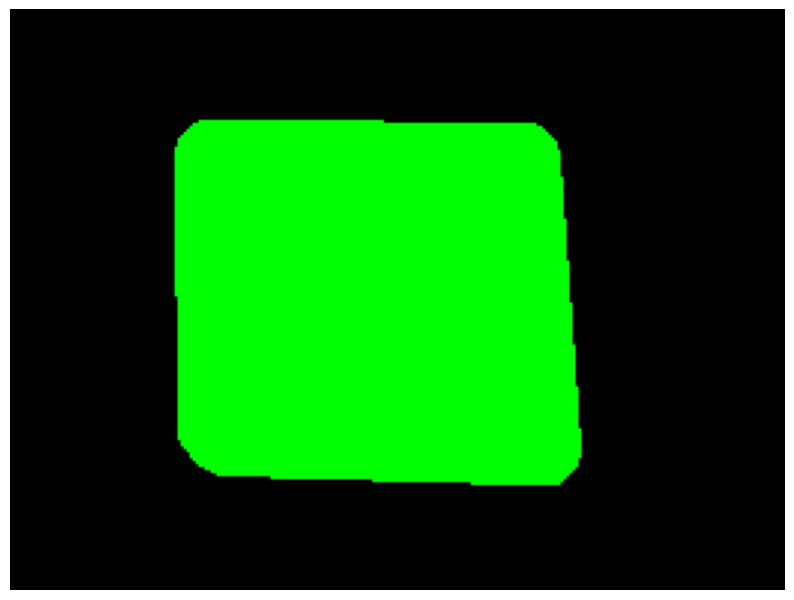

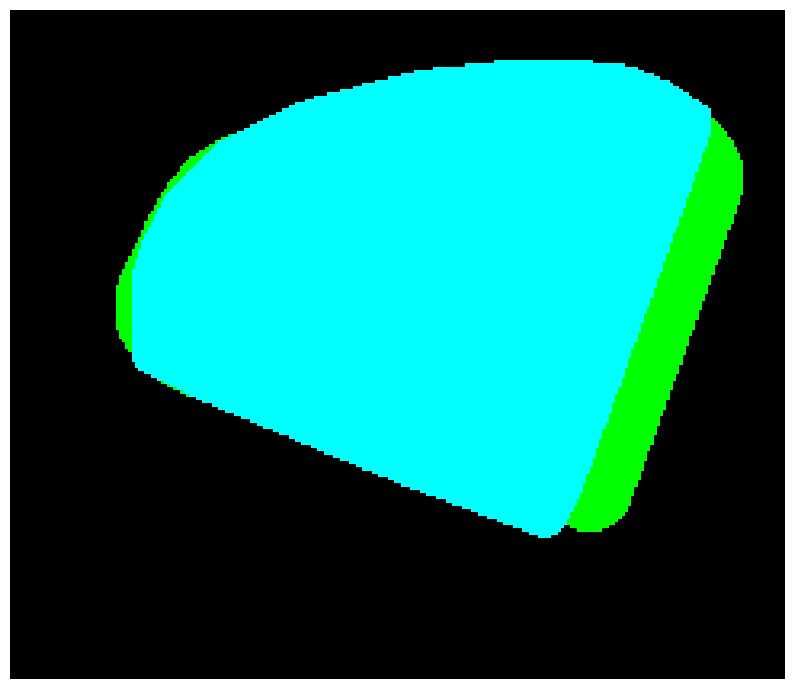

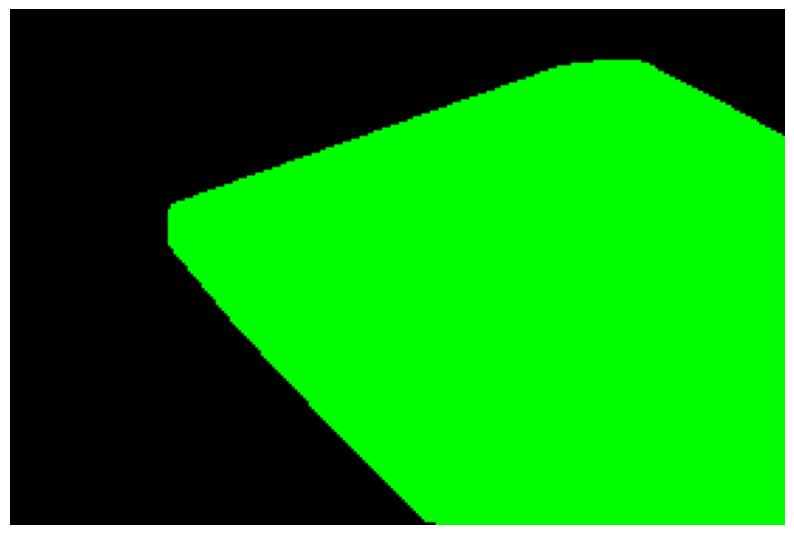

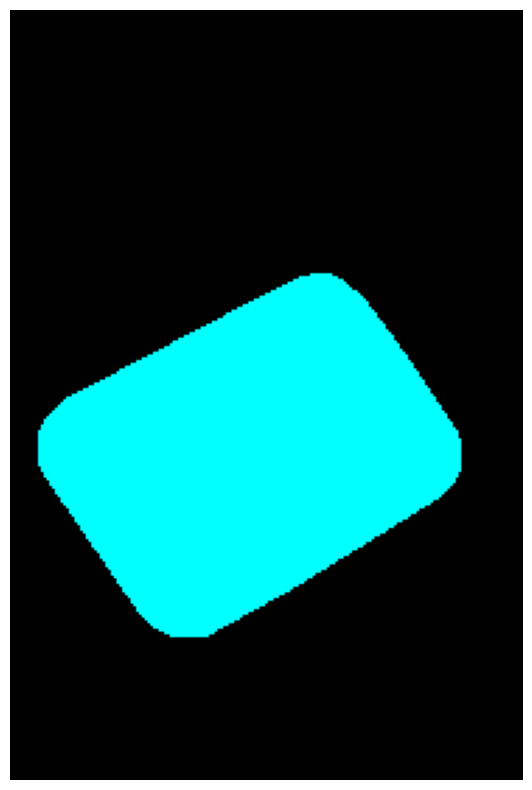

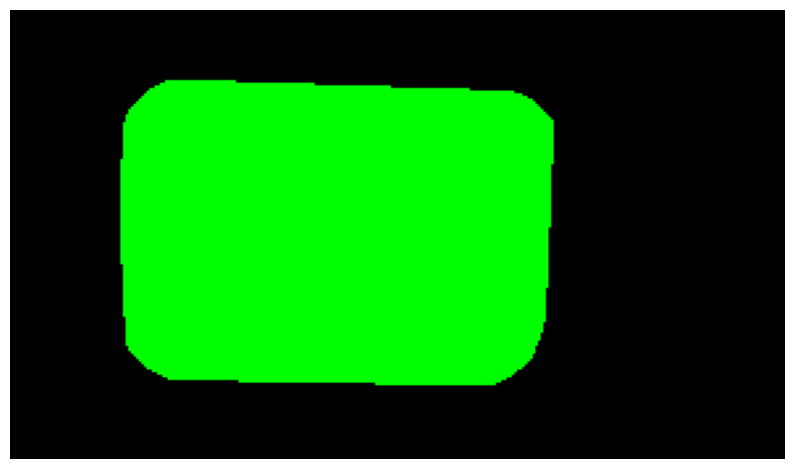

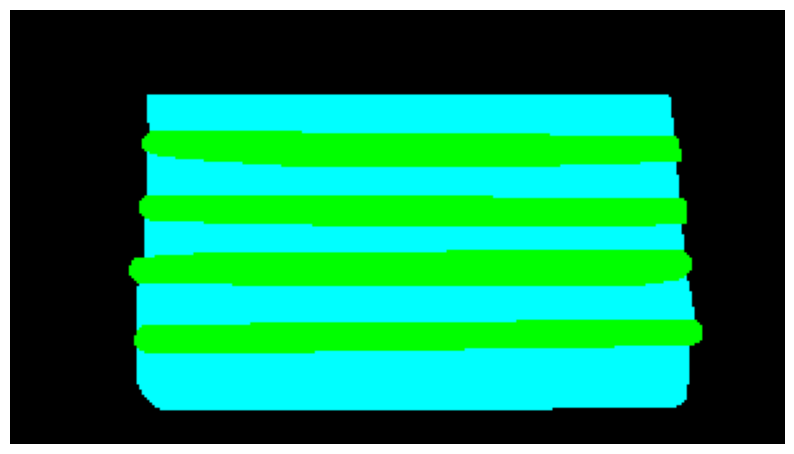

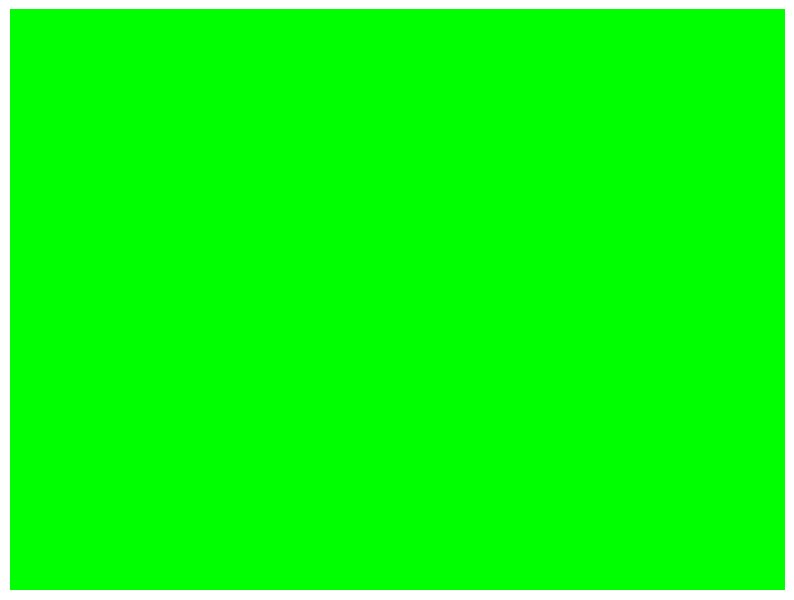

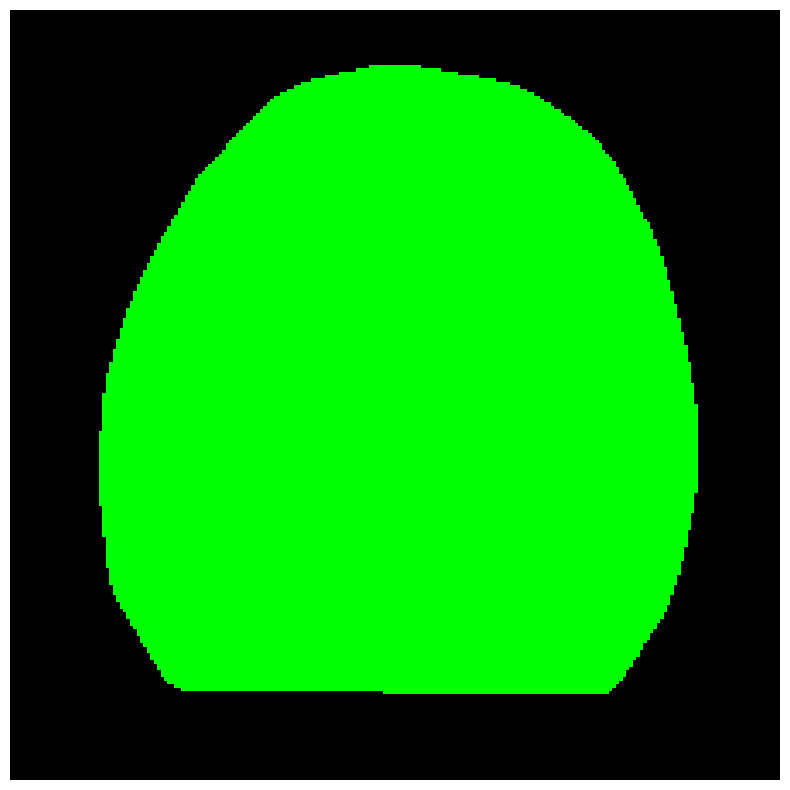

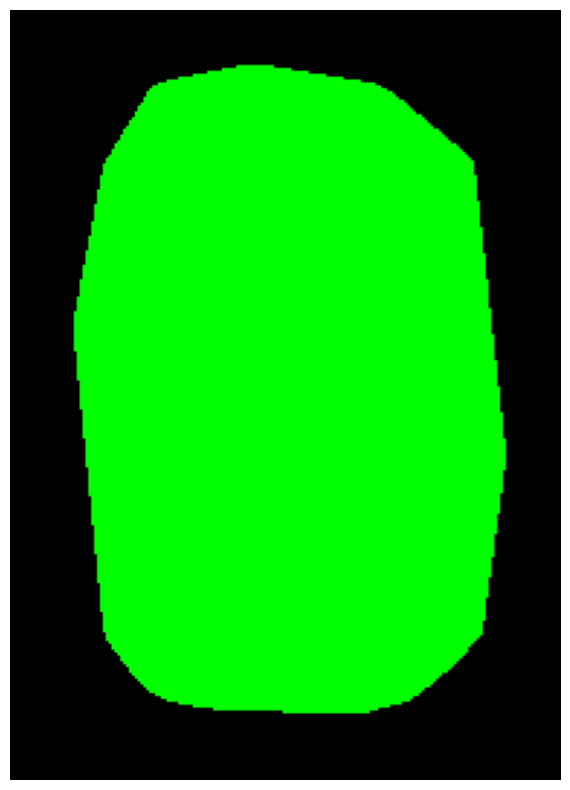

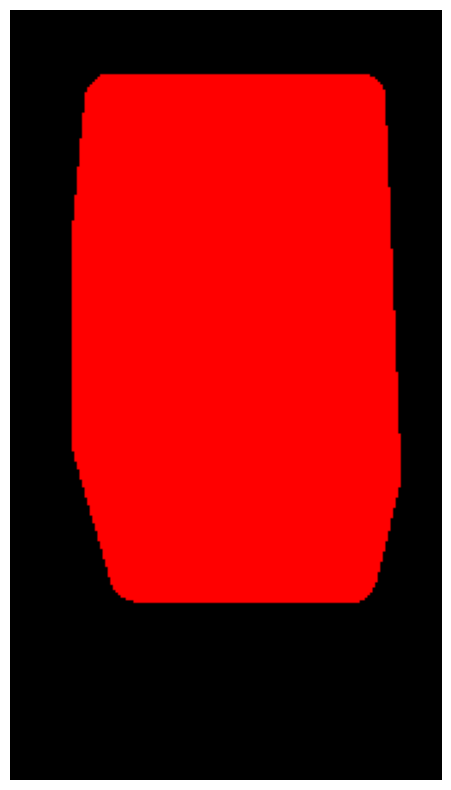

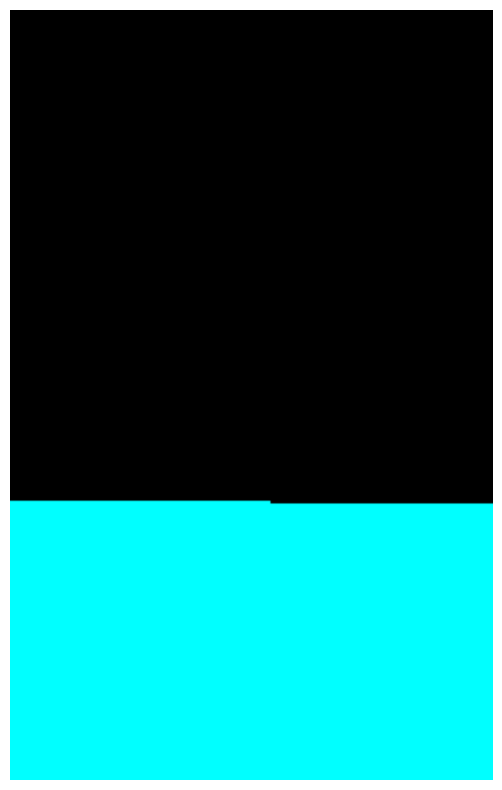

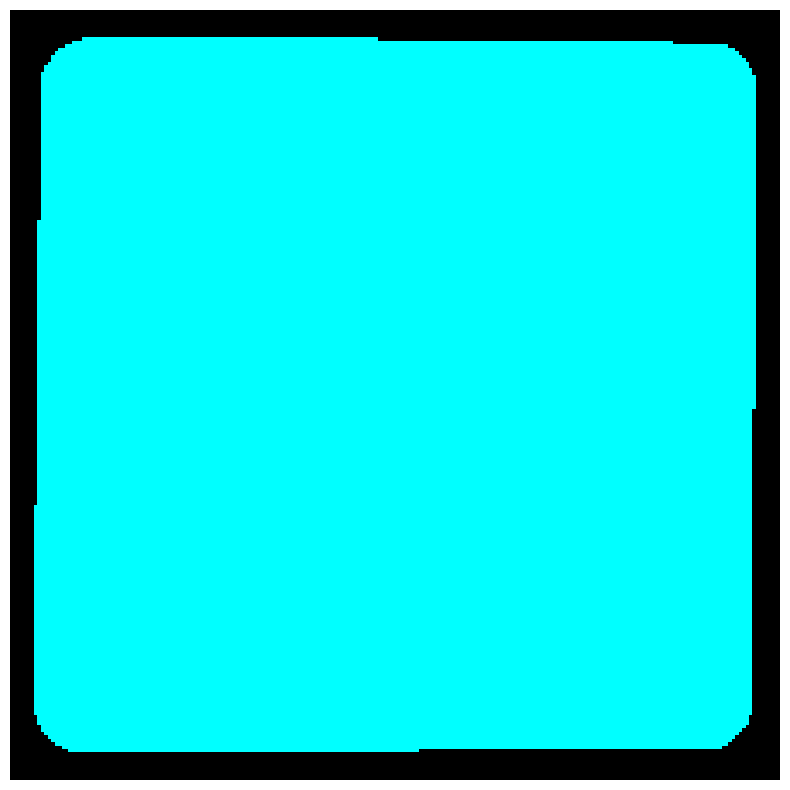

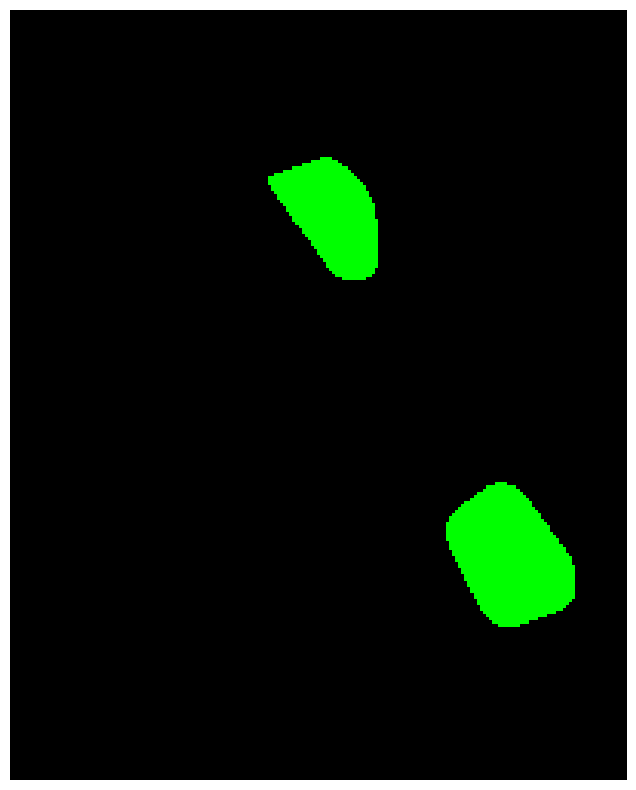

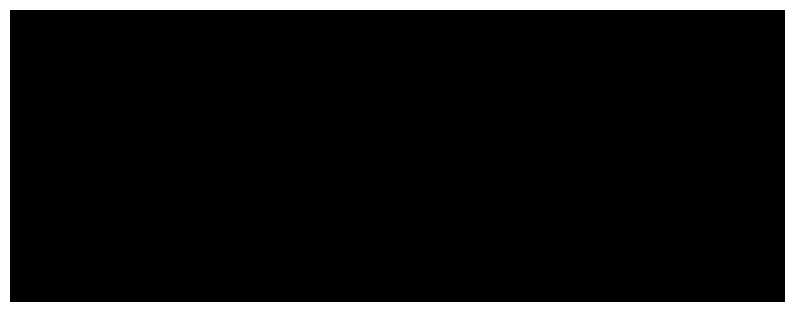

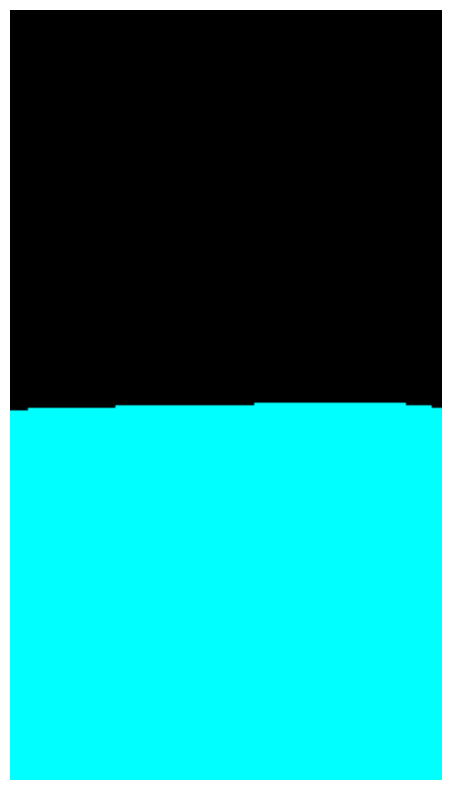

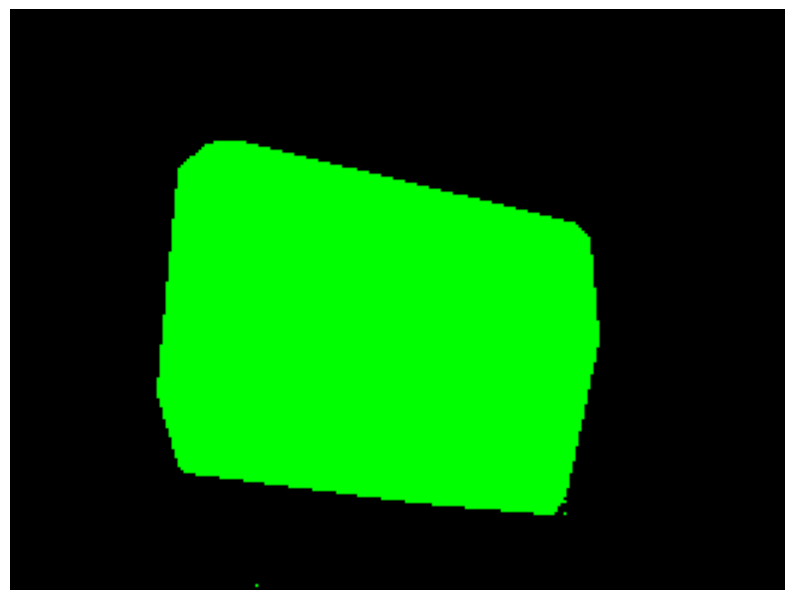

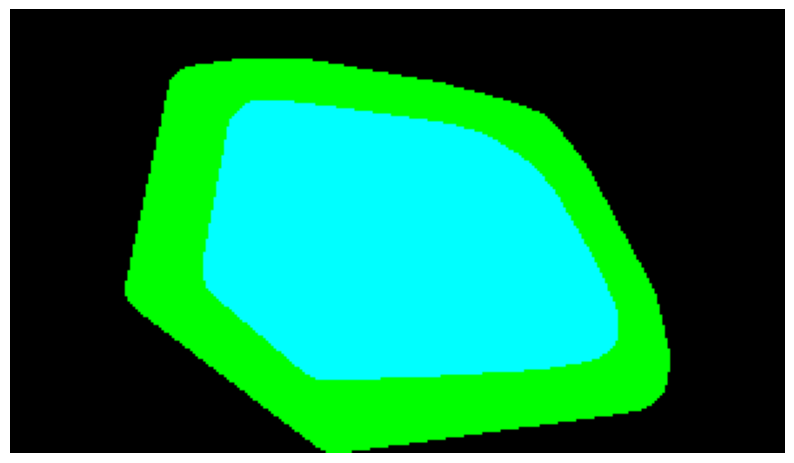

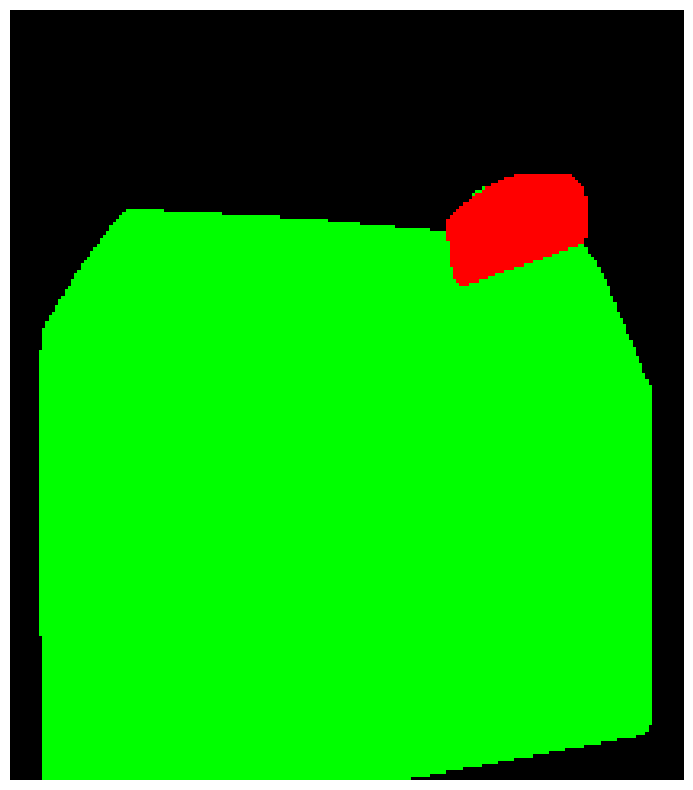

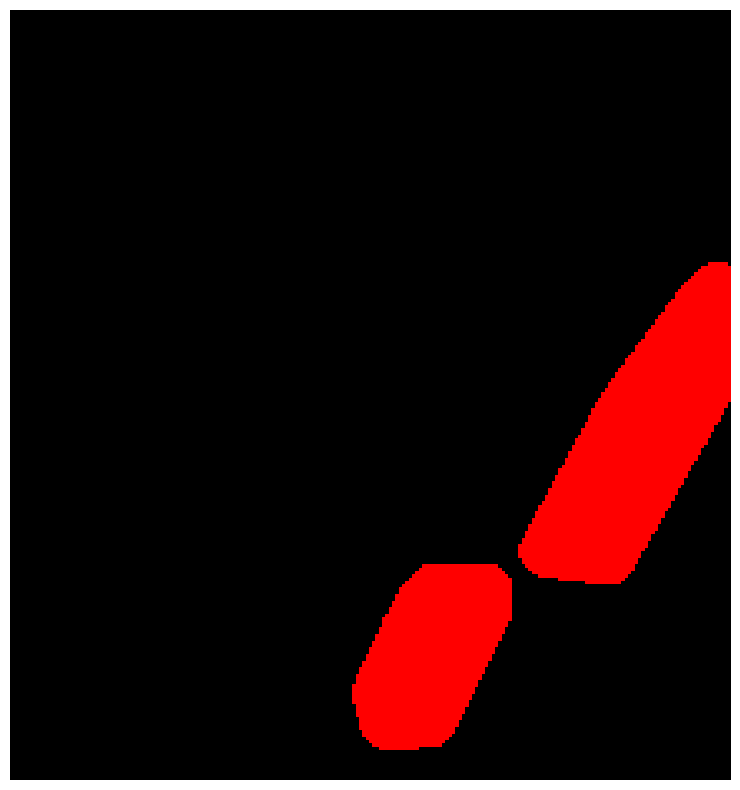

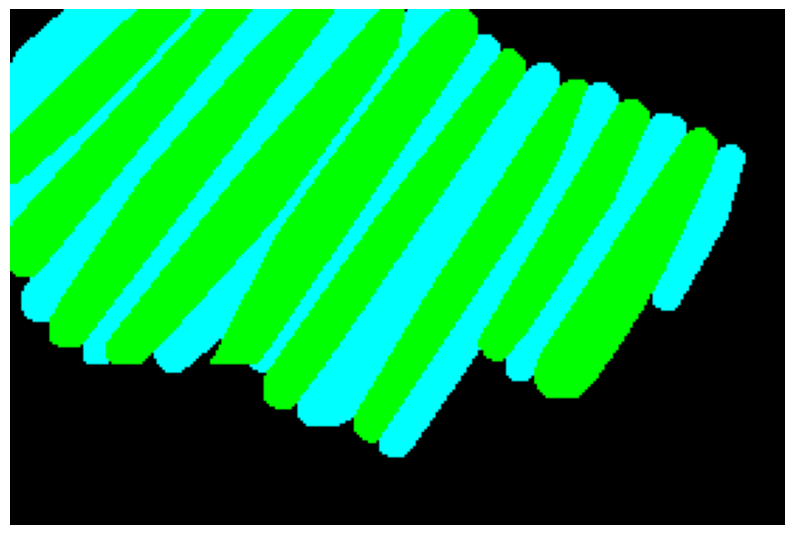

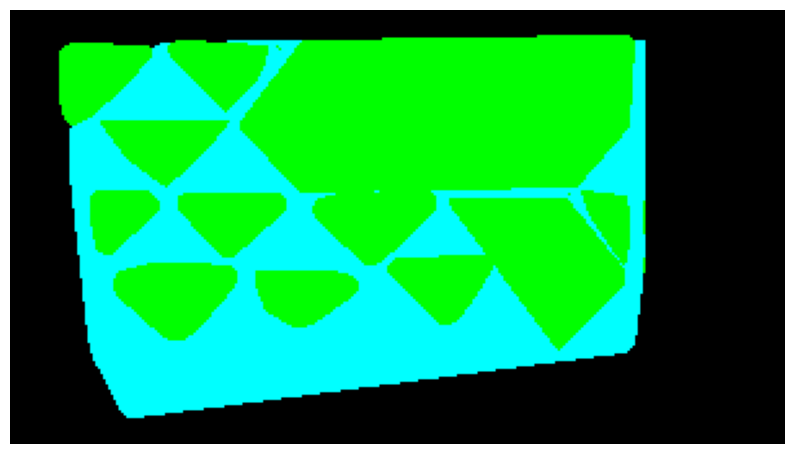

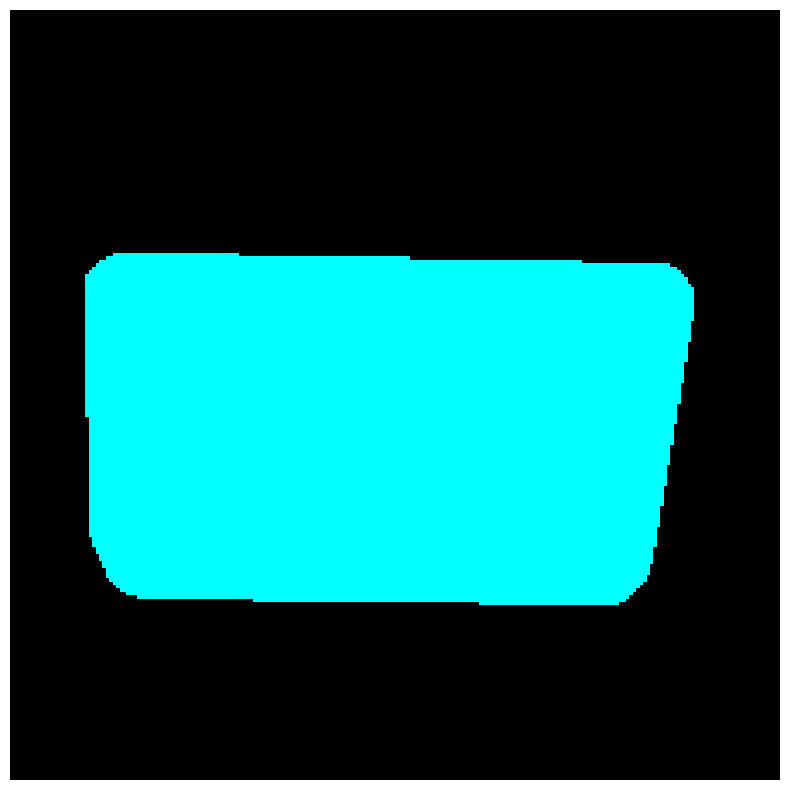

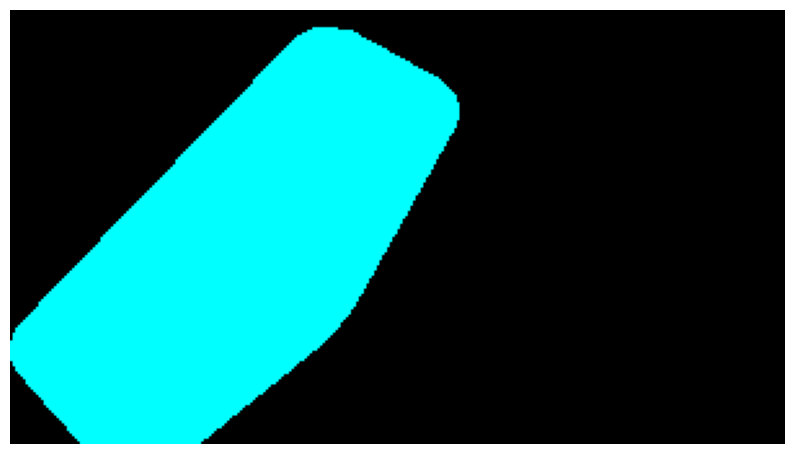

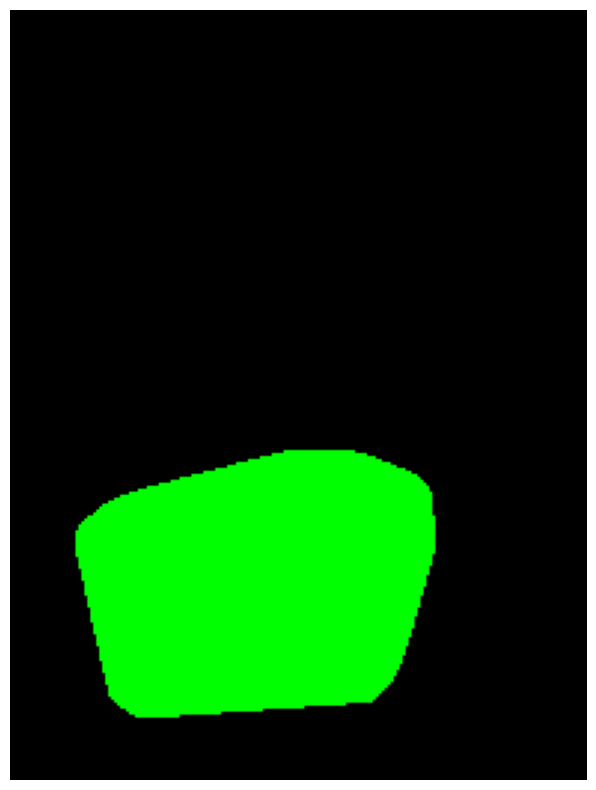

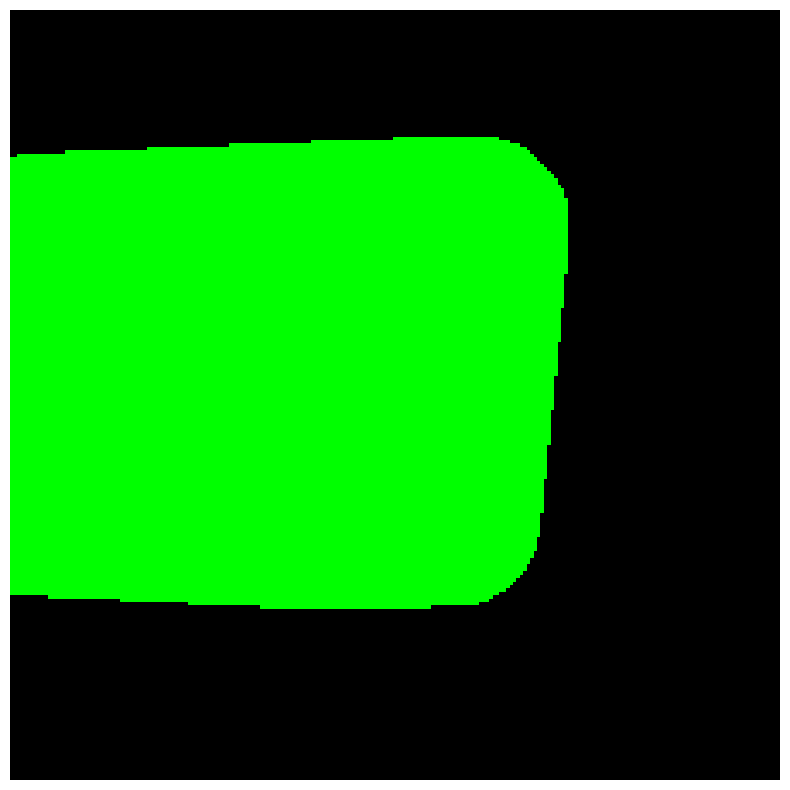

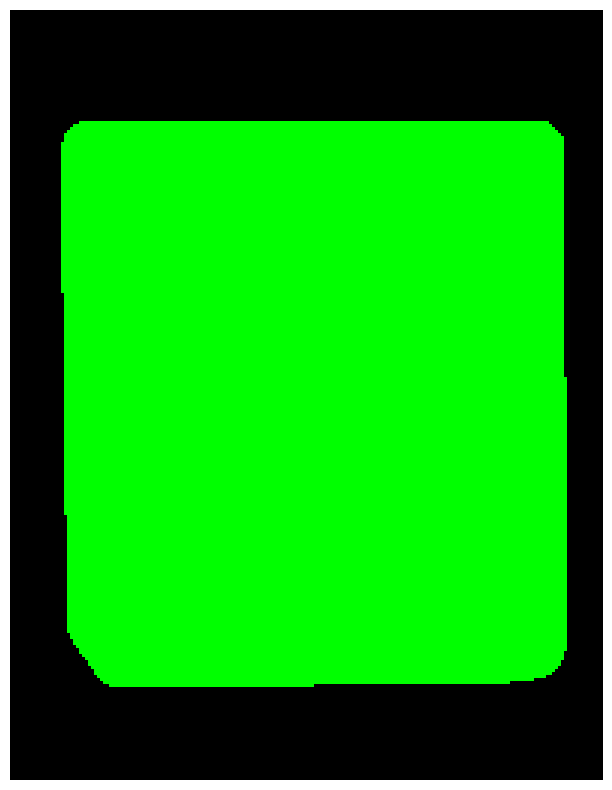

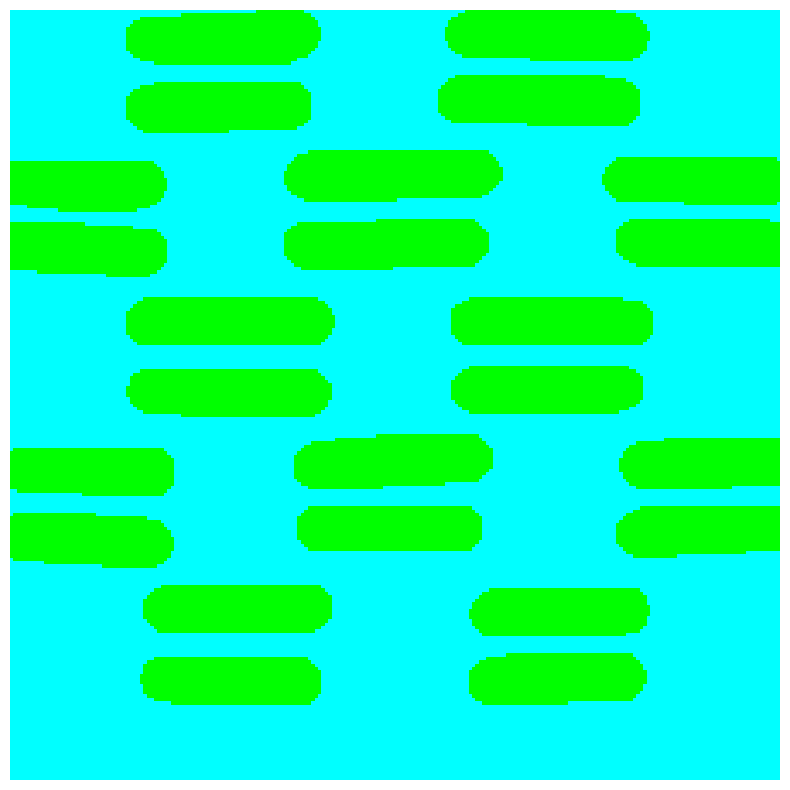

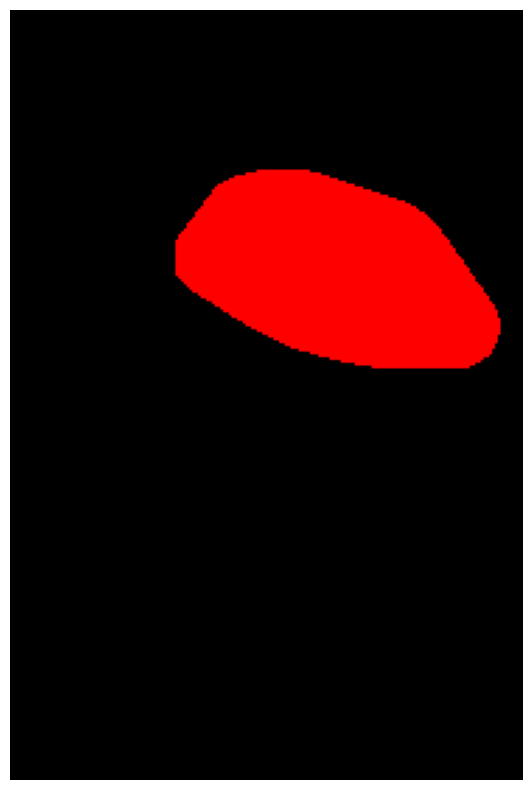

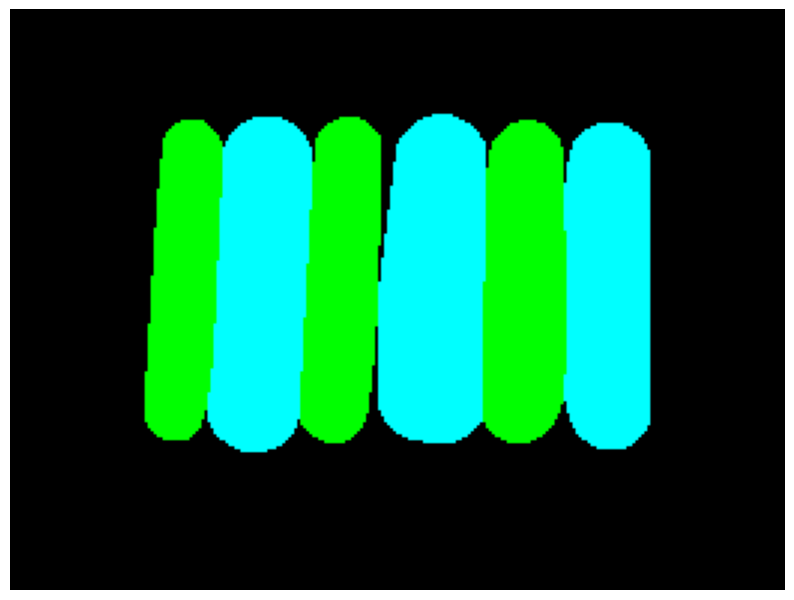

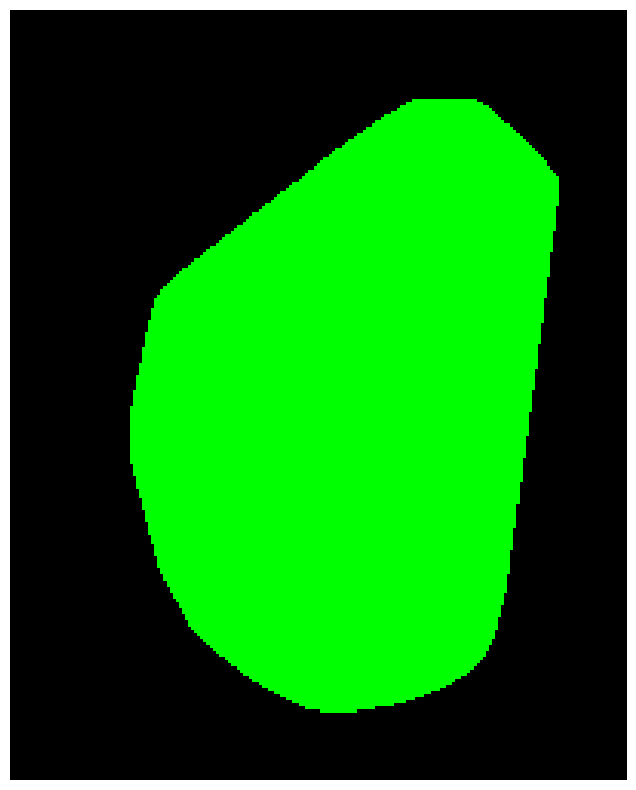

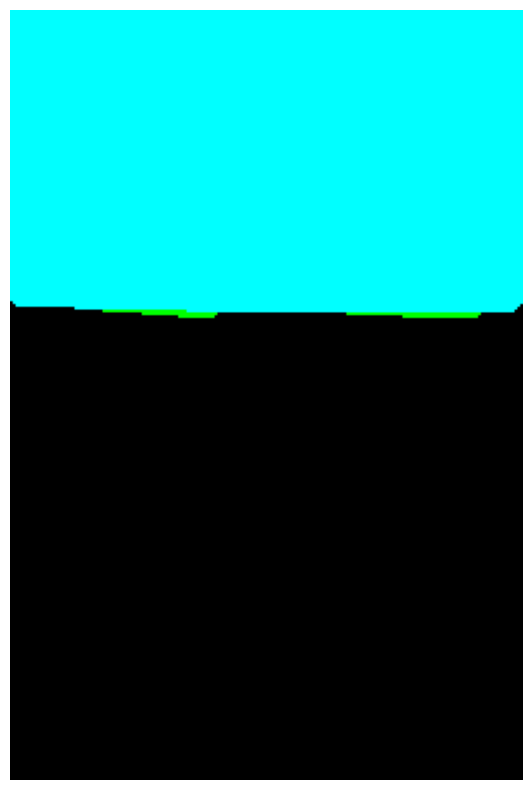

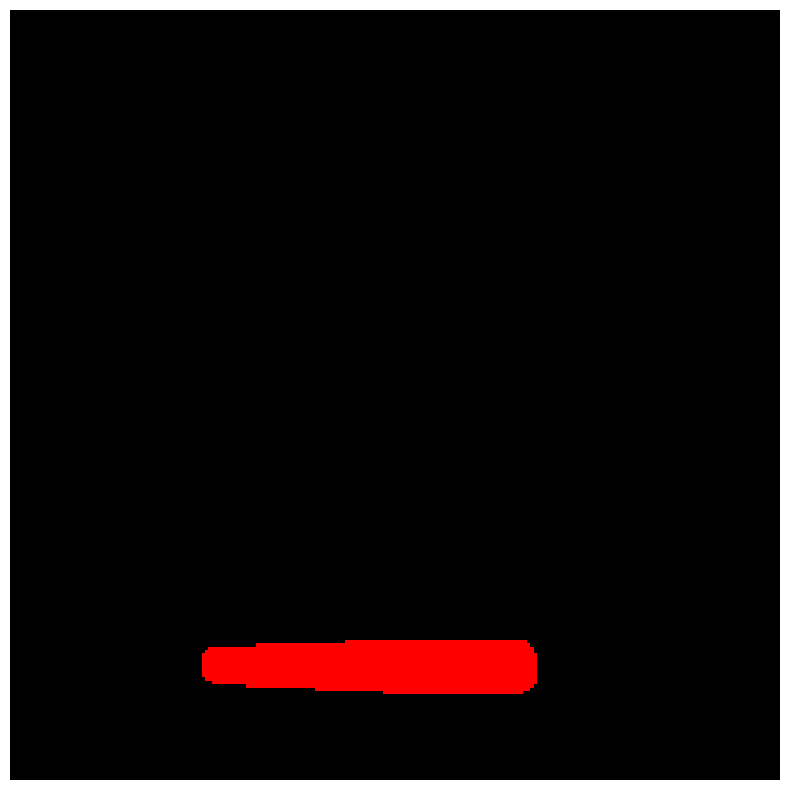

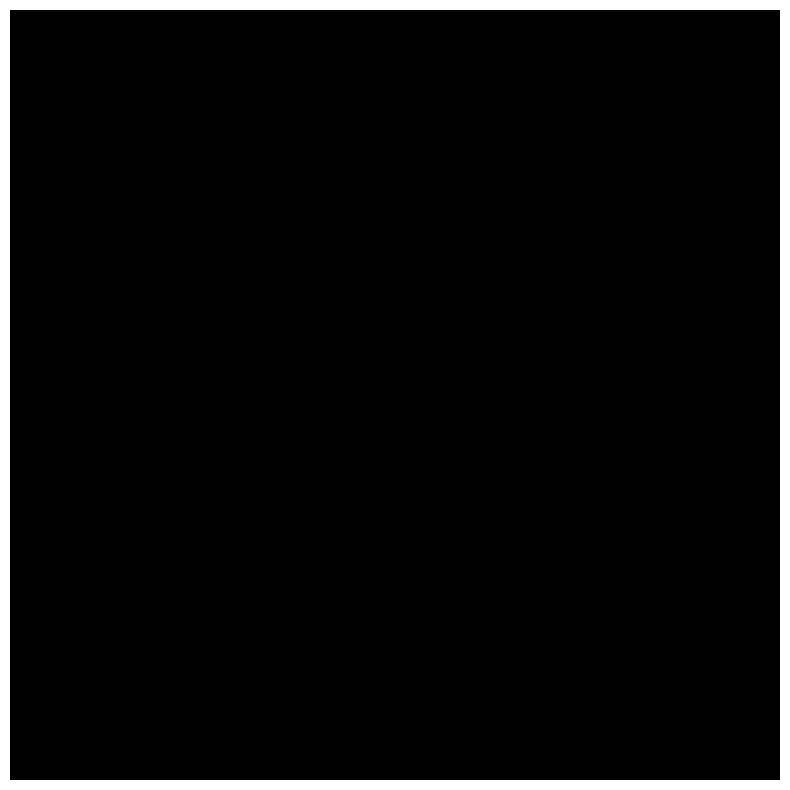

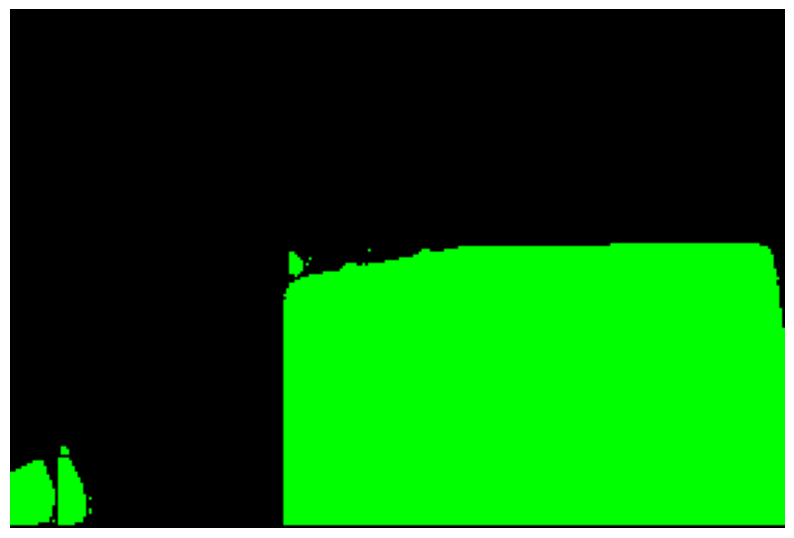

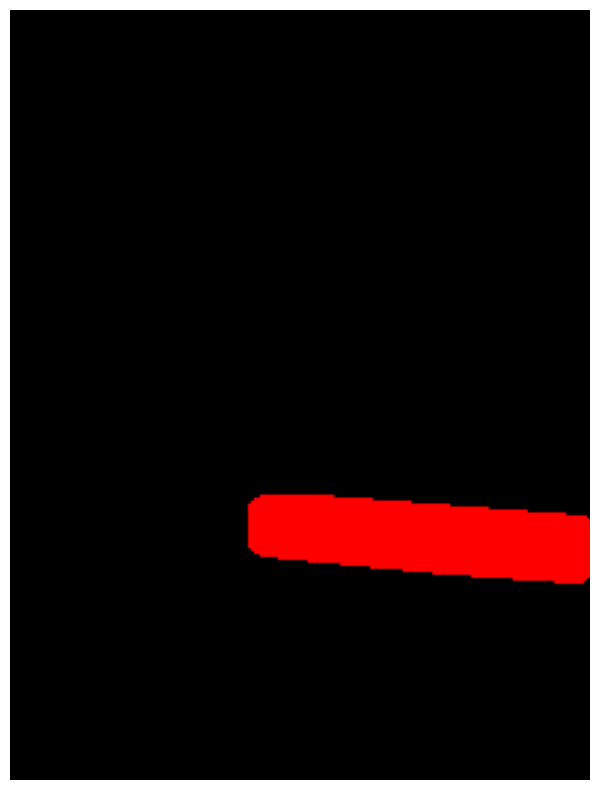

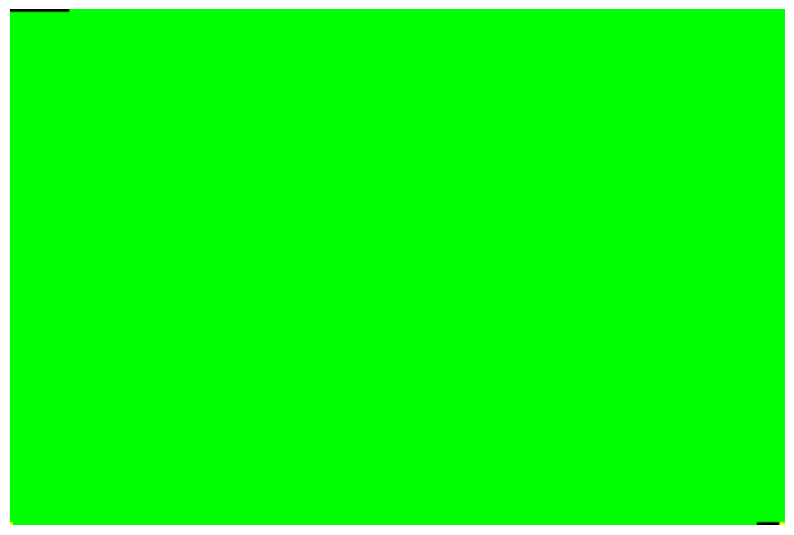

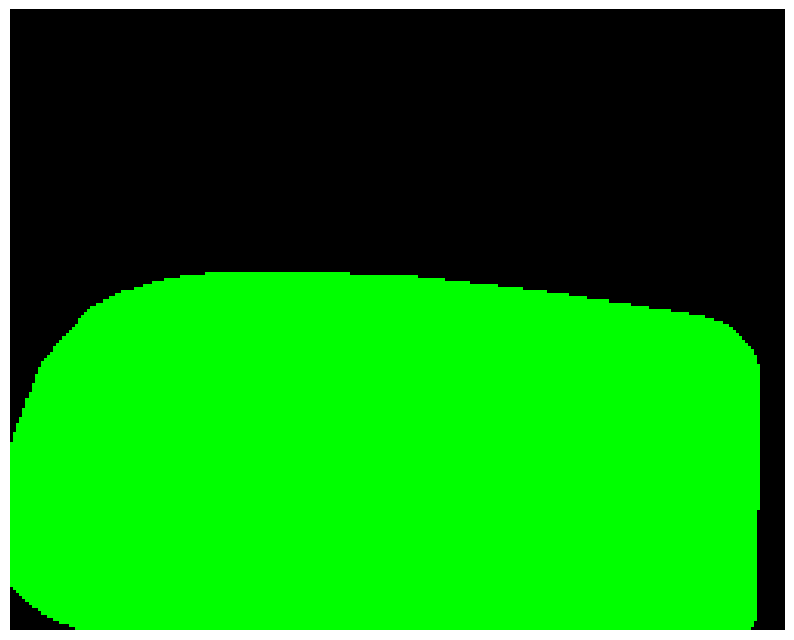

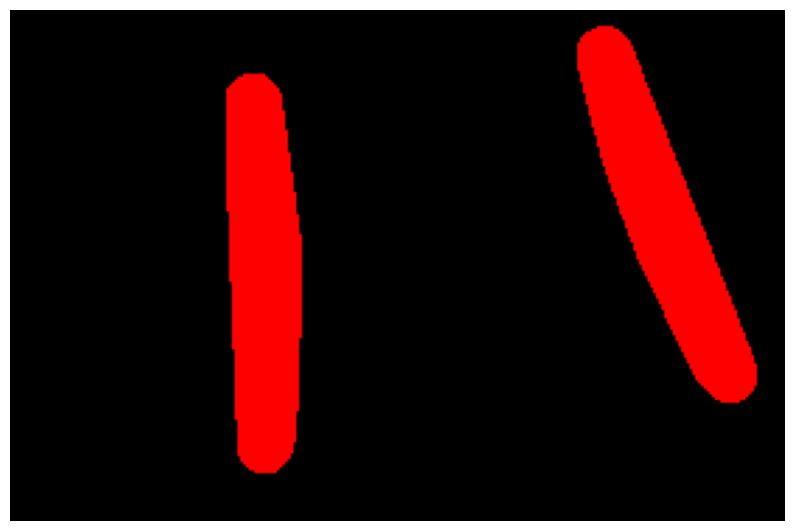

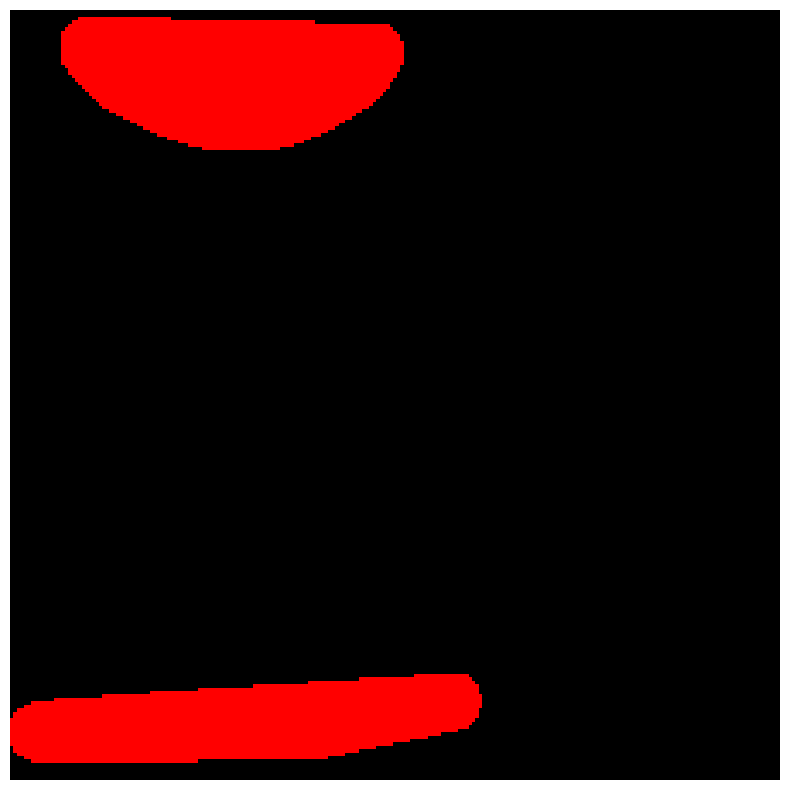

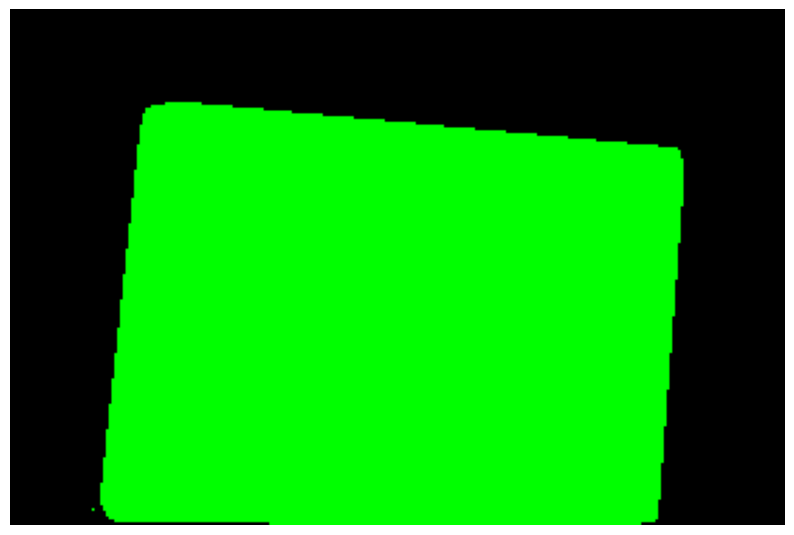

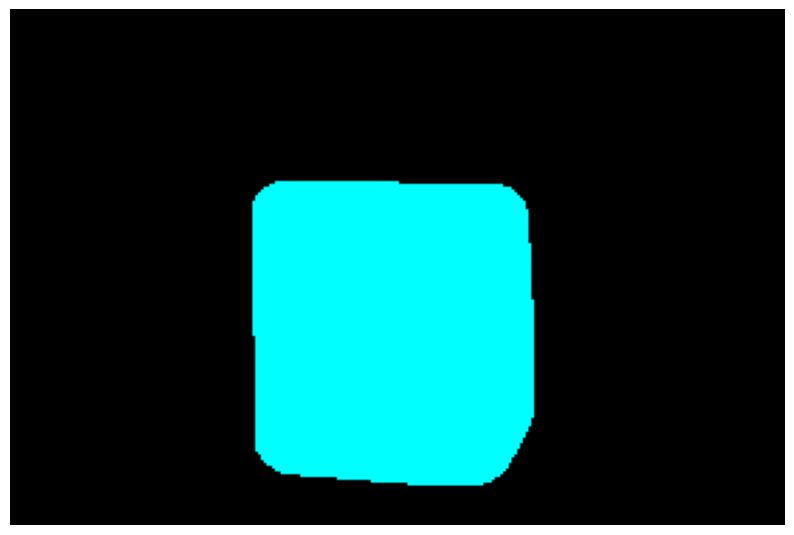

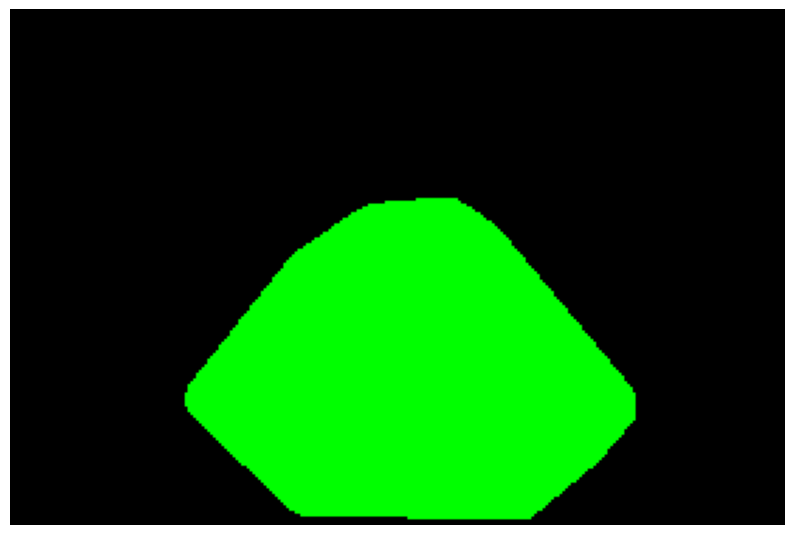

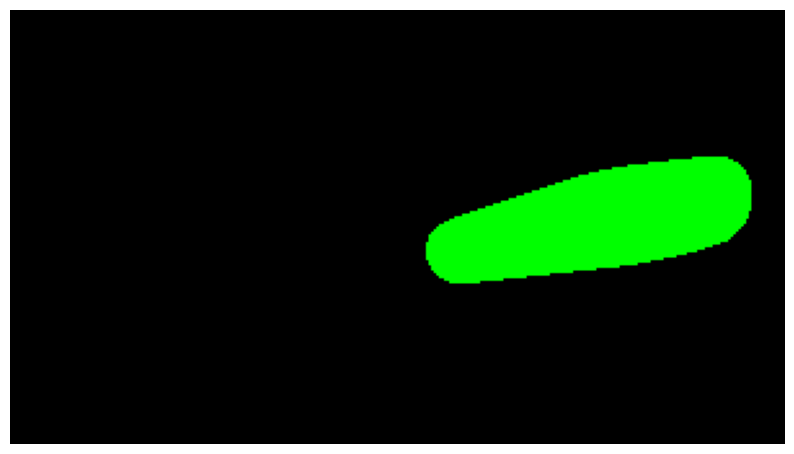

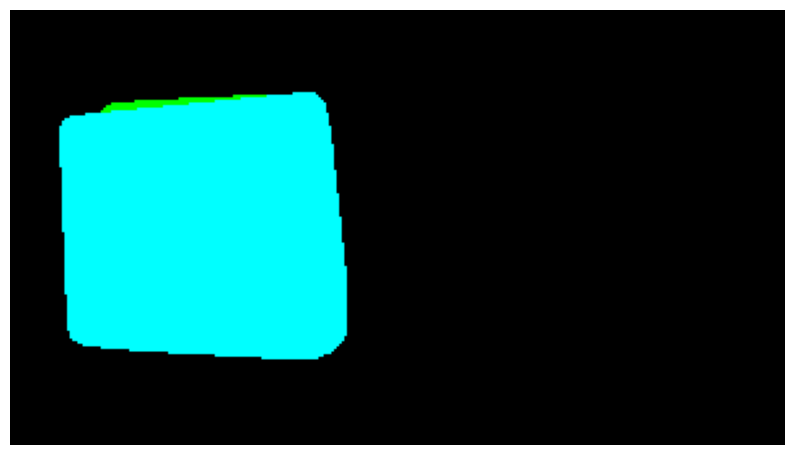

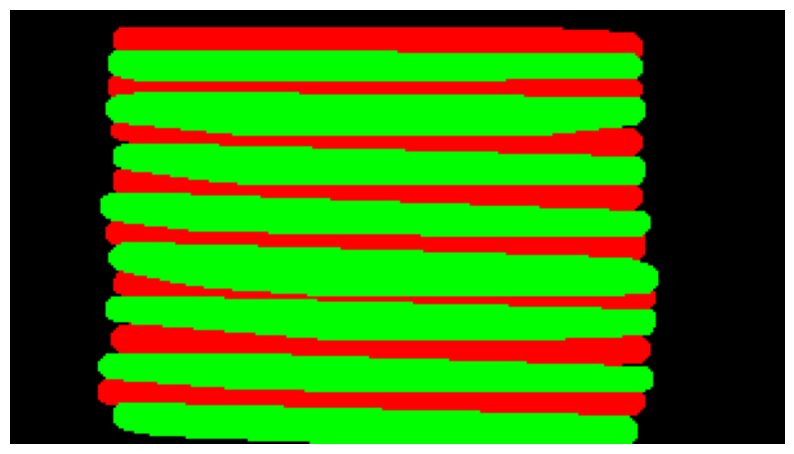

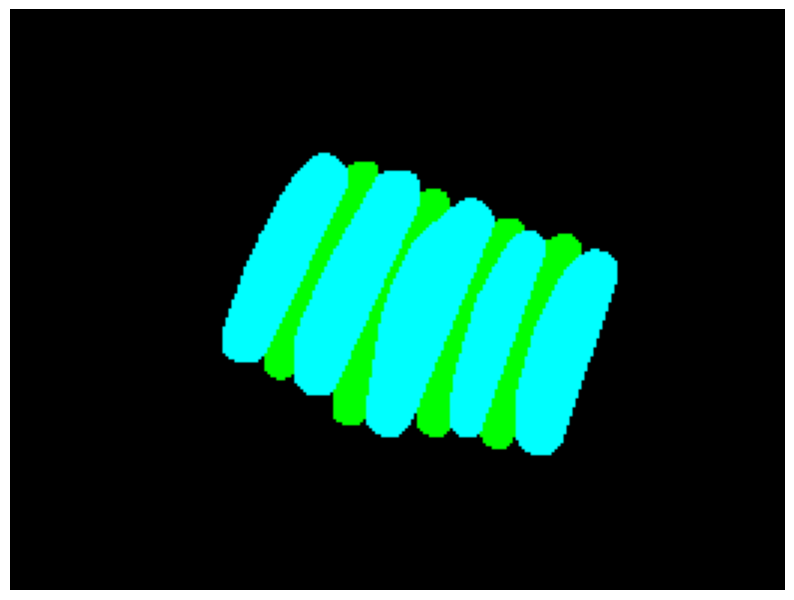

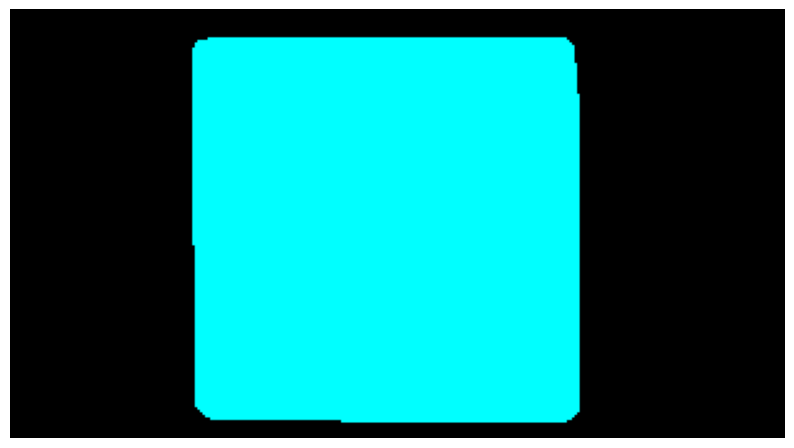

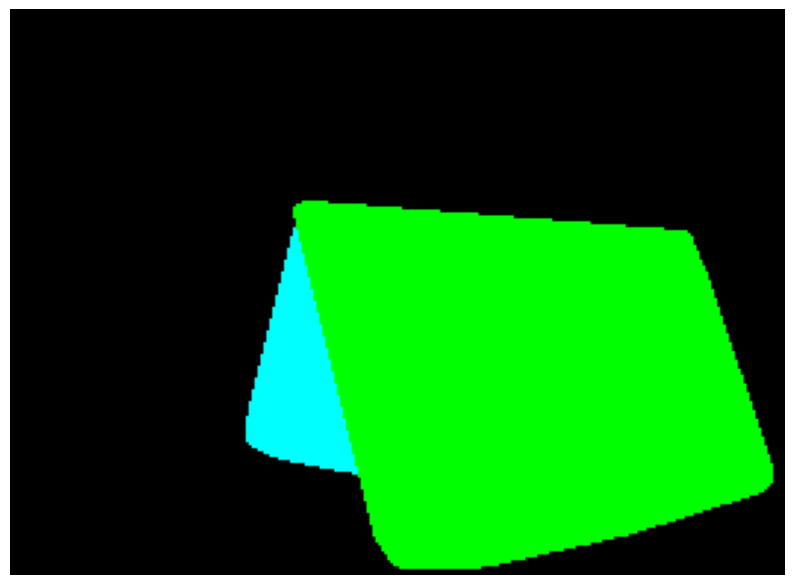

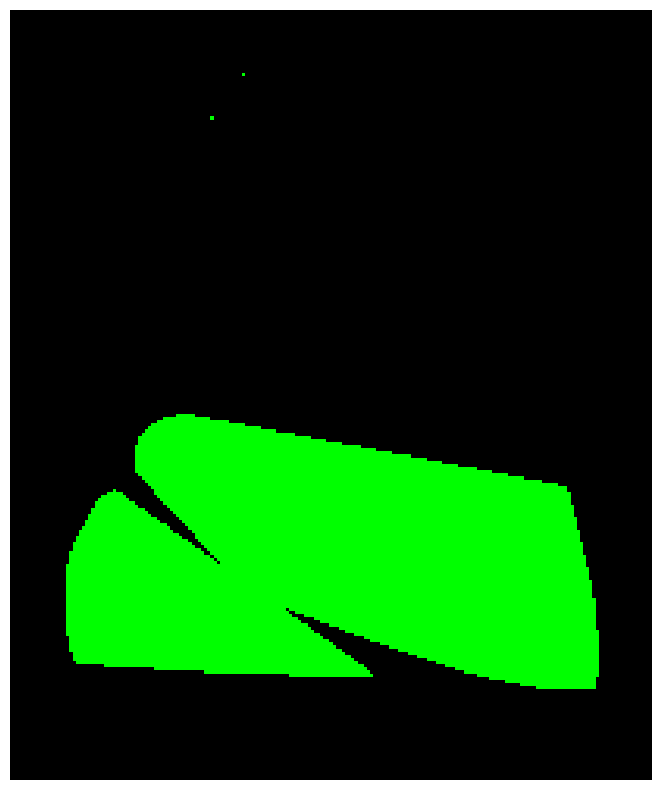

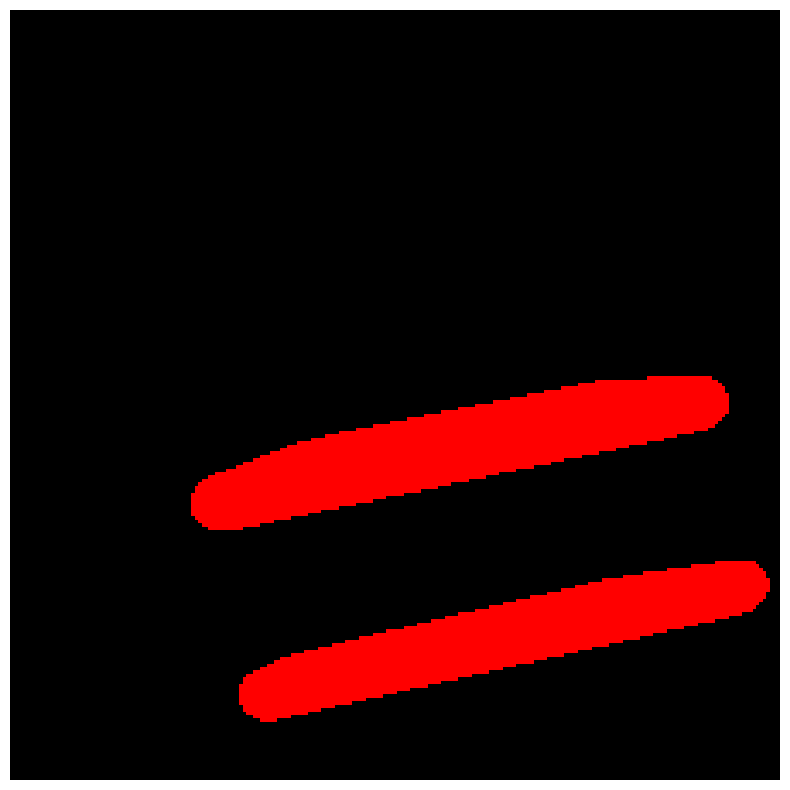

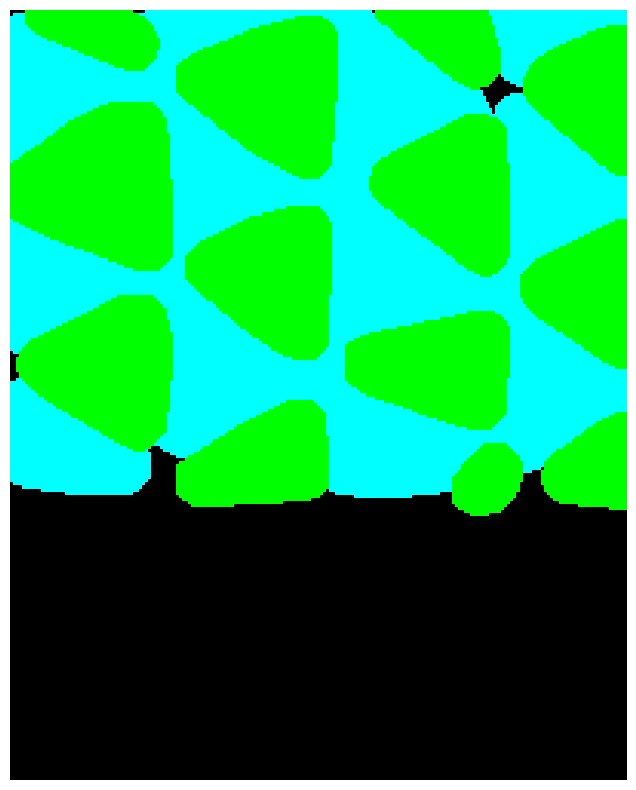

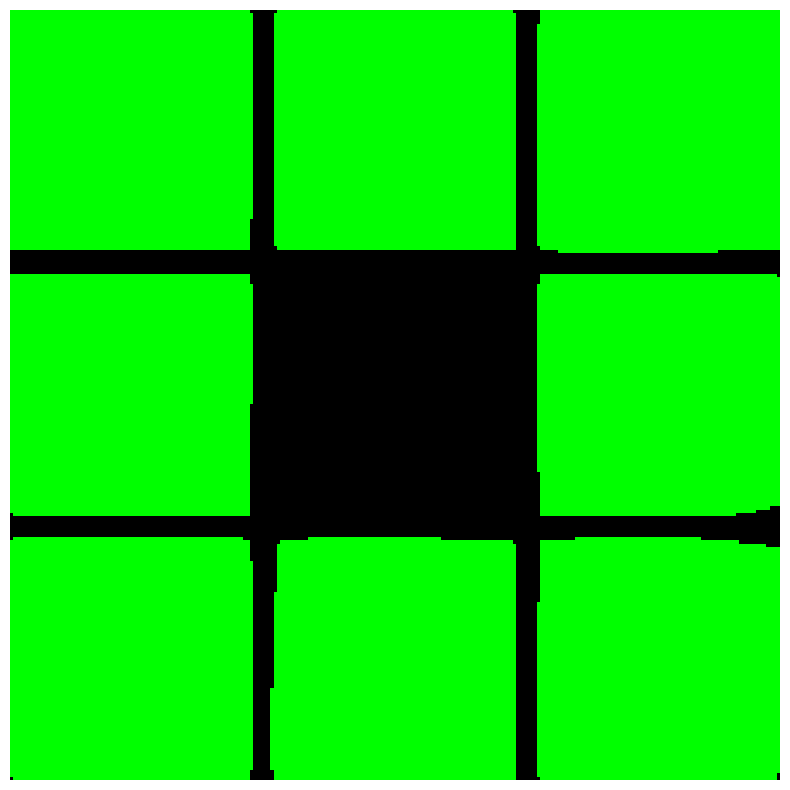

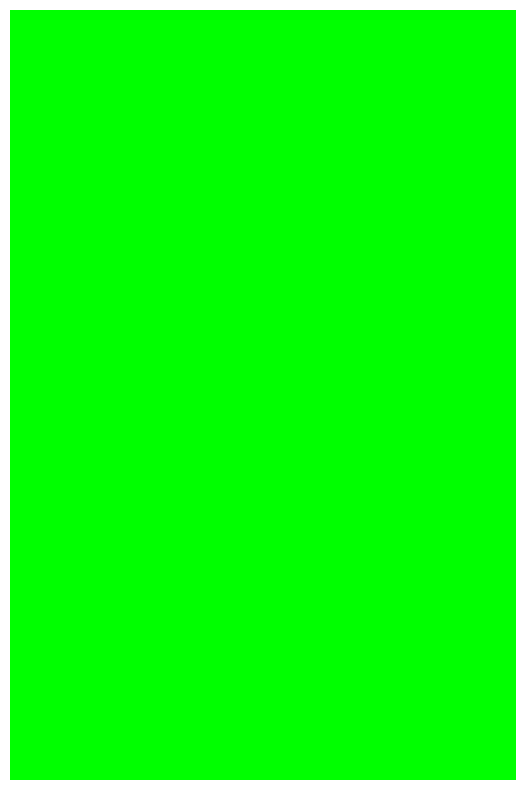

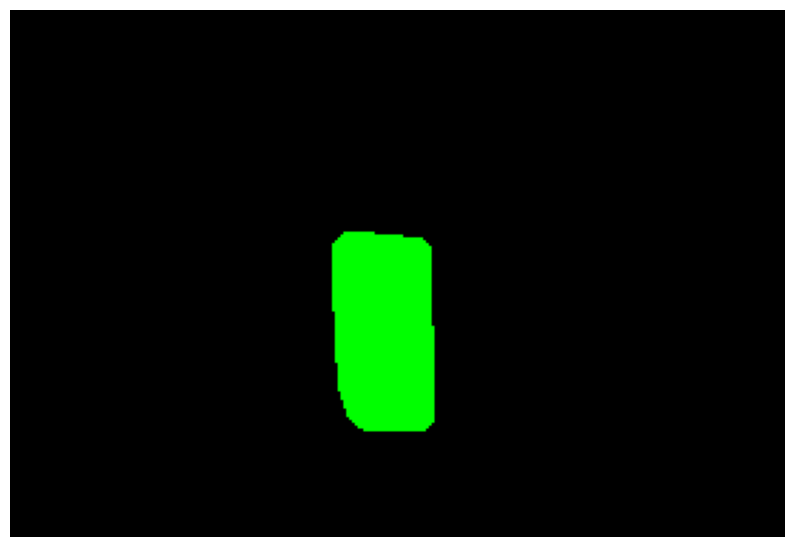

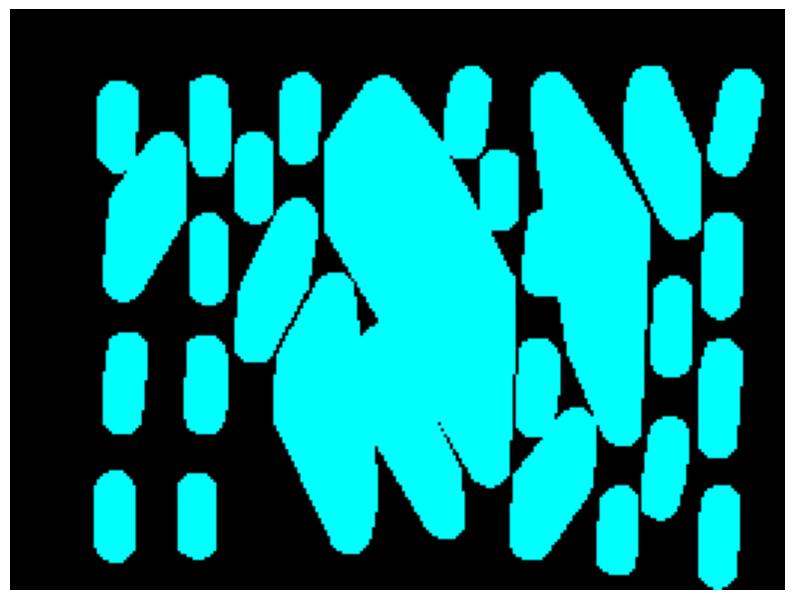

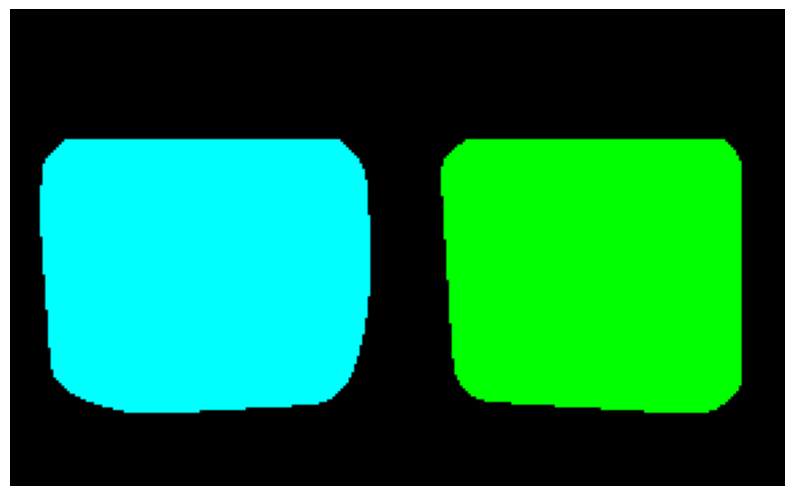

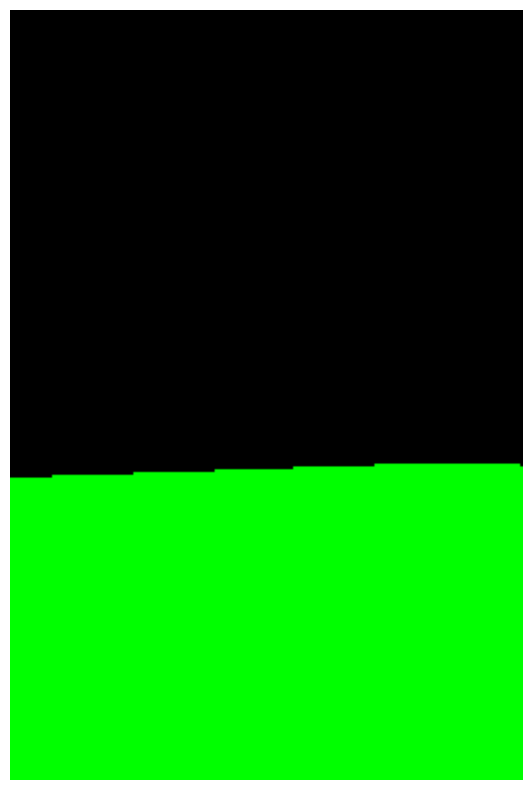

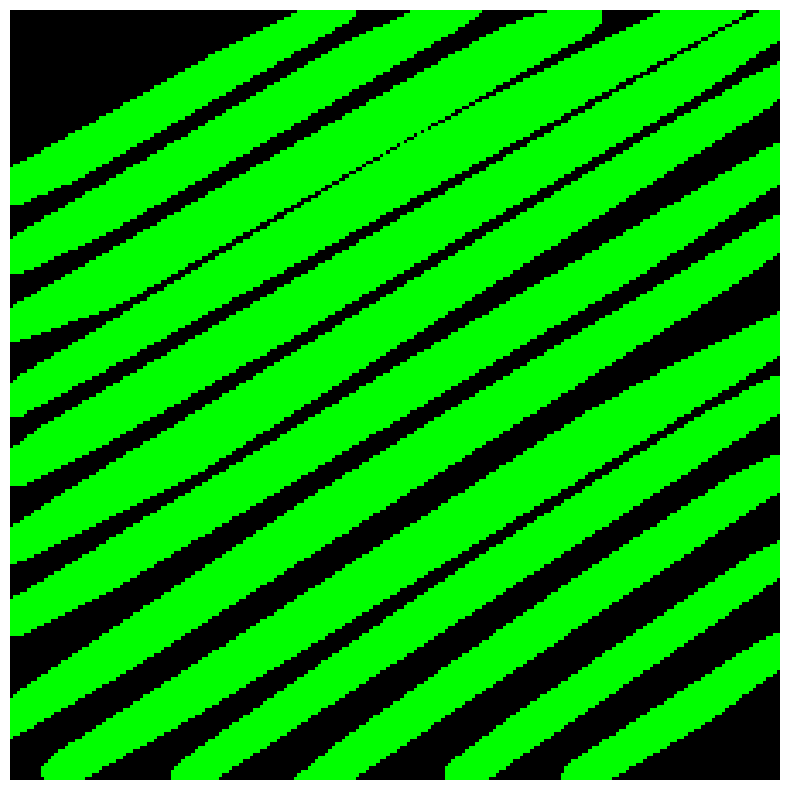

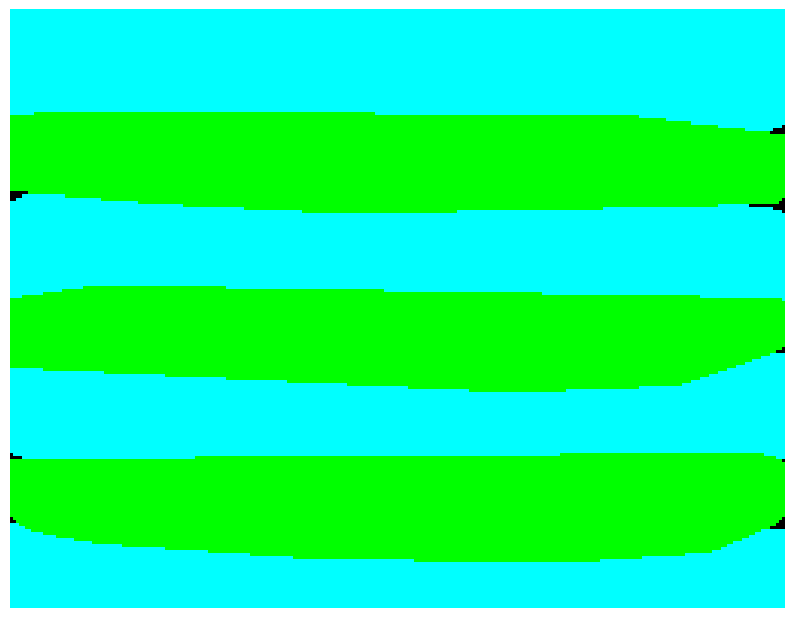

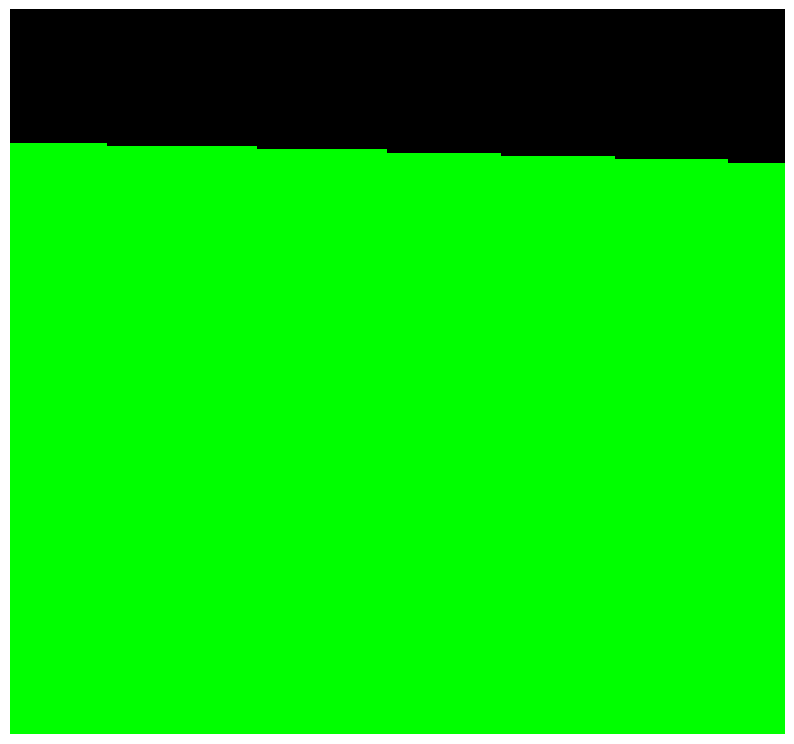

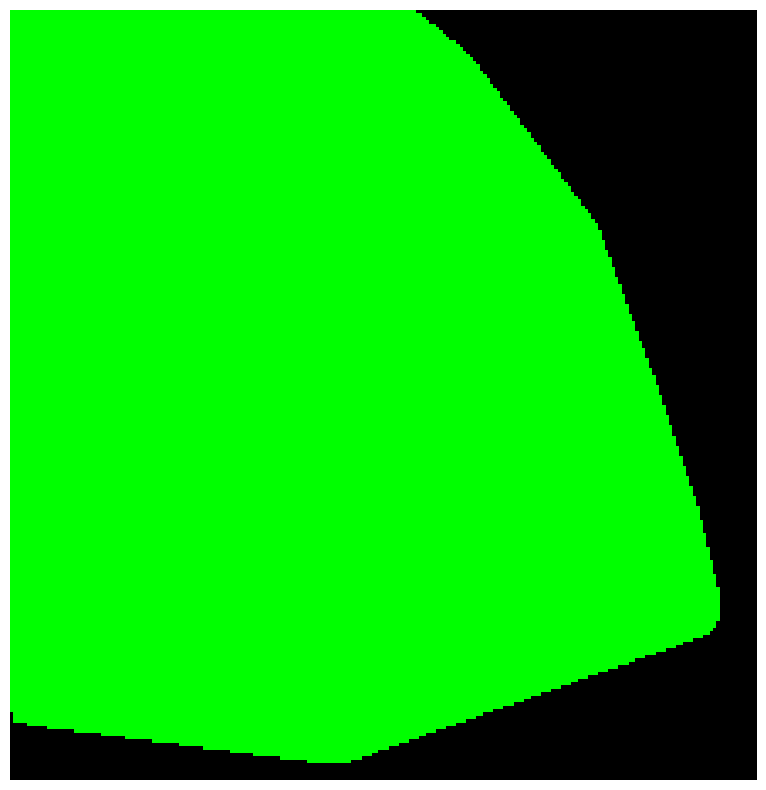

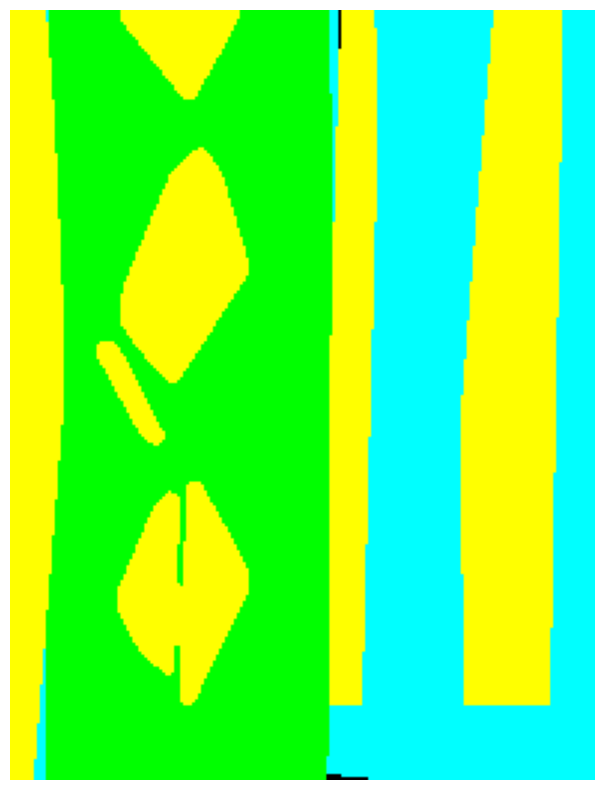

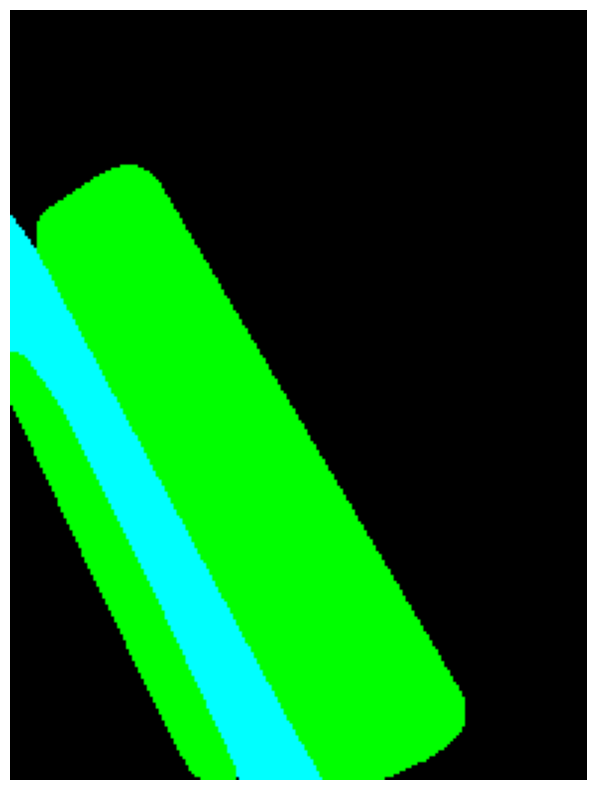

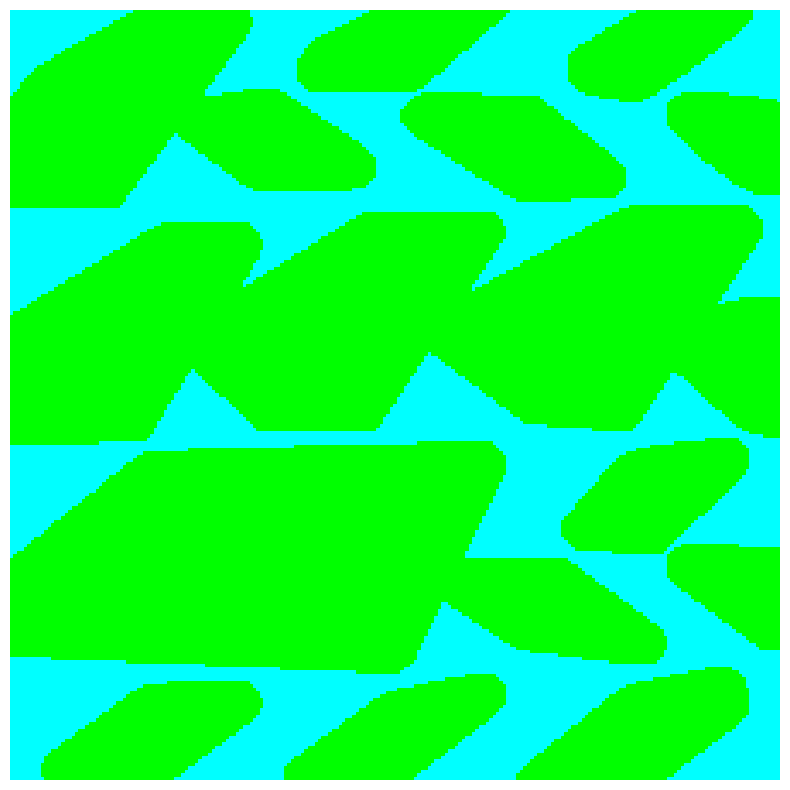

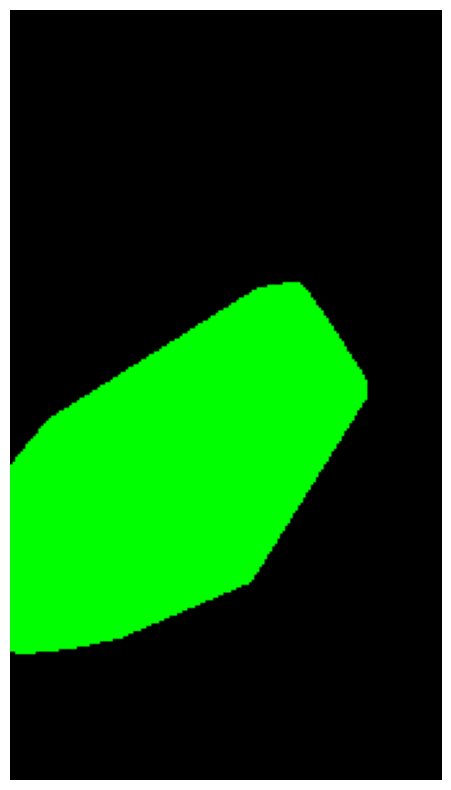

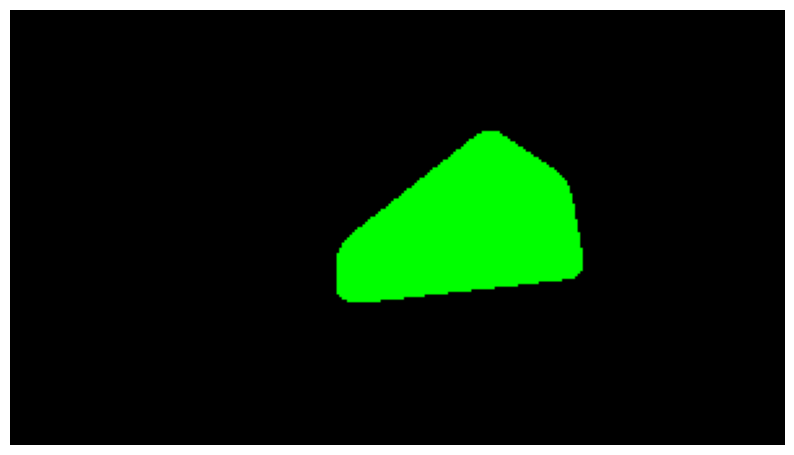

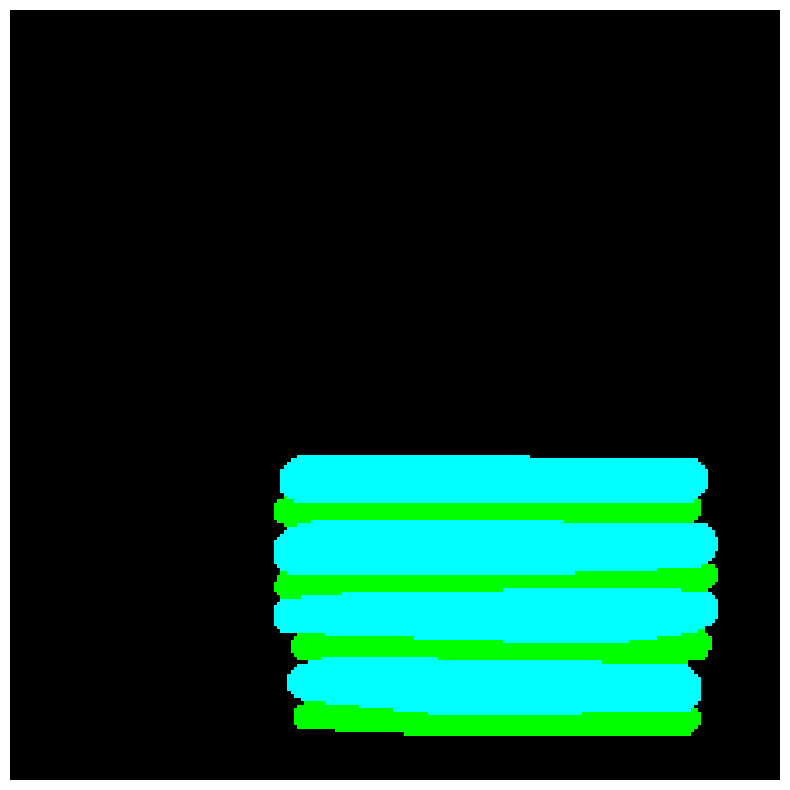

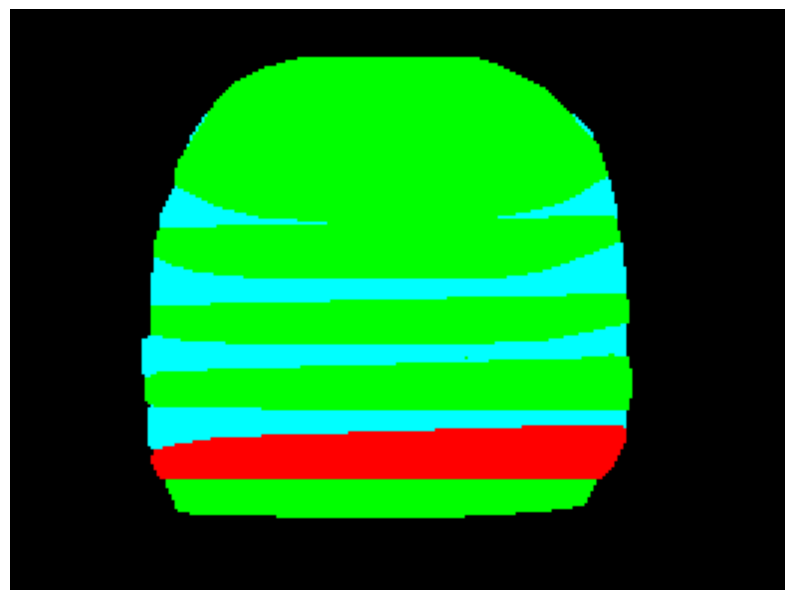

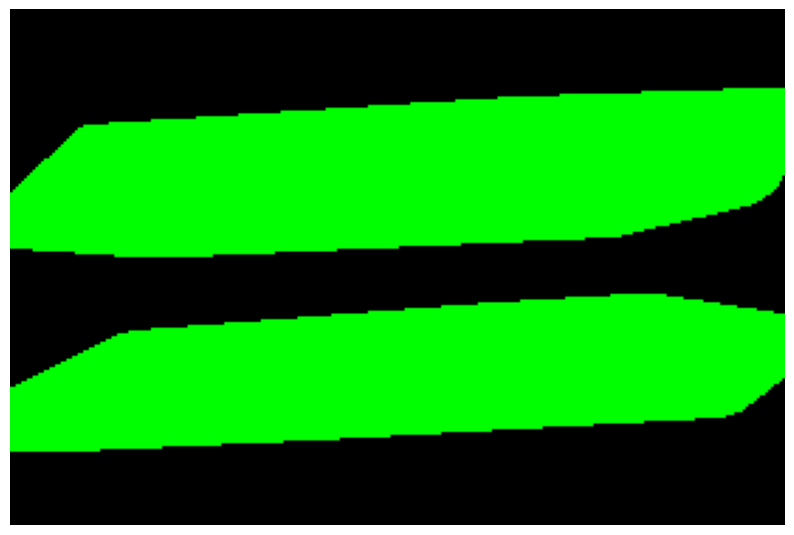

In [53]:
for i in range(1,len(modify_list)+1):
    input_file_path = os.path.join(modify_dir,"{}.json".format(i))
    with open(input_file_path, 'r') as file:
        json_data = json.load(file)
        image=cv2.imread(os.path.join(DATA_DIR,"image","{}.jpg".format(i)))
        h,w,c=image.shape
        # print(w,",",h)
        canvas_size=(w,h)
        updated_json = fill_unlabeled_areas_with(json_data, canvas_size,i)
        # print(updated_json)

        # output_file_path = os.path.join(modify_dir,"updated_{}".format(i))
        # with open(output_file_path, 'w') as file:
        #     json.dump(updated_json, file, indent=2)

In [45]:
image=cv2.imread(os.path.join(DATA_DIR,"image","{}.jpg".format(138)))
h,w,c=image.shape
print(w,",",h)

290 , 174


In [54]:
label_list=os.listdir(label_dir)
print(len(label_list))

355


In [56]:
image_dir = os.path.join(DATA_DIR, 'image')
image_list=os.listdir(image_dir)
print(len(image_list))

355


여기서부터는 이미지가 있는데 라벨이 없는 것을 확인하기 위한 코드

In [20]:
a=[]
for i in range(220):
  if "{}.jpg".format(i) in image_list:
    # if("{}.json".format(i) in label_list):
    #   continue
    # else:
    a.append(i)
print(a)

[]


In [ ]:
lists=[1, 2, 3, 5, 6, 8, 9, 10, 13, 14, 16, 19, 20, 21, 22, 25, 27, 28, 31, 32, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 49, 50, 51, 52, 53, 57, 59, 60, 64, 65, 66, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 81, 82, 83, 84, 86, 87, 89, 92, 93, 94, 95, 96, 98, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 120, 122, 123, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 148, 150, 156, 159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 181, 182, 183, 184, 185, 187, 188, 190, 193, 194, 196, 197, 198]
down=[64,75,156,174]
center=[1,35,59,98,106,129,135,172,179,197]

In [59]:
wid=[]
hig=[]
for i in range(1,len(image_list)+1):
    # input_file_path = 'image_{}.json'.format(i)
    # with open(input_file_path, 'r') as file:
    #     json_data = json.load(file)
    # # 이미지 파일 이름 추출
    # if(len(json_data["annotations"])==0):
    #     continue
    # # print(json_data["annotations"][0]["image_name"]

    image_name = "{}.jpg".format(i)
    # 이미지 로드
    image = cv2.imread(os.path.join(DATA_DIR,"image",image_name))
    height, width, _ = image.shape
    if(height<width):
        wid.append(i)
    elif height>width:
        hig.append(i)
print(wid)
print(hig)
    

[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 16, 17, 19, 23, 24, 26, 28, 29, 30, 33, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 49, 50, 53, 55, 61, 62, 64, 66, 68, 70, 71, 74, 78, 80, 82, 85, 87, 89, 90, 92, 93, 95, 100, 102, 104, 105, 107, 112, 114, 115, 116, 122, 123, 126, 127, 129, 130, 131, 132, 136, 138, 139, 140, 141, 142, 144, 148, 149, 150, 152, 153, 155, 157, 159, 160, 161, 162, 165, 168, 169, 170, 172, 173, 177, 179, 180, 181, 182, 186, 191, 192, 194, 195, 197, 199, 200, 205, 206, 209, 211, 213, 214, 216, 218, 219, 220, 221, 225, 228, 230, 234, 237, 242, 243, 244, 245, 246, 247, 250, 251, 252, 254, 257, 258, 260, 263, 265, 266, 267, 268, 271, 272, 273, 275, 276, 280, 281, 283, 287, 288, 289, 291, 292, 293, 300, 302, 303, 306, 307, 309, 315, 320, 322, 323, 324, 326, 327, 328, 329, 330, 331, 332, 333, 334, 340, 341, 342, 345, 346, 352, 354, 355]
[8, 15, 20, 21, 22, 25, 27, 34, 43, 45, 48, 56, 58, 59, 60, 63, 65, 67, 72, 73, 76, 77, 81, 83, 84, 86, 88, 91, 94, 96, 97, 101, 103, 106, 108, 

정사각형으로 자르고 256,256 resizing

In [75]:
def pad_if_needed(image, label,min_height, min_width, border_mode=cv2.BORDER_CONSTANT, value=(0, 0, 0)):

    h, w = image.shape[:2]

    # 패딩할 크기 계산
    pad_top = max(0, (min_height - h) // 2)
    pad_bottom = max(0, min_height - h - pad_top)
    pad_left = max(0, (min_width - w) // 2)
    pad_right = max(0, min_width - w - pad_left)

    # 패딩 적용
    padded_image = cv2.copyMakeBorder(image, pad_top, pad_bottom, pad_left, pad_right, border_mode, value=value)
    padded_label = cv2.copyMakeBorder(label, pad_top, pad_bottom, pad_left, pad_right, border_mode, value=value)

    return padded_image,padded_label

In [86]:
for i in range(1,len(image_list)+1):
    image_name = "{}.jpg".format(i)
    image = cv2.imread(os.path.join(DATA_DIR,"image",image_name))
    label= cv2.imread(os.path.join(DATA_DIR,"label","annotated_"+image_name))
    if image is None:
        print(f"이미지를 찾을 수 없습니다: {image_name}")
        continue

    height, width, _ = image.shape
    if height<width:
        padded_img,padded_label = pad_if_needed(image,label, min_height=width, min_width=width, border_mode=cv2.BORDER_CONSTANT, value=(0, 0, 0))
    elif height>width:
        padded_img,padded_label = pad_if_needed(image,label, min_height=height, min_width=height, border_mode=cv2.BORDER_CONSTANT, value=(0, 0, 0))
    else:
        padded_img,padded_label=image,label
    cv2.imwrite(os.path.join(DATA_DIR,"cropped/image",image_name),padded_img)
    cv2.imwrite(os.path.join(DATA_DIR,"cropped/label","annotated_"+image_name),padded_label)


In [87]:
import cv2
import numpy as np
#자동으로 검정 아닌 부분 위주로 1대1 크롭해주는 파트(단 padifneeded 먼저 해야함)
def crop_to_square(image,label, bg_color=(0, 0, 0), max_zoom=2.0):

    # 그레이스케일 변환 (배경이 단색이므로 RGB가 아닌 하나의 채널로 판별 가능)
    gray = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)

    # 검정색(배경)이 아닌 부분 찾기 (Threshold 적용)
    mask = gray != bg_color[0]  # 0이 아닌 값 찾기 (검정색은 0)
    
    coords = np.column_stack(np.where(mask))  # 비검정색 픽셀 좌표 찾기
    if coords.size == 0:
        return image,label  # 모든 픽셀이 배경이면 원본 반환

    # 최소 bounding box 찾기
    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0)

    # 가로, 세로 크기 계산
    width = x_max - x_min
    height = y_max - y_min
    max_size = max(width, height)  # 1:1 비율을 위해 더 긴 변 선택
    max_size_limited = min(int(max_size * max_zoom), image.shape[0], image.shape[1])
    # 중심 좌표 계산
    center_x = (x_min + x_max) // 2
    center_y = (y_min + y_max) // 2

    # 정사각형 크롭 영역 설정
    # half_size = max_size // 2
    half_size = max_size_limited // 2
    x_start = max(center_x - half_size, 0)
    y_start = max(center_y - half_size, 0)
    x_end = min(center_x + half_size, image.shape[1])
    y_end = min(center_y + half_size, image.shape[0])

    # 최종 크롭된 이미지
    cropped_image = image[y_start:y_end, x_start:x_end]
    cropped_label = label[y_start:y_end, x_start:x_end]


    return cropped_image,cropped_label


In [88]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os
for i in range(1,len(image_list)+1):

    image_name = "{}.jpg".format(i)
    # 이미지 로드
    image = cv2.imread(os.path.join(DATA_DIR,"cropped/image",image_name))

    if image is None:
        print(f"이미지를 찾을 수 없습니다: {image_name}")
        exit()

    # 이미지 크기
    height, width, _ = image.shape
    # image_name = "{}.jpg".format(i)
    output_path1 = os.path.join(DATA_DIR,"cropped/image",image_name)
    image2 = cv2.imread((os.path.join(DATA_DIR,"cropped/label","annotated_{}.jpg".format(i))))
    output_path2 = os.path.join(DATA_DIR,"cropped/label","annotated_{}.jpg".format(i))

    # 정사각형 크기 결정 (가로와 세로 중 작은 값 선택)
    square_size = min(height, width)

    cropped_img1,cropped_img2=crop_to_square(image,image2)
    cropped_img1=cv2.resize(cropped_img1,(256,256))
    cropped_img2=cv2.resize(cropped_img2,(256,256))


    # 이미지 저장
    cv2.imwrite(output_path1, cropped_img1)
    cv2.imwrite(output_path2, cropped_img2)